In [1]:
import sys
sys.path.append("..")

import json

from get_palette import get_data, get_colours, create_output

In [2]:
event = {
      "body": "/9j/4QBuRXhpZgAATU0AKgAAAAgABAE7AAIAAAAOAAAAPoKYAAIAAAAOAAAATIdpAAQAAAABAAAAWoglAAQAAAABAAAAYAAAAABHaXVzZXBwZSBNaWxvAEdpdXNlcHBlIE1pbG8AAAAAAAAAAAAAAAAA/+0AzlBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAACxHAFaAAMbJUccAQAAAgAEHAIAAAIABBwC5gBraHR0cHM6Ly9mbGlja3IuY29tL2UvSWFSdjJudEZneFBYZG1tVndacGlpVnBGekVReno2TnFUU3FiS016VnZ5TSUzRCwgQ2l0eTpEdWJsaW4sIFVSTDpodHRwOi8vd3d3LnBpeGFlbC5jb20cAnQADUdpdXNlcHBlIE1pbG8cAlAADUdpdXNlcHBlIE1pbG8cAgAAAgAEAP/gABBKRklGAAECAAABAAEAAP/iDFhJQ0NfUFJPRklMRQABAQAADEhMaW5vAhAAAG1udHJSR0IgWFlaIAfOAAIACQAGADEAAGFjc3BNU0ZUAAAAAElFQyBzUkdCAAAAAAAAAAAAAAAAAAD21gABAAAAANMtSFAgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEWNwcnQAAAFQAAAAM2Rlc2MAAAGEAAAAbHd0cHQAAAHwAAAAFGJrcHQAAAIEAAAAFHJYWVoAAAIYAAAAFGdYWVoAAAIsAAAAFGJYWVoAAAJAAAAAFGRtbmQAAAJUAAAAcGRtZGQAAALEAAAAiHZ1ZWQAAANMAAAAhnZpZXcAAAPUAAAAJGx1bWkAAAP4AAAAFG1lYXMAAAQMAAAAJHRlY2gAAAQwAAAADHJUUkMAAAQ8AAAIDGdUUkMAAAQ8AAAIDGJUUkMAAAQ8AAAIDHRleHQAAAAAQ29weXJpZ2h0IChjKSAxOTk4IEhld2xldHQtUGFja2FyZCBDb21wYW55AABkZXNjAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAEnNSR0IgSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAA81EAAQAAAAEWzFhZWiAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPZGVzYwAAAAAAAAAWSUVDIGh0dHA6Ly93d3cuaWVjLmNoAAAAAAAAAAAAAAAWSUVDIGh0dHA6Ly93d3cuaWVjLmNoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGRlc2MAAAAAAAAALklFQyA2MTk2Ni0yLjEgRGVmYXVsdCBSR0IgY29sb3VyIHNwYWNlIC0gc1JHQgAAAAAAAAAAAAAALklFQyA2MTk2Ni0yLjEgRGVmYXVsdCBSR0IgY29sb3VyIHNwYWNlIC0gc1JHQgAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAACxSZWZlcmVuY2UgVmlld2luZyBDb25kaXRpb24gaW4gSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdmlldwAAAAAAE6T+ABRfLgAQzxQAA+3MAAQTCwADXJ4AAAABWFlaIAAAAAAATAlWAFAAAABXH+dtZWFzAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAACjwAAAAJzaWcgAAAAAENSVCBjdXJ2AAAAAAAABAAAAAAFAAoADwAUABkAHgAjACgALQAyADcAOwBAAEUASgBPAFQAWQBeAGMAaABtAHIAdwB8AIEAhgCLAJAAlQCaAJ8ApACpAK4AsgC3ALwAwQDGAMsA0ADVANsA4ADlAOsA8AD2APsBAQEHAQ0BEwEZAR8BJQErATIBOAE+AUUBTAFSAVkBYAFnAW4BdQF8AYMBiwGSAZoBoQGpAbEBuQHBAckB0QHZAeEB6QHyAfoCAwIMAhQCHQImAi8COAJBAksCVAJdAmcCcQJ6AoQCjgKYAqICrAK2AsECywLVAuAC6wL1AwADCwMWAyEDLQM4A0MDTwNaA2YDcgN+A4oDlgOiA64DugPHA9MD4APsA/kEBgQTBCAELQQ7BEgEVQRjBHEEfgSMBJoEqAS2BMQE0wThBPAE/gUNBRwFKwU6BUkFWAVnBXcFhgWWBaYFtQXFBdUF5QX2BgYGFgYnBjcGSAZZBmoGewaMBp0GrwbABtEG4wb1BwcHGQcrBz0HTwdhB3QHhgeZB6wHvwfSB+UH+AgLCB8IMghGCFoIbgiCCJYIqgi+CNII5wj7CRAJJQk6CU8JZAl5CY8JpAm6Cc8J5Qn7ChEKJwo9ClQKagqBCpgKrgrFCtwK8wsLCyILOQtRC2kLgAuYC7ALyAvhC/kMEgwqDEMMXAx1DI4MpwzADNkM8w0NDSYNQA1aDXQNjg2pDcMN3g34DhMOLg5JDmQOfw6bDrYO0g7uDwkPJQ9BD14Peg+WD7MPzw/sEAkQJhBDEGEQfhCbELkQ1xD1ERMRMRFPEW0RjBGqEckR6BIHEiYSRRJkEoQSoxLDEuMTAxMjE0MTYxODE6QTxRPlFAYUJxRJFGoUixStFM4U8BUSFTQVVhV4FZsVvRXgFgMWJhZJFmwWjxayFtYW+hcdF0EXZReJF64X0hf3GBsYQBhlGIoYrxjVGPoZIBlFGWsZkRm3Gd0aBBoqGlEadxqeGsUa7BsUGzsbYxuKG7Ib2hwCHCocUhx7HKMczBz1HR4dRx1wHZkdwx3sHhYeQB5qHpQevh7pHxMfPh9pH5Qfvx/qIBUgQSBsIJggxCDwIRwhSCF1IaEhziH7IiciVSKCIq8i3SMKIzgjZiOUI8Ij8CQfJE0kfCSrJNolCSU4JWgllyXHJfcmJyZXJocmtyboJxgnSSd6J6sn3CgNKD8ocSiiKNQpBik4KWspnSnQKgIqNSpoKpsqzysCKzYraSudK9EsBSw5LG4soizXLQwtQS12Last4S4WLkwugi63Lu4vJC9aL5Evxy/+MDUwbDCkMNsxEjFKMYIxujHyMioyYzKbMtQzDTNGM38zuDPxNCs0ZTSeNNg1EzVNNYc1wjX9Njc2cjauNuk3JDdgN5w31zgUOFA4jDjIOQU5Qjl/Obw5+To2OnQ6sjrvOy07azuqO+g8JzxlPKQ84z0iPWE9oT3gPiA+YD6gPuA/IT9hP6I/4kAjQGRApkDnQSlBakGsQe5CMEJyQrVC90M6Q31DwEQDREdEikTORRJFVUWaRd5GIkZnRqtG8Ec1R3tHwEgFSEtIkUjXSR1JY0mpSfBKN0p9SsRLDEtTS5pL4kwqTHJMuk0CTUpNk03cTiVObk63TwBPSU+TT91QJ1BxULtRBlFQUZtR5lIxUnxSx1MTU19TqlP2VEJUj1TbVShVdVXCVg9WXFapVvdXRFeSV+BYL1h9WMtZGllpWbhaB1pWWqZa9VtFW5Vb5Vw1XIZc1l0nXXhdyV4aXmxevV8PX2Ffs2AFYFdgqmD8YU9homH1YklinGLwY0Njl2PrZEBklGTpZT1lkmXnZj1mkmboZz1nk2fpaD9olmjsaUNpmmnxakhqn2r3a09rp2v/bFdsr20IbWBtuW4SbmtuxG8eb3hv0XArcIZw4HE6cZVx8HJLcqZzAXNdc7h0FHRwdMx1KHWFdeF2Pnabdvh3VnezeBF4bnjMeSp5iXnnekZ6pXsEe2N7wnwhfIF84X1BfaF+AX5ifsJ/I3+Ef+WAR4CogQqBa4HNgjCCkoL0g1eDuoQdhICE44VHhauGDoZyhteHO4efiASIaYjOiTOJmYn+imSKyoswi5aL/IxjjMqNMY2Yjf+OZo7OjzaPnpAGkG6Q1pE/kaiSEZJ6kuOTTZO2lCCUipT0lV+VyZY0lp+XCpd1l+CYTJi4mSSZkJn8mmia1ZtCm6+cHJyJnPedZJ3SnkCerp8dn4uf+qBpoNihR6G2oiailqMGo3aj5qRWpMelOKWpphqmi6b9p26n4KhSqMSpN6mpqhyqj6sCq3Wr6axcrNCtRK24ri2uoa8Wr4uwALB1sOqxYLHWskuywrM4s660JbSctRO1irYBtnm28Ldot+C4WbjRuUq5wro7urW7LrunvCG8m70VvY++Cr6Evv+/er/1wHDA7MFnwePCX8Lbw1jD1MRRxM7FS8XIxkbGw8dBx7/IPci8yTrJuco4yrfLNsu2zDXMtc01zbXONs62zzfPuNA50LrRPNG+0j/SwdNE08bUSdTL1U7V0dZV1tjXXNfg2GTY6Nls2fHadtr724DcBdyK3RDdlt4c3qLfKd+v4DbgveFE4cziU+Lb42Pj6+Rz5PzlhOYN5pbnH+ep6DLovOlG6dDqW+rl63Dr++yG7RHtnO4o7rTvQO/M8Fjw5fFy8f/yjPMZ86f0NPTC9VD13vZt9vv3ivgZ+Kj5OPnH+lf65/t3/Af8mP0p/br+S/7c/23////uAA5BZG9iZQBkwAAAAAH/2wBDAAQDAwMDAgQDAwMEBAQFBgoGBgUFBgwICQcKDgwPDg4MDQ0PERYTDxAVEQ0NExoTFRcYGRkZDxIbHRsYHRYYGRj/2wBDAQQEBAYFBgsGBgsYEA0QGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBgYGBj/wAARCAJABAADABEAAREBAhEB/8QAHQAAAgMBAQEBAQAAAAAAAAAABAUCAwYHAQAICf/EAEkQAAIBAgUCBAUBBQYFAwMBCQECAwQRAAUSITEGQRMiUWEHFDJxgZEVI0KhsTNSYsHR8AgWJHLhQ4LxFyVTkjSiY7JzwkRUg//EABsBAAMBAQEBAQAAAAAAAAAAAAABAgMEBQYH/8QAOREAAgIBAwIEBAUDBQEBAAIDAAECEQMSITEEQRMiUWEFMnHwFIGRobFCwdEGI1Lh8RUzYhYkQ6L/2gAMAwAAARECEQA/AOAB98aAWK5wAEI3rhAExrqtthAGx0z2vbAATHAQRfAAXFFxgAPhjAI2wANqeGMqDtgGGRRoOFGAYwp4kJ7YAG8FGhUHbAASKOMHzDbABP5aEfSL4AJiEDYDCYFi09x2wDLUpbCwwgCFpth/TAAVHQBjxgGFQ5SjEFi32BtgAPgySiZ9Twhm/wAW+FY0GR9O0GvUKSLUe+nBbANiyOBeEC/bBYUF0/T9JG+tYhq9ThWAwjylBbTb9MAy8UDgbLgA8NM6WuuAC2KMg8YADY49rWxIFyw4ALlhI7YALRFftgA9amDizKMMCp6Ow8owxArxhL3wCAZX59MAAzMzbAjAOgOXxEksRgA9Uvfg4Ao9LSW4NvXAM+DMBa2ACN3JwASW5wmBcsbNtbAOi5aRm2thCCBl3lwAerlxU7HBYH3yhXtfABS1MurcYBk46ZR2wBYfTQ2bZcAMYLDdRtgGWpFY7YACRGdOEIkIz3GAC6OE84YglIb4VAXrGFG4wwJEDAB8FvhcgfBMMD3QD2vgAg9OjDdRgADlpI9/KMAC+akbX5VFsOwPabKZKiTznSg5OCxUOKTLqSll1wxnV6k3whn2eUZrcrNN4Ys/LkX023vgEjGV3T7QupgDultycUmFC5sqcH6Th2B8MqlJASJmJ7AXwWI+lyyWH+2gdO+4tgsYM1Ip7HAhEqbJ5KtyItrdyNsFjLz0xVyVAhWIvcX1WsMFjBKjpSujkdVppGC8kLgsVEqDo6uqpR40bwREX1Fbk/jBqGTm6OzSmzExU0TTR8rKPKPz6HC1BQuzD9pZZOIatHRhsPMCP5YapgIq2qqZZTrkYnnc4pIVgBkcd7YKEUs7k4YF1LG8shNzYeg5wmBpYqRVo1nkIXTuTb+VsZtljXpzJazqCs8ZVaLL42s03dvZfU+vphvYLNn/AMmwrIGgrZY49rqyhjbvvibCx3SZVR0cQSOLUeCz7k4BWWPSQqhWNQt+wwgsB+mUrY2BwiiRUnjDoCEn7qMu5t6e+EAtevCsV5w6ADerVj+8cYBlbJFMloz5vUYLAoFHU8NYj1BwWMLCLEtr8YQH0dQFfY2OAD2dllNzt9u+AKoEl1Kt0bjABGmrBHLcm7D1wCPa3OyrqqC3qRhhQpqSlY+qoRXA3GoYBlDCnUcDDEDTVUa3sBgEKqrMwLgEYdCsUT1zHe+GKxVU1vIvh0KwQVZJPnt+cFBZAVLl/quMFBYHNUnWQdsMCyGZSLk74VBYxp5lFjYYQ0xisyv9Nh7YVDstd1VNntf0whghkiik1qQx98FAVyV0aleNV9iMOgspkrAJA4a/rhCsa5fmEZdVZwCcJopMdKykamsVxIyt3jY2FgMKgIa4l3U7++AaBpJqd20vsfXDoLEmZQeIGC7+5w0JmNzGjZJ7EG2LRDQqmg0C7E2wxFaMdVgbYAsvdZDESLEe+EMCnh8WIhTbAI4ntcY3MS6NlHIwAER2J2wAMaZW20gkYTAcwgWGoW24wgDhAjKG2wDL46dCLjAFF6w72scAg+njZdyDh0NB6R9+MIGHUyqLXw6DgbwPpWxIwhhSG552wAEqBbYjABIAXvgAvRRcbYVAFRoPTCoaC4ogTgGHwxDbAAdFGo3OEwC4owMMaDoRYjEhYdGvfAMKQYAL0BBvfAATGd72vhAeyaW204YHioo5thMC5FBOwwgCkivbbAASkAwASKqu218AEHB0+XY4AKmhkCbnnDQC+qjZQScMQoqGVVJbnAAlnrmSe6qQO4OHQBENeko8yqcIYUJ4zwBfAB6rljxcegwAFRpEVuY7XwgLxRxFdVue2BgViCNWI8PABbDHeSyjAA5pcvSSO4BLelsICT0Og72GACloN9hgApeNrWAwAUikZ22XAAXDlxB3F7YADYKKxO2AAkUxvxgAtWlvyMABCU1hgAl4Khr2wAT0qRtgA9UWwATF8AHpU2wAed8AHjMB3wgJK1+MCAlhgRZA3OAD6Oni1+cA+mAC7wlRTo4txgAhEQX3wrANsHjsRfDJA5qY6HIUHawUYCrF1PkECWYqWJJJ174diDKDKoaJ2f6ibgH0F8ICeY0UNVRNEw25B9DgAxNXQJE+kG++KTBoaZNRhYC4RgpPJwmCHviqththDJiZSO2ADzWnA2wAfW1ccYAMv1V07JmSLVU6FpkFtI/iGGnQzHx9F5rXKzCAxWNv3u1/Ww9sVqJojUfD7MxVCKBo2Qj65Dpt67b4NYUBv0Lm8OYtT/LrUALrDRtZT7b239sPUgo0lF0pBS0EfiUzpVEBi1+D6WxDkyki6t6Yauyl0gYrUE+Tew/OEnQ2bLI8sbKunqPLtCK0UYVjHcgnknf1OG3ZA0Ckd8IDwsFBJO2AYPJMjDY74LAGJXVfAMqeaBW5F8AUA11R41ljPHrhWNIzNfHXRszLEzAnld8AwKliqamUMxKp3wWOh8slPToLCx9zhCK5c1jQbEYAA3zSOTa4wDK/mEvqDAnAMs+bAUXOARCSpDLcNhDF8lWY3JUC598MQNLUJu0huf6YYC6rzVFQhG/GHRLYmkz0qbasVQrBnzkybark4KFYBNVO7knDEUNWFBZiCMMAKaZJb6bA8jAFimSoMcpBO4wCJrVqz82tgAnqEj3a35wARVtLkDjAAbFPYC5wmMOSrVIr6sIZRNmR02BBw6AXzZg1ibjBQrBP2ixf6r4KCw6knad9IwgHtLRqGBk57YTKQ/hJWKxJIt3xBaBpHVSQrADnDoTA564opAa+3bBQrAJq8GzNvbcYdBYM+aFvKTf0tgoLB5YkqRqff/LAAqq8thZT5muOLYaYmjMTpLT1BuDpHriiC2CqMjWYm2E0NMukKFfLhUM4Kl/XHRRzlqk4KAYQQuyhlGEMY07mCQAjY4BjAVK3259sKgDqecvZE5w6A0GXU4aDU4AvhMaCBAFk37YQUHQqHWxW+AAjwghtY+2GgCIoxa5IHtfDAMiFtucABse+FQBKDCAIVb9sAwiNd+MABcSXOAA+KOygnEgGxJtgGg2FRtfAMNRRttgAKiTvgAMjGFQF4NhxhAWKzXwDst8STYKLYAJr4jHfAATFAx3OALDI4Qtr4TCwpdK2GEMnr7LgA8C3NzgAtVFOAD1l2vbAAunpZWkaQsCBwDh2Arlo1kjMegFmP1emGAvqMhXSRInHf1wCA5chELJLASyNswvwcAA7UrRnUHt7HABdTyngrYjAMYh/FjCqlzgAnDM6MI327b4QF08qqPLufXABVDUur3Cj7HABocrzIeGwdQLn04wCGHyz1V3U7djhBZEUWi+1/XAOyPyAL/TfAKw2ny1FNwu/2wBYWaJQhOkYBWUIiX0su474BlwjTmwwCPbL2wDI3ttgBEbXOAZ6FwAS0gcg4APhtxgAizdsAHhN9rYAPCgNsAHgYI3OJAn4ygXJw7HRU1XGPTBYUV/M3a98IKDIZNac4BM9K2N73w+AL45CBhgSaS+AKKzNpG+AVEVqATzgCiwuCMAUDSU9I1zJEjA+owDBp6mOGHTGAFHAwAKmrLve+2ACa1g2scAEvnbtucABUNYp74ACRUDABP5hT2GACJKObkC+ADzy8DABXLYgjm+ACuECF7jAAzjqw48wA9sAqIyVIVxpAAwDoW11cQhU2GAaFL5mI7gnABU+a3Fg2+AYK1fvqJxI6KzmMf8Ae3wBR9+0FtuwOAAWozGKIFl0j7YAEVbnG99XOGBn63OmBNnOKoLBYs8Yn68FBY1pc3DDc4mhhzV6OoYPbCHZH59Q28gwwAKqtCy6hJ+L4aELazMrpqD2/OHRLZmK3OGDMoY/jFJEtiSXNWLfV98VRITR1/ivcSqLdjhASrK+QzaEKrvgSAoaZmS5l37jAAIazS5RmI73wwBKmZpNwQSO+GIhFJrUC/nwBYR4sgiJJ27YVAVpWFW5wUAygmMigXwhjFo0+UIL7kdsIYmZKgsQDsMMRIUzvs5BwASGXs2+m1hzgAZ0FLHARzf3wmNGggk1AWYDEFIPWddNjhUVYrqJ38RgBdcMliupqQjENwf54YmxdJV72vthiB1k0uWwAEJV7c4Blc0gddS31YSAAnVGDeLFf3OGAoaFI57geXsPXDJJMwHAwh2cKiN8dBgFxxq3bAA3ysBalVYFhfCY0PpMpji/eFNV9xibGAeCVmP7thq24xSFyaTLaJTArMBf1wmNDqJVSwDdt/QYQwpYNZUhbjAAfDTwxkliRfgEYBlbAq2lSGHthklkCsW4J9sAB0QIIBGAA+FbgYBh0UYPbAAWkO+AYSkGEAVFAewwgGEMHGr9MIApEF7AYBhcS2GEAbEnGAAyNBgGFIvtgAJSMW3wqAvSJb8YQBCRL6YACEgj5tgAJWMAAAWwATETHgYAJCE33wDJiEi2JCyQjOACxUIGAZ84YJdSPscAgYK83lI2v2wwsjLRoDcKSe1sMCsQME5BA5BwACvTwMjIF0Hn74AFr0sUsyxulx/etgAqOUiOS8ZvgGFUNH4dRpkS49cAi2ty0CcFWAPOAAgZek9MqKQGA3YYQEYcjMlVpHpgsApclqIZV03Zb2thgaWnieFEhIOn+mEIJWlD3b14wUBZ8uir9OCgPdAG4298FAVujFbA7HCAEkhZWBtgAhZ7WIOAD0Ak4BktGACYiGARJI7nAOz6RCE2GALKo1dzxtgGeyRW7YAK9PtgA8INrYAB3BG5wmhgk8ljpB/OEMDZnV774AJfMeowAGwVYVQt8AUGCqGm+AVHoq19cAUQetVe+GFAU+YjjVgAjDXDVfVtgCgl8yRV5GGFAcmagggtgChXU5lquNW2GIWS5jpbnBQHqZiOzbjBQzz9o3bZsFAFwZjY7tgoBjDmIIF2wgClrUI5wBQRFVKTzgCi8yi1xgCiozDVuRgEfCUWttgCiYkAHOEMrlqducMBfUyeINzgGZvNGeM6g22ABTHVzmS2uw9O+GwJVFeUism59cIYknzWSOS5a2HQrBqnqF6eJbtud+cFBYmquqmJPn2w9INiaq6qO4L3GChWJZuo2aS97jDoVkqfOSzajbnjBQDumzcaA2oLhNFJh6Z4um2sYVDs+mzmMp5ZANsCQWIqrqGRWKghgO+KSJbElZ1K58ur8YdEtgP7U8Xctv8AfjFUIEapJkPmGAkjHVukmsNY+2HQBhzBpCHvxhUOyz5hpEPh3GAVgkksheznfDA8WdlHrgoCcD6599h7YACmlVk8Nb4Q7BQCJbE8YBB0TsLb4Bh61LlbE4kZB6lVNi18AFsVdBpPYj1wUAbDUxsh0EYAL4ZCXudhhUMZQyootfCGfSVBWbnynvhUBQ8oV9Wrb0OGAlzGtgKNpcX9MNCEE2YEm99hiqJsKjro2pr73wh2DPX6f4uMAWR/au27WGFQWSbNI5k0A4KHYE8hM177YYiiWoW5scAWcZVNJGm+NjEPgjJ8xIAwAazIhTRAak1Oe5HGExoeGQPqBXbE0MFMYMo8ov2vigHFKhZLWAHAthDQYtLJqCje/wDFgEMoqZ4Y9TC4HYYQw02ahFgAzHgYKAsipFeBdKke5wwJrSssoLMAO2GIKSEPKBGpt6nvhAGxU+k/6YADY1ANsAwpPtgoC9Ab2GFQwqMMOOcIAuPUbYACogRzgANiHGFQBcYPbCALjHrtgGGxITtgGEohvgAJRMJgExphAEomAAlI74ACkj9sKgJ/Lqd8Az1o7C+kHAI9EPci2EB6YWI4wAUGkkfk7YY7LoqYoLYQFgpQBdjqOHYgaSlsSTtgsYO9CsgvuMIZD9lpfVvfDsVk0y8XuVufXAASlEUNwouRz6YBA82W6m8S51cffAgBVj8CW38PO/rhgXwM3iGQAkn0wANaaZx5nt9sKgDlqA6bpa3p3wAWxujjyn2thgWAG2+AD4rcbjABAmPi4wAQdQRc2tgA8ESsNWx+2Egsg8CrvxbBQA3zCayLe2EOj7xh64Ao+FSAcA6JCYHkjCsKItMqH2wWBYJFkXnDAiwvxgA+8IkXwAQeFWFrYAFNdTmMkAEg8YkoWzO6gXGADyJJZSLLtfnAAZ4Yjtc84AJs6LHtz6YAApatk2wABT5hoB82GgFsmYs72BOGBclWbAg/fAB89cx2BucAil538Mknc4YC2aqZO+GABNUsX1HAIqFY5U2wDPlqnHc4BBUNY22/4wDDIa2S+AYclZJtY4QB0NcykamwhB8df5fqwARmrbNzzgAuhn1oDqwAXGYAfVfAMrMwPe+AAeYki/bAArqhGf7S9j2GABJV0MaOZ4GOw+nAMWmORhY8YAFldTR+ETIzEg2AUYaEzN18Esz30MF7XxSExM+XTTSaFjY9gQMMRGbozNZV1pTyaT7HBY6F8vR2ZwjW8L29xxgsWknB05XLAJPDIB74LBI8bLKxW0hWvgCi9cqqyQLtc4ACouncxq0PhiQ25K74VoKFtb0zWrSPIr3ZTup2Jw7E0IhkNZMxOjcbYqxUXv0tmMSKxjYX72tgsVFE+R1MCrZSb4diK0yuouAY2F/bBYg6LJ6k2BjIP2wWMaw5DOYbqrE+wwrGTk6bn8HW0ZBO4uMFhQE2TSICGjOCxFDZZIpuEN8FgWx0EoG6kDAOgunyUyG4FycDYBJyaZP/AEz+mFYBlJ0zW1Z0wpv2wmx1ZGv6PzamhMs8DKo72wJoKYobK5StrWOHYiyCDwRpNwfXAxhSSMqkOxv64QHsletMAGbnBQAj55GwbUx9t8FBYsqMzkcHw3Iw6FYukeWU7nDEUvG1rscAHqTNCl2G3pgoAKrqtagRrb7YEgsAaWUja4w6FZ6jSqb73wDLxNNbfjCAiWdjwcAHPUpxYWBP3xoZh8MKsQukX9tsADelJpwNEe/vgGhklTJa52P8sKgCUnjZwHS3uMFDC/GZhpVrDBQDjKswfUsTKCB3OBoEx8ZkuLrsRiaHZ4zxnZDscVQgqKRljWNtxzcYVDCBT697k4AYZTxlF2Tf1tgEHU0J8TUV2POAEGmjBsyLhIdFiU5HbDCghIrH6cAgqKFm4XCY+QtYLWvhDCY4+BgAKiivgANiiF98SBfoBkFlJGABhTrYAEYAD1h2vbbAUWKlsSBei4ACUA9MABUa4ACUUYALguJA9A3thgSsB98FASC3XbCA8FgcAHtxe4wwPSSTvhARdA9sAEDEqjjAOy6KEaLlQb4YiwQC+wtgoCLw9htgoD4QKy2JwWBScrpppLyMRhgXiggiICG4wgJiCIDjfDAnoUAgbXGAD2MLHwMAEpauKKIsbfjAKgJ8xVozvb2wrHQvNXqcnVhFUTNWzgLqJGAVF0NS8Z2P3wBR9NVyScsPxgBIAklAk2OAZAz274AKjU2POEMklXfk4AoIWcN3wgovRwbWw0DCUawwxFwIJtfABZoBXfAKwSpQMh2wmMSVtEX3jsSN8IoIoojDTAnc4YiuqI3sMIYrqZyo22wwFcs7Mbb4YitKWSoB1XwAHQ5NGkV3W7euAYJUUD3JQWGAQO9JNEvmBA9fXDEQbVpsw/OGFgM8Qbe2AAKSmLdsAEI6F3kAUH9MABr5K6x6rG/pgAKo+nqhipkRkvvuOcAF9Rk8tJMAPMvqO2AdnnhFbWwmBFzYWB3wAeJUug8zYAIy1bGxDYBhNNXgR7tgEHw1SybXwgPHrBHfe5wDICr1cnABBtLtbnABYmXLMhIG3e2AD05ChXV29sFgRh6XpX8zoSAf1wWAYvSWWGMEwLf0tthWBdS9KZNSuZFpI9frbBYDBaClQeSJRt2GEADU5FQ1JOuNRtbjDsYsm6Wola/hKUUfSBgsBdU9NZZKF00+mx82m1zgsYGnT9AkoKwgWPFsOwGaUFLS0p0Rmx7gcYkDMZtlk1ZE8UNM3h33Fravf74pMTFuWdEzvWF5IWjA9eBhuROk0cPSEZmJnUNp49MLUOiup6EopZVmeJQfQDgYNbE4nlT0HTtI0skIAVdjbfD1BpKKbo6maVS8W3NsOyaH9L0nBpJhjUKRY7YnUVRZL0XFNEdQA9hhagoTZl0DCqaoYyWPrilMWkQv0SFuzL5TzitQtIRT9HU40l4xp73GE5BpHEfSWXxlDFSLzycTqKoLm6fo0j//AGddx+mDUNxKIcqhpwPD8ljvbvgsVF1VTfN03gu3l4IwkxmWrumEiViouORi1IloztX05J4TShDsfTFWSZDM/HppAqof0xSQmZ+oNXUPpIa174dCBjTzqCSDhgVES8KDgEXwwVBH0nCYwj5CpIvoNvthAWfsaokAOg2Pe2CwLk6ZLKLixwWOiz/lRAgN7k84VhRL/lyDVa2wwWOir/l+EObnbBYqJfsanQbL+cKx0jj0UY742MQ+BVBBAwAMYQoNzbAMuCMzbDnAIKjpnK3JwwC4oiF33wUNh1OpVvLtgYh1TM7WD/T2ucFDsYwwKbWF8IYzgptagFbnCGM4KXjbCChlDTLf6dsKxh0dMg3C4QBKQnYWtgAIWlB5GAAuKhiVdTrsMKwPgUUkAAD2wUBYI1I1XvfBYFqIObYLAJHFlwAFQqDgAIjSzbYQBsKm98ADKMeXCZRcEB4GEBckV+cAFqppNjgAKjTAASowAWhdsJgWRooYEsBhgRqFQHWDz2wAQV9ucAHhYXwgPQcICYG2AD07bjAB5p1d8AB8AQQqAAfXFCZY3h28oF8AIp0aj6YAI6CDbAFn3hm18AWeWPGAZ7b3wCs9tgGA1tUYVKqbe+EwEk1U8hJLbYBgklU1rC+AZ4krXuTgYFyzkcc4QFwllY2AvgA9MrKN8AFDSgte+AAWefSecAFayvITZSRgGeyVEVLEZaqeKCMcvKwUfzwBZXTdSZBKSI83pyBy1zb9cKgG2XZ3klRLEKfNIJmkYqgVtmI7A4ApjlmQ8YQiyNhffDsAgSIBgsCiZlZfbCAo8ONlvaxwAQ8NQunbABU8MTAiwvgGKZ6HxZCqMNjhoCIyWO+osCMMC9KONBsOMJgWMqBDxfCAGemR97jFBRRNAhsGFwOBgELJ6JpGPhxkDDAAeEK1iMMVnyU6E8YAHOX0tKIyWQFjxthDHRoqeSFTZQe+2ADw0ysEiRjqQ3DYQFFRSISRMPtgGKpqeBIzcbji3fBY0hU6RMupdr8g84aYUDtTlzYWOGKiiSkmH8J/GARSFZTbAAUk8kYBt2wASMxcbnAFlkd2GAdhUUbFhbCAaQHwVA1DfCGECoJNuDhAFwyER78++BgXLKLWuBhAS8ZNPIOACBmX1wAVGdb3vtgGQedRueMFCBpAGXyrt64ABZoouwF8MDxGQx6WAwigmjoklDHTxgFYb8kiR6ha/wBsJhZBYkJ8wscMQQlKrHi4+2ABitPFLEBJGrG1txgAshoKeLmNbfbAKyivTwm1IoC+2AYvapAGFQAs1QzA4YC2UoSQRgApUDVsMOgLGcKt8ICpqtQPNvh0Fi2Sa8hw6FZNHBF8IZYYkmTzC+EB5Jl0U0WnRscFgc+6h6fU10oWIG3BGNYsiSM7H0tI5J8M/pirJosk6UcC7oAMGodFMfSkQsXTYnBYqGFP0xTRqQy3v7YVjoK/YsIXSEFsKxnrZXGFA0jbBYUUvRKDbRhWIoahPFsMdAU1C2qwGHYMBqKVotzgEAybYAOHRgA46DEMiGAA+AYKAPiU82GAAuO5FsABUcbFuPxgAPgib0wANaaK9sDGOaaLYbYkY6o4wpFxiQHEMam1hhDQwigvxhDC1gAHGAC+OJcKwGFLSK5BOBgfZqHpikKrYEXJwIBOzHWAcUJjCnjYqL4QB6Q+XEjLFp7HnABfHGQbYAC4033wAGQgYADEAAwhoMiAthDQSqjABO1zgAvjXAAQowmBcgFsID5kBH+eAAaTVexGKAgCcAFgxIH24N8AHof+HABBnINsAE45TgAKgYgG174fYAtdxvhiZ83lXjAI+iaN/v6YAJSaVNgcAFVr98AyO3rgEUy1CoCLYBoUV8viLYc4BgPy7Ebm22ACJpFL6m4GACHy/wC8sOMAFyQHTsMSOydyqbLbDAolE7G6rthABslS5sImvhoZBaOZj5wRv3wwsTdbZ/P0l0mayljjM7tpVnFwoFrm35sMCVuhN7HAepOsM9zjM5IPFklR5QS9yFVb/Sp77d/fG0YIhyZGLLc1p65ZI6zTHUtqURQXG+9sTaaoqjRdLZ/nOS5vFTSR63aZmSw5G3m3/Xb3xMop7opNnYcm6tmsEzGoiLnkLtp++MqHaNIM/pBzUJe17XwgPYeoKGefwo6yLXe2ktbDoNgqlzOnrmK0dZT1BW4KxSK5H3AN8IAxSTyfxgGen74BHhiNrjAIpaA6SQp374B2TihlKkvwOMUIgYydgMAFDU7FjfABJKVuBufbfABCpjp6SEz1ssdPGu5kmcIo/JwAAQZx09VXShzjLqh+AkdQhJP2vvh0wsV1UJZywUDfDJYKFKHfDAZ0jaUuQbYQxpT1AaPQG023F8JgS8YxS6r3OEMBr8wKRmzKT6E/pgKRyHrT4kLkeaS5ewcyRi7PGNSKTwCe/wCL8YqMG+AbS5Of0vxazA5mWiiMscYuVYFdQ9LnjGvhEeIbzpv4uZDWSx0+cRS5bMxsJD+9iJ9LgXB/GJeN9g1HUYaqlqqITxSxyRSLdXQ3DD1BxnQ7ElRDpZgDcX2OKEAsZmfSL2G2GM+QTFtP04BWMaHW0mh2uMSMayK0cX7pbk+mEAHDUv4+l7g374YB3iaJLltsSAwgqFZbFsAy5z5CUcH2whi9qmVJN7jDAl843BwADzVoU7N+MAHhrVaMXbAB8a6y2DWwADNOzts2AA2hhMsqmTgYTA0YCxoAmwwgPpmAXjAAukkJnAA3wANaUOUAP64AGCyKi7c4CTwzYB0e2SaMq2+ABNPSnxmVBgGDPSlW34OABbWQGNtUZ274aEBiW91thgDzyAAjfAAA0jNcC+HQim8muzAjDAviViwJNhhMBlAi9jiWMKG7WHGEMDq6aFvM6BjhoGLjFEgKrGAMMXAFURx7+UYYgKVIzyo2wxFDaRgCyBseMAWRKgnABVJGpGAYM8e+2ASBZY7Xw+QFlVEGFiMMQpnhUbFcAHB4ozfHQc4bFCTuBgGMYITtgGMoYb22wAMaenUgXGABlDSAgALfAAbDSG+6jBY6GtNSAWOnCAcU1MO6nEsY3poVAF0whjWnhQgALbEjDooOLDAAfHTEgXwrAJWk8NNRA9r4LAkGaM6yALDCACr6oT77lvU4pIBegDyAnscMkaQPhFB8JuN8JgEoL4QFqrwcABCAHABetlbAAXEbgb4Q0FRsFYAnCGGxsCOcAF6hecJsCbGw2GEB8ktucMAlZPfABMv5ecICpnBHGACUUGvzMbfbABeIVGAD0xrbjAALJD+8FtsABsdNEEsQG23Jw6AokowJBoNlwUARGiqtgcCYE9VsIDxgW5OACkXSbym2GgLyx1XJvhiorkc6TgCgbUwOACp1D7XwhgkyCNvW+GDKrg4APtKlt8AEgi4AJrpXYDABYFRuQMAEvCT0wATCoBsMIDOdX9VdO9H5P+0s8qfDVtQhgjGqWdgLlUHr6k2A7nDinLZCbo/MnXPxMrerXV8xpaemo4b/AC9NC2rYkG7sfqbYegFtsdMcVEOZm6XMWqYkijMXijfQQSzjk/5YuUaFF2x9l2ZzSZUVqC6SUreMsUZ1MyXsQLd+/wCMYuO5pZpVkpZKZKiKUyTU8l/DkYGx52PraxxFDEOXZnmNPHLJV1qGUsxSPXszX3J/X741cV2I1BEnUmYURErVLy6vKFXZbH1J5wKCYOVGeruqczaqEEVTIm9maJ7m1/68YvREjUwmioc1FItSslWqIt9Stpbf0Nxb73xm2ro1rY7B8KfiDWzV8uVdVZtM8MqotHPVlW0ONtBkHZgRYm+453xjNLsVGztmm2x2xkM5t1x8Ysr6ZzObIsqhStzaJtErSX8GBubG27MNtrgD1xrDG5biboy1P8fcwSlZamiymWbUPN4csRW/bRff73xfhMjXQlq/+IvqStlWnyqgy+ndHKuUj1FtyP4y1vwMV4CXLEp3wX0//EH1IhHzOUZZVhLalaN4Xb9DYH8YPBXqPUyNd8eupc2kalyDIaPLpFGp5piZzba2kMAv5scJ44xVtgnJukjM5l1p13mqtHmfVdbHqFhBTyCBD+IwNt8Hl7IrS+4kiyurrZ3apqJpkUMsYZmk1MT9Z1HfvhPKlwVHFY5yehGT10c7+IXUCzHkDtbGcsuo0WE31D8Q/wBnRLT5hRtVx6bqwfS/6na2CO5M46RzRfEHIahAP2dU+KLkr4i2sOSDz/LFOLMzRZd1j0vmESxirjo5Xv4cVUQusAXuCNv1tiaY6L6vO8lpKUytmNO5te0B8QkduMIdCqXqujM9klXwdN9Z9fTAOiuDMKXMoXaGSNn4fULgj0wUFmBzHoiCoqq2pgkp52kLPLS1I8TxAewvxbt3vi1KiWcdzrozNFiqq6VBS06hH8CCzNv3P6c9sbqfYjTy2AZX4MFQizRTaI91lUAkH2HGKaFZ1TobrsQ0UlC0eY1AiJKqYiQo9f1xnOA1KzQUvXtLmFRdRaEnSLqQR98Q4tFWb/pSDL87hlmhqAzxgMydwDwft74h7DQ+k6XilkZ4X81thxhagoXyZLPRyGTwmKjuMFhRZHIn8QP5wBZbJSUs6akUBxvcYQwZ/wB29pVFwNjgoBTUZiad7RnDqws9hzkncvgoLJSZqrKDqv7YKHYJUZqSbLsOMFBYI9YTvqOALPhWG+z3wUFk1qnY84AD6Ml5ADiWMf0gKH7YQB8MpeYXJNsIAyZSy2B/GAD5aFdSG+45wAGjTElh+uARBWLykYADEgFux+2AVk1jVWvgAomVfE+m/vgKApIhw52wAAVMMTLbT+cAC2WlgG684diYFNSxtsCSffDsQMaNVYE4dgeNCrDdcIDxIdLW5GAAtIwoG+AZIm3Y2whlUzoU35wJCsXzMoBtikhMVzyAElgfviqFYA7hibYYiq1zvxgAlZbbYAIMdsIAd2tzhgDPJ6nAOwSWQb4BAE0gucOgAZNLG5wUBw6KnW98bmAfDEo2th0AwhjHFsFAMqenU8jCGM4KfcWGGA3paQsRtiWxocQZdpAYg39MTYxrSUcdxqWxwWNDunoYioIGJsYfFQINtIBwgDIqHfthWBOS0Eojtv3wcisLhkXSL7WwUMClndZdUmplvtfDSFZ5LmEky6BYL6DDoLBGLadWGIlBG5cMRYe+ExjKGO7DCBDCIBRbCGEKcIC5S3YXGAAmKxGAC7g3wAWLJvhMYUGuoPphAERSG22+AYVHL684AJNPY4VAVGdQ3JwwL4akHvgAJ1ll2OJAnGrsQNrYADERlXjABNdjucAFi2OGgJaV9BhgeHY7YQHjny4LAo8TfbCAkrX74AJ7kYAKWB1YdAek2A3wwIlvXABU2/fEgUi4a52thgD1b+UA/fDQmBmZVXnDoRSJ/NucFAWfMD1wUBNZge+Ch2WLMMFCLfmNsIdmd626yg6N6OqM5liWeUfu6eBm0rLIQSAW7CwJJ9ttzhxVugbo/KnVvW2edaSyZlnlU8qINEcEY0Qwg7kRr27XJuTbnHZCEY8GMm2rZm88jjkMfysha5sB3K32245xpFUZydhGT0xqcqepjOqZZRHp1adSfSd/uOcZz2dGmPixit6ermvaORZJEuktj9r9h/lie1mie9DOTMa/Lc0mpHrYWDTKpjljDPJ5RfzKdrEj774iNSV0OflYolopM4L1aU70sivpjkiveS+/rs229saJ6SGrDqnp/MKukhhjzEKqoqlY11XIHrt374jxKfBXh2uRbW10GRV8NBQ5e1fVA63LE6A3vt5jf8Y0SvdmblWyHrT9Q1eUUlcMwakln3kiAsAt7AAd+L+2MG4ptUbqMnFMbUq1MAXxW+YiaPzELp0PuLgent2+2MG02bqLijR5l8eep8s6Tp8roKKkeuMawDMnLPJETsCUJsz24O4uO+No4lJ2zmlJrg5EXqTI1VW1by1sjqzBwWZ3b6rnubg3PvjoTXCIa9RhU0c01QHV545jGH0BW3BN7Gxt/wDGITopoGoIM+yaSYU1HGXllL65I9bH7f6nFSUZ8ii5Q4D6GirKmunqsyKrLIQxUSaLEW7D1GIlSVRHG225DijpY4s1klFT4pYAuCp1C1gLHgj/AFxlKNo1jKmEJJGuZLEIrO5ultiN+cGh0GvcLM1BR0/iyqylRchpAb+uw3/TGbxyZosqS4PnzJF8NYoCysNQZ3ve54tbDWEPHKKiaCWoVauSCLyhgmlmZhfgXsBjSMKWxlOd8kKkU8WY09TTfPHwjrYRxXPGw0je/GKjdNEvmxgkNaZxUR084Fr65Bptv6euJ2qh+4VTHM3qGMtUAXHkW/A/0xLSKT9SrNg0NMNdaI/NpDBrAX7+++BRsLLsgzWpymokpauCSWO1xKhNt+D/ACw3GxWdDRIK2mWtgsxkFtUZ3J/8YgAOLKaU5gfmFDnSUI0g7HDsBcvTGT5TUSVX7DiESEkCNL7eoX/xh6mxULs0rsqpPF/ZuTs9RVWDiPy8cbbb4pJvkDPVeZZ/4Krl9DBGiEAwjzMABYdrA4pJdxbmh6YzDMMrnizFp44K5QVKsQy2baxHBxMlYzsHSfXEeb6aDM4YqesvpR1byzn/AAi3lNu2/e2MpRrgdmtnUyxeHoBBHOIsYmq8voqeB2qKiKAW28Rwp/AOGmwEqGHWRBURyW/uMD/TFElrUzVLWIN/bAMAzDpqaYL4a+c9sCYUZyfK56eUxn9MUIFWM67NgAuamIsVJPsMA7IGjka50MMAEEpW8Qc/Y4Bjamy8Mo23OJAd0WVCNhqF++EwHKCFRo074miiyJE8a9gPthAHaFsCBbAB6Lq1sAEJxLfyC4I9cAACVwims+2HQrDos1TZQdsIAsVCnzX5wDB6l3aUOj3HpfAAumnkEzXvb1wABzVZC77jDoQtmqgTiqFYMajvfDoVlMtUSb3wUFlPzXm5wBZdHKG74AsvVxqFzYeuEMsmnVU9b+uFQWLpqjTe5xVCsWVFZr2X+WHQgOZ9agaT7YYA+y82GACrWFNzgAgZlw6AqepsNsFABy1BPbBQAck5OGIGeY4KAFkkHph0Fgjm/fBQjjca27Y3MQ6G/YYAGVPbYWwAM6e222AY3pe22Exj2lbYYgaHFM+w9cKhjKH6rnn0wgG9M4AthMdjGK574QwyNWFiDhMCmsYhlGgWtfV3OGkJlCzaRc7+2HQAFRVXkNzfDSEVI5d/Lh0AyiEegKwv74kYdHTxkXB3wmMMiiAW2JAm3lTfDQFcctm3wwC45drcYkAuBl7nAARI6hP88AA/jm9rj74ACUmbwjbn1wqGG0clwAw3whoYW2BwADytyCCPfABOBFlN7kn2wAfeFJDISbkXvgAOp3VxscJgMYituMIAgOLc4AKnkAa2ACcb974ALQ22HYFbygYQFZm23wAU6xfABYrYACEYYAPX33GACsjbnDApYNfYbYYAj1PhS6JCAcAEGlv5wdu+ACkBasMLMbdxgEAVFJMkqpGjm/8AFbbDsKDKSkSO5lj1tbk7jBYBUi0wQa4RYcbcYQwcT0i2QKthsLjAIXSzWnbSLLfYYoRISNa5O3JwAcr+KOeQ5mKTJ6N6eqptLPIR5/3nAW3BsP64qC3sDiXgSSCsphDBTRabyswOoMRuurgAaQdvXGjdNDUbTM9XyVCGCCbw1t5QoF7G/t743UjBxHVBlcxdGjDRohGhFS3uST787+uJm9hwQ+egy8TvI9YaeSQt4UbBdF253O5vx+MZeZo0dJi2tXLo85+enr7xNKHSFBdtjwSeOLd++KgpVQTabsd00FLmVFTx0FJ/06qSrrdR9RBF/qv7jbE7xbsd2XVpNJSGkp5o6JD5TKiiRif8I9tvXAkm7E2+EKKfJVjzqIQFlE+lXNRORJLfYs97HcEm232xU5LTuKEN9jWrkVKlVGRHCI41su19Atb844HkbR6CgkwesXLJWkpo/HLjZiiHQD6X9bYuMJcmcsseDEz5Mkk5hWdIQpvIU1eS25Or0Bt2x1xdHLLfgYZF07HnHUiPlUs0UVOEnkmnU6JNJAEa3AFyLk4UpaY7glbOkfIxRKyrDTWG9gbEH3xyu2bqhRUUNVOZCZKUU5UgroLE/wA/8saqjNi2WhgVBJDMrO1lukNu229tvz6YtEsMpMrikVZDLVl1YXAk0gj/ALeDhSYJHstFl80glbKK+Yxn+0kjMSKfcsVH5/TAr9RsnJHQ1cMcNRkxVRz4kyN+hDG/3P64Fa4Yi6PLaVEZP2WEaI7EqDt62GwwW/UdA66XUyU1Cyym6s/gsLW/7gLdv15wwCppXraKORK6PxQlig0sf0B9RiUqYXYgmzKPQ7VFSSRuFETSBbeygc3vz7Y1UfQlspqM5+Ry2aoGlZGVm1OVjJN7ABRew/8AODTbCxc+ZVxWnkrKSOXWP7SSbW6C21iLsef/ABitK7CNSnUFVmOUzULxzvJEoMcttJG241EEA/jGbik7KTK8ozvMMlrLRlVpmUS+NPN5OOxbc/aw/GG0mhXRq8o6s/acxOoTPCSZHQWVfS9/0xDhRV2OqLqSadxHJSsjFjZx/vbEuIA2bpQwxRzeHF4iszFkNiT3vbAhiVc/ypYJaz5IRorWeS2yN6mw35xWlisxfUmbzU0yR0o88rAxiK+//ceOMaRj6ktiyj6jzSKSCVq+SnlgZZo3Q7qwN1NrW7YbihJnQV+JnU9bSN811FVpUKvmVGCK44uAo59sZ+GvQqyPTVRUZ7Xzyy1TIUFlmYksx/Jv2w5rSJOzoVOY6YxNEVsgs1jjEoMkzGrhU1FNKVQWI7jBQGTrvi11JlGYtTyxZbVop1K00RRit+PIfxxi1iUkJzaHUPXHTvUdezUSVNPOFDSRToP1BB3wtDjyGpMtenp5W1IRvvthDGtDltK0atJcn04wmAXU5dSCLyDfm98Kxi79nIGvtfBYg6mpliX1OEUMI3slrgYQHolAOAdnyTENf+eAQWlQAPM9sKh2XCqiVAb6sICqSthLE6/xfDoBRXTJI3kvt7YaQmwQSMpvqNsOhWXjNX06dJ9NsLSPUSOZuEsgP5waQsoasmkF2GHQWCSyO997YYrA5dfrhoQG7Sg2scMCh3l9DgEUF5NWACyOplU/TgCxkKgGIbdtzhUM9JepgsAQcAAE0MitZyxPfDAHCqguVwARIRx5VwAVGJRuQMAFEscPJGGAK6w8jCAGkjRuMMRQ1MLXOGBU0EduMAIDmhVeBhoQG0QJ3GGBTJTqeMAHGUTfGxiFxKMAB0VgcADKmIYgYYDmmVgAbjCGhxSEkgG2JZQ8pwCBviRh8ThebXwqAYU0o2wUMbU7kjE0MYUytYb3wgCailkeG8cYItucJMBU1MxuAbHFAUS5WShk1DVhpioHjppUa1rDDEEorqdxtgAZ00gVQCcS0UGNPEq7kYmgBJa2InSrC/phpAVLUXfbDoBhDLdMSBcs9nAFsFAGPKpgOEArNXdtjxh0Ayo5w6jVxhAPqUxi3GJKDS4IsDhAeMwC+cAj1wARjmjVtrYACTMkiaSL3wAUUyNDIST5ew74AD0qABhAWCpUC18AEPE1Ne+AAmJwMAF97jbABRKrgX7YBoEeUrzgAmnnAIO3fAAWqrot3wCLUT1wAW6cAHhjBO2GgPDGNNgLnDAVVkMyTa9KareUtsDgQgaCcTOIJYhqJ3wANoKaKnU6QoJ3OExkncDi2EAFK2kmwthgBzTlR6++GkAvlCym4UDFEibM86goZHoqOneuzILdYEBKoe3iMPp+3J/ngBIz1HF1CjSV/UGbNLHLxRRnSq37ADa3sb4GyqM/mMFPNnVSxQP+7Yo6gbbb2HI/8Ya4Ec1+VlmmPyLmKdQw1Obq3447Y0a7jT7AtbHltDF/9xlg+dZtUgRSbNby7fk+mNVb4MnsGUnzh8GpkUmOUatLKTcA2tccDnfGc5JujSMGlYNmU1LUSrTxqtmCsrOvmHNwG3G18VDyolq2ENlMMVS4nhjeF0QmJVuyAi5Jf+dtu+J1NjcUi7MOossyyEUuVxKpVQnhUxEjKo24B5Pue98OMG+RSklwZzMs8z0xBaHp+eFI2EPiuTsTvYW7/nGiglyyG5dkPOncnnbKYnnqW8R5gzrp1EXPH8uMc+XJvsdGPHtuNJaTN0pJqeGWFJRKUWR2a6pqsTxa9jtv39sTFJ7scm1sgZcmpaBAZc3BnG3hKiqDe421k379u3ONXJvsZ6Rvl/SXiTHVRVMWtdSA7mw4FhsovjOWSilGy+gp80yyuhaso52XSYn8GABbk3BN2a1gOf59sJ01yNJ90auWJVgM0i2YDzgqNvueMZcmnAoeSmFWIgzeIwuEBQn8jm2LSdEOrFM060tE0NRFSql7oXqwdZvYeXb9N8WlZLdHjZjHSZY07wVQQ3BFJHf27kYem9hWB1HU+TClkkqKitEXlTanuwa2242BFr3O+GoSE5IvyPP8kzmmd1jrls3hmeWygm+wG+3f/PBKMogmmfDNcokq2iSWZkN1EgmcIbdlbgm9x+MCToewDUtllTBIZoaiIbton1Dcd9YGm/A3OKSaFsUw59kHTyJFUGlopXBuoYH8Ej/QXwOEpBaRRVdaUhqqoHwWpipVDpIbUB3jsTbcC/3wLFQarEdZ1XmdbEKKF6CoiEdmiERk+9j6C3NuxxagkTbI5VndbBSVFPTZdRzTxxqwdVswS24N/wBdvQ+2CUVywTLW6n6h+VMLzxQ063tLDs522C6rA3/GH4a5E5NCWqzrMqzNIUNVTvNJaOwQiUhtiL7qBvva/wB8VSSEm5Og3L84r8kerozT0bCcaC7vspHHcXtv23tiVUin5TU9N9XRRRSSV0rTMJDZ0RVD2HZieN+O22JlC+AjI08OadO5rKq3MMw+tjON7nvb8YjS0VYtzTMMqy/LjNSxtNBGxG8lwSDe9u+GotsVmArMzgzDPJYlEjOI2ZgG8pJIA27HnfGrVIlO2UVkctPV+UaV8MPqt5QTcWHrxiYuypquDTvk1PWdOR1tG0qpIoZZOORbc37bjCUqdByW9P1K0WZ/KSzSpPp0jRZSVAHLd+cVLdE7Jjhs6zOdmj+c0xA6ToI2HoTidCHYwHU/yFE0JeWaJeHdxyPvifDsNVGMzfqiqqp18MwkvyGXUGH+XbGscaRDkL6bN8yyGVcxjIaR1ICRxlwo9gf974pxUthJ1uaqP4kZk8FLW0YNPNE3njmIIk9iB2PpzjPwV3K17HZukuqss6qo7UDeHWRoPGpJPK4NtyoudS37j84wnBx5LTseSrKNmWxGIGUgN3U/pgaGfHxiuynBQrJBZyvlUk4Q7Jx09SzgsCMAwoQyAWKke+EM8lhkts1xzgQmVCOUcNbDFZHwjyTgArZd+2ACOgYAPCqjhRgAiTY8YAK3Y24w6HYO7YKEUO4vhgDSOLcYBFQ0MLab4AsrmjHiWVbD1GAD5IVB3ucAIvTSBpIOAZdDP4Ul1F/bABVURySsWCkX9cAC6SnnHa+GIHcTAaVU/fAFgkhqAdxh0ANJ4hG5wxA7Bu5wUFlWsg4KA8ecld8FAUGQk7YKAolsdsOgBXsMFACSP6H84dAchipZibMLDGxiWtG0S3OCwPFmdraVJ+2GIc0UrKFUqAT2wDHdNOwcEqDbCoaG0dSoUEKR+MTQ7DYMwRT5mtgoLGMFX4uykHE0OxrSvKd1F8JoY2hmkSO7oQMTQ7GMGYKCBcXGFQWMkrPFgKA89hhUMDa6TbnnthgExupW9gcICioA1XVAoPYYaEyhiANhhiK/EYG4BGCgIvJI173wJADvcG+KAlDOwO42wmgTGMFdGo73xLQ7CzOkkQdFF++FQwgap6UgGzWtzhAUJl0+1iCewGCwHVJloRV1yb8kYTY6DU1QtbVsOCcSMv8AnBbnfABVLXll8NTucOgsto5D4lpFJ9MIBg0qINXBwgKDVi/OGB6Kmx+rABNpwbMrWwAXw1ACXJ3wmMPjmDKMIAhJxxgCiwSqRY98AUCVar4B0KL4ABUeSGHdTuLjAAVTGQi7tp9sAw5GIABOAkvVhbfAB48gRb4YEY5LnnBYEqiGOppyj9++CwAYaVKdy1gW4vgsCTyi5wh0CyzebY4BgdfmNJl2XS12Y1cNLSxLqkmmcIqD3JwIRy/NvjDlnycH/LuXz1805IBqrQRxD1fct9gB+mNlB9yLM31J8TM8ioSFqYMuLW8lKhZ7cEhm37jfa2HGNsHsV5H1S9Fk71FMVnmIGo3J1N/ib1OJktykaKCWsrKqGrmqkW9m8I8qO5I9P88IBTI0NZ1XUVL1oiRE8IIx2P2/33xXahHOuo2y6jzh4Wq9JkJLBRa/+FbetwPud8awuiXQvo6agatpIWpUhjOp0PhmR5EtYltuxI4xq3syK3N5l7w0WUFMyUytTx6TIsqgKLenf1G+OSW7OiLdGdyihgq+rIo0jmNJ4QaCRm0sq6ATt33HbjFtvST3NHU9MdPPWtV1VA9RIDYXkYar7DgjY4lTfAOKsqg6VfLqUJk+XQQF9vLEByOfX8YtTt7snTXBo6XpiniyE0tTUB5Ap1IFVSCdyoHcdhfESnbtFpbbg1Jk9K1CwEVSgiYBo5KcamW3oCbjfYj3xlK9Vmqa00fVtFkkCqmaGClcMHjkfSjKAdmUkk2v3xpG+xm67maqupenctzmbw6qWaqcDz06K4A3tY7KPci598WoSaIclYppJ6N8/nrcvkkaSoB1S+KyMzahtoB23+1/zhuLqmCe9odyt1dmC+PIhKAA6XsfFAPb+7fuCPXffafKh3JhrQZ3WRCKuoYGWRLS+IGCOe3LbE/fC8q4Hu+QOpyD5MM1NlgoiGBaRH0H3BOrv7m2Gp33CqAabIpKyuFZBlsJmdyPmBK0guLcoLWPvftzvitdbC0WQhosuySMlq7JvGjZozBUyiMkn6lUkMRsPUjbBeoKocQ0XS+exzU+TzOlUFsWSB1VG2JVSV0n7Ym5R3YbPZGazXI4VpZqaXMiZ9RjCx09Qzi4Nyw20t6FVOL12GkWUeS5JrjppM1lm4jKrRTSsoturEkBCPS2KbfNCVcD09CUUNEZBNJURTR6Xkiie4Ui11/eHY2F7c98T4jHoQlh6OokqJAcuqmCx3UGKKFT3sNIJb1v7YvxGRoVmHy2hFPUJJV1ia2Z9bMdY0m3msNyByf0xTkCgaZ+msxoMzahqJjES/grNHTOUO99zza3f73wKSasWk00eT1+VFUZawRABdcEccjSW3DAkjb0+1iMQ2pFVRTWQLmtPLFmBr4Zor3ikiEZYeq7HewsTcDfnDTrgbprc5/WUC0PUhhSn+WhUARxK4mmlJPLMCbX/ONLtGdUy+qELTpSrFl7+CPNI378E9gQPKT72GBASy9YaSnhgeWJmmS7wwoJTGALm7Hyi3IAviW9yooevnmSRUdKlE1WJ4bA1CIq6gdgCGBAIva4/nhU+4FVPWZW9NLTw0eYTh7szTKLFrd7WuB6jjFbk2hTTs0MoWGMXG3hR21jzEknvbe/tgYLksrJ6idozNMGKEoCALbi9+cJKuC5e5vekj810w2VTaRGJPDXxHIF23tft9sRNb2JFknR+e5dXmoGWxypGpZJFYuFB4NyMCmmDiLaiCalEyTzIakkXjRTyecaJ3wS0LK+Xw2aCWkkQnZnYn8E/jFIh+gAErKUvNSyU9OrWu8+kah6hbXI/wDGGLjg8jlqC7SvmGtn8pUxWsfa97YYWWVBoQqCrmXUNwWOpr+vOEBSMxlWuhqcvrXEiMHjkjJiKt6g3FvuMFWO63O2/Cz4jwz1AyLqvMvO4UU08zFhfYaSx4BvyTYfnHLlx94msZep3B6GFBp8IC3tjms1oj8vCBYJgAqNOBwmACOlVuCMAECtzgAraFjwL4oRA00tr8YVhRW0FticMRS1HJfVcWwAe/KOdhbABE0bgXYD8YLArMSlrWtgA+kpkf2wACNQgm2rDsAd6akjkVJaiNWY2VXcAk+w74Yi5crgLXZrD0wrHRP9mUakk/oMFhSIGkgQ2VRb3wCIGipyb8YAPvlKU7acG4ySUUKtqCg4LAnKECWIH6YQCuoiNiVG3tihCmfWL2U4pCFc7OCcVQC+Z2AO+GkKwKRz3OKoVgslSyjbD0hYDPmawoXlkVE9ScVoFqEk3WMKSFY4mdRsWJAJ/GDQGoGXreAyWnppI0PDqdVvuMLSPUGNnVH8uKpq+Dwb2uWsbntbm+HpFYJU9U5NDHb5gyEGxCKT+d7bYWkeqjJAkLcAXwzMAr5SqAWJOGgPMuLSk2SwHYYYkO8ty+SorNRey8YB0a+hooaeLQPN7tiGyqLZKZ5Ubw4Wt/hGGAirKlqAkSwuLGwLYpbi4GOU5hrIYSfj0wmgTNpS1P7lW3HvfENFjKPMUjAEjqfuMTQBKZnTyHeNXtxdcGljCY61NOqKPSe3phUFlsXiTPrYfrhVQWHJEpQaW39L4ARF0ZhaxwCPDAfS+ACXgXUCwGACLwJYC18AFM1IpTyqb8nAgBXpyFJRSMUARR5PUVSM5cIBwSOcJugSK3pa2nfSoJC82wbMAinnqEb95GwAwmhoeU9fGsSlu/bENDsZpUiSHUpHGJoYLI9UH1R+ZcMLKZpJ9JYIbe2AAeOaraoCpCWseTgEP45njVbm+JKPnrUBsxwAAzVUeq4kAGGBUcxVTpDXwUKy+OvDC174KGEx1YvzhAM6SrBsNWExjKOZW3vhDPS4IJucAHnzF1seRgArNUysAMABEdQAL6Rc84BEzVW3HGAR8K33wwPfmdS2vhAepUBTzgGXie45wBRCWpVVJLYAOfdS/Eql6dzswV2V1LUPhM3zUJ1trG4Gj0Prf8YqMbBujLVXxrLu9RlmQ3y+NCxmrJdDym38AW9h6398U4VsyorUjm2f/EDP+s8zMWbCOkyyEeSKFGMYJB8xU3LueB6dsaRxibURIsUUMIzCGsnaNXRnlm2bb+EKRYAjY4p+hmt9xRJPmGbdWyTVongy+NdN0S+nceVt/wA33xokoxIu2b6fqXK8mo/lKNGmqXK+WMbWAuCTwB7450rZs1SCKLMq6aratcsqFBZSfEYk8rt7b/nDaEaDK8sp5oJZK4qp0jw4zsVPbWR37+uJuuAo8q/hzkeb1kea1sqzOisIlRrICe5UbNhrJJbINK5A8yoKHp9PlaJmaSYBnDuFTVe3JOw9hg1NjqxBBQyUcUtQVqNPixvPIUYwuQQptybemM8ktjfFFWU5FURR9cvkxilSOiR42hQglizahax2AU+3a2NYpuGoyybT0mqq6+elpJZ4KWpeKxOljxxsASu42Ox4wkrJbMTXZrnNXmq1NfMNKOipDC4URg8nY21cX3PpjojGK2RlbfI2rK6tq6d0hSqqsw0q0TQqNT3PFuQN/wDYxnVS9i+wFDXdSZdW1gnplMEYKpFHXiN2YnykOOODcb39AcVpi0TqaMdn0E9ZmjVoqD41TP4wjlbxDa24U23tfkkdsOLrYco2PqbomunWGahQpHGQoaol1AG5sOxYc8cYjxPUbgkCUlHSdPdSSxZ1mECJD++d4VMg1W+lQBseTcna+Lbco7IheV7m0qPiLlUME4pKP5jwo/7HxLse99t/6YxWFvk08RGcpPiHNXU094qDLySAH8O4YXAG9jv/AFxbxJEeIaSHPK2qlCTtT1IRNCtsBIOfMpsO3f1xHh0Xqsuy7O5nMmXR5RSqE/ehIZlVFVubEEC4O5HHfCcFzY1IxecZi1BnMkkmX0WZBSSkixCSSPixDDY9+BwN8axjaJboWzde9R1FVVzyZgadKZjBT/LosbLYXYn+9xz+MU8cSVJ7gtR8QOt8wzWpjqM0mZoHSO9OqxFEJ4vbf1w1jikGuV0GQdS9X0UQWizKFqYv4pllVVaRibWa49bb4NCfKDU1wEU0fV9dmc9RF1WhjI1TRwzStY9iEYEGwBFlAG+E9K2oFqb5F3UuYNmVExizGumkgUeQUzIJN7fxnybm9v5YuMaJbsDyilhqOjzEYnWNDolmGmSTytc23FhcAX+2MpJ6zaLSiSzTPKSuUxiljRwX0zJMTKeBYkeU+lv9nVKjHktyahzurcDL6WonUCxZZdVlsNrIPvsDhtpciimaOGkzigoHq56X5ehVCDJLG76ACDpKbk344PviG4vYtWKJaSik6gEmaUJp3ijLyQCIBmQ/TqUGyjcncjBvWw9r3KZYui1rCJJB8tYuaWj7mw3LeoPZAQO5weYNiijr0fxzkGTutO3l+YmPiEDcWLnyg39CducFerBNvgLgy3qOro7R0KRUzNdjLIkisFBubC529LjjBqQ6ZaYs2dBSfOZcsUSEtqGhEuLXLNuewsMMl2CGkoaem+XpAfGbmVn0+JY/4rWH9cS5MaiLamErLaqgkjcqGVo3uBY/58fjDjJBOL7mg6bqqWLMoY8xlmFC9nlC8rtswtv5Tv8AgjA2KjrOR9VRrUvk9dKlTAx0JOh1LIpFwQftjKUNrRVmml6cyGqk+Zjpo/FZNSt3Pv8AfGepodHKetaeGLNkSnq1jiVP3ikahqubAWI7bHHTje25lM59LAsNSZI8kE8jEjVEpcAk83PB9rY3X1Mn9C8Q5pVTwUj5nHQFtRMckYDg22tpFz97m35wrSCmxlS9IpTxyR3DyyL5pHQsxPHfa32xDlbNElFFknTZnpolnq5EeJSNCxgqAfKCQd/54SdDe9Fk1NTZdRwtGgEkb3klliugFrHbsONsRu3uW2tOx0fp74qHpvp6OhbN46p2DMFqEYqh7WvYhf5emMpY7ewJ7HY+nOqKTqDLYpCqQVbg3p9eu9u6t3B5HfGMo0WmOGDEk4kCsqqr5tz2w6EU7M9uMOgCoxGq2NjhMaLD4dtwMIZS6RHfSCfXAAM5W5FsUSzwWtgGeNuuFQWAVckNPTyTTSJFGg1NI5AAHuTikhMxeafEXI6IeHSSPXyk2AhFl/8A1H/IHG0cEmZvIkYnPetMxzOAxyzfKwMf7GC4J9AW5P8ALG0MSRDm2jIy1T1FUTrLkbb8jG1JIzts0HT3xHzmgzItnFXVV1HEmjwfLfiykEjkW7nGc8EWtio5H3OtwZpBmGVwV9OzGKZFdfyL2Nu/qMcji06N07PBUuzAf1wqAIG8fmNjhAUl9Dg8jDoAkOxW97YQ7KJZb++ChAjygmxv7jDoASpTUupRYYaARVX1EHFoQnnbc+mLSJsRZvnVFlvllZnlI2hj3Y/f0H3xpGNkuSMVm/UeYViGOFloo22sjanb7t2/GLUaIbbM9UVZchWleZkHJJIH2wwRBIppGDoG08egP+uJZaVlc81NT6lYmSUcqOF+5xKVlNpbFDV6SkLSx3dhYuQCT/oMVRGqwEyvofWFvfcvuAMGwbs08dOLAmwtiEBYMvFY6xeEHBPOGA5j6VqzDamKL67YnUOj6kppcsqTT1IXxCLkjD5Af0bwSRaNX88JjHNOsUMV1Nz784l7jM1n1K1e1yVWAbseTftbFR2E0BQGLLSEhi3IuWO2L5AfftdqcRCUKQw5xNWOyFf1FSJCCdLAckNYjCUQspoesMtRGciUDVpBvcHD0is1GX9V0UyWQrpv674lwGnYw/5lotWgzC54UHnC0MLDIc8hI1a1QepNsGgLPKLrHIa2Ux02d5dO6nSVjqEJB+18S4MLHqVEbqGBtf074mqGERmMnkYVDCAI7XAvhCImKJ+1jhgDPaDUjoNHqcAwKp65yKgK0LV8QkP0puTf2sMUsbYXQon6xYVohGWTiJ/oqQ66X29OcVoFYO/UtcC8jtFHH2BjLH88YNKCyzKuqaTNc1FDRfv5hu4TbTbm4PbBKFIE7NxSTMF0NGR98YsobQKHTXyMIaKWCRsdRsPXABSxXQWRhb2wDPDPaMm97YTAzuZ5wKdj4rlV9lJxSQhauYvUQGemczIONO1/tfDYUU5bnklZWmI0U0Vv/UcjSfb74TChjVZqtEbuyj2BwVYwek6qirJjFC4BU2wONANqLqMCr8Itv7nEtBZroMwDRBgRuMQUGwVniEBtr4QBJAbdTvhgCszeNpsbjABYr25O2ACfjqcAivxQG5wxFqTWO52wDPGnKnAI8NYVHOABRnmdRUeUzTTVAiUKQGJHJ2Fr8n2w0rA4XUdW1NdVS0i+JKFLEgi9yCd/S1gb420VuK72ElTTU9XWJU1dROYZAAKemtpb03ttfCaNccqCanLaHLsrLw2LBmMUV9TC/O4PIti0+xnN6nYLllLm0EPh1dK7IxLrrIsotYC29udxzgbTZG4vzFqfL6uZqgyU5ABFPqKFiTuSp52/Ptim9gS3M7UZo01UaIVk0FK2htDoD4eoXUi25Fr4UVtZUnTqzW5CdEYTLmqZodJkLyS+WY3ADax9Q5JAtby++FL3D6GymWapywQ1TeHFMASgOkm3237b4x7lIrbNZKOOOCOeQKsRZU0HYX3AuQB+f54NNjtIMeqy+nyts6zCGOKJFOmqqV8N/cJq3sfUWvhU26K1UrFHTue1OZSVNMKpvllKhi0hBXWpbfe1uBY7bc4eSCoUJNMxs0lVknUtR83S1T1D1TGOXZRKwF1a4Oq9je/B9wcdMKcUkZT+Zs3UvW9DPlNJJND8xV+ETOkKqlmPl8zNtbcj1F+BjLw3ZWq0DDJ2zOGOvWm+U3DtRpGjykdtNiARtsfbvilKhNGgEJSjp4abKMwWnlVQI2IW1jfz7d78fbC27sT9jN5+ZP2WaiSGmoZYSSJ2RmaG9he5tubnbe9sXHnYT43M7BVIcskp6OhqEnp4liaeogBKre/9mLkja9t97XOHo3tsNbrYQ1fUtHJnASvqs1rZlIVZ0RIlA+q1jcrbjYAC2NNNLYy1bgE2b5hnGfmq+aWm84U1Urf2a3N/MbDVbc274emkGq2Mc2p8tkoparK86/amZSyL4ilCt1UbkuBbURub9u+ITd7mjrlC3N4DSZXDDBHJDMrJG0Sx6ZNRFyTf+Ht+mCHzBP5dgmOLMF6ThaqgLamKCESBAq2J+lT5iD6+3OG+SUnQZTUEdLUU6TV5oanbyGNmWLUNtx9JIPf/ADxKldmjjVItr6SllnbKqXP0kqSGBdo2iRrLcG51agSORz74abq6J9rC8nyOCklqI6+KKtNYdSnLKNqux4seApsTtt62ttiJb8FRdciTPMrpaVsxmjiqKeOZQjmSlBZiOGOhvJuL7/5YqL4Jl3AaGXJZ6IQRSGp0qGaQ0ZjLtY6r+c24tc+uNKZFoPoupcsq448npMsniglZWdvFNrWAckKALX/lhOD5HGa4QpzepSqzNY44aUx6xH40Qu2kXOzdxtbftthpbCbtmlpMzpKDJJqWlqI4o9RIFMjxvqPZjtv+o98Tptl6kkLqqorZp5DK1M0OmyKtl03AubW59u+5GGqQnbDsrqOpYo4ZaetWhy2KzaaRtSixJCpYWBPJ9MJpMFY/Ob0lXEZf+vgkRrCokqtV2BvcAWBufQDc84nTRVmbrqc5h1uy00VUKeVEdqkwkTTjQNrfSCCD6W5N9sNbIT3ZtE6cyenyGLMK8UNNKo1NLWL45I2/9MWQkD2I++M3Jt0jSlQgzXOozminLctSpEdhHPW2ckf4UFlQbXCj155xSj6iv0JZhnOfSU9PEM6hAkN/lKaFV8pIFljXi9+5tte+BJegm36iaenneZqipFRDHNKxjieXUVHFyBsN7j8fY4bb7DS9Tyvq6WpeAJTy/ugF1ccjnuMQotcsuUl2QdTTxyGmppoyaiVNUbqbLIu434N8RKNW0XCXCYPUGKlraekEDu5upKG5Pc252sf/ADi4bq7Jls6RvcqjQZNQwnUheMSqJTqJFza49MC3M3szQZd1LHHl60dRPIlU6FFkay79j/LEygFmbzOnoc1rdWpoa6Swkv5htc3bti4tomUbEFSYaWtlhrqqV5I7LoUaQR2sOSCPbbGytrYzez3Avnp6qR0y7Jmtc2bV5ePfY/fth1XLJu+EXRZrmy0pjmngEviKkUCtqF+SXa1gLdsTJJFxTfJUKrMZs0kWozK6FdYVWJQD1HG2IrYoQ5hmdRVzLIsw0VkgGp31souBffj2vhoAmLKpZZ3WWR1jiAWQsbg3PN9tz74SZUo0bzIc0qqXJoMtpp9o1LWsQy2JAO55BItvtjNpPcODv/SfVdHn2UU1NLUE5pFTqahHXRqYCzMvr6m3F8YyjTGaApr5xIAjKyOTbbFCF2adTZRkq6a6tjWX/wDCvmce5A4H3thqDlwGqjJ13xQmjkUUWUal/vTMd/TYf641jgvlkuZ5TfFGWOANmeTKNQ2NPNa5+x/1wPB6MPE9Qyl+IuUVUyJNRVtMzEeZgGVbm1yb7D3xLwtB4iY5Xqrp+WQwx5xSl1YqVLEXI+43HvxiNDXYrUBZ/wBXUeV5N8xRS01ZUOypHEsoYb/xHT2GHDG5OhOVI5h1Bn+Z9R1OmrlZIl2jpY/KgP8AesTuT6k46oQUDNycjMyGOia9jq3BCgc/k405I2QG5WR9F2JBEh8t/sL4YA9LKC8kwYqGcqTptwcOS7CT7kVVTHKUWMBOd76t+wwBVnzZ3mmW1E1LlsvhIFDB4mZQCw9OCTgUE92FtOkOsl6vzjJKuOMyzzQKf3kUvmVtrWBP0ne+2IljjJDUmmdMo+s8kr6IzTVIoJEF2gqmAa3qP73439scrxtGykTXqnI2iaU5rAqLyHuG/S18GhhqGy19F8uk8lbTrA6hw7SqoIIuOTiaZQul6p6ejziHLVrllllIF4hrRb8XYbD/AHfD0SqxakXpm2R1EQqIK6lli386uCLjnfC0yC0LqzqrIIYmvWGQ/wB2NC1/ttbFLHJhqRmK7rfpyBC06VpJBNliG351WxpHHIlyRhc368ask8DJaIpqvZna7H+gH88bLHXJm5XsjITz1s073lRJCx1X3v7k8/riyXFg/gSSuqFTMxbcrc29tsJspIZw5I8MoeXSWtvGx+keptjNyNVDcGzPMqUU7RUrkEAgaVtc97YSi+WEpJbIzB8eWmIZhpJvZRc/yxoZltOzxTNB4ZGhSzl20i3oeDhMKFT5hMapkHhaOdDD+WEDOmLAHSxTfEWAVl1MIJdbEXvt7DANGoo3JHlY29MQ0MHzuklqYAVUEjgjkYIugZmaSeamzNYZFIYnubY2Js1sUoeC2uxPfGbLsDqZGiuJCGXkf+cNCElfKkjDfSO2/fFJCZCmYVQMchYHsb8YYJl8+VBYgV/eMovYb3wijCZiMxy6vIFIWGolVU72wIkhJ1FUxqumN47ckG2+GJF9P1BXFPHWGYoP/Ub39PXDQ3sLOoetcwroGy8VLwQtcOwvuApNv5YUvYS3e5k8pVaielpdEckrPa+m4AsB+NyMAvY7V8PqHqCmklbK+oqqndLD5UWmiYX3Ghrj9LG18S2mtzRQo7CuezUccX7Vp/BLbGaM3Qm3puV/OIpPgb2Dqjq7JsrykZjW1LJTWB1iNn2PGwBOJ0NsV1uJ6r4x/D6mCk55qa/0x08jH+lsPwpE60ZTPfjbSVUohyXLqkwIxM01REPOlxp0LfuLk3Fx6YaxpclW2ZnMOq8lzOsD5ZUSRSElWmktouTba+/fGkU0JsYQ5lnmVU0lRLnFPPFcL4TEkqbbWIFsJ0wVkJ+sp1yqUnMaapqVuUUpZh/h9OMJRVjbHnw7zrN6GslOaLRw/NnUv75WkO/NhewAvyfthZI2io+h0WpqakD56hm8amcavI174xS7MYz6ezmvnyiSorYNDKSFjNw1h6g4Ukk9hohVZ20s4jNPIqk8/wDxhUAN+3401RBWduNjg0gMqGSSakMsgI1GwBxLQ0CVlJHPqV4rsf4sJFUAUmXyxKITVtJdrJGUGkD0B5w7EF0eRoK4Sz+JIzMLIDZUXubWwrAv6nyGhrcp+XhiVZEVnR0Fmuebnvgi2mDOcUGWU2XdSIJFKF1t5fpPuffGrk2hUbeny8vM00aAsOGtuMZtjQfQTVKsRMCR2APGEwH1PVBV5APucS0OxlFXKq6i22EB61ckhurC3rgAiKi43bDQj0SknY4YMldu+ARJ3ZV2OACDSs24GACiWYhTc2wAcC+JXW+X5x1D8lQ1rLFljFTOgLLJIR5tPby2Av3ubY2jFoI6XdnO6/MoZ6p0y01ia0KeKRs1yNyO3fk40Sa5C4vgd0uYJk+XCfMaqnmqIk8sURvoW3rYC/bDcbZOpJDPJs1qK7P6dUyuSLxI9QaZratxdyCBtbjscTkSSCDt8DDPOq5crSQRw5dKibM9MGJuASQR2a3e9t8ZwSZcjn+e5/nddEIoJtT1REbLo1GwBOm5HHB5O498apIzdjDpTpierqFnzGGOoiVlhVGFwwS+59gTb/W2FKVKkUlbtmzGUQxNNOz/ACojcRoqIdEK3Gyg3uxtueTvzjNNjY6rKyaTKoYcqDuz+R5ZIwiIObs3I29MSo77jt1sMenNc1BCayhnk/eaQZ4goIH8Wkm9th2wp87AhZnGT5lneb1MBoo/Dv8AuXEN18rXDMpNyf0w4ySVjasGfJc/yfMKaoqsvR4gVSaoqwketTcG1ja2/F74rVGWwU0EdV0VNP0ei1E1LRwiMrTVNEfEe+3C8f6W9sKEqewSVo5qwjpIZqqSQfLpGiFHAS+lvqJbYljvweMdMY+plKVHUMizmpekpUjjy6iVVDaiJHklIG9lJGojbYi2+MZRQ02MM8zmiNKaQ5tPLPchIYzpVnN7A6b+nvbCjF+g20cx6i6rq6DN56IUVOKqUFo6iZWkYHto3A2FxqIB52x0RxqrMpT7GPibOZxDLJWVdUtaGKRPOFW97DWNgL9r82xba/QiKfPqFzinyml8CWXLaCq8AGQw/vpNR2481ydt/wDTGatuzV1FVwzNTRhJysfjSyyKyCSVGcsCRfy3Cqb3uNzjZHO2aKGHMcvysU4aKExBXvCqySJtzpAPvtvjNtNmsU6HOQ5PNnkziaOaprYUMsdbM9tAtfzKxNmHpe4wpS0jjGx70n0vlqdPQVM/UmXUE0xtTLJGfM4IJBZ7FjvY6QB3xnOe9UXGNI2JyisqGqaXNKWjneUWM1I4dVIG2gvYqbj6bW35xldbovnkz9b0SJguZxvIlTTLsKgaTKpPm9Qy7d+++LWTsJwXJRmFXHkmXUkoUU2ZpE6MqIqWubgFlIutib7ne32w4pyfsDaMx+1K+vzqyvBM7kF2Ftwd91B3B/X+uNEkkQ2aGpyCCmpY1TL2q4pXASARWRD6cjtyfTucJTsekUV2UZzRQvryuKmRz/ZxkqSguRa9i9gbfk884rUvUnSzE1GZGOvgi1zwMjGUTMum9xa+wv8A+cWQMMsegzFp4qusrC9wviaQDJ6+p1X/AN3wt0PZjSpsJCKzMqqZk0qJ7IQhFrbEXF9h7HCKW3I0yjpWTqCU1FKSqRnUVlDFdyQRpBAJvfj0xMpqI1Gy7MWqMnZKKiWdZjL4ZB/s9rFioG++wPYfnAt9xvYIy2m6qqalczkhhMjPojasC2cHuV2NrD/XEtqhqxvm2RZ9mdRMtdn1NS0j21RwRMWAA3ItYCwPJNucTGSXCG02DUEHROUUslRl9DUVdRT20zTgsJDwGW11HPfsbnA3J8hFLsIJo6utzGaWlmMevQssKAAo3luC9zcb3vfA5JIpQbYurViizuNZlnn82t2YhtKaja9uLjfnuMCbcR6dMgl6zKamsijaCWJRcmSVgtl9QOO99xc4FjlXISyK6oYUXTlZBFBXz5fVR0dPHs4bUdjfcAcEX/8AGIk+xUa5I1dBFX5gjUU8sjBdQQAxxkEm2on2v78euCLaW43TkaKtoqH/AJXo5YqhRNTk06LJKCTbzX9yL/pi8UvUyyx32MR1Dmk1NLHLTT+IS+gm+gqDYG36c9tsdEUc8m0PKLqCinpIjWTRpVImqKfzLHKOCt7A7278XxDg72LUlW5q4KPI6zJ481qKKBayNf3Bplu7b2PmNho2N7fi+MnNxdGix6jO5pk9PSR1NY5mrZlQMsJe0ETHhbDzMe9r7W3weM26RqumSWpmXpW8GleeoYRlhpVVlF4rbgFeO/HfGz3OZKuCuvaeHK0qIzUeFIjKgQaSSCfLsb7i/wCnthJ26KcajbITZPTpl1Pm9xUF7Xi0G1tQAtY8bel8Rrbek08NJa2FwVVVPQRE1A1TyeYu+oNYeUAHjjnD0LghzfIyy3N6ta5jPUNJGT4bbXK78A+l8GlLYG2+TX5dn1NRtHLQtLDVg3Spgckxlvfjva3HOJlFiW5+kclq0zXpqhzKM6lqIVkuLc2sePcHHM+SqMR1x1mlFW/sHKqkJVg/9TMu5hHOkf4j/IY6MWK1qfBnKdbHNZZ6DW3gpNVTBrEyE2Jvf7m+OjSzO0XRmrcpJO0UcS32JAJB7W5xNLsPcLjMFXMFhVDp3Ltx+pwmmuRppgda8EUqmQGUDdnZgAo+3+t+MOKbBtICaWRdS080YAJuQbWv98VXqTZbFNTxqovH4jtp1Wtc/jCcWVqVCzNTWTVbRU7+FGtiLAeb/ffFxpKyJW+BTXPEsksZLtIUEmo7i3Bv+o/Q4aB1R6Z0SQeS0fhRlrbgkep574mirRCOkYUbGNdQLE6EvvwRb15watw07DNcvXSJo6YhyANTDSlrbg+/2GM7fqaUqsppMg8G8hPiMwBtfYW9PfFudmemi6SgpXcySF3ZFLbFrmx/1wroKPaOCh8J2ICazZhIbE29j98DsFRaZMvXyhlN+CBzgpj1IDlzbLqfVHMHZlFxdLhvbD0PsJzQOud03nYwqlwACtmv7e2DQwUhfPXiVAYaiYebzCT+gA45w0vUGATV9aY21GOBdJ/eM4Nu34w6QtwNj448N6l5PEAGpm2A9gMPgaSZKnyOYqjhhAjbgOBc3O4v74hzKWPuSi6eqKuoEcMJkINwbkD7m/bfC1JD0D0ZdJlUTI0USsiF3rJCAii1yAvLHb0Axm5WaKNGRquplqonWkFoXuxqHBs5Btso3N/UkY2jjrkyllvgTS1RrZ18CFn2uLkJt9hwPzi2jJMOpnWmp28cozrbyIgtc8Xbe+IbKQizOaGKE0kKkG37x2NmY87+lr8DE0W2KzGjVWuYtbVvoW9/th0QzsQikCWO5xkUzyxQ3PbDoQ1opQCCDsecJlDB6+Nv3SAMfU4VA2Lqimhk/eeGt+eMUgoFkrGp/LcAL64qhcC2szFpV8jgnse2GkJsB1NIn71wxHAvh0HIyo8orJqcy05Cm25Y8fjBdDpkJafOIGJSdHFvpTk/bBsAQ+Sz5rWwUMsgSeRRb1t7nthWh0Js++F+Y0F6maoSVd/L4mgD0uf9MTqTHVBCV1RlFFSpFl0VRKTpYqAQLena4xTQ+BDmGQUPUWp4Zo6SpJN18EaWvtuRvgewqsO6Q6ESjrUknlhYDUupf4WuN7+/GJbKUaOxdNZPl2URvpQNqsL3tbc+n3xmxt2O55qV7x+DYXGzre+FuKzI9W9N1GbUbikqBA8alzEgP74De1uO2LhOiZRs4pLlWThg1TU+E6sVe6WIN+19hjZtvghJBxy5Q8cUA+cj8P8AdmMBiVO4N+B+L4zcTRSrYOyTpeSpctGEo4IrXAQvI7c72FgfbA5UJQvc01d03K9PoqMxaCAupJqWF7cWFt+bb4z1GnagGqyPwMtNN8gkUjbLNMNXiIO4O/b19MaRlZLRn8sM2R1JEjwszfSdBGn7Yq7I4CaPqDO8trZnyyvnSFgbxXvECdybHg/bBS7hfoaDJOveoRQJBJVtISxAfUAT7D+eIlBFKTIVGe5zU1sslFUzGVxoKs9gm+9ydv8APtgUUG446Wjrv2JUwSySx1aHxDPrVy6+mk7gbYiZUUbtc4rqqgghyuYvIhHiki3H8IuLEfbGVVyUPcvzAyVUMlYw1ruyW4H+ZxFDNhRVlJUlGjjjKN9LBecS0MZulOy6AoFtthiQEeZUbtC6w7WG1uxxSEcqz3La05xC6oHK8MTpv6m/pjWLAcZRVVVJp+Yq9BtwTtiWA8bM4zGzFog9iR21YmgAZM6ChG0lA3JJvbFUIZ5ZmkMshpqmYh2+gdjiWhoW5nmlbl1RLYBkXzaQOR64ErALyvO5pdC1QIMguLdvbA0M0dNVr4ioSx97YkKHMYEig7YZJ5KgC3tgAwua/EHLqKtqaSiheraAHXMilo9QF9C23Y9vT9MVpA5P1L1P1n1hN+y5oqmjpZFDPSJH4MZW/wDE27Ej0vbGqUY7k02La/palNMdUhWCFPPI5CKg2Ny3P88ZyzO6RvDCnuwJMjoc5ySbKciCTWAMjM5XWbn1XjfCc2ncjSOOLXl4Lp+i84y6jaeloIFeOPwXqCxDJsLlQRY7/wAQGNYzT5ZzzjvwEUnRuYx08ccFPVtLVxNpaSRUGw1NdT5rkbAk98KWSxKFGbqYcz/astCsbLMSyPTuw12HA9tja55v6Ym0aqG1n2UeHSVtO1bIlKULrrSMT6W7hbfUeT6Aj8jZr0MLrk1mRVuaZpE7ZXEaeKFLyZjXhT4rX8q2UWO19he1ucJxUeQtvgc/M5Bk+Xw1NdLV5tUMfJEi2jDnsFuCAON7n9MTUpOlsO0twpq+Y5T+16y0VLIxtqYrHfgKqDe99r8nBSTpBfchS9Tw10v7DapkvCgV5kBEbEjgC9yNx5iecKUK8w1LsNlzyPpmNsscrJVIUjiaUgOwJA+kHgEi5J9cRp1blt6dicPVU9YK7VVZdT5dCpdgbL5+Hurc7jcjm4wnDgFIy1RC2d1KUlJJGngI9QsLgL5hZgDfgsDt2AtbFPy8jitXBga9BDLK0kbv8zOWQAFQ5YBt131c7X9O1sdkWqo5Zp3uMoIMyq8qhE9S88iStqiYaii2AWx3JJ3GEmkwabRpqOnymPLBBUvPJKzaS1NKyA7fSo52Btb84l3djSQmbo9pyKlIQs4kY07NOXe3/tsLWsOee+L1k6A49EZ7JkiQVEUsNFFIW0QpqZ7jgKvfjc/riPEV7FaHVMBl6JyykemWsp2iqGawWplWJmJAsWZr6eO2+44w1kE8aDU6OmpK2WKtieaBAypSZJThmUWAAaeQeWxZtwGJ9sT4l8D0UWrlmXdOeJmGZZTR0RaIxQUdVOJZJWB2bXtYdyAPb0tFuT2ZoqS4EKZjVpl00OXVmTUUdVF4VZFCWH7v+/Zk2YG9yG/AxbV8kWZKon8Cpgpo665acoyyTfuXI4Orbi/tyffFrfclpKjSZfmImqz8zn/7OkEdmeKRnWRQdtBUX3Iv2HG+2Jr2L47mwy/NqKbp400Fd4Dm/hVMwLPJpPfzGwJ7Dbb3xm4O7HexVHDTtXyLmNWJQCPEi+kC3F1OzAdiN79/U3rYX1LqahyBZp8wkratNCHSYwFYE2JTWq9/a42wvNwVSG+X9W/LvEtNVLUOVIKFpJNJAB03sAebjCcPUalXBhviBmonr3Zap/mmfUxSILZBsL3H3740xRpETZz6kgSfqApUHXTldLkm50k8k+mNpER7jysip0pyaIRyHxW1Qwgs435N/wClttvfE99wfFI1uTZB1DNUUzRZfIlK4Vv3sJYqTexNz9JFuPvtiJTiVGLGmc57nWU0TQ1WeqIJwDGAAZH7HSdlX9Nrb4mMU+xcnRl0z2PMMy+Y8KwA1EuxbWQLBiQBfufS5xo1SITs9WpmlqgjVFQokAMDwNZgCbEEndiAe3thdikb2szCvpkhpM0jpaeNBqLM/iyMmwCXItqO7cGwxhs+DRv1Mzmmb0dai1jLTSBXKpTjaONTYhxtcm2LUHwGqtwOmzSnoxOAYWlldw+o6jpNrWCncXt7+2KeP1J8TfY0WU9E1+e0sWbN+4Xdlg3hMo3sXWwuCL7XFvfGcpqOw6b5NZlnSuV5XOuZZglIoQXDrGFA9z6/gdsZ629kPTRZF1nk75m0NLBWCUtpDPGE8QnsLn33Hvg8N8lakJM4ny+uZZ6ugoqPMQrfLiA6nW1/NdbAj3O35xUVQmzK0+b1FHHLHmK1FdNbQIhFZI9rXN/NfawAI9zjVpdiFYizymer8GSrhgUGRo2jWHSFC76V3uTf1OKxy32FkhsgjI8pyurzDwRl7vUICYElsUQHkkE9jbvbFTkyIpdzSZm2ZRQePFPElTGbVSvUqpZRpAtewAFxZRa3ucZJI2tglTmmX1uRx085WpgWTUXuW8QXubeu+23PrhxhTsc8upaRFW5hROV1ZVCVBaK0cnhkhrGxLEg2tt37Y0033MXKg4ZjleZQyBxVQKykJHHUAMpAIuu2w3ve3riVjo08SxXNJTvElOyARxXC+ITL7bH83xSikQ22W1NFaKKN4JVjAB1BgTa25t6beuJTG4hkdDTiILETqkJ1CS6hd77XF/09DiW2VpNLktRQvFBJNFFSz+KxkUy2V9J/une9ubbA4nJbQ8dKR0DKc1zWXpuGgpqsw0lOCiRQsYylyX30kXvc4IKNW+SMiep0B1uVwGrEjVYefSX0qga/ubfe2/ONoydcGTSAnoYqWdo1kmQ3+uNdZP3PCjjF3Zm1RKTwzTvUS+EjqbgMdRI7i3Y++Ek7orsLjVFZ5BAlMistiigefzdtXti3H1JsrqqimeLXaWU/SodbC/pcd8EUwbB0p6iddQo/DWw8pBN7m5G+G/qCTospMhqaufxp1eMrsvhnzAEbALiZZKWxSx+o4Tp6iAZpy7N6u9rDv9hfGPiSNdERTmNFlUdSWhqYY5GGk+Ibg+wxcdT3ZL0k6fL4YzqnFJ4q9lG1ueMF3wGy5LBUUDRx6Zhc7KumxP45wtDE5oSZrPVTyRCFR4am6szjy++nvjaEUkZyk2CJndaYgkChyhIcyEKR/K3/AMYfhrlk+I+A2LLaqug/fSqvDKYWPmHobkXHtiW0i0m1uFii8OiKM6lkBGq4vufUWxN7jrYz9dT/AC9RIVSUsNyCtwPcG92xonsS4gFRTrMFWYKjatmkk06yOw/XDQNWXU1JTy1QRopZHbfTCGLGwsDa1ja+JZS5NBD0jCQpl8Qtp3WRbEeXuPxjF5PQ00otbpGg0Loq5lRVF4UVAv62vb2wtbBxQRFlOUUihPDpi6egFyfX3weZj2XAVHPTRnWQFsPMxsoH57YlxY9VC+p6py2GXdqWS1xoLsxPpYL/AK4pYmyfEM1W9cvWtUUVBRKRIjLKsEXg2U7Elj5x97jGiwpbsl5W9hB8/BFFLFBR0xa4IAYyBNuQD29cXRNiOpaWodp5JEiRW1OVtuvG3b8YKJFdQkzyOsMci+Uabk3OJspIpGVV804U02lgmomRgpPtz/LADAKqOSKZkkQqe+nAJncWNgQw2IxiWUtAdOwJ74LJKTII9idPtfFDPo6lI2O9zgEE/OAICG5/lgodgdRSRVQvKSqnbyncYoOx5luSUpmcLLv2174LoRpYMiypQGliSSS31kAYnUyqSKpP+mcrTlVQH6QbYa3FYLRwwVGZ+P4mhxcAabk4p7IaR0KjyhV0ToA7WGzABh+cY2WkFy5fTVCA19ms1mDC6nC+gA79JdPyyNKtLvY6QLbfbBrYzB5x8P3FVIMpppVZiWuPpXFqfqSzLRyZxlFUqZjRTwKXKmbwW0m3Nu2LVMVvudHyCrWpp1Pm37FeffESVDseSpGHUVJ0qxsNPfEWAozSeOXOYY4KpYo4opEkc8jj03wk9hmfzXpvKpaiR9NOyk7PKq3k9Dbv2/TDU2OkHU1Dfp2PK6ej8GTUTqWIq5X2sN/x+mJb7jo0OS5PFlmXtFUC0JJuqFi1vu3P6D7YiUrHRn+pcpheaOrSuaGBU1K9mZgN9jH/AOcEW+BuNIzOYaklcUxQywxB9BXSzMN7N6G1++LhswlxsIa2hkqQ7yU7WZgDaInkDbbbm2+N/oZUV09LRQSN+0GkLJfQGa7udreUE2F+b24wnb4BUjykymprszZKWOOjRLMWkRUBuO7e9+1/bE3ZVUXHL5hIRlkU9XKTpknZjHFctbyE9h6nm2K4QuSL12Y5JmUzpmlM6x2FQ8BVlcnfRbe5FxfgYlLV2Kew0peoM0dPnMlqvCkdgXiljGo8BQL7KPW3ODSu4t+xsMgzbO8wz6H9ppHDLH5Na+UMbbm3ryLYzkklsVv3Oy5ZTOZEZpF8outsYMYzmvHZhsxP64QyyaFvBBZDfn74QGMzzpqKrlsyyBWYtdTuvv8A1xSYjNVPRqu8kCV1ROth4QdbFTwfN3+2K1DSKJ+hc4WJR+2xGqDSkV7322P+zg1ewqMqtTX/ALRp8vYqfCmsTYqXA5tjRVyI3HT0KVebr4kiVUDg6JIjYgX4t6jESGjV5h0fHWsjBpBYEKQbbehxndDJUvRUYkRi5UL6kn9PTA2OzRR5HTRRqTfUO4NsIVkiEpQWZ1VByzEAD8nDJOedVdb5ZLUigp82hghQs00msfvAAbqDwAOST6bYdP0GqOa5r1LkdDmNNNlOYLUZeCVlKp+7Vtrebkk/z7YpRfcdoNpaqKozX5ilUTCWQKGQ30qRy3v7c4T2VMpRthXWXTsNTlypTSs6QLraBbku/bygi/52++Igy5meyukkpMxjlo4aentG11Vw7yNcBQbHbji3r3xUo3yEMjjshjT9dT/t+LIa/K4qienl88wcDR5dVxtscaaFpsw1O6ZrW6wo8qqJpkyyJ9UQV5XNm1Htc++IopHPusMxo3z+OPw2jqKuP994RsSCB5b9r+uLxw2sJz7GWl6frHRaovLSRyDRFDF4YUICTZ2PYn0HGOlOtjBp8ms6Vz3KaTpoZfUQj9qwwlTPOAVk37HlmPYHYeuMMkG3fY1hJVTKurZ8mqswyuspaI/NPIkeoSWRG2+q23ItbbfFY00nYp1tQvznqPPSfl5lrqymH7oUwYLE1ttT+U+vAsMVFR5JepbFdFLXQ1SVMeU0tCXqGp1kpwQdgBYqSde9vQ4ltMai0Nc8bMJMpgqZzeAyIFN9mTULbcEBiL+l8KKVlMDp8wzIS19PDBTNHLaZAqq5KqSNr7hrXvvxbFbbC3HGZTzZFm8WbU8ssixQoKmGwJCkmzX549fTGcY61TLb0OzK5lXnMsmrswWWMVAqPGWEo1oVLAKLnb6b3I3vbG0I6WkZzlqTZ5lM9bKollmjp4Fl/ei5VJLG/I5Nx98aypGSs0mSRy17SLXzxSMjEmCSNpggvbUSLAeUhfXiwOMpuuC4pvk0leMxFC/7HzDKqGnUAl53uRY7b/w/pfEKu42n2BMlrFqWeozTPa6qqVLQlWkMEc9wPKoFybk2J2J/GKmq2SBP1ElVnXUFbnrpQ5Tl1A9IGjWUsjuDybNISTxz784agktyXJt7Cxs86jAlpq+rzWpAALeAyor9xcrfYb4rRHlCtiL5iozetlr4YlaGlBZoDOTrK3GksQTc88cWvglUdhw8ztAxrIIqZs3Saip6h5SVppUYmMNcBUYbHYHf7nY4FaekcmmtXBVVUVNmclRPVRIjMVlMnjLub7BgBtxa43/XFLbgh78keoKaGjzfLEydaeqWKG0/iR60iNyfOTtt2/2MTit3ZWWk1pG3TWS1tZl1XWzZt+y1BBSO+gXHsOQQRb0w5SrahRTfc9dx5opKeaokJOkuSqSpxYm9/ub7YKEPOls9p6rqKDL6rJ4zCbnSVZhGB3FxyLj9cTOO1oqMux0vqTKqWOrpmp9VLJBCzRlFACodmY+p3FiMc0WzaVHH+q4oa2SeoYyssT7lT/hsxtxY7bC1vfHVBUjKW4lgyvLqOb5utr2hprWdgAGluLhUF/Tvxhu2G0Uaym64E+Wz0OUZdT0YEapE7RhZH8wJ8w4JAPr7nfE+Grti1+gVRdY5pNUzPmwMrKh/cwOq6jcaWubgDj6b8+uFLGuw4yZaem67qmSSWtSLLKOIkRPUoAzkncgE3BuB97bG2FqUSmmy6PoipyqCKOOAV9Q/1s0jqLA7WAFiDvt698LxL5BRa4D6SmosgN6rLaOCoUavFSK5jFr2Gotzt6WxEnZcUwOkkhzTMBVyxPUaQwgjkOtGY6RY25+rm4t/SJyaVI2x47dsTVmW0NTUVOQ5LQGodJSxeQNaEEAaS17HYXH+d8Xjk15pE5Ir5UjY9M/D/Lckj+fzCqd5TGR5zZQp3447DzHfEzyylwKOOMDWJmlK0kdJk0tLNMVDGOOQSFE9SLi3cf5YjS+WNv0M91JnEFYtNIYZJKMKdcw3VbnT5QoLfoPzioKiG7M5BX5DHL4NPQxElZFepi16wt9tV7WuPTi+NNLJsZZBT5VUxQUNDmsb5lqF3FJ4zeGNgAoNkCgHn7nBJtciTsIzrpmrNernOTIsbFmURsFJPBa2xbvjPUbJVuYrOKemWZCKvROL2RkYFrmxPm3G3oe+NoWiZtMDrqesy9I8xpo2VUi8R51GpW4Ftv4iCCR7HFJ9jNhNJmETQVFNLSLGGidTVCZUU7bkoAApsQLEk74bXcE+wHl9EkpiiqP+njCKqkoJPCHAJ78DnjEzk+xpjgnyfVdDR19HOaOUVCwOjo8a/u4yL3seL2J5vbDjqXIT0tbCqVJakuYYfES5jsXUJq9Se/fvjRLsY33HGWQgl6KXRTooIfxHANgBuCb2Nzb0tjOSfKNIyrZkqEBJxDD50iJTxD5h7799x3wp7LccN3SL66pqYqs+FPUxwo2l3WPUV2NhY9r24tziU9i5RZT8pPPmUVRDTxyaI3MRjj0tqUbEnn/fvglPsJY+5pj1HSUYNNBXeDV1UQQSGFQptwCAxJN7jsL2J2xcF3RjN3yX5D1ZPHIaPMpKmsc6iWKqCQoub6QABtsD39b4uW26M1vyFDrvLvAkc5XG0St4cUglZnJ5BYaQFB9ibYNMvUWpLsI6/wCItLGVjbKKZJHHmUzmeNG9CVAJ/GKSdckPIvQV/wD1OzTxS1NS0aNqJFNBRjS1v8RJIwtHuJZn2NPlHWuY1ULVGa5VH4gBKxxUMiKRYH6ifN3tbE6OyZpHI3yjYZRPTZ7Wt4EHgSQqG0sWFh6g+nGIl5UapplNWtbQ9RulH4rK66RGsXlDgbEHb7nf0xcacdyJXewY1ElNl7y5kzTu/wBY06rn0AGIu3sUl6mNaGjkkakgyaWolDbKRue5J39DjdN1bZnS4oIjrNcDwSLSQTKb2EoQxfg31fywVTG91QDFllZU1BrIagSJuJTCtwdtrf8AjDc62I0dydNlsuX00zTUklROBu7x6FAtfYH/ACGG3fAKNHk/z0bU06w0NPGL64YpAORbe4G/2wlXAb8lKiohctNWm7m/7iIqoBFgAe5P+WHSYbo8qKGtzGFqOkpppUb6m8Q2vxvYbelsNNLdiab2QXlvTVbJItO1BAFUEkE2t7E2F/54iU0tyoRfBqaTJVoKFoZIYnQm1iLi9vfGDnqZtVFsgaEhI1AXQAB6e34wJWK6Bn8OOMFmRNreY2w6CxVWVOXu3hLLLcb6oUJ/nxi1F9idS7iKrzaSiy9pqdTovYs62JJ9e99sWoXyS5rsZykmjzuqm/aNVrBcqkC3A25vtbDyXHgrGlPk9zTp+kjopZYE8IIhA3ve2/f22xnHI73NHjVbGblqPCp/3cCvHsrOy+Ti5G+5Nu+N7OamJJZf+rR0XxEIOmL24A9/zgEwiobXT/8AVSpKhIKxo2kC25ue55wqHZQZZJpppwF0bFiSbm+1rXwqod3uVNAWlbW7qm2lmcab+hwxMrlpnSPU5SRXsA173HtbCA7tTUlLVSWIBudwDxjlto0Q8jyCkkp9Oi/pidQ6Mrn3Tc9NHLJTrqA82+NIyE1W5kJUqQpLK0YOwLDGpLIVlRUUUKsCZA302GAAnK6962JVqYTCxFwWBA/XBQJ9jVUVC8OVmRk8vZjiW+xdEJZauKwDhhxa2+CkyW2B1MtQAqyxxsXbSoU3N/8ALFJITN70h0/ESaiWAmUqLM2+n2GIySNEqNw+UKsWqIazaxJ3tjCxiWoo80paoo0AaBjcG4/z4xaaAc0VDT5jFEADDJFyoYXv7jEN0MdplYj2sCp5PfEWAJU0sSRGPQsgvwwuMNMDK5lFllNP46wLFILm8ew/TFpsRkanN1zyrlymCslpSi3MoCjf+6L8274dVuC9RVDRVQhmFBM1ZOBo0o6MpNydQP4sbntgb7MfIpzSozDLooKjMKXLsslZihlmlFRUM3AMaINIvyPNtioxT4E5F9D1XSZdXLUwx11WzxqJJpZSbDkBR9I7m43wODaHqH+b9SxTUpqpvEhjjceQ8Kx7juNjjBK3SNaaVsQV+bJX0iu0zU8oWyROpkU2a1m2Hfe+LUaYW2iFc0Bp51aDW5HhqVazIeblP9L4Ip2DaS3M/mNjP81DEYDUMqFHb6ZAoGq55U9rfz3xvF0qMmrZW8NPBTxiozJJprWEMO9t7kliPKPe3pinuRF1yMssyaumZcwzOoqHpqZP3cUoVEdrkiyFgWVSPqIsbemIlKtkOr3ZbnuavNnENBmFZFVBgJHgEaKpW/dxsAATsLnfm5wRVboLsz9f8q+ZvBZIyZhEkFHEAiqB5R2sfufzh70NVdCeGrqa0RRqQYY1CLHEl5CNvKLc/fD0qKJTcnsP8uz2Xp+g8NKgCWEECl+uQG53Ldue+M2nJ+xrcYo0vT/xR6iiDMrePIPojkYLcbWF+598KWJIUZWdp6e6umznLAKiJEqU8kseoHS3pjncSmqZrqLOI5lELsPEUb4TQB9QRNS6hGH7i2EAAYojcuo3G1ha3tgGLarIJKkt4cxF+1sFgZ5fh/DS1nzbLeQ3BYE7AnfbjD1AaTK8spcthMcFPFFdi5Ci255OFdgNvHsQowCPmqtA32wAUVebwUNHJU1kyRQRqXeRzYKB3OChH5i686sreseqJ5PmKp8rDBaakV9K6RtcqbDUdyb43jHShAOW5XmFRURxQ5TKUY6vmXqVBcDvYC5Fu3tgcklbY1Ft0aeXL6OnpooBl0Mc+rXr0ja1rH72v7/qcYW33NqS7HlLSy/ORx5cwpm3AcxBrsw3YrxewABN7enfBKWlFRWpmpyyGogp2ienW9Q5eJxFchbWBck6mPJ3+wxFrkJXdBkmVUtBTeIUAb+KSwufYYVubFtBe5yuOvyqlz/MapqdmWeYgMPIQD/da1rHn9Mdum1RzX3H2R5ZUZwHmpi01GpINlJDrc+VL/xm1jfa+McjUTWEWynqmeik6mhhkyl0qPBBRGS04uN1uNrge+KwJ6bsWV70C5r09Dl2XNJJRVZmqTanp7r4rMALAaeE33J3uCLY1WTcy0Gf6Y6C6oqM0qqWTJ5YpCyNI8s37uFWW9i/r30i534w55I82EYMY5503R5X1IuVL4lRUqqyyzKuhE31A8nsPuScEZXGwkkpB8mbZnNmUkeX5bl7tLrYKZdLLYaizk/SoG5Pa+MtMao035CYJI5aOqkpaeConSNpnrLAqQbeWHvpJNyT5m9uMJ0nRSTabCRTNPk8MsMZ8GQqs6BjEBJcguu9gT6ad98NPemS/U+jypMvzKSOqpvPFTaVduCQDuNu9+32w+Q4Iz5aJoWRJUSKWMCQPbTx35Nr32scNbMT3RkZxLllOIBTwIiGNJQq/wBrsNStfm/+eNluZt0RzOqkyjNaeiaBJ2iuaS2rTp1EhzuNwdsUt9yW62JSdV53JTJ8waianugpyykqx5NiDbY7W9zg0R7C1PuXZX1FVVGYzxV1RIaVkYBC6lbHgG9gBta/2xUoJLYmM7e4xegWY+PHUyRJHKR4EDJYrbnVcKQd+L4iy6FUz0IzZnnicPayJPIz6hbSBpWwvccD1wcIXc+QVCyVJnpHp6EoFK08egH173NgL4zlPalybRg734Kuka/LKekziGaaNdc0rxSzHSXB8oUjuRci/tic0ZNplYHFWrMiKyGhzFKJ1pqhJZGaQaACAxuygj6dxe/bHTp1I5nJRdD9Isqr6CqlJrqVySRFRL4pIsbHUbFT2viUmi207Bs8pqvKcyir6CeugOnw3iqVBZAA3mbT5Qbm1juLjFLfYiV8oZZXmUFFQwpGGqWVbtJKQqC48xUHfVubsbn0GIabKTVD+DLumsyfRVdQVZjIE08iWI5vpQnfVwLgffEtyXYrZ9zaZHnfTUOaRQ0GX1bxoG0yyKSNQH0qoBJNyOx4N8ZSjJq2UpI8rswpM9kcLSBJ3iMUszyIniJquOAbG1tiNr+uFpcSrsyVdl2S5YumKSgaVX2gZLyBtrNcDfjcW740TkxUkZ3MMgfNIKeTL52mqlYoxljuFDDZSNuCQb2vvxi1Jp7kyimkX0HRVHR1wetgqpGVrrTzKRYEdxz6ne3OB5HRKgh9W0UUc1LT0dVFQwSEAxRkansL6tV+R/LY2xMW+5TQa/V9Nl0qUzNT1UETXcatUsmnmxF9XHAsB98T4dhqCj1RmOewx0OUZPJT0kihFaoIEkhF9tIJNzyCb2574lRUXbKu0MMr6EKZc8vUeYDUSHnjWxRP8OttyfU/6YiU7expHZEavNenspyedckyynrvCDuDPIbHVzYd7kAbDgYnTb3LU2hLnueZjUUz00dQaaGI38OABVAKi9x62bk4qC3FPdAVJ1RmdFBJRpXLJG4vqeITAAX3Vdr3Fgft3tjXRe5m/YrqOo83my1kgo5admUNqNoTKLXudB2Njx72wvLY9LoCo66skzGSOinFTJB+8UTpojjB4uoNiL2/84prbcna9gqOfOZ62eTMIIPEmRVqZJQnghAdgpBNgDc7777YbSS2JXuMqOhoqfJmnpq5YXna4hpapVZ1Fjy5BI27bG/e2M223uWlFLYQZXnmZ5VVz5ZNHDW0UjlFVplfxNVhcSITewt7C3bfGkopqyYyldBFVmFJUU5iomqKarRgDKjgpILG17/S2x3HPPOFFNclTXoQjqXqaEyLnBYhjGYwzMxH/wCMNfi2xvvb74tr2M0BtTVCV8lOV/cIpKKwuGO4Glh9Vtgd7kDBew63KqVKmeXTS/NSJILOWj8PXvbY6jZfW4P+hRWppUhtLU5bIi0KThojEC/yj3VQO2m1z7nDUWQ5eovahpP2deIPAA2q8sQLFe7EdrWH1W+2DuO1pE0USTPKEZnUFrlVB1EjbU337DFSdExjY9y2DwIYValaNnXcadKsCDYDvfa9zjDI7N8Kph2ZPT0NHPNGwM08oKoVBA9bH/fGM4RcnudGSSjuimdSPkxEmr5kgt2J3Hl9r2w6/YlNVfqKM0nmy+SSWJlZ6l1DltI84JBFxvttjohwcmRb7BmTI9XWakTTIqMBTx7a7Dv2vfgHEZJUioYxlJRwrmvy+lSsym8NSBoJtpKkHY8227/bF45aomWSNSEOY5CKOvWkaBJYnJMZ1agq9lG+5ueLDG0WmjCUED5XV5oqzQZfRyxC+l1uvew+m+4/pimkTFvseRZxU0lY1M9TOXIDRRiJg2r7Mu24tfjfnCe+5WujY9JZzVZXmK5gxlMCIhkja5ZkbY34GwseeR74xyq9jbFb3O2wvBW08dZAFaFhrSoZtQYEcgcW9sc1VsaXYFmhYzxxiokjj31LGv1G3BNv5e+KjQULctpKaozuMpBUs5JIfQVKbfxX7YqbekFyOq3KaaU/9TR08jX1AyRq1yPvjGMn2KaQKlJET8oVEEbadHgAJptuLW9cVb5Cux5P07k9TmLyV1Kal2PlErsy+n037/phrJJLYhxTIRdNZRBPJopEINtKsBpS2x0rbY++G8kmuR6UiuXK6HL7GnoIpHeQo0koLFFt2227bYak3yxNegUsIEEcvhmJrX0HY+xIwr3oODxhBHKUlf8Afst9APAw93wAsrs4y6lpTDJUq0ge4UHm43BPrhrG27JeRLYz1bnjSi9PBUOFS2lLIpP/AHNube1sbKFEOfoIYMwpqh3eZ6WEnZfmptz+OcXpM1OyEeaUIl8EVtNpNx4cSyPId7CwBI7+343wOLBTV0Ls311hC0ShaUL9Lkag19ybHnvYevfCUq5NVjtWgXIK7LqKE/MzlZJdzpjJRd/X198LLCUuCsUox5DszqMtqsjrI4atNYhYeV9Ul7beXnuMZKEk1aNtcWnTMk9JBNlc/wAxDLJUuxMaPqdRYaQdr+2NqdmLarcz2aUfyVSyvGE0QFgoYDcDk+mLozbRdRGmkytJZArbajctZW9xbf23w6Is+kjWaJhEY4ljXWzab2B27YKCwYfvqZQ7KqW08Xvbe59z+mBoSZCSCnigVUrpCSbEGO3h27aTv/8AOFRVnfqCi+XCsI9+5xxN2bJGloyAg7YhlInPTRyodSgk98CGZ+ryqmkZrxIWXsRjRMkRzZBRqhDxhgeB2GLUhUDQZbBFUFJGHg8+GRcHDsQ8jzOlNKKRaSMxAgXI2uMLS+R2WSw0k0JfwUjJF9QH88IBS9OEVXV1cFgLjFiNx0xXVMUAjn0KPQdsZzRRuaWoiMdwynGLQ0EyfLyrZ1V1Hr2whkIY6aKRpIIo4yfqKqAThgWtWxC4L4VAZ/OsyipY2lMyqvqTa2KSEzj2ffEPIaiWakNTJpIIWWIHcg2IB/ONVFoWpGCzPq+nhmOX9PUNTDOzWlmqAZCBpuNIudze97fjFxh3bFKe9IrGadW19OlE+ZMreDcIJfDjvawDcLYbn05weW7obUuBvR5flNVSQR1M75hWuTHHOxLRluNCkWvtYXv+mFKVcDjH1J04qqnqCShqaFo44NLMssagNIBcEG+wttf2wv6bGnuPJFzGuhnFVSxGMaR4COAWujC/qTwBvtjHTGPBspuXJXNSZdQyQZjW6IpAF/cPIVZgxuNI2U77fzxO8+C7UOUJ69kqEzPNNUMksUjAUhUsyoALEbg3JubAC2+Li3GoilFSuVhVFllWayGsllpPk1QTPUzxSxpGoN9N3A3sewIvwdr4vUZOKXcJWpyOLxXeCR2CaIVp/MsY+rUztYu3e/qdt8Xb4IcTL1NRBmMZrKqdpVdQUm8Ar+oDH1+3ONVFrYxckLD07VTZo1S1KyUeq6TMLxhtC+bWO31WtwducDdIaSk7GFTl4p8vaVKTMXaNdXzQh8NAWYaSqkFu/fm/bGamm6s2cJR81ANCZaOJvBSRqh3ICxkkKo3spvc3Pv8AfDmk+SMba45LDlL/ADbNNUxl5CPM9go23Vrel/t9zilxsKXvyOYEjgrxBHURfMMSqkRhFK/4bm9z3OwGJaXJSfY1nSpqcqzIfJRkRSafmneS2540D1/OIkkxpndsppKPyya5DKVFy3fHKyjTU+kQBdhYcYkD2WnjeIsqrqO+AAVWmil0mxv3OACctQijdl/OAYmr80p4ZgW29xxgSABGf0xaTXKsYQXZmYAKPUnsMOgKqnqGjoIHqKqVfDj3ZibhcCQjmvW3U9F1LkcnyGZrEItzAsq6ZVO93U/awHIve2LUWnuFJmAyHpx6qu0O7RKyBxE91WT0B23W/NjvfvgyZK4NMULZrcjy5condmaN2VmlnmA2d9NgB6Dc7YzyPUqHDZ2D1VQyI7vMpnnOrf8AgQ777/fYeuGkhXQ2yamEDCsmX92TpQd/+4jn7euIkr2Li9O5r8uoBUlK13miRGuHD2Lj+738p2va17DESdbDTvdl81FHmlTJTtOUTSUGnYgnuMUvKiXUmZKk+GNHS5gEqszlq6KJrrTooUOdt2Pbje259saPM6JUOxuIsvghMNIg8CKEf2cTaQqjsfb25OOWTcuDoVRItl2XLMpjgWWpudEhQGRf+0/w/wBcaQtIzm03uLs6zXpvIauGpzEQtmEpEMMMQV5je5A3PlH1Hkd+cWk5ENpANX1v4cCvQZUjNYFhUSGyAtbhR9jzbcfbFKBLmZTqeprc7yh6zJMvSszGSojSoo18NW0jYtqfcabbi9gCT7nSPle/BLt8ciuoybNs2klpsmzbKYKfwkDS2ZmrSeYwxXyx38ve5F7W3xSko8oJbvYvpYK2ly6fI8wplSogCxsupGJTSAChS/23sBbjE6LeorxHWlIYRZpl4q46KmYL40TJ4bkOrgi/lF7qwPe2JUWt2OUk1sL2zuGsyeuqYYp55YoBBGJmXVGb2Yi3Itv2tb3xtopoy1pplFFH8zTR1jwvqgDcE+Lcm11AH0jcXAPI5xctmTF7blfU2W0FTSDwstqKapkgDxSMdCah3C8m+wubXvfbDi2u4pIGzenhzLLZaOqeFJLa42CjyyrpIJtvY3PfnBGXdDlHszNUHjmmrIwshm1lXUAtYLvfy7DfUb7D3xu6ML5BYZoKVHeF3jv5GAIKISfpOxO9rfzxfJF0FU2dyw10FNJLaWoUx3a5UAbadJ2P37YiUS1I0lDnMml6Svo6d3MJaCQoFYb3DA+gsQPsOMZSgnujWMvUsyeafOa6Tp6pnlhdxrBRF1aQRfSe5AJ29Mc+WGjzI6cWTV5Wc7kyJYVrDS65wKt1jmI0ggbA6uODewvjtTtKzgcd3Q3XpOGQZfVU+c01PNUVBgZJI2up0Fr3PJ8h5tbbE6mti9K2YzpMhy2Gplnqs7d4po7mGhVnk8tjdXvsxI/na2Icn6FUrBc5ary+JaWhiEUVSNaLKmpm9Ln+fNr88YuO5MnXAty/5GgqCmZVrxTwuXVVjE12Ntj2FrWHPa+G02JNI2mT9QVNd4b5Vld4oECyzow2D92BFidjtsB6d8ZSglyzRSvg0Fflaz+BPV5x8oYzZKiORV8Njv5bnk3AtuBzxjNSrhFtGTpa+WinqqJM5hqk1+WnaRUbUTzsoGo2NyfTjGrjfYi6FX/2nMc2gp5lnqJ5d1ZH8YiTVbZWBBb+lr4qmkK0yrNWq6Kapp5Oo6krG4AoqF1/dgbeeTbTwLg3OxwKvQlv3PKTN87oqmMxVq0kKOZWg1eabfYPe5Itbbb7YHFME2C9RVlbPmEBnjjBkVnaKME+Xa7c3Cm3HHvgilQ23e5o+mMgzbMKOmLLHTUqSlozJFaQL7egJN7/ANcZ5JJFwOi0RyDpulmpYJ1mrGW7SS6nZybXuwBt9uTYXOOeVy3ZskIcwFXm8L1k9bpjiNjGZQkYOsCwB2uNzzhKVOjTQqsBaly8GULUKsesFCx1HSW1XB/XkYvU2TSPM3bKp5aiQPIEKq4SKn1EagVJYkjck/piIxkuS5OL7CsxRfNxRRgayPJIZF89xubDsLcD19saJ0jNq2UVWZU02XzR1dCQzxnxJopW1Ri9rAWAN7fbfFKNPYcm2twLMM1oKulC01FWKYl8JGao+oE7kkCwYXG1rAd8aJepkCQUFZmlfFEtRHCXTUIpN0jINiQTdWsL73sDbA8iSF4bbGdXkq0MnzExSYmQIJWZi9y1tTagbgW7e/tjNScnRrpUUUVdTRQ1USxhIoYUYOxH1kMDZfax9vXbGig0Z603ZHLHpmq6mMASKIfFVdV+FPpc3v2NsTNNGkJJiHJjU1OVxeJJOwICiKI+Y7b27cY3k6OaKbNHNEaLIEmkj8H5hSImWX9419xY2KggeovjFPU6Rs1pjbLaZ3p8v+biVpYNllZ7MQSL+Yi1+/btvjTvRl7jGGqyJIVd3BkDaytOug7jgEEet7m4wqZSaEtcKKrqJY46ozPGtzqZdMY9Gt5b+g3OKVpbkyaLI58pp9UgrXeQ2dEVCwI2U+dV5HoLDt3wnGxqdIZx1Egd5qgqyOpYsAo02vYC+/a2+++MJK9kdMJaVbF0ys9fFV1MBkjd7hHFiijnnt7/AHxoo0qREp3uwqerqVFLKDcQi4MijSFOx/G4wlBcA5y5FPV0RNPQNBTJpeSQqAw0oWIIW/rYHbF4trsyy9qDejppUz/LaCnpWVyzM07Ldg2liCVBsecRmScWzbFJppBebdO5jNO9bSlJTDPKknlIaxCsDz97C2/rtbFYsiSMc0HZTUx19dlUlP8As6pkqICHUKhYkXF/wRc272xumjFp0IoZZ1q3JWWOTWd9wQeCP9+mNKsz4GvinWzzM4OxRrnUPXkWtziR7MbSRS0+QCtDSOJpFg8NlCsNib3G29t/tjG1KdHQlphY76f62zai8GhraiSanJClJG1sq7DyttawGwGwucEsSe5CmdBpKCor60eCtQ0fiAq7KbLccknc7b+uMHJI1NhTZdFSLHIz+LKqi7k8G3OMG7KPJwsiyRkAi1/cHDruKxUsLzuIlFyELA+jLiuNx+wrbNqOjMa1dUiSRt5Re7He9rDfGui+DNyrkl+3ctuJad2anJO4U3BO9vfC0PuGpPg8zDPqhqZY6Ohdp2sQZdgR3OCOP1By22M9XZlWwESV+dQ0jN5lhpkLyMe3qex34+2NVFdkZOXqzL5pUTLq+YWrldh5jUVA1DuWKi5v9yBjWKMpv1EEyRz1BhhkaqZSRbta3JA4H3ONDN78BFHFVIwjaQRxkf2kiWA35XfCY1Y2PStBV1OuvzYlWJdvDW9l+/c79r84jW1wjTwlLlhMHTlNQ5ZPXU9BUtTxaVB7szeo3NhiJTbdNm0YKO6L6DpjNq3MUWoRoIJFLxhzoIPA0i973tiZTilsWrsqzzpvJMv6c+Yr6hstqSGRokQWMo2IVSb72uDxvhwnJvYmSVbmJjyygqaxHoqbwkFy1VLIC8in+FQOL8HHRbrcypXsGVFVIkJo4KcjXxCm9h6kgbfcm2JS7jvsZHPKXMUgWrlWjp6cSrqRg5d177sbcYvYh3yL6dkpqR4TE0yuRpIOwHqO364SG9hgtFU5g/hUtOY4ALy6rMZOPe23piiXvwULlNJUI8EZWN0YbMLD9bnc/phMa9AXMo0pZ/l4INO4DHZidt9x/TElUfpOBoWFjbHnG4aqwizDbAM+dlTggjAIX1bRKdWrnDQCioF/oN1vjRCYpzCCVoS8XK86cUmJsQDMzTuUZxYcrjSiUw5epKN6bwDKpe1iuJ07gmXpO3hDwFDWN9J3OHQ2NMvzcSSKhfQb7kG2FpoLNjRZx8lADOxIHJbGTjfBV0PoM7ppwCkq2xLi0OydTnMcMJfWAOcJRsLMrmHViRT2Ugn72xosYtRzTrzqhK5Bl/zJUPyO2NYQrciTsyj5ZTNDHFSZdWzyxhVLTR2UHgkke9tyRiOXyarYVzUhoKiqq6qppEkmqfFYWLFRpFwT3tY8ED3ONEtkkQ5btjSlpaqqrKaGrFbOHcMV02jCkGw8osBv352xnKSSdFwg21ZrJaWogoIFgpRTokrKQ0LohO9ztYeu+OdStnToaQq6d11YqKqskkgqmJ/dyEgFNRIBHb+oFsbTtJIxhT5NMZKWodZKfOqhFWSxcxW06QboBazC7C3PfGL1cGy0dwSvWp/ezQuxSmCyGquJGVBfzEEbAKWJA/lhQddhzim+RRlOZULQ0tZVVdCrLMSJKwap33uxj0i+49dvtjoUXRzzkr2CazM3zjODNnVZO1KqSaKaKNfCQk7BgeW4wKOlbAnbPsyfLqilBp2pjLqDeHWqVDFQPKGQbHbb13HbBFNbhJ3sUQ5RkdZDLNT5W+Zw6DI8dHW28NgoJU+LbSQeL84tyfdmaS7KyqSA0tBDGo+YDqEKxy+J4LXB+obDggk25G+J5LQLUZzJWUMVNTtVVGnbw1Ejsy7gkkm2xI9f0wRhFOxynNqhRHQVLTpFJZY4yFkhUhWQA7CRrCxv6WxpVmV0avIKWhrZhS1aqAj+IutvCj3Nio4ZthcnjBK1wKNHmdU+TUGbVM1DVNUG482oCKJtvoB33IG36c4iKbRWqi7LusJ6XLjRHRMJdnZ41sxPBI5A9/zgcN7BS7Gryr4iVVHDFGr0UhQD93Tg+ZezEkC3pjN4rKUkdDyvrc1EcbVEbRKwuGJB1fa3OMXCirNWmcI1MJFZSCLjfEUAFU57GsLeKDYcd74dDMtP1A1RmKUyCRhfUx/u+mHpAArKunrTNA0+lgdw2wH3PGCqCzl3XOfvUzz0dDUN+6TTHIhYBn3u23Ivx/5xvjh6mc5MhlfV9OuXzUucGGajWnZpobHWZbW07Da+457Hba+Jni3tFxybUxbW5RRvXwS5JTVEVObnwSumOG+xDEi+3be5G+KXHmF32Op9J0VLLk0NPDTQxSBN/DAKhhtb9PTfHJlXc6MUq2BOoaA0dRplrKiCnVwyQwoNMpsLhrj+hFxt3xUHaInsxEsNPl9eazMjGs8zgRJKQCWNyQR/esBt9gL4qr2ROqt2PcnrPncx8Oq8rFgojlB1W9/v6djtiWqWw1K2amSuaRJFTSsMZ0R2/iNvT9cRGNFuQRllFPIxIFgd9Vrk/YD+mFOSCEWHy1ENDAxDIj6f7RrMUPt2v/T1OM0nJ7ltqJmJup8uaF4Y6iMqt2uX0rIQbG7Hk741qtzNO9jN5tWZ5X1ktAKqWkpQAQ8ClS245bmw7j373wKW1hp3oyecUKQdYyVI8FnhZWjY+YMoJsSLc2t7b+2N4NuNMznSkaF6mGGlpVSKM+IRZZdvqI1BTzb2PcYzV2W6ohnNMkWTynKqsxvPph06tMcjmQG1+wKg3OLi99ya9AuCgmGbHNaKBKkwAljK7eGX9bm/pcDnjD1bUyWu4uyamqqbOK0U8hJaPxZCx062J1EEc2AB/QYubTSFG0EU9VNQZckIooikzSOs8coPa2/de5HB2xOm3Y7pFH7NOUoldUQTNGXXxBUInmI5LDgixsGHPBtbFXYqoW5jmdK2ZSU0SxVdNHcxzRwlJI1L3sQL6iOSBz+mNYRdWyJTViyrglilK5lWwVDrIkyNBeRJo2B0SrfgEbexBXscUt+BfUYCvizKf5apelhijRQrBNPmDDRc7i9/tycQoad0W8mrkBzairYhV1+XeC9PGmipjH7xn2up023N1G97WH4xal2ZEl3RnNMlZRrWvT1Eoe7MxVhEuwXcqLA23/TG3GxhzuWNNTyxxU0CiKaDWGIA0SAgENci4Y7jmxtwMKtyk+wZlayS5sJKWFW1MxkjkS6kEEE3I2FlPP64ibSW5cItsJMdbO4looGepR/3CL5huLabg3ItfbuL4W3ce/YAnhzKdIKGorYYxGW1XYBEtxoUG4tfbfF7EO+AyRosuyeSSWV6oRmN2sgCqxJGuxJ3sx54GJe7GtkDTVdQ8jVIimioonVVDy6lFt72UAWNz9t7YKDkA6gWkWuSohaeakVAqhr2jDX2Q/3L8ew3w43QSoUtJyXjkOldKED0HPFtsUSz6kZqYI9FPUxSuAzyXMZuR9IAvt7k7+mJl7lRXoOqPNnhcyzzSVYLeG7surYHsWFx3IPvg02PVXI9qMoqakiqiqo4cvrFDGsCIWD2tZlADBrEX3Ki9/bEp1sVViHNqKsyWvkemzWrrvGiK1E8gCbE2VVsfp0jt3w075JcaFsMs7VMKpEzgRTSLoQLYBLK2rv6m/tgbEkD5BDU1mcxUWXZaKmU2Y7agunux4AN+Nu3GCbRMX2SOp5TliZfMaireGWRb2Wn0xxRqLk27SNfck2UdrnfHO23sjaK9SjNeqFqKhaOijk+VViqyRTldTbebYF3PufU2thqFbsu+wHl88whpqmOJZVGpnZIG0pYnlzYk3P4wnTe5a2Wx9W1ccOYz1E0QlSZLmxB8Ngtja235waLQ1Om7JUFXRCr0RTzTu0i6Q4ABQAk++1sKUJJWxxlFukfQ1S5hHUxVsEKwaxqkQdhfe3+++HooJZGj4VrSVyQR16S6raNCCNSu47C44I5/TD0Jdidd9xDLURNmTRZoEqY18OMRz3bw/MfObWt2O973JPpi1HuiHKtmaNs4iy/KjHAiyspS0ngr5BbcKCNI5Hb3NzxKjbKutxfT5zlix1GYVUsryxDw3OjQwU/QCBsWO/02GFKDukVHIqtgUuaVuZLHIlPWwwO1ohKy6pCOLeW+wJ534xpGCiZSyatgasy+WZk8NqYMJXLMx1EoVuSRzcEDa3ri09zNrYHimkjiEkNhpNiQCQBuN+1/wCmG42NTpbB+Vzigy+NI6FvHUiWMRqbjYi7i9rbixxEouTLhkUY8DOmmhSCFuoPBdEUpCpi1FbnlQNr8euDw6+UXiN/Mex1FOlCtMkYlhCrpNGzLpBtr1g/Vtf8+2HQk9qFnhU1PLN4kMbQJYR0+rw9Q33GxHFvWxHbfFck8CzL8olho4mmWAozERU8DmQLc3uWAse+9+fth2JI1PyNW8CfNU4EZjspNgSQ1+R+R7fpjNtLg1irLJVgqaKpqFndkd0MRkU2Vdtvbe/9e+Iimmi5PZn1UKeRflZWVo4vP4hsSu+1ttht/wCMW2RFWWS0tDUQNSU9TNUKYy5LqWCnnT+p/wB2xEbu2aS01SJdRZXKnw4gnUmnWGuVNGgk2aNjcWHN1NvX8YMcryOyci8ioxQr6lpIZaarcyqQyyQkJpK7njg//OOjQuDB5HydQSpbMYnaZzDM5DWiUJb2X7W4P4xgoadkaym5bszGaz5poltPInhR6QkJEiu6ktZgALNYA79z9sbRSRjNsUZ5S+PLR5oKmekpZT4k8ESWcEgHfuoPewHb1xcfQidtcj3L6T5xMugeNTJJMsRmMQZm/wAYLX7D+XfEzdJsvGrpDvqKlpqTKIoIQhlWpSQaBZitipLD1JO5Axz4G3KzfNSjRl5qeWCrErESREAqpBHmv6jtwMdZzXR1noPr1kjhy3NQ60zbJM5J8AgBQp2toNhv2v33xx5cXdG0JepqMx6jAqQtC0MsQRT4t7hid9v5YmOPbccpehVTZhX1WW+M080rS6kQ08SlIt7XZ/b03wmknQ1xYgziCGloJJMxnqK2q+lY4ZWCoPUqDv8Abk33xpG29iJJJbn1PlNE1i5DxJZhEF8JJDa5Lnk4q2GlE82zrKKWHwqOWKkaBQTLGikgbbKp234vz3wRhJ8kymlwIl6oyxKmFqqmaQyG6z1MhLaufML2sBxyPQc408N9jPxUKM0z+hlSUIwZGJIaNxqc83uvP64uMGiJTTM1UPHVD9xT1buTe7MNPP8AdsSf5YsxbvgORcxFMY5Zlp4BYgaQgVfUKN++FZSsvoBRJOJKyklna145q1P3Uh3sdF/QA25wmm+C1XcZZfn2WZXVz1+b1hmk0GOOGOleyIDdgq7AXuLkdvziZY3LZGkciW7GC/EeKtKUuV0BprHxGapIAKgcaRzyL2PpxiPArkrx0+AOTrYy1zVMVVJUyRKVQUjGONT63tc99+3Y98V4SqgWS9zJ1sNbnUstVV1CRu7XKoptc7AXO7G3f+mNUlHZEvfcBp8vzPLJGngqAUO7KHCK9ja1iPq9xitmLcIJzqGUVZoSBM37pp5WCkW31ALvvvhbD3FHUVDmNUUmzRgohXVEgZTqubW23uNzvx/LDXGxLbb3Fyw05rFhWOSSIOWCK2172vfvhRXdlSaeyGlNeUeAtDPMUv5EUxqLe5sLe5/TF7Ge4ziqMqAkpK+OVfKCsdHEHkDC9jqJAJ39MRJPsaJqtxFWxUssbOj1JbV5WqUW+29iV8pPO+2J3Hsdqhm8/FscBtYS9TIgsjbdzgSCwWbM0DaS/tzhqIWLazNVuV8QKR3xaiJsWPmvbxfyMVpFZ4M2hjtrkBuMGkWoynVU9PNT+NToiyqfqU7kemNIkyOZSZlUrXtOWkjZTZbdsMlbMeZT1tmdDUAVauyA2Pl0m3qMOg1GtyvqKKur0Kske4Ok7E+uCh2brMOoaWTKkaOoFiNOgDcYzUdy2zPr1Q1PWh4Z9aD6gDuMXpJ1B1X1/RtSFRULrC+Ze/8A84Sxg5nPMy6nzGvzQrQys6m5CruQO/GNKSJtsMyH5fMK+WapL62XQnh0+pNdtix3Isft+MZzdFwVjSsp83p2p0zCrmpvqXyHSWFttKHa39OcStPYu33KabLKKkzdK+GMVOp9cniESkqQb2bYGxtx3wNtqhRST2HlTmqUr/NXzF0nt9c94gQOw7bAbfnGLhq2s2UnHcSZ5V1lRPFUPFUytVXSIE3UixNwAxOwXcjGmNRjsicjk92aLpvKqqsbwcuf/qpGEYmlDIlyliCOTa/ud/XGGSTbtm0YxiqNa9NlK01Zl4zGGsbLqjwpyyKiiVgG0XIseLGxvsL4zdt2UpKqRlK+JcwpGTVHRTiBmZ1qHdWW1rsBte17jg27Y1XlexDae7M5WRU9OkksECV6qVpaaaYNIVU3NkTt3O3pucdCfqYNegZTNlE1NHVQ5Zn6wIp3ipgxIUC7EkeUc7AHYffGbe9WaKO2qtgylgo6hZ/CnnoxVR6VqmOmT/tKeUJcX8xufYXwK0TJ6vY8oTTx5WuUtVUsNN4jO9MlMHTggMfPqY8g33F8Np8gmqoqkbIXhSnmhqVZkDB45dcEaDj2F9JFrXGHpk90wc4pVR9Q1KpVxpTz1DpGiqJEmanVFU7BSLOSdu4/litCSJ1uXIvr5o4WKRwKx8QM3lLvIx3uSfq4/lfFL3M5BNJJ4FeJa6eOnjIUgL++cHkAjtbvc4JbrYcXT3B6yhTN6wJSyBDYu87uVVFXfc973tbvtgXlW4Pdg9RFTmmENHTNqjdV+YlNmdgP4Vvcfc/+cA+1jt6Cgy6Onqs1p8yq6xpSEyyGS6WB50uT7bBv1xFt8cD2XPI6oc6lmkasSglisuo04OvSbEaQR5VPtiXFLaxqTGB6kzWSogFBR1QCgiRSwYISbWJItt/XEOCXLKUrG2ZdWGjpFZtUj/RJEHCsrEcqN9QHe2M1G2OzP1dZJSZbNXCOaBYYfHa92fRcAghmAF73vzY4qr2E9kWZPVjM+lXmqaOalnjf/qBLKHKqSwBBItaw35I43xMk0you1uYHq3MstyT4ow5M+TvUZbUJC7Tws1gZfqeNRswBPHFwRbjGsE3CzGc6lQoi6qyij6uq6Sn8KGmEhMVS0TJrA+rUG8zfxenFsXTa3J8RKVI6B0OuWdXVVeyPPFl8SpJLKGFqm63tY7qLXB4O3vthlbikb4qlZvum6PIspp6ieio1p0H0FzdyvsxuSL353/ljnm22rN4Uk2Zz4i9dU+VV9JQ5TTLNWCFpZZXs4iY/2aEHbUxHJ4B7k43xYr5ObJkrY/PGf9V50+exQ5VUMbBjAIoxL4sjMdWgabi9yptubbnHUopHK5u9jr/w36Vr6Kdeoc+aGnq1jYfLQjwoKbuWqDcqsgvYLcW9Ccc2WarSjqxQa8zOx5fTrNR/tAyRQ0agFq+pbTERb+AHdvvx7HHJKVHVGPcFq+ucrErZNkzTRSyEJ8/UQ3W5Nj5L3IsNjt9QxKj/AFMpvsjE55nk7zyfN5qYEU6UiitsobY6bbG1trnvjaNPgye3J7HPlNRXEPURUzyruxjYI0hK2XTtp3vt2tiXdFJqyRzR5MuaKZKlCkhMpjiGx1abetuBb33w0khOTaFlDVQZjWu9LSVXjlQrh0AJ5uwFgQLEe2LflRCaZc0CQ1CJGGDRDWjSjXxuSxuWIO2GnsA4TLZ6uaOnEywyrAspEZ8tyx81hudtrHffE6ktxuLPXjjoM5pKCAy1DzXkJ8PWpN7E+gt/i33G2KW6bYns6HuR9FUWaZzUVlDWQSGnZknp1bWVP+e5N/cYlzdUCSsN6m6ejly2SBcpSKuVJJKOaf8AdC+1wG4twd+N+MRCUovnYuSi1sZOerrIskmRitNLAQtZQoukuRy63JspAGxNtri/bdVZg20jMzr8hOtSKKRpa52nVmmUPTtyUkW31H6huAR77Y3U72Rk9jS5Z0PP1f0dUZr05RRU+ZZe+mXX54KoFblChsA1xew2Gx2xDyaHUuDRR1ry8meX4d51NkqZ/mFBO1J56eWKKJiaY2vcqwB0+4B09/XG3ixb0ohY5VqZv+gOkampyyTMc3pKhKcxIss0qhYpSD9QNrkWN7d98YZ5pOka4ot8mF6k6by2r6tzKlySeGJSSopYndfEceYlCbA32sDvbbtjaEnpTZM4q6Rz7MKKooM3lppiqzQq0bxrTlCpO1zexPGxtjeKtWYSdM6L0NkKeFJUeL48EkKKyyka9ViGUqOLXv8AY44eok7O3BBVyJc7y+XKKuop6xL0cjNNRaAB4iq+8WrsRf1+k42xS1owyLS6M+r09LWieQeEgW7eEpew/pzjorYwtWDLWQiSpgpKYVgMTMCs1m03AN1tYdxa998Jqh3zRVUSZk1B87UU9NANhHAVZXkBBOzEk8f1wqV0ivNVl/yEFbQEUL+LUU4UHxJDL4ii1wquBexuOD/PDr1Fytg+CjyyvilTNGaOpjVo0DuAdSqBfawUbja3H2vhV6DtdxbX06qkTrRTQI0a6C41RtZQPKbe1/zgS9RyfsavpXIqjMKmmTp7Lpsxbw4xViBrKC1yx52ZVIu3H3xGul5i3BX5TvfT/wAOqPLPm4s6SkrfEmMsEaIWNgfK8h4B7AC1rHm5xyZM17o3hjvk5t8dKXp3pqt+dzHOYKeSupTT0+WJTCWdFFzriAYBQTsS9l2G5IxXT3P8ieolHH+Zx7LKKHM+mvAophSqw1T1c7N+9jJB8NQbbahfYbn2GOmXJyRuSNjC+SZH02aHL3anWePW0joW+YIP8Wghrc33v6YyUXJ7m1KK2EtbXSVGWFJmaaGKPTpZAsVgNgg3IUe55xdCTPqOdqrwqakGjQBqZCPEfYAnjy2t+cJqt2XbfBp4Mnr0p6WpN4jBCIlSaoCvKzEm5UWsNxzvtjKuTTUkC/KeHVS6nhePwwH8O19h6X3+/wCuNGtqIjKnYhzp48qdnoi01RPZf3chGlT9WwF7m1r34O174IJvZjm4x3jyeQU+ZQ0MS1eXSyK95w0hAv6mx3t2F+cW67Gat8hFfVKkVHUUTUMUtI+rwaSORSpsQVJa17+o/wA7YFHswb9Ch8nXOs4gqaYPTiZi5jNnVHsN9RsQDYc39sGrSqGoanY/SKkRUAihqZqYhpJpbyIoB3C76ebeUi5784mgbPmGWVKwxyU91uZptMWgah/Fudxe1h6DbbDSaBu+RRKpbPErcpzDTNqYaot1Q9rPa/BO4xfbcl7vZk6oTI00fhQvVU4Mjotw7Dc3bb19dtsSim0Rp8rkamkq46OT5cqPHdAW0uzGxse1r732w9XYlR7nlbSU2S0cHzk1LAlQf3cjT2CC29g2979iLi5xSlZElp5PKajNZ8pmMLwzmVrQtFIXvYci+wF7m+3GFKSWzKir3R7U0vjUDxfvTLIGQ6/KdxYE/m/64EN2uS2py2o+XhppSrStArqzJYsdJOkG9z2B/PthRlyypwqkAZFKyo1NJOZQu7KCCqknYb7Am3Fja2LkjOL7Gikq5xTrMJY2Zw6+Cupiqg8Dbv8A54ypN0za2lYumQRZVUNYGMlkUtfY7gXudttvxg/qQf0uwdZJR8Nq+oR3ZKiMI8hHpqCj3774GrmhqVY2vUZ5C037LM0NOhEZAEhYhmBOxYA2A3wp8jhujaU8+W1uQVuTV5mjeqCmRZPOEILKDGdtwSDY/bEU7UkN1TRyCahr6HPazJ/lVT5dlmaZSAJLbGwA4Km+9jtjsi7VnHJO6NcxqqJlkjiEyg2SdiQxU+tv87fa2IVM0kqLamsMKxyVFOI4SygsFCjWTYbgffb29sFE2D5rFA4c3hfxFuiFSxDC12Bta3FvfDg72FNbWC08k1aBLTuI2Rwqea2kh9wQN79r98W1XIo8bH0dGlTmLVNcsc8mxiaa76SBYb7epHbBVbIjl2wr5iEt+68ImME6WXft/ph0VYQK2cT+HIrKjKUZbC9j6AW9dsQ0ilb2HOXV1Ucnlp7+K0cmlYkOi6mxAv8Am1+MLaxSugmTr3M0y5Y44IYdLlVpoowdCjdiVB8oHucCwRsjxmey5v1BXRSzLNR0N76Yn1aSRuRbUCSRvfe3vhqEUDnJozOf55QLRoEz/VNqtMjaiB6gKdt9xyb41hB3wZZJquTE11dV1dSY8trZZowASiw+CVB4WwJJ7eu+NlGuTnbb4GWX5BnxljmqKmOnR/rEkpLab30lQCeL+nGE5JcDWOT5NnDPllNS1UmuIy08QWRqeGO4UAH6bWFuSWP42xi02dMWkjI5z1WuZRtBTuaOAFtRaRkLX4ugtcje3v3xrHHXJjLLfADBWEZfCzZzLCxTxUWUWQL3sL3vfjftxh6fYlP3BDnuaykvT5vPKka+K2vSoTv5i3JubcnBpQan6gMuazmfTJWRsCGV7s8mpbbDfy8/4cPShah107kNPW1FNW55PUtFMoIgpfOzre4b0QD0sfbETk1wbY4at5GzL5XTlEy+mlhpLaWpopPEtY/xMfpGMafc6VS4LC6tUeLTLAIm+lY3+n2DHb87/fCHsL6qCpkkWSCjfwl8vjRBpSDfkMDsf0xcWiWrPBB1CvjPBWNCkvlTxJNJvcEC4BNzvci2H5R00PqeiWly1/2gaaSvlU/u1ZQGB/x3Lb9+O+2Jbt7AlQgrWo6VGvLSz1JAtFCT4VOOSD3P8tj3w6bFqSA4snzzOaA5rIIqLLAtzPUt4UKkHcqOWt7frhucY7dyUpS37HQ+iOkMngoHqIqipkzL6IatoAjIbAmSJHB2sRZiCNwccebLL8jqxQikaHNvhh0/X5aDlcD0tZBpV5W/eRy99Tqdmb/FycZQzyXzFzxp8CuWgeK7K17C+FZnRnKvMzTOVlJDHgY0SshsQT51CXktMLrva+4xook2I5c9SR2VZQ1/Q3xdE2LnzWYTkIHbt7YdAeRz1Lys8spW/wDCN7YAs+qMvkrqMrFMTMdyCef9MKx1fAFF0jWrEC8kAU8sNyv4xOopRFWcUTUs5CMyRWupZbg+p9Bi4kSQFRzus0bxSyenFr/nF0RY0NbWO91kl2BWw21YA3YZQrmlbL4NIGkkcBWWMXFjwCeMDpcj37AgypVnZahWgJZtTC++k2P5vhNjS9Rll1KKErLRoWEtwzjuSOPv/S+Je/Ja2N/SVTZflFDLTUkaJNcXeOxB2O5/iF72I598YPds2QszvNA07u06zzq5UIJvDjHqVseefTi2KhHYmUiORVVZmMUkEEkUYQHx49AQJdbg6ifNffb22wT23Y4MOhk6XlzHMcpzGppJq2mheaOCBjdfCQtKjNsokCKTpvxfEVKk0Nzjuhx05n2XDIK6KmpJaGrlgQQhuVi0hjZxugCk7XvxxhSxuwjkuJGlrE0+LRVARXGnTChdRGNrM5FwD30+v1HDlCuQi74Kq16upqZKWIeG0p16oorKZblm4N/N+vrhRVblOxiKGkqqJ1zSYvAf76WJbSSo9zcEYl3exV0jHwVFRkU8uZyJBR1U7mnpLJrcAm2hRzqv3AA37DfG0o6tjGMq8z2HUk/UMlFGubZs1U1SbmOBwIUC8pfuQdybm9jbEKMU9kaSlJrdn2YTy12UpJUHLpWNnLsjrpJ73GxPqbc4pRp7EXsCxS1IJMT5Yo1K7eBC2pDYXsTtxwO/PfFaRJgJowuaVFZUrD4GjS5QWC+4UfxNzYH1OLXFIl82eTeNUxUzzIXlkBCQeGLqikkA2/i2PN8LSFlcsecUQNXIY4oSvM8pc8Xsq3sTvYffFJJkuTBKnLaymzCOmmy6pM1S14PmQLswOyoi/UTcCwv2wlJNcjcWnVG3qfh3UZZ082c9V9Q5bkbvp38MMwB30kBgzMfYG1uecYeNb0wVmsselapuiyryDo3KsmkzHK6irzySmjaWerppFaKnKJca12BPfSAeN7c4cdbfm2Jm41cdwbpfqeOpqpq+to6FJHaOOje7SSsQoWRrk8WIG1r35xc8e1IiE7ds9epaTqOmkyVhBHULJETBHpUlSQupTYenqSDfviNO25WrfYpzqkky7MaWPL5amapkgSaepfV4cSAm0YBuNR83APG/bCTtbjlaexmJ+oZI6MZbX0KwyOjTIxXxI47MQ7EKQVBtxwODtitHdEeI+5ockFVn+VCjaCoWnqqFakyRbFpwxT6eTtpO1xfbtjKdRZpG5IR5Tn1Tlamlkz+ky6FAwepEJaYOSNLuB5VbVuyNyuq+KlC96IjOtrFOe5DLlHTFV1Rnlc89bBNHDTyrU/ukZJC6qjINhvcId9rX74Izt6UE4aVqb3Pfhr0C/XfVc+e1lJPHl0Fb4zVTAtLUPqDmFQSFUG9mYjg2G+DNlWONLkWHE8krZts7zHoT4OR1WXUQ/aWcVVS888NPp1whiWVZn76QbKv5I74wip5t+EbzlDDst2Y+f4p5rm9atZFHHQ01MryMJwJDUMSAi2uALbd/X7Y3jhSRzy6hydmyg6CqOo/hLl2eVG6MjGrjjjEjshe/7sna/uSTud7cS56ZNFKOqKs5QmSP0lnVYctoczrPBBfUqNEix328ScDWwNxdI9A7FjjS9SM608ArdQZv1VUwxvnME89Mxejyx4jHRxFBdUjpwNLtcfx7E3vc74NCiheJKTOh5DW9Y5n07DS9R5rNXVVDCXcyyszoSfoBba43vpG3FyLAceWMW7ijsxylVSZpaHNS2Xf9dDUMtPIskbFdShgbAbi9juDjneN9jpWRPk6nTfsvMcvTNDRwIrRiRVaJWZT9trYyUHZo5KgevospkqKTMaXJEaXxQxZoeSLD6b35AO3p6YvS1sRqT3HFZSZdNmkrSxxyyH93UJ4Q16iARc3/AN7emEsboNaEZyDp7Ks6TOWTSaaE2QvoUWHcDva/ONIqTVGbpOzxa/o7rDL6mly8QGVUZAZKYpJE1ubGxI2G49sX4co7kqcZCOpoaPp6hplqoxK5IiPhrYuG5ZmA24/3bFRdhJJCDMOs601U3T+WwGN1haCapc6nXfU1vQAd/wDLFKHdmbyb0h/8NjorjSUtYUUDWUB3Nt7sRyN8EhxO75j0/S5plSh6iSMgXDqbgN2NsSFin/lPJo5Ehky+lLQBnU6PKuoEHTflDc3W+xxm7RqqfYiOj+n8zfwp8jop41iFPeSIEFBwCe+kjY8i/vira7ienujQ9N5LlnTnTtPleV0i01OlyVG5Lk7sxO5YnuTht3uzNxrZF1bSUxglDhLudRjWwDte9/vsN8IpNsmsWunEGxjsRddh9hiZclRdGXzn4a5DVOtbl6HL62MqUZSWjBBvunA9yLcnGsckkqI2kzH9adCPWisrM7poZ6fwrwzUatrhYKTp76l9Nr7gY1x5WqSJlBSOd5NV5S3gu3THUOU1ciqjWl02VifNKqoSPKCdgW7WtvjacW+9malXajY0fwv6b6kmllfqStqaWkk//Z45VaWOVl5aMi6Mb38wB9gBjOOVw4RbipcszfV1B0D0kzU+W5BT9QVlNUPBPLXVHiRCRFDyLIwYKr+ZRpAB2I7YuE5ze7pEyUIrbczGa9OzGlpKzp/IKCmWvRiUDBBFIu7GnJIJjNxYsb7kW4ONFNcSZDi+Yo9y7ojqJ4oZKjpCXMY9K6451K6VJJKxb/3QRfgFgecLXC35jSpUti7Kuh8qrayKly7pDq/L9crRvWzyEJSEEkllCG4AsNzf1xUsjjvqRnGFvZMp6o6cpemsuyzqylmzbNZaipFLHPBTaWEhUhbw2u2oBrHa/puMKGXU9LHOGlalubbLvgnNmksOYdSdQ1EAkVJZqekiQSykrcgsy+Xew2HC23vfGUuorZIvwr5Zd1Z8RegfgdlUXSnTVBTy5mQPGiaUs8Y07PUSWLFj2W36C11DHLK7kTPJHFsjl03x56m6gpYTTZjS9Mgt81U1kcglnYjZUjjbiMGw1Ne++xGNvw0VzuZfiZPjY5rmVRQ02dVVdnT5jPmtSjPLVVPiTPUNJyCxXvfYgDb9MbxVKkYtq7fI76eygZujvI81MGK6GqAI/CVRtIQbWXfSBz/TEy2NsasdVvT3ydTH858zUxyyPGFb6W/urdfpFt7/AG2GIUvQuUd9xbUSwU8Qhd6cSOXCK/mewU/SpN7AnnjY4dCtI9ynqOKCoklppXh1L4LrCSoNyTxtxvidDK1pmkWojzGAQ04qZaeMmQCaa7Mb3Fzze5tybX5tieCluhTNUfLQNMGRGTytqBb14J3vxzfk40JosikZ/wB9CJ3eNBqaWxEYIACrbje3m7cDCfoFBEus5U0skgWKOMKgQbsSTtcccn2tbfCe2xSFPyqUlLPLWxRzzSIJlllkMA1A20AbDa9yeDxhol7MZGV5MnliliAHhy2b6SBp2Hr25tcfnE6dyr2A+lahcuqqKokgSQuXvThwqlyoOzEE7X9NyDi5q1REDWVVRkk1CzZhR6XbzR00iaWc/wB7SCNvY2G+M1q7GjaE0uc0tbmcMaUq/LwsI2kZWiRVsfLZex7W9sXppEXbBJKmh/bUuZ6JETUyxaZVY6Sx1KSdzsB6cn0wJOkgem7K6yrXLMvmkdnnkZQkEUbAXexUKDtvfkeg2OHpsnVSsU0vU69SLHSZ7Dl9NU5fGsESqupSDcOw9D6+9sVo08GSya9pGniyueoSiosvqotbOti5KrYA7EKL8DgdhjNy7tG8V2TG0PTtJPTTWaWaQLs8YtERqJZk3N2C8XP3xj4rTN/DTQmbKngzOOqWrllDC48RdLBjcAqB/CbA/fbG6dqjB82ZX5aoy/qKaSSLTGrSNuCdQB3a25I3H+9saLdGXDNPltbJV5crQMajQ/lZV8PUo5vcj/LbEuKWxoptnuaO5yOeJ/mImdmZyzalQnzWFtvT/d8TFblSfl3BkpKvMshloKSB1QKlodkUKqG5t+SSfbjD4dhdxpEPHqKbKwIQzyNzGh4strG52uQO3cffD02yNVLY86YnzSk6ilrM2oBFEQLCoIZpHJseCRptthzSapEwcrtjzq+SOHOMvzanqYpKVWaKrpxANc8fKoQbsLAuNifvicd1TKycpl1PHV5plyzCFnR0uVZQjg8AsAeNIuR7+mBeUberchJIzUbNVLCdA0uWS5YA7GxFuBze+K7ksTGkp0rXho3CosIRY4m5FgBcegUc++LTIohkfhRpLJBIzvDMFbVHYjyg+v8AX0xciYl9VVU0dYxklRWvqQOxXUOObett8CQMm1XFLTnwVMU0Q069R0+trckX3v2wVXIHsNRPDUR1VPLHJKDvfzW7g6u5HH5+2JlFNblxk1uic9QUzB5ZFlUSFT9dgSBuAOTuP54cFsKb3PjPmlbLK9XUhqechHRSwsgPluON7m5xSpGMk27PKimK5p85HF4EgYlnJJuLWDLcmzWG1saLgjTvYrzCgkqZlkpJlQaATJKgbn0J4/HffFxIlH0M1I9Xktd4UE12QEEg/XccH29sU9zLeLHlJmtfJTtSTpNJWSeVadYwqAc3O4N+3NtsQ49zRSfDAczzDOkqqmFamKlp0IjeKOQKDtYgf3u99rYaihSlIBo6ah8QvmGutqNzoaQqgAA8zv6dtsNkxS7glSKGMOsd3YLzcBfcLcXPpc2wA6RdTzUE0g0Zess2lVj1J5AbjcqOe/JN/QYTGqOmZP8ADSKly6fNOtauCCaRP3VDqIMatwZNO6C3CAk8XtxjllnbdQOvHgSVzKJky1KynjSrmKC9iIPCGkD+5ffnjbF70Xsip/lkm1QyVM8JUNdSAotYgAAWI3tv74Q/dE6KS9Ii09FHCHuCLmS9zvz+n8sJ7DirGlFJV058AN4gClkpo5PCVBe12HAPbf2w2kK2NZ6CGnKqMxXxdF3gj1SSEG3qLIOR2vzidRTKYMhesy+SV4xldDH5TV1T6UHpdjyfQKMDml7snTe/Aolzn4b5BGzU1dDneZsy+aWJvlIm4Jt39b7/AIwmsk36IWrFHvbM9meeV3VHWEEk9M1dk0IaPwVJiSdVB8tyPKCQNgCQD68UoaY7cmcpucvY0L53n1d0/LJTUWX5Cs4MddUZZGDNJflQbfu1tbY3O3Ixl4aUt3Z0apSjsqCaDqXqTJum4copc1lNNTgLeW2vSe1zfgHbDeOMndBqlFVY8PUlO8JIlU/Y45NDL1HP+qM1pKyptHMolG9ibY3gmjKW5z/O87pIJ1lq6yCnYC12cLqH+eNUjNyS5YnXrbpWjiMkddFIxbSdIJb8C3GK0snxIoqPxI6eUszVFRNpbZI4iAf1t/lh6BPNEtHxPyR4i6xVBcA2TQOR6m+FoDxkWw/FygjB8LJ51uL62lBub+lsHhgs9DHL/ilk1WVjrnmpvEYqWkXUsY9dt8J4/QpZ0+Q6q626LqAKSXMi8BILzWJNgOwtte+EscluW80HtYBDmnw6lrpZj1G8UIA0xCF7Nv2uL+hxVS9CFPH6mvy3NfhfFSlKnqPLUsvjM0zszNp/hsByb/TyfxjKXidkaxnj9RgOuvhXT1VPCeqT8uIw+mjoXEa3F9Jsv1b2tvY3viNGV70V4+JdwSs+Lfw0idqDIchzOtJJRWip1Rio3LAubm/2GGsGTlsh9VDhIXdO9e5DUZ6aZ8in8dmNhNPZIzfllRbED/uvh5ISStMePKpOqNjX9f0dDlFaq0EElTqRqf8AcgwrGDupbUpCixNj/wCMYQxuTVm85pJs5P1N8Ssmneoq8qyinSvlgGuZvoL7/Sm4Gnf0OOyGFrZs4p9SnwjJv1dXUkUVNUpHWxqTUajqj8WUrZSwP92/YC42uBvjTQjF5nwRXNs4giqDmlZUGWrWRhBrIZTIPNI3pcbWO5B7DFJIlzfc/R/R3Tnwr6v+BUmaUWa1eVV+ViIZ5PXeJLEJXBEckuo3aO4YAp9J7G18cU5ZIZeLT4O+DxTx7beonyPqvIcq6gmoqXPqBpY4DToYbuk+gHZG07mw223223xtPFqVtEwzqLaTOj5LQZ/1RT0dR0vktXLTNqkWeSLwE1AbbyBSQdwP645puEH5mdEZOStBXXVF/wDTToBK7qiqpWrKxDDTUFMD4kkt7kmQcAA7ngWFucTifizqKHlkscLkz8rVWeZuM5/asVdIJwTpIOyA8qAe2PTUFweO8sm7N90P121bktVkmfxz1lYkgnoZEnjgMqgWkpvP5S7CzIOSQVH1AYwyYqepHVi6m1plyTn+JcFJWpBkmQKscQJJzIs7rJYqToVgFtt5T3BBvilgb5Yn1W/lRqOks2g6n6rOSt08alp/D8GKGJ/GiV2GoO+rzKl/qYbqRa1gDllj4cbs2w5HklVB/wAV5Mo6Q6i/YVBQl69EWaZi/liDi2mwNw5ULc7G33wYLlGxdTkUZUuQfJerMok+GtfJJlDZhnFOwk0yBYKaFXY6UD6tTWA21eYs4te2CWN6+dhQzJw9xbmfVvzsUtHRUORZJQzBI/AhtU1bhzYnxSD5lIPAULbve+Kjjp23YpZXLbhCQLXJn8MMlTWRS8fNSyCOZ0a4bQwuFUjYkb7EA840cU0Z72K6fpNqjql6fxHniptTMbapJIx7qSSONgbhb+mC0kSo70bXpyGjREyCOeUU86lo4TFp8QhtRvYhdNwRYHjYkYiS7m0ZLgpgoKyjz+uzGqz2niGgsWiQAliCAVvsAt72W+43OG91VCWzcmxnR9SftOtooaKOnSRyZJJZ1CtKAoUiwXZmF/ta+2IcKuyllvgP6nzSkkjaSCmHiJGIZaaoAUkkC2gjcD67ah23te2MVFmjntsF5f0L09UdOPQZhUR0FfmkwkhjaYT1AhLLoS8gu92UH6cYyyO7XY1UFVPua6KKj6S6ShinzKWvzEQyQUgqZVikkO10GkGwTVq4PqL7YzrXK6K1aI1Z+aKrp6TJeo46Zs4SSlqJyZa8xsYtAa5ey3a5te1r3Nucd12uDhqpcnSs++I/RdZ1jRVeW0NTm1TS2pqKPMgVo4mJt8y0Z5kIIA5ICjdSTjmhhmlTOqWaDexrM76s6nh6caDKKVsqnXUtRVVESs8AtfyIpKLf1JJHucRHDFvzFyzSS8px6k6BrM4p3krqmaWWWa8NYiM6yMxu2q+9/wDEftjpclHY5VBy5C5PhfmdN4EcELVSksssMqFdJ4D8+Zdxxbg4nxEPwmjvfRFfmWR9I5V09mkNO1QsSxGKnQKkdgSLqNgLbH33xzzSbtHRFtKmbTKMopXyyaN4giyF7xs2oebnn19MZtmiM7L8IMiSqqaqipYYpaokyPHGoYE8kWH9LHDc29hKKXAjqPh5mmXQgS1bVEJYkgbW9Afa2JbKSHPTOSZPAr0lW0bTndoyLKbfxAH8YlblPYJ6k6LzesjpxkWYHL6WxSq8A+eVCCNNuRzsQRv7gYqCjHlEycn3OWdT9I/GenoazM8pz2app6ch4aaMgyzxo+oLsLlgLk3sTYjfG8XjfKMGsi4Zwur606ynkSnkzjMiVdQqJI19aNdSO5YNb32GOjRE5nkm+5TUfEHrGmyaryg11RG0pPjztq8Yg8hmJ2H6EcdzhxhG7E8s60i7I+ss2yfPqGsaqqJRSSoxjSUkSIrhyhO/lJ7b4uUE1REMjTs/W3w++J3SHxHzWChqKN6LOkRnWjqXGiUcsI2U72ABIYDjHmZcMsfHB6eLPHJt3DPiPS5Lk8B6gzqFqKEMsFQ8UWmSckaVUEfVsLfbE405PSi8jUVqkc5yf4n9I5fXw1OWQVc9PGwNpSKdYrja/JkIBIPYnHT4Eu5y/iI9j9FdH9ZftSngaGQTU7qH1rupU/7tjKUdJsne5d19PntHkdRnHTFXEJ6SH5hKV7BZyv8AAxvstrk23NucEFFumEnJK0cbh/4oohRL870XLDXM4WX5atARhaxNmFweP9cbfhN9nsY/jNt0V5R/xUTJT+Fm/ThnYq4L08wXzEjRz2te/ubjFPpPRkrq/VGjyD/iDp+qc/hymm6azCXNKmYx08caB4lW50atJLAWK6mtYbnjES6fSrs0h1CltR+gBJHDSh5tMIAudbABfXfjHNwaPdnK+ovjP0pl/XzdPwvW17oFjmkoITMiMRcC4NmvqA2478Y2jhlJaifFUXpEkXx/6QOYx0cUWd1AlF4ngomYt/dQxmzEn7Ee+KfTyqw8eN0bqSs6f6gp8pqcz6feR5JQ1NJUUD2pyAT++QgeF6eba9sZfLdM03Zxj4mJ8Qsr+Lpr+icsliSSeOvkyuIh2zGaMhjPpBLSKLAbWsAdr3x04nBxqRz5FJSuJzvKRl2SdGV2V9UpDT531PVNJUftKKWN6YeIQjiRTeMEvIS2liQbEAHfRrU048Izi1GPm5ZuOketsqzXruLKaiOClymiSXXSOCVE2rT4b1MjFnc6QVClV8lgu2IyY2o2a48qcqO0Zv1RkeX1By+qyDMam0ZMzUUIfwU0lmkAJ1FLjSDbdthc45owvc6HOthH1P8AEDJqfpsZjNUNlfTmgasxjlRqivsRemhiI1ktsGbYAX++HGDbpcic0lbexiIfjr0jl2bCklaKjyuhid00MsjFgwWOGFI1s3lPrYWtfa+Nfw757mf4mK27HLOr/wDiL686izGek6VmmyTLTIQppIxJUuDxqkIOg27L+px0Q6eKXm3OafUSk/Kc3GVfNdQT5hXTz1bhjJMs1237anYknt+lsbqkZabdsdCOkSij8emHlXzhgrOV/ht6d9jfnBZaWxsum6DLq/IA4pwmp2ETzedrmx5PZSNtN7b4wyS0s3xwTRnqg19BRy09RWzAstpGLW8Q3+nbtsCBi009yXaDaapigXTUyStGjqt0GshmuBt6G9vWwxDNDysjkSnk/wDtkiOQdTJKXUXJtdjfynyjb0tiU7Y3GkJKCmFPHUfuoSTqJLA25Gw/153xrIyijUQ1xoqR2mlki1li4RCW3HHrfURxjPTbNtVLcWV0mubXGk0glFtOliWb1O5sLc/bGiRk2NZKjQJqyG0cbpFLrjBUN4Z06kJ57H7b4j2KvuDvMGM4GYpAKl0YQxE6tgRa55W4ubdzh0Fg+T07qnjfLRtK/wC+HiSsFPkBuAAOLDfk6hgZKI5Rk0GU1Xz0/h2cyHxK2pvGutbm+sgBt7cX98TOXYrHCt2KM1zCpyespZMjzakWOpT5qZ6aRiIipKtG99luoNgOB98XHzLdGc5aX5WaPLMxr8y6jrM9yegiklpIlVJFiEsMd7MSVY2vzc+tubYTSSplxbbtBDxRUfSr1FXXxTjxQJ42k8VgL2NyB2PfnCu3SGtluLK2ZA1M8FMket0Ehk+ooRzbcW25secVFMUpWE5qU/5dFNRUwZ2LS6Qupg1igbYf3bnawvuMC53JlxSMhUdO1U81HUQSv4ccYLCxjGgcW/Q741swcHyafp2aaDOVqWlqDDDMfCDnWQSN2381h97c4ia2NINpmsps0ziUzp8xJUDxSkugqiBC2o6dPA2Ycbg4weOPNHQpyqrI1j1dVGxqKOmaVzvOGuNOxBAvzsBi1SJ3M51UK1c2qstkkZIYWBhgZNLKdIudRG+4O3vjTFVWRke9BWVDxDR00lNKV0L5gvBYLc3/AEOJfLZdbJD2fLo81b5GlQGVFEQNtRkIUkXHrzhR25B77BtP0vmOXfMZjXUdQqzwxBGkWwuRtueR/wCMGpS2TCmtwOXIar9pQw+A4ilRiWBIY9i9/RTYfpi7VGbuyqXp9qWSKnlr4CdgRG2rjewtf0H8sGqylsLOtcvioqOd2gq5Kc1EREqxMQiOpuzX2O4A29Ricb9R5XsFZPmaRvlr5dUUrBlVfFiY7G1uL32sAR6kYHG7sSmqVD+okr6moElMjxtJGC5QhA6cnY2BYHexvex4xKqitzNV9O2mQSwudDhEAQByosQCo/TY2sffGiZMiiKFqueaoolSOF3Y6XJMp3tuNPP2vxi72M+eCGZpIlFE81I+4OysVuRz6XvbjFx3YpbIsoK954WSSDWlvM2sMSDtv/Lf3wNUClZ9USxC5aXwnhYyWjOm1uL7b9udsKrC6IrIkkcdTNVX1alVtX13NwT2J27YaVcBd7s0L5W1L05BmLzFI5DYI1gZORpB59OfXGKnc9Js4LRZl8zSroD87CPmKdA3kcWaPUObg7qDYe1h646oNPZnDki47oVLnT1ELQNSKGI0q7PcLfudhjTSY+J2PUzLLoiJK2mSrkADBNOrzX4ZmF22/HGFu9ilJdwf9rFauetgoTqc6BJKwtGvZVsLC362wV2Fq3sDkSqrK4aKOJCFsAqCx47YfAt2wqPp6VkZqlrMrDyIbgX7emFqLWP1Jy9MxS1KU8P7sFLvIRq39jxba2FqrcPDt0h/kNBlvTpiq4JjNWMuoSnhBbYoB3vexN7X23xnJuextCKhuHTvWTUksUkkrvsdUjadx6m9yfzhJJOy23VAZoq+LwnqaZkD7oeS4He+K1RfBNMc5DkObZtUGDLqaSS/1KgNohflidrYznKMeTWKb4NjlHQecOEWuEVBSRsymaWxLH0RQdyd/S2MZZo9jVRY0pukulqavQztVPCw/wD2fZXmI5YkbgbdrAet8RLNMqOJNgHUnW3SnQ0NXl+X0VPNWPslDTrrIHZppDsDvxvt274IY55N2TkywxbLk4V1H1X1H1hXJHmNWzxK37iihXRDH2GlBtf35x3QxRhwedkyyyPcNoOnZJKaPL3jpDOrpMXKgSKDqBVj/d4sPUe+BuioRvY0i1LUdbBQzRClZGH7tiEuSLGwU7jjnGbV7nRF1sEVNXlOT09XVVmaRGZ1ESSU73Ybd77Dc/p2xk7lskaWobtmZp+ozWqy1MUCAx8o5JsLjcdu3sMW4VwTHLq5OLp8Xq0VZSO6xk2UKLn8k4PDRj4zEj9T9RdR5lVJDVGCBVJdmNgB+OSfTDpIlNyFs2X08mT/ADEuavIPF0o+jyhduRyDz+mGS4quTPELchJAyg7MNsUZliA8A39cAghb2HN8OgL1dyLHkYYFyMRbkYKFZfCjSMATYdyBe3vgoFuHxZfG87COrjKBiFkKldW/pyMIpRCc0oBSVjxGtSokFizqbkki/f8AGEtwkqAIw7bDVviqIsZ088FLSvqgilmkUhXuQYz6i2Ci1Khr02KqXOVFFS1ddL/aGCniaTj1I4G3J9cRkSrcvHJ3aG/UedVlF0t/y40w+bqmWSvRXDiNVN0iLA7tvdvsB64iGNXZeXK3HT+pjUMq1Qmv514LKD9tjjY5RhQZi2XypPHTK1WsolFU7N4lgNlBvtvvcb8emFpspOisLUVE7yHVJI7F2JuxuTcknDSEzrfQuQ5v01TVOZdRZvP09lFbGaWalezHMEsGaNor6itrcjfVtycZ5GpbJWzfEnC3J0jo/SHxT6HoOq8ty3pXoiljlmZKY5rnDRQuqgWBLqCUUAAk3JtsAdsYTwzkm5M6MfUQ1JRR3/pn4l5ZnHxNpOk8qrMsrdGWtXV1ZFI1r3VVjiHm7kkhjcC3N8cU8LjHWzrWVSloRgf+In4Sda9Y9R0/UvTVPDmNJT0nhvRLORPqBJLIreUgjTsDfY7G+OjpM0Maakc3U45zrT2Pyg2V10ubnK1y6oatD6GpjEyurDkMp3Fu97Wx6Vqr7Hm6XdVudg6N/wCHXqDqOjEubVFN05SLGJ3kqJ1mbmwYxqdu9iSODjln1cY7R3OuHSNq5bGuo/hh8G69qPLulursrrsxRy9RX5kWk1G1wsdOpRXJsTZiRY383bCWbKt5LY3hixPaPJ0up6++GHw4pZchytIabMxT2M+V5dHIWfddT6LJq1A3Ta3pbGKxZMm74NZZYQ8pyGvybKuoK3NfiL1M7GkzSoApVeZlWJ3udLNw5Cr9I2Xv6Y6lJxrHHsYaIyucu4gGY9N0lXLleU0zZgnjKUgjm/d6hYa5G+i9xyB9gBjTTLlkqUFshFmVBT0uXVGZVQpqWoFWKbwKOKOSLS6NIQrXuGFgCOwK/bGkeaMp7K2V5T+zK4ls8rggYf8A7PGDrb0ubeUfb+WG01wTFr+oa0lfDThnpMqaOpdD+8C+K6bf3eQDZBe+2+2E43yXr9EOMsqjBSVVbWOKkrFeaKFgS/A+rvYkDbEyXYadK2K4Yuna/Wc06hrqJNZMdEKVqlVsCQR5lAu1h7XucDclwiVpa3ZtMq6h6VoehoIky1FzOAFpK+WwPJOhBewUXFzyftzzzUnO72N4yjoowfWXWjT0LZfHJCyzTRzzyI51SFbgBgALbMRscVDHvZE8u1BsGb5l1ZncGd5zJT0FMgWGjhiAQRxqLBEP1BR7nknE6FBUi1NzdsfZ70tk9dlKocxZa9JQYmgUARnawW322xnGTT4NJRTR7lPw4yfNaSQ1kbGZ1sSJCCeN+djtgllaBY0+RZH0J0t0/wBUw1c1VI7U0wezr4oUg3H3Fvvh65SWxOhRZ1mDOqevoZYYYPmlm8q2AAYepxzuNHQnaNHQ11DSoMveKNZFADEoBew9cQykErQU1ZLby6ebaeRhBQzpMjoonNQKYNJ/fIu2FbGkGR0kySkIy6W9drYQ0O6GNVHn5wDCZqaCZd0W+JAyGf8ASCzmPMKJF+aprmI252+k+17YpOhNWTyTLs1ipo6jNKqJ6g/2iwqQgHoL4GwSHNbI0VOHhUMAdVgN8IZ+ePjP8P8ApfMsnm6k+RGV1s0t2qoLq2onclLgFiTuecdGKbujnywTVn5jz3ojrHp3La7OEdqjKAUiatglOiVH4uNiRcWII5t646tcXscbhKO/Yz1FWoiITTQLKp1CU7jja44IwxJnRMt6mg6iXLnhpRk2d0jmKKso1VEQ2upPdgSCDqva/pjBxcL7o6ozWSuzFOafEDrdKufJs+6kz2enlXRVUdZKXLjVq4e9t9wwtjWOOHKRjPJPdSYrl6jNRQQ0NPTRwwRE20DzsSdySecaUZ6tqO59CfHCnySemyZqW8QhCKyXIQ7b2vuP54wnh1bnTDOuD9AZp1LQN0gKqepR/GjCkoNvMOCDuPzjkUXZ1XsfjvqdsnizaoNHQSRUkk58GVn2Rb2N/wA32x6MLrc8+aVmNqMzjiq2jjOy+/ONDJj7pPrCTJurqDNKGrelmjnRtUY8gGoHzjuncg7bDEzjapmmOWmVm7r/AIq51SfESWtqc4rczy2uiZJKeolaWOennXzoEa4BvcAKALrsBxjDw041W5v4rjL2CutKgQ9d5vT0tNQZFCnhVqwVyCOaYeClmB3OhyzMB7m4uLAxvyq9x5F5nWxlOn88FR1bTtO9LUNqJjFX5og4B0XuRYA2xpLgwi3qO2dJfHyor+oaPJuo6ZYDLVfIypS7l2e2hyjKTYEEFVJJLL6Y5ZdMlvE7I9S3szSdXJl82QrOK6vzLp+rU1NP4d2rMncAM09MfrkQKbvFfUt7rwwxMNnXf+Spraz849Q9N1Udc9dFOMxpKuVkhzQzhklIAJJbUSGttZt9jzjuhJcHFPG+eTrfRPQ1Nlvw1NNmJyinqphrrmrLa6ZJHAifcaxZRcLx37Y5smW5bHTixVGjrGTdKQ9FU1TV1edvVUkd6gpVnSkUYFgzkBtWldwL9+AMc0sjycI644lDln5n6xq8x616uzPOK7M61g5ZKfxtKiCEW3SMbKCBst+4uScd+KKhFI4cq1ybsA/ZHSdJl8ctFQS5lOFu0/iXIa22peB9sGqTYaIJbbhkEaU9I1PRGhgIDeJJApMj3AJUEXt3BNvzglvyOK9BQsFSJlp4qYJqN/lokN73sNV97/fFquSHfAWPkYRUx11PP8w9gVZV8o5233vf2wnb4KTS2Zs+kmp4cogjkLxkRAxLIg0m5vfYkm1/a9sYZFdnRDZIU9RwCbPPl4aeORZiszCO5sBs1r/SNR/ni8bpWyMit0gaOjEmYNCjLE4mKMGqo1AC3sbckXa22+HdqxcOgmRAaZ6fSxeVtLv421rbAXA+9u/4wktypS2oUSumX1XjxU4nhSMoRMt/Od+DsOcW1aoyT0scxPPm1AtS8tIqQgILBQFYCx0hRv383qMRSjwXq1LcVwwpJWTQVEuiMJ4ccygnZlDMfZQO/vjSyEhhV0kUmSqaKOtnp1CyOzyA6Ox2G17W/wDOIXuU+Ni7qTJanJco6XpAkS1+bM+lRpknhjUKwBBAIBBuS3HbCxy1N12DJ5Ul6j34a9OzZ51XT0lHK8S09OZal3jLLGv7yNb6TZixik9AQm/NiZpKK3DF5mc4gTM/if1RBlWZVZhpaZppUVQNTSCyjVq8qE25bYANYEkDFSqCtGSbyy0swkGZVPTwzDLZaCjlkDFV+ZiIkp5AbF0IPcAqQbgjtwcXzuY247Gw6bzqePpGfK8qlanlKhA6m7+HI6gFuxO9h9+2Bxt2zaE9qQ6yStNQBRU6mESeJHDGqs10LbA7diw/U+2E9tyoPsaTNsirl6UfMxK3zUi69Jiu0JSwFr722v8ArtjKM05UayjtYv6jr6mh+HuWz+HZJJSsFTGgJn21lCRvsCRx7e+Lik5Mzm6gYeDO6SpzahOY5hLQULAyGOKF9A9NRvcgnfYHkbd8bNNLYw1pvdjlOpMgbPJ4aV5pkVfLLDsr35Pm45sb22vhJNrcrXG9hpUZrLntBR1lFPAWpyqVUqTK8bWU6XAUbcFSCDY7jYgiFHTsXrclsGUOaVsnW9FldT4fyki3V6VNIjJuQsl97D17gg7Ylx8raKjJ6kmanrPKY836ppszpHknaSn8GaJmKtJKP4hbbgC/uu2Iwtxi0bZI6nZfQdPZpDm1KqZbJPEyJEj0yNOYyLWLBTe5tsTYGxw9SqxSi06OvdH9KCggqczzGnQTyIFjUoECWbSxBY/xGwuT9rd+bLk1bI1xQrcU0/x06WlrJsoOW1c+YRJJJTwtEDG3hxPILvc6QyoNwDa/fFfhpJXexC6iLbifm6h6tkp5pM5qZJKyokkaJtUztIiSedmQMf4rFCAR233x6Dh2PPWXezqvQtXUdSdatkOdVMUj1NKXp63LYrrELoyTi9lEWksrC91ZGBucc+VaY2jpxT1OmMKyjqqn4h0HS2bZzQ0FRLS1LNLXX8qWJVQR5JI5FAYENYDUCLrbEp+VySLb8yTZx/qjpDPOjc8rM6yannioqeRllIXUKcXsTY7tCT5QxGx8p3sTrHIpbM5pwcXcR/knXWW59k0VDmkgpc0glDQqFVIZV2/9S4sx9Gv98JxaexpDKmqfIwzlpaJkrnmRo72dZU0KgK2LE73HPG4sfXDhxRU33EGTRZpR5oEkzH5+gs0o0SC4diPpO+pd+NrXxrsZpNM0j5TqoU0VzKrk6Wa6qDftcbbHcb8c4lZFZeh0LRSzwVQBmmkYeW8epSw9R5TceuL1JkaWiK0tM92hjKyC19ane5seTv6/5YLCiiahiqctigkkkQhhJqifcWBIHfbfnDUqZLimMoo1ky1jJokaGNTqlA1f+4jk7DfE9x9jxY6gZQ0E7K3iIGkRT5SDuRuON7Yd7g1tRl5MilikZpZFjh128zANbsffY8jG+uzleKj5sqpUU+G8ty11a/02NiSbDa9v1wamGlHjZbME1PCJQ7MGn1ErqG2236fnD1IGhjRvJSLHKI4pHbkSrz+e2Jkr2Lg9JS1c7hpK+oiKRA+HDEg2PYb9z6+mBRrgNfqX0NO81b4ta6QRyfQhFlb0LfoOMKT7IcV3YynkaprJFJKAD6gdW3HpiODRu9ivMKzKaZInzCrM5BKOJFVmWw/hW9ze9rm3fC3fCJk4rkXZn1xmE2qOjSJY2Tw0lZQ5VL76bgb9rkbWFrc4ccK5ZEsz7DHoDPOqKvqug6fyuvQT1kqxI1U7GGMaTqJQEBja5ubnBmhFRcmgwTm5KKZ0/qv4jx0Wa03TOW1iVooEPz+czKqxyMou0cQXyljwTwDe3F8cuPBa1Pv2OyeenoX6nP8AO/ilnGZUckPTNClFJMdE9TGv75j/AA2PCgAbE9743h00U7kzOfVykqgYisgyrLqd4ZqtqyodfPFDqRY24uSR5xe/cX2tjos5GkuQDx/kqIVCxGNSNnFvMeBuBf8AnhiBMrz2tyjMJKqnlSSWRdLB11Kfcjva5thSVqhxk07H8nUudZpSwtU0cEcSNbxgSWPoov2vvbfnbGSiomycmIxUU+b1YNQ0dixJjKglz2uP149cN7B8z3PcwzijyKieDx4vliwRY0i0ljp3ABG++9+NxjPkttRPzgBQxAWWSbUvnB8mk37Hf9cWctoufMKsUy0sEkkMIUgKJGOx3t+uANT4RGgrJaGuWp0LPp3CS3ZSbbXHe2BqwjLS7Dcyro81mSV6JIZQoDyA2Ln1IAsPa3Aw0qHKWrcFSPSwIW55wzMex5A9RkNPmFNKJ5JJjE0EaG6G11u3BJsduRb3xOqnRem1aOkdN/Amtz/JIc0pupstkhmUEJTq0jRuQCVcbWIvYjnHNk6tQlpaOzH0TktWozvWHw3zfokwvmlTRyRzOyw+E5Duq8tpI47ffG2LPHLwYZunli+YzcM5pp/FpyVI7mxttY43o57rgPqc3qKhY1hhigRFsFRBYn14vhKNFOYOkTzsPqJbjvb7YZD3GFHk8tRWGCatpaHQSWesYxheNiACb+1sGqhpbh9Vl+S0c0Sx5k+YM0etzBCYlib+6C+7Eb9gMSm32Kaiu9kv2k9NQVFDlVdmMFNUIFmg8YBJRYXDBQLi4Fr+mDTe7E5doivQFNjubfyxVE2WLDqNyCBhAH5dSSS1iGOnEwBBIdSVIv39sA0amny3P63NIgoipghBXwVSBEAO1gLf5n3xGyLSlJmxh6fyaKglpanMVmq5DqeS5a42G99wcSpP0LcFw2ZefJqXLqmpjqpJpPITSmArZmvsXvvp27b4tMx0nbv+GSuymP4i1sOa1yw5hV0/7mJ2C/MEMGsDyzAXOkdgSb2xyda3pVLY7eie7T5P0T8Qvix0t8O8q8XNKkzV7x+JT5fF/aTi5W4vsFBG57fpfixY5ZXUTqyzjjVyPyB8U/ionXfV4znL6GfJnakSCVI5RqdgW+qRQCy2Kix9Dj1MOHw1T3PNzZtb22MTP1Fmlfk1PldZmU01JTkusDHyMTYXf++QAAL3sBYWGNFFJ3Ri5yapsjBndTlOZjMMprZsvn0lVlhbS6AixAbkXHNvXDkk1TCLcXaGWTdT5LRGoqs3yybNqp1PhJJPoiLE7tJYaz34IPuOcTJN7LY0hKK3krZbmvxH6jz3LWyyuzR2y7Uvh5csarTQaRZfCjAtHYXF133NybnBHHGLtLcJ5ZSVNmeqJTBNpWZtIGzKbAjGlmbtDHKM2ipaqkdYCvhEiUq9zMpO4swIU+9vQ22xL3Ki6ZsoesKKGapNP03lzRyx+FB83eR4BckPqXTrk/xEYzcXXJqsi7IhV9XuKRKfL75dCH8Xw4JGJeQH62fYsRwOwsPuRR3tilPalsLIc5Vo/BkRnldtWu5LE/7P9MNp8iXBXM0s1Q7rL4dt9J2wgoDSeWScQVkkhQ+1vzh16DT3KpYIRLoTU7KwGm+xGAKL2aVh4UbNEFUhVJ2wgsd5ZmLwpBrvJLtcAnkcH2xDRpGR0rIus8shygRJBHFpcB4gvLHlif8ALHLPG7OmORUG1lDTdS0FVLQs3ikEKY4hYHtc4m3DkqtQnymPMsk8SDMqnwLXHixjdW+3bFSalwKNx5OtdDaa3II0zKaKsJJBm0gMR21e+OafOxvHg3MFBQqVMYAK8WxFlUE+FbaKS3scKxgT1VUlf8q8Oo8hhwcADGNpFjuRYjkYAPWzBYiA7AffABMZijC9xY4AKpapAdiNLYKAoZj4BIbUPTABjuskpf2WI66np56aTmGVA4LA3Gx9MXEhnFOrOn+nc4o6tqdpljWm8JsrjN1LA8jna5G/a2N4yaMZxTOBV3w9zXJK+ecwvCkakgSuCQLHi3I9/tjoUlI5XBoTU2ZJBWwPHEYKmFgGkiOliB327/b84JRFGVMl1HBWQZlMtNViupJxHPGp87OrDZgNyCNxbYji2HjqhzuxOsyqwOlgb/TjSjNjfLs5GU1dPU08EZmiYSIz77j29PbBQKVGnqPinnlfTNDmUsjaySTGQg3/AB2xMcUVujR5m+QbNc5y+t6fKDS0pJ8y31FfftcEbH3xSVMTkmjAurq7HUxvyT3xaZkSgqJIXLRv/CQxt2Isf64GgR3r4X/FnobpXpajbOciWu6loRUPTV08SLFAh0lYomVSVZrN52U2Y8gMbcebBOUtnsduLPCMVqW5mPi38Uv/AKkdWRV8WXQ0lNTxCKFig8exALLJIPrUNqK7C1z64rDh8NVZlmzeI7owCVbA7SH7DjG1GSY3y3PKtM5WV8wgikqSInqquMSiIEgGQ3BIKgCzDcWwnHYuMmmfpHo7r7pqk+HrxVPVEUkdCY42zC7M6NISqEeUbgW4G1jfbc8eSDctkdsMkVHkxPw4z7oVPipneXZlLltEtZMKWBlcrQzLdldg0l9JNwyhhpv9JXbF5YzcVRnhnjU2mdAzvOq7qb4uf/T3qlv2DlscbwU4n0kV1SEtE6yqOQWRgOxFyLkYlR049cd2bJp5NEtkR+KfWOb5pLlnS0dJJVy0sYbNCsrBXKxjWqqDdhy12/F8X0+JK5foGfI29P6mBrEpURmrI5oPGPHiBni8t1JS5Fu1vXb7bNPsZ+V8kKRcgy+eLxatp5grl5HjJRgQdI0qdtzcnc3xk3NrgtRgnyNMgiyGno6iqkrIZDC3itpJIVdLLp3AJ23N9tsRklLZUXjhGivO+p8qhztayhy7xp1ZHqRLGRruLKwN9+1zuBbDxwk47sWSUYy2RbmtNkuc5U+b0dJWRzpGgY0yjQG7r5gLn1woSlB6WE4QmtSGue08UPSdEYJnj+WpwyTRxjzEAWXX6nc29sRjlc2XOPkFVDWvVUlLnFfU1Bj1mORp0XSWa5HP222sfxjdxXymUZdyIhFO2kUkFL4TeIKqOJpJJGPfc8b+gAF8NCYNlddmknVE9LMklSjOTCsNGJJSyoD5I/Q7j7nntgaVWQm7oxPU2dQ1nU09VHl888NPM8Pg1L2EbK/m1KBa9/e4tjSKpGU5WzVfDoS9SVdXUR5C1P09lxFRmFVJNrCwi5aJb6RqI83OwU8kjGeV133LxO+2wNV5/RyZVJmEFFKqTS2ENOwZTwun6R/EQOO1t8Wo9mJ5VVndfhr0hlT9P1WedXFKJRTCVpJZPBFCCSDqcgWksp4Pkv6jHNmm70xOjGlWpnHviz1pl3VmeDNcorpDHBmM1FRVAFvEpSt2kRW2WwChSSGY3NhjfBBw2Zy5sim7Rq+lvjv8Peh+lMvgyjJOoEaOJ4GigmjRnAARJZSRZpCBr0g2S9he5xE8Epvc0j1EIR2RxDo7rKsyPq+pzWIU7gytMsFVLaIOz31sOW0qWH3IJx0zx6o0c+LK4ysyHUtZR1PUklRR1YqTIS7lY/DVWJuVUXtYbgW2tbBFUqZOSS1bC6kzOroKuOqo52iljN0Yb/gjuPbDoi63Rtvh3nOXQ9ZCXMM6bKRMVTSurwzudr9tyb3ta+1+MRk44s2wyWrd0dR6xary3oMzrM2YVsMjw1DrOFKq62iYq+4bg/xbD0N8YY5XKuDqyJxjZnWzvII8kypaxJGqpIHnlTUbEhWHNrhgQyFubrjanbox1RpWYKHMYc+rny2o8GlSKNmjNPDpLEAtpJJsDYBbgW7nGvBgnqdCPMp4JJ4ZcvEqRmFQ2ubWxcfUbjtccYa9zOT32G/TfV2YZPnEz1xlqIKtFWZQQHspurp21je1weSDzhSjZWPI4vc63mWR59k/w+pupejpW6goZKyXxc4RWM6ppWyTQ7hCv03u1+1hjGMk5aZbHTLUo6obmm+GnX+S9XyS5R1GKbK8z1q9LKkpSmnC3ss+q5j82keIpvcg2ABvGXG4eaJWHqFPaR0XLmoa7qSJqqkTK+rMoqwajLvEY+G6iyuxSxeFlYnUfLYi/GMHaW3DOuNS2fKHWbdUZdQJmtHV0lTIX6eq68VBmIp9Eb2ZLXsrhmUh7XGwviIQbp+5U5KNr2Px3l/UVZkue0eb0ZQ1NK4dElXxEe2xVh/ECPKR3GPWlBSVHixyOLtDGXIIp85zGGi8d4InDwCOMkOjWKLv7Ov4HfEqWysvw7bo0/THUFT8OOp5ctz6KvIjEsE1Gsg0KksdiRcEWIbVsOQDvxiJRWRWiot4nUgzPesp+qejYMnzR0rmomcZZVKoQ+K2lmiVrAhbbqDpF109sKOPS7Q5Zdapmcreu8kyyTLnygVNTmFnkr58wYyCcuBqjZb2ZCCykHe3ocJ42274H4sUlp5MXmM+WpWeNlUpalkUN4Tg3gY8xkn6gOzdxa+98aRTrcxk1yhpl3VuaZVBHpqWmpCwYQSnUqkb7A8f0waRqbiaOp+IGTyZCsVKuZUVWtOYVuyPGzE31Hvbyr2P6YmMZXuavLGvcbUvxkeryhqTN6KCWdFHgzxIqhmF7s6nv/298R+HSlaLj1TqmaF/i50lVXkkymt8QgLIWjQ6tuQQw07k7fnGawTXcv8AFQ7oU5l1v0zJmBemUzKFIR2h0qd9rqLHVuTc9ucbQxyrciWaD4BKTq7KjVHxpmZPDIERGgC4tYFR9vTGjg2tiI5UnuaSlqKOrWnmibw0c3DLZ9A42BP49eMRTRpqT4L5XaJZKYKdCAlJCPqvzthrfcliWop5oqRqh0icotigUMb/AOE8+n27Y0i02Zyi0rA4Fq6nLmlnip9IW4CvoAtfa/vxvi3SZCtqxE+b06wyCOGQsx+kkqAB3Nu/+mL0mTmA1edLUvsWiNr+Iq7lrcHfgG+KUSHOwVsyqGpCBHHJ5/EkkU72HqOw98OhWayHqimyXp9IK3KXlzNrSwUzOUSnRluGc8ksCCF9LEne2MXByls9joWVRjutxL/zHatkqBUThGswjjOglrfTq5C7nceY+3atG1GfiWxT4viPqviiAlFZzv8ArhpBZuPh01BlmdVmfZqHWGlop0pnMepXqHTQqg/3wHLAc7Yxz21pRv09KWpkJ6LKDRRRGdijgQwyg61jKnTbUdtV73+9hsN6VjdcBWWU9JlNCI1imleVmkLt5dxsLqBuN7c9+2BpsqKUQeeojnLTzKC6adaOuki1wABb774KK5Mbn0kXjeJJ4dgAsENiVQH1A/Jv7e2GjKS3IUlHUVchzB5pndACZGVUSNgRpAG/vscTKVbGkYXuFTVORZTCaqvzh3kDa5EZiZLX3VRa3PbtjK5PsaNwjyznWW9TNBmCJQ5b80630apdCi5Njc7ja2NHuc6nvsZnNczqa/MZZqiZ3dju3F8KiXJvkzpy+kFIXetAn8TQIgt7L3Yn79he/thWKl6g/hnxCWk1dgRhk2WRx32Ci/ra+ARdFBpbckg4ALtBKXUXvzYYYi6AzFBCZJNCksFDbKbc/wBMIrg0uQda9W9NZZVUGRZ5V0NPVA+NHER5jbTqBI8pttcb4meKE95IuOacVSYBWV+ZZkwfMsxnqpFsFaeRnIAFuScUoqPCIk3LdsqiCCW7lW39NsUSXvJCpbRFzwxO4wDomjMWB1G/It/XCoRapkuWcMb7ne9/zigLVUki9xf84OBDnJ6TKaioMeaSzQoRYSRWJH4OBt1sONPkY5n0oKKCGppKxqmGRrDVGVZf+7ExlezKcaKxkchi8SFdZHI4t9sOxUX0SvTg2YLqG4C7nAwTDqnMZ2fT5rf3r2I98KitR4vhSztK8pSS17hrm+AQO6SM4YMWa2zHfDEM8vzHMcnr467La+WjqlUhJ6Y6XUHYi/bESSkqZUZOLtMjnufZ51DmT1uf5vW5hO3MtTIXb8DgcDYemCEIxVRQpzlN3Jirw08PZWJ9WOKJKWY30mKxAth0BQRK7bqdI/w8YKA+WFpGJZCWI5BwAWiAxkaiBc2scKwJAHTYAyX33NgMFgTQTKC0YuATsB/ngYUMQlUjKKgrTk2uDcsLi9yPTvhbdimmtmErJRwspnSSpVSQVtoB32t/PCdsexH9oTFGNOFgjsP3aDSNv54NINkoqiV5LkgE/UB2++GCYyhjV6dy90stww5B9MQyilI5WkWUOp81ibWY/nAwCo42kkEZcMzWC4LHVhSy04kaJFMem9mHN8SNBtJnMlPHpV/IT5k23Pr74lxLU6NPkHVdHQIZ0X5eVQbgNdfYEYynjs1hkS3PavPxnWYo7NEddg2k2fn09MSoaR69TNVQdX0fSVZHRpLENYXxAzcfn1xk4OW5opqOxs3+ImXMtN4WZUyRNzJckG+MvDfoa+IvU3GTZsayjDXQgm6sP4h7YzaLTHCMrOZNYPscIojNmMUa2Zgje+EAgnzamra4UMly7AsCo4F7XxVCsaQZfHFTKsdQdC8D/wA4kYPW1KwQkggBTuScUhNmfqOrKKgqhFW1SQgmyksLG/vitNkuRj+s/iHlTUNRlsFRFP4qNHa4uSQeMXHG+SJTXB+fsuqjUZixSvnSviJJhja2pQP4hfnbj2x0ydIwW79xD1j1qc4y+nojMGkjZiZItwVI2HuO+LhFLcznO9jnEwlkqXkZjqLX1euNGYhlPXyxookZbo2tWsA17W55PbE0OwuKgWuJWAx+O5LBz/Ex3sT2v6/rh6q5CrFs0UkdQYpV0MhKsDyCNji0QyQv4du2GMiHkjmXjTfscPkR7U2lOpdidztzhIZSFbQAU81rbd8BJDw7H6gPbDsdnoLpJbULcg4VATSUFbjb2wqGWxTBahZDGDpIsrbjbCY7HOU18cJzSmaOPwa6DQqzSAJGQ4dWJtfa1trHf0wmrLjKrE9Si01TphcvHt5tNsNESH7dTZ3mGVUNBW181QmWt4lE8knnpvpuEa97eVdt7EC1sNRSBzk1T7HbqCWs+Ifw5nzyizOji6pycgSRRUwEtbG4G9VGApLAg2ljDXDC45xzt+FKv6WdsW8sLT8yOW9RdQZ/k2b1OWZzkAoa6nlVJ4mbcG197XuLEEHjHVGpK0zmlklF01uLn67iaqMPgF7Fl1/TGd7XAsTxsD73xDgV44Z/z3l8dB4GqrjcI0iyU720uASASPN9Vhf05xEsdstZ1VF+SdTUmcU9TO1RWrXlUFQauYEBPEFgkh5udvNa3rg0Vt2COXVzybFYzU5VTwT5bUSz08YkNJLMdUcdxYtGSDbz6tXFtzsRiHSdmybao29Z0zmmY9N00sElVnElNKGem2Pl1BSpt/Lnbe+MFJRkzWm41YmforNqZ40mkeOKSVYp6Yf2dwDpOot9QvawHYe+LWaJLg7MJ1h1VQZPHJkeVy1E1ZH+7lPjExRsuwO31NbleB69sbQTluzny5FHyrkxtH1NX66rMq6u8asijjjpUkLeYmQMxa31WC8E2N/bGjinsYKb5bKMpqJZakQTVDpTyS652jW8j+oBsTc3I9ycDBNn7Yz3pCn6K/4PM2yeghdJUykPKtRpVwzsGcva3mFyPwBvxjzoy15bZ6UoqOKkcA+HHwpzXrvqVIIcweiyuDw5a6vQECHUSY0jG2qUjcdlBufQ9uTKoL3OHHhc37G9+OnUdLleQx/CTpSoWlyDJYY0rqcHxJJnuJArMyk3Gzkg7ljfYYxwRbeuXJtnkktEeD835lUxNXOaaCcUmvTCJiGkVATZSwABNjuQMdiOFvfYBrM4mlpY4NbLBH/ZxBiVX1NiTz64Ym+womqfEg0aroW16bd+NsAgV7SSloVIQmwBN7YQz2ORgCpI082tgAlqU6g6klvptsAf99sAD+h6zz+l6YPTjZrUPlvieKKa/wBDaSp0t9QFibqNj6bYnQr1VuWskktN7G0yh8i6lNHl7V6z1tfCqKlW5hNPVE6JI/FsR4U4sdQHkc6j3vnK47m0dM9n3MBmOXrkue1uXNPIlVSVUlKxj/uqWRiDt9rW4vjdO1Zg46XR9UxQ5dXz0EFVT1cEchjSsjU6ZE/vKDuBY8YLE1QLG15F81wt7E7XF8NEtn6U/wCGTqKSozus6MkqxSR1lLLpcMLMW0i/hnyvIt9QJBOkMDddhydXDZSO3opt3E5P13kNV0z19m+TVcARqarkidBYjTqNiLAAgqQeBzjqxSUopnJmhpk0dFyvrnJ8/wCjsryvrmt/ZGcZXDHT5b1RSQSS1Cxh7EVDqfPGqsoKfULXBJJBynicZXDh9jeGRNLU6fqa/p34p9I1hqOmetoclhFVAYmzbKU8WlrAxBYyrs0RYqNQt3NwMYTwS+aB04+pjemYj+OHQFFDQU/WHS9LTNE63rBQISmk/TLzt2BsNtr4vpczvRMXW9OtPiYzir9S5lS0hSGrqIGkiSJ2jlI1hOBt2AAH4x26EzzvEklsyNTneYVMi1WZhpPFYKJHNrm3Yn2scCilshOUnuz2m6kkhV1ljhnpx/aQsQuo32YEbhh6j37HCaBSM1WSoMzl5UX8obnfDEDLUVPzIWBWMmqyi3Jw6Cw6jy+vrA0pAiWMXd5jYKB/X8Xwm0ilFse5Tky1UTrUK80gA0qkbLpBI31MQALHne3pviW6NIQsqz7JGyWamMc8k9PPFrSUDbUuzi+wIvwe+CMrFkx6AnLcqkzGeHRmMcLzozeFIbW07eY32474bdCUbHNH01UTo4ethlYws8RgYMrkX3Btuvv98S5UUsVg9TkuaUUMczGFlY2OhvpbY2N/Yg7dsWpJsmUGty9arNMlnZoKuSJkdTG0e4va5+9h/nh7MnzRHNN8RM1kfw8yqUmQgKWVAGsODtz2/TC8Ndi1mfcZVnWMdbGHp1ha8aiRnJDXFr2He+CEKKyZrWwgq88nnjERkCoo+lfLjVROZzb2FM1YSfNrueSdrnF0QwYuxjVi1gTwOcMkvoayOjrYql4fGaNr+GzEK23DW3I9RfcbYUlaopOnZGvzSpzLNp62ql1zzuZHIFhc9gPQcAdgMEYqKpA5OTtgyyNfUx98DEH0sm9wP1wqLs0eRUcmdZ9Q5PTyRxzVkywK7/ShY2ufYYUnpTYRWpqKH0r0L18lPQNop6FmSD5kFSzcF7HYMbXPNth2wktrfJvaulwjPftSXKsyUPFBLGJC8O4C6htq9h3OKq0Z69J8eu9o1XKlqKnSVkkMhsd72UD6R78n1waB+N7ANV1HmUwmkqI401v5Io76htsPcD1tiWki1NiSXNaqaWFZFEcuj+0kBk81+duLC+1u2FQJs9znPKCgyRIaHMpqmp1amVlKIzf3ivG2Ip3ui5SSVJnPq2qlq52kqJGkkc6mZj3OAwsPyqqy2mp53fxRVSAwpotoUGwB/rff/PAVFpcinMIIopWVKpJn1W8nH4OEN0Z8Ri2/fCMi1KdW54t2wwLVi8OzHYe3fByMJSJmkXTcn0tzgFZNIWWQgIy77i24OBggiOBImQykuCR+7B3/AFwcjZMrd2KDQL303vYYYj4RMp80dx6+owAT8FvDPlAIsL2wxWX+G7xg6QD2uORgG2WqjqykJsQLW2wCCIACQXY+mAZaIx4ha4I5HbASF0kxhl8VWBI3tp1YKKRrEzykqlYV8c1QdAVQZCLH1OJcfQ01InT5tHFDJCkAiVlIBXn83wmhJi2eQXZrBLc2/i98UR3PIjqZgGY6d9++EOy4IH3Btb3wWFliqka3J3v/ACwhnzPE0ltXHYb4dCs+8NmQSAM3qbYBFTo7yMvhgW73wXQHhjdidcp+4wWNlP7tCdRkIAJO+B2CJNJOSvhpoHFz3wqEy16CsNCKkgMqvZlbykfrzhKSuh06KY6KqqHTwIJHdnCqVBOpj2++KtLkelvY618OuhctM1VU9R0qz+GwijVwwXVbzAg7GxsPTnHB1OeXED0Ol6dbuaEfxNgy+m6uWHLkCWgRSi7KB2xt0rbj5jDq0texixLJ/ZyBhpFyAcdTOSz5IpZmEEETSux2RVux+388S3W7KW4dNltfQyKtXSPECoY6+bHsffExnGS2YNNcl9OZSrJGSqjcgmw9MJsZbCHEwbf1IH9TgbGmWVkjGrUqwsgsGU2v9hgQNgodBIdLXPJsd/zgFYRFLEGtLcN2I329cJlEKicwqyA2J3ViN8Id0LI8wq6eoDxzsrg3GrDaBSYZNW1GZT+KXYTMfNqPO/N8Q9irbGGUV9NDopqxGqGLgIniaVQd7nGct+C4s6LH8RKrJJo4ZqzRBA11jiUgsth/TGPhWb+LXJ0jK/ivlVXkjTQTEOoBKyHz/a3rjF4mmbLImZ3rj4pRRZUscMwjqJVG6nzLvi4Yre5MsqoyORfFXMMuPzMzrM5BDtKSEjXkEepNiLDFSxXwTDLS3NZQf8Q2WpSTLX5bVc3jkBHnvzcdsR+HZX4hEM3+LWSVeUmWnqplkYA+Ha5G/GxwLCxPNE4r1b19PXVTR+IDGg8qgkcbgj0x0Rx0c88lmCqc+rJ5vH8Qo4YsCpIscapUZa2CTZpUSTNOzSGZ7kyBrG/e5wUGpgTPqYHy2PqLYCWT0i+40te1sAFMiJf944NjcMMUgLoKiekqS8VgrABha4I9x3wmrBMaz1GWVkBkmpp4q4uSzq4aNhtYW5G17k34GFG1sU2n9QZ6VwgZSdJOzEbHFWTRTKg8I69I9sNCIo6k6LAabBffFNBZBpA2kKTqOwGFQip1Kk+IL2NvthgeDQV+nnj2N8AyFgGK6Qe4t32wIVk13Ck3/OJoovFlUrpvf+WJoCthfYuT6YYF8K7ahx74pCOgfC7Mcwo/ill8WXZx+yZ6x/k2rr38FZBpMgHBK7Efbbe2JypOLs1wSamqP0vV5t0N1H8Q6H4W9cZA+dZ3+z/CXPa2NQ6kIXKBrAv5PNq41Eg2x56U1HXB0j0W4uaxyVs4J8fOlui+nP2FT9OVeV1c8kTtJPQJHDZAzAK6RkjVfbUSSbe+Ojp5Tk3qObqlCKSjycbgqfAiaLwYHVrEa0BK732P4x0nGmfCGOWZEUBCWuWc2A/8YLCjsvRmb9OT1FDR5nVKySOPmSatzJLMuoJ9QJIYOwN20j02GMJp8o68U48M6Jnfx16Y6Vy1KTJcrirpi1zFRaYY49tixNyTYKPXf8Ywj08pbtm0uojDZHGuuPi51J1nmAnEFNlMKxeEIqZiXIO7Xc83O/Attjpx4Iw9zmydRKfsc6DM5LFiSxvduTjY5j5GJGgsbX+nAM/Qf/Dl0VTZ51OOq66VIMoyg6plli1CaYbgKxFlKr5iRuu1uccvU5KWlcs7Olx29T4R+iOruvsgrMmzjJ6iaKaevi+ThSdlWG5UOJHe/kiAa5Y22U2ubX5ceN7M65zW6MbT/EDpj4e/D2opOna6nqcspL/LVCaWnzWtYapJmBNljvpUCxICntpB28OU5XIx1xxx2Py7nfUdRm9XPXZrUS1ddUu8ss8j3LOxvf8AX/e2O1RSVI4JS1bsylRUvfUv0NcjtfDozEdVVTM/nFrbH0GKQELttbZwbHvbABOESLJZhYOLAjYD84Q0XlXRtUhPva3rhDPj4lrnjgb4BECX9CT3N8MRdC0iPqV2RrchiD/LCHYzzfMJM7rf2jUb1rgePJb+2fjWf8RFrnubnucEVWw5SvdheZ9MZ1QdP5dnk9O8lDXxCWOojUlV3YaGNvKRp4wlNNtdynjkoqXZidO2oj0xZmzsf/DzVRUvx7yGY3L3kCKDbUfDJsfawOMep/8AzZ09J/8AojKdZZk9d1vmtca2WrE9XLN4zljqLMb7tufQE8gDGmPaKMMjuTEUWZVNNE8UDoYWuGjYXXf2/ni7EBRPUUsqVEZN1IZWG/Bw7FR1zoj4x5l01lGW5dBR/M5bCrrWUM1QAk3mJEke14381iN1YAeUnHNkwqdvudWLqHBJUZP4h1XSmd10ed9KQCh8ZiajL2XR4bk7aF3BFuSu1yNhjXFqiqkZ59EvNEdPPQ9Q/AumyqsmiiqKSutFL4V3jfSNQYAXIOrtfjYbHEW1ltGiSlhpnO8wqqRqOipaLL1gnEPhVXlJMjBrq12FwbHe3qB2xtucrqqQolgnq6xVUAuBY7fzPvikSa7IulMqzCaCStrZqCRn0pqW8ZsO7crc9z/PETm48I3x4oy5ZsMvp+mZunxBU03gzweZSyeIZnK21Mb/AP7tt8ZS1p2joSg1THH7ZlNXJDSSLFCsWiHw7Ja3Jt/Cbnn3Ha2Esa7lvI3shVmWdTVWc0fzVS7FbhIZ47rIbC4J7Cw3NuR7Y0jGk6MpSbasUVXRVbRxy5nV1hc1HnR6YFkRSL77brvYWHbDjlTdEywNeZjfpOeXJKjx1qkmaFTelZbMYnHmMQJ+q4Xj34xOWOpUGJ6Wb6Ciymko8moamggnLeLOJmcIHP0Da5G3m+9hzzjmcpNtpnVFRVJmmh6Wj/ZskVTlsLIisyzRMpLC3JuOeNx2GMXmd2mbeEqqj8+dR5NUwdeZhRwxaQJdYW1tCsxsPe1v5Y9bFK4JnkZsdTaAq/Jc4ytlFVTiNH3RxIGUjuRbti01LgzljlHlAEc9THLYgOw3C2vizKg9a5qhdDuI1Ju1l2whlb6yNX8R22xRJQCSQOP6YYHwVhuSQf1vgsKLUW7C+3vhWAZFoThja1ySLb4pAER1EsNRG6u8Tq6kMn1KQQQR798DWwk6Zqev62nrviFnECiKFYahiYadNMRe/mNuS19ydt74zwxqCOjO05sxtRQ1BjDl9Q2Fz29samKiWQNBlyuZXhS4K+I17j7bYls0jUQepzeglDyU3ivUKgURotlHYsTfYcbd74xbNbVbH1TS5tlnTVVm8ogUoCtlGt1BUWJJ4G9uMRrTdF+HJR1GDQmemlklkLSLawYdu++KZggaSNVYkA2P0n13whFIQdu+1sA0aDpzpWqz3MI4ZLxUqEs7abkAWv8A1wm6Vs0hByZlBAANrYRkj2OM3strXwxBKRG9yDbVscIC5KSVJAxuCvqNvvhgMKIQ0sbVauzVYayoyAqNj5r359MSyvcpEbNYkEtyW9fW+KETFPICrKLG3P8AXDJaJiHz306h204Ci7wAR+8JjAHCi9z74BEvDLRDQpG4G/Awwo9WPgMxAG2+ADwgaho1euBCL+U08qR68YKGWKlkAAXc9juMAlsFhJVawe5G9wMFjCbheTpt2HGEBIlChvIdyRsOcFgfKxLBtLE+vpgsC/xwLEvb123wuQPVqoy2xDjm5O3pgBny1JDqY1CodvscAgnxKuTZFfUP4QOMFIog8bygAOAh33PfDoGexQSqQ4BY+hudv64QgsSUjgvLQU0ZsoAiLKpsOTubs19+BfsMTTL1Lujxq6MiPTQvqjKspSTYkHcEEegwafcHJegfTZpBEY2qVnbXYSWYWA3vbbnj9D64zcL4GpLuaLIarL64PllFWRUqtKZmimVlLKu1w3AJBNgON8Y5Iyj5mdGKSa0p0X9Q52MveKmy7Mq6d7OQnjaQpYg3Nh5r+/txgxY9W7Q8uVR2izLGJamnqK6rqI2nUqhp5mYvId7srDgDbYnG/DpI57TVsXu8ThYwoAW4Fu59caJMybs1K1mT5T04s+Uoq184UeKBqZOCfq4H+uORwnOdT4NtUYry8iTNMxqsyqWqJFi1sOVvdfQAdgMb44KCpGcpWVw1E4gaNgAdQIYi22G0rsFwRknA/tiSWubrh/QLoH+Z8SUhSb86lwMLIrJqkKh2AuQB3HrhMQRLLJHHqYgKfpJG5wkUfNUCemUSyO7cAjcD2tgZRSqiV9EdlK3JZttvucS3QwqkrJsufXG1K/i7anQPax9DxiGtRUZaSGaZ3Uy00kU8qMrtqYxBV1Hbm3PAwRgk9hym3yDVWa1NZQQoYXZFOkS/j6b4dbi3ZXFmny8amFCs3rqOBqxp0C5hnEtXJHJUSswG1v7uDSGopppzMfHeKSaKO5tYlT257YHsOPqA1OYSSVDgkIGJsoOw9sCJbICvmKbMRuNybfnDoTZXUlamJdTXf274EKxdPGwiDKWIOARSpLIzaQrId19DhsZ4yKBcXRD3O+BCZYgdo9LOth77kYYFsRGsxXFrDf1whFoiVIdKi5AF2OxH2wrsZ60ZEQtpO44w0B0PoDKem+raVul60Pl+dzSF6XNPEvE3lH7qRD7gkEW5IvewPL1E54nrW69Dr6eMMq8N7P1M/wBRdO5h0/ndRlWZxKssTEa13jkHZlNtwefzvvjbFlU46omOXFLHLTISPSWexuhHG2NkzJlEtNIti4H3HfFAQEd1vpLNe1jvtgEfJTgJrVri9jbthAR0+Q7EYQWQsNx6dj2wDssUKpIG5HbnCYWTKeIFsOcIdkkHhyab7X498NAw6BVaRTfRuPx74og/Z3wjyHMuv/hC0vWFbSVmcxLNBlWYvc1lNGV0o/iqdwbGxtqsBcm2PKzyUJ+Q9jDqlC5n5c+JHwy6j+G+ePl/UUNLaUF4KqGTUlSBa5X+K41C4IH5x34s0ci2PPy4ZY3uc/elXxh5wAeCBxjSzKguPK3YP4VVTSFAWsGNyBbe1vfCtDoFdnAYMdhwALWwxHwuqBiR28pN7jADZMAP5gim4vc8YBEjFdwNPl7ae98KxnjIitZ0uL3APrgTEjc5D8UM76b+HNd0pRxQNT1TDzk2aNLksotb6iRc+36ZSxKUlI6IZ3GOkS5p1jnWbVstbmFbJJLJEIlGolY49rRqCdl23A5ONFFLgiWRvkTvm1Q0JPjPdd7X2I9P54pGVsommjenMhdzJYjw7bAf7vh2MohW7I8k7iylbAXIBHb9bYGwIJTXA8rKh24ve2FYqIfLq0ZRCmq/fY84dge6FCsqC4ta/PfAFkjGvhAXNxYX7m3/AJwARMZGiNgHYXsF798AM+EeqIkLpsLWOAZIws7Br3TnmxPoBhiJFCkIYkFl+oji1+R/vvg7io23S/X1fk3T9X09UhKjK6qJ41V11+BrG5APIPoeDuPQ5TxKUtXc6MeZxjpfALkfQeZ9UUFfU5HpnlpmQLAdmlBvwx2uAODzip5VBqxRwuaek1XwPy+oh+Iddn1UZIKXIMtqquolvpMbeEyIL+pYkfjGfUS8iS7l9LHztvsc5nmkZ9DMbWFvbG6OZ8kB9II9TuOxwUMu0Eh2BNxv998CYj5Q6zB5CVLWKn0Pb88YY7LKlYpKRZUuABZh6sd7EX9ibjABdlPUGb5Ozfs2u8JHj8J4WQSRyLe/mRgVbfva+JlFS5HGco8AM88NXWSVNRHGjMS9olCLe9+Ow34xW5L3Y9yGHJJ6/XU1hp21Krl9r88WH0gW/XA5NIuCi3ub7MYoVy8RU9TTw0aI9RTw09mMhZALMQd7hSNza24vcYxi737nXKqrsJpM9gpptNDRxUq1cgRyZDN4YC+ew0lrXPub/jGml9zJzrgVV+bxJQyCjr/GsxeJtP1rqFidttvXFpGbl6MHvXV0bVFIyiQmMIHcAXZiSPYHsONzthrYlty4H8PVtdTdP1HS0lSjRxoU8ZY9WjYMVV73sNxYDfsRiPCjq1mqzNR0My2VU+bVWdRNlcbTOig3Y+VhquL34BuOcaypLcxSk3sa/N8xmyKenip5mmp42EKzDZma5YlSd7bta/PNzjGK1KzabcWdT6M68pM2aly16h5Kme7aGNitjuABzz/PHHnwVckdmDqFKk+QDrWXp3Ls+qpczDS1rpHIYhZfEj3UaSR7G+NOn1yilHgnO8cW9XJnKzNaPOcvz2GCERU1PBNS0UqJcPpDNcHsxve/vjeMHGr57mDmpppcdjA9OUPjVJZ5WWQC4Crcm/ffY+32x1ZHscUI7mjzXIslqokqfGShluxlmIOkkA7EcA3FsZRm+DWWOMu9GPamaM3EimJX0eKAdJ9/W3ONzlcaIzKupR4kZHAZGuPzgE0fJS1EpKwqZSN7LyfXbvgtBTIRqWcKASzeWw74YUXg6diGBHN9sUhPYY5NlVTnudU2VUrhKmqbw1LfSDa9/wAAHBKSirYQg5yUUW9X9R1GfdRy1sqLGEVYI9KaCVRQuphc+Zraj7k4WOGlUVmyOctxBNmtVDRGD5hvCJ1BLA6T6j04HGKbSEm+BBPUTTyNrdmJ5PP88ZSZUUbnIsmioMkCV1KrSNPC3mZryMQTpGngAb/jGEpb7HbigktyPXFfNH0dT5Z4aS1eZMupY9wqI1wB99sRjjcr9C882oafU540K0NeaebxJETySi/J7j8G36Y3ZxLZ7lcFBWZlVLHSUzyu50qIk5/TCHV8GqyzpWGlzMQVcLmWNlDsVJ0k3Oy/gD2vgtVaNIwp7m+6ApJVzasrERoqRfFi1rGfObgbDufN+gOOfqJpRrudfTxbdo4WIAPKTfGx5zLVgRdL2HvgsdF6qLiNABfe98ICLQuV+p+P97YaAtSAiIKeTz2tgskuMLc3VTbcXvfAhnoUpcbX+ob3xQmSS8vl32BvgA+ESIVsSwA3vyMAE/DBIAbnsBgsGi1YZm3C7nYDvgbQkS+VKqAW+4ODUMsjjCiypvf13H+/TCbAtXWBpTSljsT6YVhRMBUYa5Ce2CwPhLE7HRExa+23J9MMCbvOG1eAyXHJFt/TCHRENPNqVVYkbE2IsfTBYqstkppIEQ1JZWccE9uL4E74G1R8sUN7HXsPxh2IJUARm6ago5OAAuAujmYt5B/C22DYdUTR/KQUAUEnfYb4BBqRM1KWjqAZHUHwiNyNu4xLdMaROqyqRYkklkDOy3ZIuV+/bCU0waBWgZE0khWK3IBuWH4xQmgYxEtZwXUHbDsKNLRy0M81G1RSRUkMEOhmh1amNydRued8YStXRspRdWL6t6X9oSTxAlb7rckHFxuqMpNXsUhmk/s00A+bR2F/TFUKyVPljZhIFp2jVbXN2sR7j1wnkUeQSstWkp4Ebx11Sr9JDbD/AGMLU3wOgbw9MhEYPqW1c4rsCPmileQFY7A7Br84kGSgjRZQ9bSrPFwIixW5tzcf074T9mNe4POLsqxpFDEo+lARf/d8CQiv5dlmDNq8o3v3wWNnsYkZLggLy2o22PpgYHlQzL5o/wA6jyeP1wLcAczlH8QG57Lbb7YVFFL1ImlA8MIp3On1wUAVQPHDNNVSyxIygiNHTVdvW1rbepxMvYuDS3Bnnll1RPUyFDdrX233/ngoTk2D8eUROzdjgFZDwJGdtgUPZdzhNjuz6sq66TL0o5J2WnjJ0JwBx2H2xKSuynJtULRTPKpkjBkQf3Rex/2MVYi8ZdXMglFOSgsGNtuMLUhUzwQTIxLKy2GoqfT1vhge/s+sakWqalqBAzWWcxEIx34a1uxwWgp0UPRDUzMrklbADY37XwWAMaSRrxlSAd/XFJiZIUzBNLpxY7YLEDtVUUMJmkmgjVWEerUNjqC9uN2AP3xHiRfcellbZnS/twZTFHV1leNRamooHndANO7BQbDzDET6mEHRccUpcGkoumOoK6ETw9PZyySC63oZVP5BUHF+NCrsfgz9GOsmyOghhc5xLmOXTeIkaloCilDs5Fxu4503G1+SLHHLlf8ATTNsWJf1tpj/AKg+K/RmU5VN0b1dTU2cUlJIAK2hkJkhMsbMjoex+jUp3FyCCbY87U4y1wu/Q7JTi4+HNWvUxL0sVRkNLn2WZlBW0U0jQ2U+eORdyjKbEWG4NrH1x6eHqYZHpXJ5+TC4pS7AMianYMbkcW4OOlGJRJPTRVUNM1VHFPLfREWGp7eg74NaumOu586EAqWO5ve1r4og+Ef0AKxF7E4THRBobxkmM6geLe+EnuI8WPXIRGpBvtbt7Yb2GW0VJV1NXFSxKpLtp1MwVR7knYD3OInKMVbZUIyk6RpaboTNa+iiq6WfL2jkXWo+ZsxH2ttjmfWYo8s6V0eSXCC6joDPqTLpKxjTypFGZZVjkOpVXckAgXtzt6HFQ6vFJpKW7Jn0mWCuSNb8KvjDn3wur3p44mzLJahtVRlrylNLf/kib+B/Xs3fsQZ8Ecq9GLD1EsTrlHTf+IXM8r+KfwuybqnoqqpcyWglJrIY4w1VSrIg8sn8SgMN+17G+OXp7xTamdvURWXGnDc/Kaw6rln7cjHoWeZQTSrV+FL8udIVLu2oDa4/Xe2E6GUNTlWvObahqWxBv/sYq/QCvwzwLabd/TDJI2sBoS4AwCRTKWUBAdNyPxhpDPnqYYW8N54w7gsodgrEDki/IxlLJGL3dDSb4PHkiSm8d5oo0Cl9TuANN+d+3GG8kY7tgk2eJNDOA1PNHIwAJKMCBfcXt64cZxlwwaa5PZYgy8/Tub4qwIRKzJq8NiL24thMVnqogYBWKX3JPFhhgWNNIjaYgTGBtvvzhVYWBioJDGw1K222NNJNngncTO5Ub35H+/TBQJhCTeIQQDfnTbE1Qy1SokBcFSd+LD/5wDLNOmyubrfex3wAeLGhiAJK+a4PcYYEiAGBJI78bkcYQiswlUvT6lUbsDvbDGNcrzbM8ovNl2ZzQFh5/CkZA47AgHfEyinyioycd0zdZJ1R07RfA/qPIKeKZM7zOWIvMwFpYkdWMYfn30n0vffGMoSeRN8I6IzisbXdnPyNYsRuNjfbG5zHvgsCVbew7YBUWeG3hlo7n1BNsCHR6hVmYlbm4B98MLKpEKMttQPe3fvhpgeNGzOsitduSCNjt/5wCaK1jW15Baw5tzhiCTSQgBxOoFibXsb+mJsdHyB1GpXNxYgr/nhgGjM8zjpYkppo4ZYizJMiDWpb3/zw/qPVKgrPcrpKzMkqcpaMR1FLHO8eqwikCDxUA7WYMQPQi2FBvhjmk3cQKGjzCjoBUBJBTy+V2jIPHYjti7V0SotKzXZLXZPPnUZgqlp3SByyzX8xVS1hfuSSMRO6NoOLZOopM4yjK/8A7fVwVuV1ro0lWrBvlXDECOcgnQdiVBtqUAjuAlJSe/KG04rbhk+sJqNRWUSVnzZ00w8YxqCxCjfbYWs2DGnV0GZrszEU9VXZbWxS0NU0Ukba4p420sCD2I4xq0mtznUmnsbfNus8x6hSiFfSRTzJAsNQt7fMorXJJ4B9xwbnucZ48ShdGmXM51YsSs/Znj/saQS0NQCFacKz2ItZwuysD+tsa1q+Yy1OPy8FmWV9FQZikj+OI2WPVY6njOwYAn+EbkfphyTaCE0nua7NJMlzWhaHpp3md4yqiqTQEZiAbAMbmw+3fGENSfnOmbhJeQxVFVwx1yx/JNMFV41iTZgx4/7rG+3fHQ90cqdOqAaoxPOyx0vy4BIMbMSwN9737/gYaIlyVGNwLW9x7YBUV/vVGuPWHBuCP8sUBdTTRtdatJbj+OM3YbcWOxHGG/YX1OtfCbptKXN6zqfMGiNHl9HPL499SRSeHdW1C4P1EeUkg3uBji6nNa0Lud/SYtMtb4OQVsyCVwCG8xOoDb8DHZqOFx3Cci6WqOoqjUa2mpKZTpeSWQFgbX2Xk/0xjlyKBvhwvIa/LvhjSwPH4yvNdv30kjLa1uALe43vjnl1J1w6SmJessol6aqzm+WR1S5eSEjjmJvGwsQeTYEgcemNMOTWqfJOfH4fmjwYqPOjVZoc0zUyS1CKscQSwVVHO3+nqcatUqRy+JbuQxGXUucIzNH8sjAyoRa7b2u337DBwXSluM6d4MlyZHyuok1pG7O5XTYkkFV/AUahY7nC06uSk9K2HPSE8kuSxZY1HHFLCrB6+ZdQAcE3PuL2BPexxGVVuaYpavLQHkPU8fTqzU0gaqjlYsflze51fUL+p2ue2M82HxKLw5vD2e5zDSAVxqcB7pAvdr+2EMtuGBBFiQNgLb4BWfXOi+oWH4tgbpWwM5n/AFdBluVGpopDL4suhJUjZdHkvqAa2oX78ffHkZ+pyT8uJnTjw21YJ0j1ocwWrXNNbNGDKugAhUAF9hudze+KwdQ8Kam7HmxVVGgyPPqTPqeoNI9pYXIItbyknSwvuQbf/GOzpOoeRVLkxy4nEeKAFUu9iSN+dsdhnQQIUOxVvXfuMTYUEABWvHGioAOcKwaPn2DNJOW24jHBv2wWKipnQecNqI97/nABFZnBKqpW/Jtzh0MYZZltZmkqBNMURYIZm4BJsNuT9hziJNRKjFyH0eXZHS10Zalq5HQWIqFLpMwNuFHB57dsZuUmtjXTCLPkShjlSesCRgSWZIbKbAjsfxa+HcuETtdsc0lF09VQJnVT1EYFjbSYzAGu5vbY9ud7b2PtjNymvKkapQa1OQqzHqGjqqx4kllqKVIhpiZBGs8gJsXCgWUDe3qMaRg0t+TOWX9BG5NWyrFTsTyyxodhf05A++NODB7k4ZJonVVZog50F3TyrY7i+HsCYwSClXTVTV0czudQp4tiB7nsfbfnE6m9qGeVEhlkBePTfYKlyB+cNAfEt4ilnuQAuk/0w7FQYkBhiNY8pSG9iUa2o86R/n6Ym72KSpWDT5g8pZ7nzkXC+nYfa2Go0TZMQvMI2gkDS/VZb3QA83/nguhpbl81QaKWWlWVKzSWBlVTpJ51b/1++JSvcqW2xSpacaiXsUv5dtx2xXBB8ul47bLwLHY84YF0MczNGNDXYEaUFycJsAmGNYS1y2oC4AOkjf8An3xL3GiyRcuhijNVUrFNI4QRudIF/p39Ws1h7Yh5FF7surWwgqussgoc2mo4S9ZPGNN4wAuoNpKgng7XvxjHJ1ajwrLjibM63XWZp4U9VBTuulg1OikAtb+9fc/6nHJ+LyN7GngxoSS9Z56tBTy/tB43jdjYoCGQncWPptb2xHjZG6srw4+gGvWXUqVI8GueaIyeKU0i5ta4tbYXHANjvivGyd2V4cfQOqPijWx5dLAIYZqkUr2nZd/HLmxsNtIXGsc89NMjwUzyl+KMho8ujqqOOZzoFdMAU0guVLi2w2Kn73w11Mk0hPCjZZb1vkOY1FZk1KkU5adTBPs2u0JdjY9rkr+BjWOXXMhwqJfWTVToshVWSPYBB9I+2N0kjMEeGWU2UFhfck8H1w7QHkVJUSg6lKhSN274HJICyqSmpKGapnqgyRDWe4UDm/8AvtjLxEVpMV031DX5z8QcxaWmniyZikImdH0waLg2W5Fzdrkc2A9sZQk3J+hs4JRVnT6vN/hlR0s08eZdU1iLYOiZSyBFbbVqdVUWvtvf2OMvxMLps7V0PdIVTdFdVy53HXPl0iZPCPFkWjr6Zqqp5IiRdTeZrAahYLe52GMsvVtbLY0xdCk/Nua3IuqOgaDOmzPLvgr1pXU1A+meCszyGWlLBT/aJ4JvswbnupGI8aTW8rNH08eNKQy/bfw761fMqqk6Pm6TnZXqA8meqwphYWdKVolR47kLpEi2JtcbYjL1MscaT3I/BQkxbTfDnqGuYtTUUjEACICNj4vHFxcC5+prDnfFP4phUbvf0OZdFO6ZtIqwJl8fw56y6jyrKKVaeK0P7PepiBEisxEsYBRrI6l1Fr38wOrHLHrvNrb2PS/AucNMefQo+Jfw06UlyeKu+HObZaKASlZaqepmjdlJQeQzjQzAiTggWIvxfFS+JxdxUr+hzZvh0oJS00cM+IeaQ9M9XRUtBTxtRgRMhZ01yrGlnDlCV1sxBNrj05x0YeteTeL2OSeCMdjncmeZjH09E0lSso1TtsSpu4+knnYsbffD8SUnpJ0JcGEmWRJbI7eHqB032PH+gxpGNcD2N70hTdXVPVUOfZRWy0dRWUc1MZhIsbVGu6SIGvcXQg6rc8b4yyUk75Onp01NUdMzio+JtB8Pspps9lnostXQKGaerWGmqFU3iLS67yFADpGrewO+kY5HBzlV7fuen4qgt1uavJ/iJ1hUZU+SdWz5e9MIW8Srm+XrxNItgytdjbysvbUDv3vhVOO6f+Sv9vItMlX8HK+rug4pRE3TcWeZmZcwM8sLvCYz20BjpclUAA7C19r46MWTVvLY5Oo6CWJbO17FXTHw46+yzrzKYs1yOqyynmzBAstdIsEcuoXVC5cC7IbWuOeRth+InLyvc5/weRR1tbfU611h0dDkmZ1FM3jZZNDMV/Z9ewaVV0KQ6yKNMiEsQGHYb49LF1Opepx5emcH6H556vNSnxcpZpvDMFFURQLplAGpSHYE9jv+mMss7yakTCPloK6f6hzSOqnEqVNfCXZtCKZGvsoUEdgAcTHq/DbvgUsWqqOj5NlnUeYZBHUDIq8VZpjLo8Bo1LXYAXawudI298N/E+nULlNX9RLpcjlSRV0t0z8QKx8ybqPJZaQF0kp/EkjQIumzKPNsL2O/rjkh8b6WPz5P5NJdHk7I0FP01XxSEGppU0sAzCTVb2BAIviMnx7pJNRjbv2CHTTTsX1cscEs0cbPWvuFdNShWvzfv+nc45snxly2hDb3LjiUeXbBqM1srpTT5hXfLoS0VNGyRaWJv9dizD0W9vTHLk+IT5pGsWo87jyGkqkCzrQRxqoYs7M3mvuWYsTvb7Cw4xgvi2RNaWr+g35luhz8P16D6wlqJc3zepy+Gn/tKanXXVygg2aJCpQpcWLMwtt6475/F+pwb5Uq9rJx9LjyGthiy7Jszhm6JnrKA083iLX1SIKuZDs0UjqNBiP9yx+5x52T49llNvSqOzF0yhtEUdRZVl+c5o2YVOWRUdWQPG/ZgWKCTtq8IAhTxex/GN8P+ockVUoJr6mWbo03bM7J0nlZ0aM1lVGazKackqL773G/oMd8f9R4v6oP9jD8DfEhVU9OmmmI+Yh8JrpF4slyx7DYc7Y6YfHummu/6GU+hnH0PYOnaiaEeHF4/bShBP6c464fFOlm9pr+DB9NkXYqny0UMDvUI0axoWcuCmkDm98dfixktUXZHhtOmjCVPUFMnRbZrHoNY7GNEP0hr7MfYAg/fGC6l6K7lPF5jlWZCszDwBUVjSmJSqknfclj/M45a9TdbFOYNm8tBS0VW8zU1NGVi1A2UE3Iv6cfphJe40knYX09WVuS9QU1TG7GF3UTxhrCRRcH/O2CEnB6l2JktSo1vWXUhqMkpEyaeSJpJ3LsraWCIfKCPe9/xjfLl8SKSM4Qp7mJpuouoqWp8RM0q3uR9Tkg2N+Pxjnaa4ZtpjRrsn68nq88lp82gjSmYN4bQoRoNr3PttjaHUzg1Ke6MpYVWw4zXqikyfOqCgqB4iVKa5JY2v4at9B978/bHVPqVGSrgyjibTYRS53lVXLWQxVcf/TyBJXLABuTceo2I/Hvil1cG3bol4mi+POsjmVWTNaYh20BtR3PphLrMTdWHhSQyjkCuwULa5W4N7b7jb3x0JqStMiqCEqB8xoNjzueMGnYLPkLXLKbG9mBHGHQBIjYxiQW3v3vfCA8LOzA34FrAYEB6g3ICgk7EH/fvgGz3w3A0gAKLEMeMAJk7+GG2Om+33wqKQUlXEgkSopUfxBoEjL5oyCDcHtx/PBQX6h1Plc9TRNVZdIajwrGWIAB1BudhfzDbthOVclKNq4gbBfFIIZCAPKVxRDPNIEjEaiALb4AIk3uCx32v/v7YAZFn8Nh3A2BxSVkk0kjPlYGxOw98KhlzhXdSyaha2xseOdhgGVuhFmXSLdhsfvgQj5F4IBZi21/XDFZahZZAGYJvvb+eGCZexVvKSD7f3hhFWSaRGpmhlpFsDu1rm3seQMME+xZRyVNA8qZfVBopCDLA4uklr21obq4F+D64b35ErXBbMY1jLU0ckGsDUshDLHYco3Pr9uN8CYmDwrpKaqdZFW66baSxN7G45Iw7JJ0nzMQWaGoYSKwCOlwykG4t6fjDdMpGkpOpI5pBLnWWU9bPoI+YAWGUtzdyAVkF+VdTcdxzjJwa+VlrJ/yQVJ03l2aoJOnM6jmnYm+W12mnqA5I2TfRIpvtpN9vpw1lcfmQeEpbwZm5IazLq5opUkgnhexVwVZGB4I7G4xspJrYxacXuBteOXVchuTY73xRNDFeo5qoqM3aWuQEAtM2qTSOwc3IxGj/iXrv5hzm+VZN8tDm2QVply2UqmlpA81PMV1GJ02bgGzAWNjvjOE5XpktzSUI1qi9jPPRjU7RzJJv9Snc+4BxqpGLiOqj9jw5dSy5RkNXTTqCs89c4q1kbsU2CrYX2Kk8b4hOTfmZo9KS0oX1Gd5y8UlK2Y1DxSKqtvawW4AW30izMDbkEg3w1CPNC8SXFihoGidXVQ1jtqF8aIzsKp6sU9ctXHTKkqNqUIBYk35/l/PCcLVFxy6XaPa3PuoK9WD1Lql7lb3vsBv68YSxRRUuom+4JX1OdZxFFS5jXTTxR/RGxsBzz688nDjjjHdImWWU1TZKlyyDLpBPXvDFTqtnaWwH23xGXLDGrm6KxwbfBoKePLZMrWupqiCOmkbSJAwCjsR7ccY5/xeLRrctjdQd0kVmho6uc5Y+YRAgFyiDxHQLZrG30jv/wDOLj1WOUtMXbE4PuVVsVN+0KfK6aqIeeIzFY7gyoLb82/ytgeaGpRvdhpaWxU1VltPC616o6whoYhDZm1dyff3OJ8WLdRkacLzI55YWuBx2xocZ7yvcHv7YBEtHYrYffjBYUSBihppZqiRIYlU3ldgqjsLmxt23xlmmowbY0r2RwzM6yevqUowxkjpwyJYK1rc6Sii6+n398eMqitTPUiqRCkWOjWpFbBUtePShgnEeiT6lJuDqGw2FvvhalOqCW7Hnw/qmp+pQZK6WGAgiSGKPU0wJAsTsFF7bsftfG0J6JpkZ43Hg7O7Ro+gI221ybEY9hM83gkahd9SqDx9sOgLopIxUqzxeKl90va4wUNNBE/ystQ3ycAp4ySfDDlwByACd/Qb4StchKuxUARJaFgpOw2v9/xhk2XJl7FwfEiUg76nvq9x6YHIaVhcUCw3mLeIqEEqjEWt2t/niG72K43G2WieDJZM4FLVeMrHwalZ5I9DHYBdP1G3viX81WapVHVQqioKoteVXWwBJbzFb9yOcaakY0yMsMcaoDWA6iboV8w9z239MCYmWJPTiilpvlkvLYCU3D7G/wDO2CndhexOgDIZFLnXKNJYn6ST/PBMIj6l6VzGXPZKDKPDqYmKmKaJmEcituBb1Njt7Yxlmio3I2WCTlUTZf8A09qP2AC+cxOysSRDF5tiL7ncjHL+J83B0/g6V2Y5srnpaSejqc1SNYGVvCZ7kk97DjHUsibTSONwq7Yvimy4OwqZKgIBpDU+jUOdzq57Y0qXYUXHuDLGzStp8R0vsHPA9f8A4xV0Sy5IJYU0uyojKBsQTpwtSEWI0VPYpF4htb6j5rYm2x3R5FDPPMAjxwxuR5naw9ib9sDlQVZoKXI6KSRJKjNIAhi1MYmu2sDgD8jnGDyy7RNVCK5YJXpQ0dKtYZBEgJEgke7XUcgDnF+NFfMyNLfAnrM+y7LYYB40jRTSWkMZ3VRY3I9dyQO9sZy6qHK3Kjik+TA5r1lnNSsS0TrSNDUvKZYydRXTpCkHYi9z9zjneacnuzeOJIT1OY11bn1VmVY+iepmR3UX0p6WHsNh98ZT827LiklQrqBJHUz0sBJY3bV7bemKitk2N+haKtlgV3ck31Ko2sRxiNO4Ec0njldajwWhJAuo4JI3/XCgnwMppswNNTMsaIG5Mt9yNrKftipQtgL6mC+YwqylVcspcdz/ALOGuBkYpjSZL4ZKs7tYxEcqbggn/LEuNyEP/h09BD8VslmzEKtMJxHLraw0MpU3I3Gzc4y6iWSGOUsb83YuEVJ6ZcH61pOlfh6uayUi1VFJM1i4FdJLHqAA0Dzbn/t2PN8fN5Ov+JQbfir9Edi6PE9hlWdG5NRbR9Fx1MZA/ePNJGh/Ou98Zr4l10vmzfsjVdBBdgCoyLIDEUk6TooQe8VXMf6nDXxDrOVmf6Ib6LE/6TP5j0x0fmuXT5ZUZLI4KXlho5pmkb2LXsq7dwMdC6/rZLaa/RCXRQTtI0HT3RvRmX9OTU+fdOVFG0kX7uOC9fWIm/0nUFjvwRvt6b41j1XUOX+5lteyo2j0SrdI2ldnHwwzCalGcwdQ00SwCH5etqRFTyDSVGqnEoL7b6SCNhcHbGj6n0bNPBS3dCCak+GtBktTS/D7onL8rq6hQEzGmyhaaRLODdfKGY+X2G/ptjgydU7q7Lco1USunreo1XwmeCniP0yGkh1qvFgSoCgDYBVsBtjD8RP1Mlq7jvpqHp3Njmj53mEVRWUtEyUsK1CUc9aWLFkFTto7Cylfq74vHNydylxwh2uBNnfXfWE09bDVZJQU87qEV/DLSxaRYEMWYNsLXP3xzZMlu5LczeSSbVHJs1GfwZlFU0tFLTSxD93JEttIDFvKBtbUxNttyT3OO3Hn1xqcrRipTi7jsDZr+2M9qmzWvqparOW0x+PWVBdpFHAubnYE2GFjyxj5H8pGWWSb1csAzPobMOo8qNNm1FFl0/h6UrWO6AkduWBsNv5jGuPr8eGVxdr0DwZS2kqKMv8AhF0hl+WRwZrVVebTjn94YY7n0VNz9y2IyfGM05XjVIa6aCW+4Ynw/wCk6eo8al6TyxXJ2MivIf0JIxk/ifUPmbDwV2RqYYszM5lipshFVpCmeWghldbC38SkXA2xC6yUeW2jRYpN7UJ6LpuryoKknVNPR00bX+WiUEHe/wBINv1x2/8A2ZtbQsFga5ZpB1G1PQUtNSnp+ripYzFEZsugkJB2NyY/MduTc3GOWXXZ5O3sNtpbNEV6sqjRmll+QZZCSyJSx2PbnTt+NsZvqM7dqTIWST5BqyWiziJkzCgo6xSwdkZNZ1DYXIHp2v8AjErqs8eJstu+UT8Gi8ONVyXLV0W0mSlUkW923xCz5E71v9Sm3LlCLPs/6d6XzCmetoKKOoqAzqaekiL2XubD1Oxxvhjn6hOpPb3ZnKUcdWgzJuucszWuqKHJayreSnPmNlQN/iUWvbtjPN0s8aUp9yo5YSdRDqzNwu1RWOtgNMKvq37klvX2xlpT3SLlJIz02a/OVIWGTxGB2uoIxroSW5yzcpGPz/qykjR4Gl+cnEr05jvZYWU2Oofrb7Y7+n6NunVI55SrYwVbntYM1kZZHVfEXSA9gABe+2PVh08VEhs6t8MZJM3yOopy1P4tM40u41OVa5A/FjvjxPiS8OafZnRgWob9fxVGT/D6vqLi0iiK+ygajvsN+B/PHN0LWTMka5YuMbOLdDddU/TfxDo8zq6KOqy5WKT0rTPEHVhpNmU3UjkHtbgjbH0XUdP4mPS1Zy4p6JqRf1B8SqyTrSsrctkq4qVZ2amgmlMnhC2mxNhqFrdhjPF0MPDUWi55W5XE0dN1ZU9WZ1lMFChoRK/gyICxGqzWbYHnb9MckuljghJvctzeRqtjotLR9W5Kp+bzqllpkveKZHlIUdwNOq32vjx5ZMOZ0ouzZRyR5exx3q/qSuzrq6SqhqJo6aI+GViY6Irb7H13O+Pouk6aGLFprc45z1OzonSfWeR5zkApM2gPzFNT3eoYEGQLe51LuGAsb9748rq+jljnqh3OrFlg41IZ5tm+X9OUdJqzOaRK6QRqs2mZSth5mPcb+mMMEcmRvSqr02Kk1Bc8gnUhyDKPko836eyqMzz6RJTwBQQRu2ggL/duR2xt0+TqMlqE3sTPSvmQVFQdNUDXFJAjBdZCUqR7euqxNtuRjF5+on3f6lpQQHnHWWS0/TAzKjoIZFkcJGLalkF7MCG2BHN7Y6MHT5HPRNuxSzRq0jGZXUdC9YdQPRZ905TZYztojzHKXEDK1/LrS+hge+3O98ehk/EdPDVjlfs9/wDsiMseR6Zxr3Q5zb/h7zKRhN0/n1PmMCsW8GePRKB+CVOM8Xx2HGWFGk/hr5xuzH1HwZzDL2Y5pXRwLybwsLfrtjpXxjHL5Uc76WUfmKf/AKY0gqUnh6hjQ2sfHprj9Vb/ACxP/wBNPZw/cPw69QDM/hVn0pjlp6rL8x0IqAQ1JRiAOAJAP642h8SwvaVol9LJcbmMrenMxypaqGtoa2mcHTZ4WUE3He1j+MdkZwnTi0zGUJJ7oz5DwlbvvvsTxjRxHszZdM9WfsSgqY6iAzxmVJQobYatm/Ww/OHizyxLTExljUnZvcqzaiz2nqJ6ESDwJfDZX2IBAII9uR+Mel0/UeKnao5p49LG+gadbtpFtzf25+2NpSUVbISvguWyxoFkOgfzvgTT3QNUWI6oQNQYHfYXIOGIsGyngkG1++EM+ibY3YgEcW74GMvKBQQB/p+cTZVlZiuCrXIG98VZJKN2pnDrKVYE2ZTYjA9xphz1NPUoDJTqswvrkjJBf7ji/uOcTuim0yDRJq/dyrICOd1tt7/ph2FIpKMjjUXUnfcd+2GSeNGobVc2AOwH8sNCorVRctwGAIwxHyzkAhGtbdb+uCgsuWZjpJj1DgqcKgsncE7kgep7DADLCEZAPLZtsCEixUcJ5HsSbBSMOxlnnVrBdO9vXbBYWTV4SfOuhjtsNvTtgGmmEwVElMwMJRwTYAqHH6EEYXJSdBs2c09dTuK/J6MyG2ialT5cpb/CvlP5GJjBx4ZUsilyl/AJJaepeo+bZnc+YtZWJt68Y0ToyfJGeOtktJKpHJVwLggm5vb3w1JCabPBIQArqfexwC4Doc1roXRzJ4ypwJQHuCLWN79gOcJxRWpocU2ddL1lRbPOl6fwTy+XO0Eii/puhP4XGTjNfLI1U8b+aI4pOguhepWZsj6mloZTfRS5nGI29gHB0t72342xL6jJD5o2XHBiyfLIZ1H/AA79R0c0bRZrRVCsnieGhZWIA3tsRYX+rjEL4hB8o0/ASXDENb8Lc9okkmgkpZaaAXepnk+VW5vZB4lrtsRtse2NYdbCTruZT6Oa3XBn5IdCpAjOjH6lL3ufYfkY6FON03uczi0hPmGaZNlUwizKvgp5GtZZGsd/X9MY5+tw4Hpm9xwxSkrQ3ipKV4i6So66deqOQNte1we4vti49TiktSkqJeNrlA4ovIVKG99vxjp1LszOmuT5qVIiok8pbjV9r/0GIyZYwrUwinLgwGW/FbI5viJNlEsKfIKwjhqySfEk1bse4U7WFr83x5a+JPXbXke3/Z1SwOMbXJivib8Rq3MupHpssIhpqcNGHhkJDEk3J9e498cGab6meqT2XB2YorSZ+nzXOz0EpWqmWMSlkjR9ntsSR6+nrY48jJDH+I8N8FcbFWVdaZ6uavJTVci1E0RhLKxBkuttzfY2FsdMumWJaougd9xtF1Tm+U5zlmcT1VSPlwFVxbSQLXj3v6YxwylquDtoiRnqnrHNavPKvNJalnkmmMxF7Dc9wNu+O2WC973ZTT7nWi+g6Tp9QMfRrc8wsiSSolVKWGSZiCdKKWJtgbrkFb4CVoZmaaMukTxE6kkNjf0GFqWxVCDrTMMwy3pp6daCnljnHna7alX1Cgj33BP2GPP66bfk7GuGNs49HGYYfGlSeNL3WWJhe9ttr9/XHC3bpV9DvXI4rcuWkyyhqqbXaaNivjyByGuOEA973I9OMcePLrnKMu3p/kT43AKN1pqvVNAGZFZ1R5NKIQRY2G7WtxffbHXd7oHvwdy6eWbNMjgrqmrNplLNUGHQt/RF2uo4B9e55x7PTTcoW+Tz5wSlXATojRyRJqXhWIsfvjqTMmX+Eq2WOVi1rm4sPt74AJKTHKAd77EcYKsl7BFPpgnMkSszAbFuBfA1YHzsyI80oYqBqJsdgOTjmzdViw/MzSGOUuEMcnly9qyKOqeJoZ1EqghrSoN9II/i9ubY5ZfEMba7WbRwNXfY1Vd1PTwL4uXl5ZgVMWsWhgUcBFP0kWHbf8b7xxt8lyzpfLyZiapq5nlYSEtMbuV2LEnvjpUUjjcm9ygRxiQakFx/DxhiQRTUyuR4rKANrnff7Dtgboa9DR0GRU8eRtUisp5pZUIjRGuYiGsSbgci5/GOeeXzVR0RxJRuxovUKUCxvkw88Eqyx1M1td1XSmw9Ltt74y8Jy+Yvx9PylNX1lnUVKaT55QzatZVb3uexOHHp4t3RD6nJxZlRZ7uzGzchhuTjqexz8hEEopFZxAgNwSXW4OIl5gWx8shKlowpGkjjkeowUBfT5ZWVu1JGsjnexI2H5wpTUfmGk2O8g6SzCsn8afTDHHZtTbbg/wBNjvjLNmjFbFwhYBJJ09TVM6S1yOYmdTpBZbDe1/fgYz/GQSK8KT4MhV9Z1Ro5qanp6dSYyqSISGFze/307fzxi+onNUzZYktzM1FbUPAYC9lcb3N+43/rjnUUixe9bLLDJDNJqsb+va2NNKXBVsCVXlJDiyEg37nfDewi2pjeOsVpmU3AVtO/+/T8YlbrYIntFlfjpPWzz+EpYRqu1yo5I/phTnVRQyjNoqSkSC0iTsxYh12tudj/AC/XDg3KybGFRHlNTk9G88SvYBWVBpI1Dk+p74yTmpNIOTIzR/LB4ncM63S69/f9MdXO4yySVH6dXUF1RsGG2++1/wCgxFeYVgogiqXjeoZkDG7WINxbkfnA243RSNt0Ll2W0GfU+dZxPNFSalWDw4SwlLDfzHbbuNzvjh6uUpwcIcm2JK02z9SUlL0/QCGBRRxyKo/tJkkZd+Sqkge1hj5iSl3PXjGER4ueMK8ZHTn5utqIWqEjY6WaMHSX89rAEja18Z6PLq7FPJvS5OXfEPq2fpNKOnmqFUTVXgzU9NKfmEXRqPmIst7i1h3x6HR4Fmvbj9DnzZtGxkZ+t0/57yPJelswzOlp554qpmimVZHaWJkAuFALC5BJ39CDjshjmscpz7X+xh+IbklE63SZZWyUYGbV09ZGilUhlqpZVX2tcKBjx59RN/Kdi1NbshHmvTWROYmmy6nmCmUpHGA+m4F9h7gbnviEsk1b3EpRjyYyb4z+J8Vj0rSJBDTKjxmaTe84YW3G2mwI++Oz8DL8P4vf+xj+KWvSuB5W5xWVT6KyvMjE7qh/2Bjz37Fzk3tYvhroFBjljGkHfuD9u364iUXyYxaT8wTBUT1ZaOiRQgPBIsPvtYYG1Hk3hJS2iTqaWnVv+tr5JmP/AKUJVR+WOFHI/wClFNpdytBTeKwpPApgBZlgUO5H+Jzx/L84pt1uLY+0QRLq/ezfxG8moD9cS22S5RB3r4Ym1RwuT3Nr4NNk+IkBSZnmVWuuOJqND5bTIDIftYnbvf0xu8UIOk7F4zfALLVyxQ2eqZx30jbFJJ8IbyOhYlY1VTCWgWWRWXUkmm6bjyn09MdGLC55NHcxc9rRl/hoZ6/Pa7p7M64RNC7yhIn16mLXbzC44N//ADjr+KQ8OKyJE4VrdNnW6TL6Kii005LXuNIW9/uceHLI5cnfGEY7InNPCIglPTyNJY6gpAH6/wBcL6sJSS2SAjJNouEph/2ku3+n88PymTkfnrrSvlzDrmpq6iXxwpMayRtdGVN7B+Btf3x9T0cVDCkjz8lyk2xf0Vm1TD1rBJHK0STkoSLkFT62xXWwTxNegsaakjdZ91ZlmTVMdNUGSaWSLxF3sttarb+ZP4x5ODpZ5VqRvKSQ0zerfLela6phV4iYzHFJp5cjax4xj08fEypMUpVGzicdVMUne7MWmLFhvcnH1WlbHJe4VIS5o3VgNTBWG25AJv8ApiFtYzoXQXVlP08+aRRzSRM1KwDjyq5FyLj132OPL63pnm036mmPJobLcw61bN/huuVSmV5TH4c0rkuTY7abW7W5vhY+jWPPrRbzOUNJyiWBLBQCrFjcMf8ALHsUc5dVwROlolYSr9SWJJ9f8sTDbkVm46Pqssos5y6PNaaZqcEGZKZgsjEjYpq2ve3PIB++OTqIuadG0ZJPc7vX9XdHUeTzVnzs7lYWcU+YZfJG7sBsNSM6b7C4Ix82/h03JLHI7fGgkcmz/P6bPc8nnp6SCnpDo8N9G9ivmDnuSdr+mPY6fp3hgot2ziyTUnaMdXRSwNNV0lWIGYaWSJrWB7j72t6b47E01UkTfcGzPM6nNqXKaOavKyU0RTfU/h77AKPa3GJx41jcpJcl3dJlefZ7nlbl2UUVQJJ/l/E8yky8nv6be+HgxY4uUl3HJyaSGdV17mmV1lLHPGdL0PyTqWcIVO4a3Isewt34xnHpYZE2vWytbQjXPRJ0zFlMjMJPEMqlv4WI4O21/wDPHT4VZHNGd7ULMuqGNDKxkZJ0Jdrncm/A/FzjedWiTqnT/WlRQ9KipqKl4ZYUCRFZNPikcA77Y8fP0kZZdkbQyuKDek/iLntfnc+XZrO1dFMpdUqAWKEbkAjcAg+/GM+r6LHGKlBUdGHqJN1Lc0tRBkVUDPPlLRNvchTb7gqR/MHHnJzWykdDjB70B/I5Bq/cZrNCT/BLLrU/qARiteR9jPRHsw+CLMqFdMVajwtYaUm1K34xDnfKKUZIGzbp79oQs1fktPVRN3mpFlH62uPwcXizyg/LJr8yXifdHP6z4adN5zl1c/TtUuW1qM0Phu7SUzSKd13uyEH3I34x6cPiGXHJeKrX7mTwQn8uzMrkOUdQ9GZ/mMec5XPSxinMhkdS0cgQggo48rA78HHu9J1MJPVB3scHUYZKk0JW63zaoyKWgqpnZ2qNYlPOjc6D7X/3thZXKS0N7E+Ek7Q56J6oqGzGLJJrNSHV4TE3ZWO4W/pyB6Xxt0uR45KLezMsuO1Z0qMkuklxZRuMerexzUWrNGiO9gFVSxvwBzc4TBHokVbMpBDWIb1GDkbCfG0wgdj3OJqt2CJhrDSwswHfAt90OiJ02HlHJvbvikB6jj+K9vXCYE9tQbc27A7YYBVPNoZbxxyADdJQSOPbElJhQiyqpcKRLRMUF3jfxF1jYsQd7Hmw4wW0V5We1XTdZDEJ6Oqgron2BgY3v7qQCMNZF3JeN9txVJGYpPBmjtffSRuCMWt+CK9SJZdXDi24w6EXJx5LN6qeMIDzWYgFI/HfByHBLxjfdRsbXwUSWrIxN9Queb4Y0j0SEXZiATgoZ6H7K+3fBQWT8V9PJ329bjCCyIZRYgWI2vfDAujqZAmlZGUW4wmFly1m9pVvbYEC+FQL3JLLGx2IXBuATFAjG9wSMNMTRCpzDLMtfw6vMqWBiY1KSOARrJVSR2BIO/scY5eqxYnU2VGEnwPen/jPXUOS5rW5TnUmYUmU6opoX86p5QAyHkLe1rGxK2IOODLnwZISceV+514suSEkm9hNmX/EOueZBWJnOVLBJPIpgel1c6NGtgSQCdjY3BIFrc48WXWZMUrjydUsinHzI/O9P1ZnNDm+YVYrC0ySrLdibOVubXvtcW2xqm5KMk92YNJivO88ruuepZa6YU8MxXW5UEK1rADnm39MdGbK1/uZN2xQhpVH2XdWZ7RVL0kUsr+HH4CxhjyGGwH8sYT6eOi06v8AgpqtzoZ6lzqgijgzGvdZEQy+HrJmCuu4sLjY+/a+PL1zdKDdLj0K0ruJ+oOrs4o8kjyuPNpKoL+9Z1uGS4PlJBPra3vvjp6bJkyrRJ7EOMbvuc4Zaimmiro2McuvxNtyo5GPTjJPyMrtuNVo4oaapWVQ61hLRPqB0pfyk+h745p5HKacP6RXREmoMIpJAF0xgKATpBB/vDt/rhaFetEsEoqKaNTKLrLISqbji2N8stW3Ypuw3LqmokzYx1qpMJbo0Jtpa+1/vjHLgShcNq7hwKM4y8ZXmhgVg8ZGobEWvfY37jHVgyPJC3yWt0d4oRQwsJqqnWoC2HhyMQCL78Y9uTk1SdHmRruHVOezyU5pKSOKipxIXWKmXRbYi1xuee+M44knb3Zcp2qWyPMto6vMK1IKSCSonlNlRFLMx/33xrKSirZMIObqKF3xEyfrHK8gpzm+SSx5A8hV8wUrUGFzfSSY7ja3BXV2uceN1GdZJU2dkOncN5I45XZS1Q4qDmL1DOpdAITqZAbXA5A2PYcemMPH0Oq/c2VRGU2cZfSmgrYKcRtEsgidQzWYWsTc79r+2wxxR6fJk1wk+asORdWtl0lXTGipWnncs89jrbUT7fcnt235xvhWRReuVLagTR1XpSp6izHJoK3PPnXfSQslYxRSo+kRx7Dgbm35N9va6NSv2OHO1ew+KgoW8Nbjawx6RzcloVmTSwJFtv8ATADDoo0OnxYiyHfbbBfoCYFm9bFkmU1OYukd4omdI5HID27Xxy9ZneOHl5NMUNT3OOZn1jmddnlRmcUssK/WsAc2AAsLX7X/AFx85LApyufLPQg9KSXAsoOrM5hzdahp53kP0xxmy3PJC8b9/XFZuihKO36ml0dN6c6uzOv6qXLc2kENMkdxZVQHYAFz6Df03PfbEdL1Tg4SnO0Y5IJp0tzokMfiRCcN5XUMtwQbe4O4/OPqIZoyipPazznBp0evbnVe42I740EerHPujKVRjcG9gcO0JjSnmp6ajZAXdmuGCtYcbf1xhJNuy+wKVkaMlFIFwAQb88DF6vUTROCjLy6Vhnm37Lcj9MJzEosdUnTeZVEpUUogS/8AaSmwUeuMZZ4xV2Uo70zT0fTWWZPGKyuqYWYN4ZkqCAgY/wAIX1+9zjiydU5bLY1SiuBZUz/D9Iv2k+ZqqsiskcFyJA1wNK29jio9TNeUbxNvZCSu63yTJP2jR5JQyzVMcixQ1LyqY3TYs4t+R/XCyZpTqyoY63Zjs36/zbMkhp55xGtOhj0wNoV9RNwbc9v0++MpRct2aaUjMPmckkZWE3U7svqed8PRXI7Yrq655JIkYD93YD3tzc98aRh3AhBXjxXLL5WN9ycEoDPXqIkYsVR/Lfj+WDSwTPovNmIVyUicAm99gNyAf984T4E9i7MadZUgqKZtpDpZX7G+x+1r4jHLlSBM8qGMAkovE8QJGDfgnvcYEr8xVmfqpzU1XmA0oupvT746IqkQMIKgSOYiLRJ5wo424GMZKtw4KKymnzF1WgoZZ5mUWWFCzD72w4yUfmYU2EJ03meWUSnNsv8AAEguIpiDcDfcD/PGUs8ZPyMtQa5EMki/NsiLYLcoL8Y1ra2BrqRcz6g6JyfL6WKa9NNOBJJIFjuSLAG/O/p+ccU9GLJKcu9GyblFJH6T6bz+PK8spIGoRFULFGsr00N/FYKAT63JB398fL5ZJybvY7oZ1GlRybqH4mhf+KKmziCUw0VJJHlzaHKjw+HJA5Gpibewx7WLo9XROPd7mEs95dS4MB8S+oHzDqPMI5HLstY7Bme5O9tr747egw6IJ+xzZZXJiXpOqnl61oPJJOxljvEouzoCLj7WvjbqUo42xY3Ukz9RVGZ5jmCE1czU8IO0MQ07ffHxsnWyPSeSTOBfFPqESfEen+QrdcIpEj/dsSCreaxtsbmx29r4+j+GYGsD1rezhzzuWzMRFXVc/VsVUJDJVSTBrnkuTyfycejoXh6exit2fpehFXHSAZnE4mCqWF9xt74+L6lqM6idajJ8jOBBUQpH4LAc2RdTub8WGMHKtzdRVEaykzArpEyZfAN/C1BW/wDcb/ythxknvVsUm/oLFiooCf38lW1xdr6R/mcdG9cUZ60giSqaCnBRlhQcC4H8v9nEqNlOTKWqZB5pZbX3DNv/AC9cNQXYVnzVokhURiZ2sLEppX83/rhLHuS5HkUBnFq6pKJfjTf8egxcririgi/UTdW1uUZB0VmlZFTweLHTuI5KlixLt5VCgDY3PP8APG/SRnlyxi2OTilsY/IfiHFH8BEgkqRLmNLPHTJFYsdCyqS1rb+UnHoz6NrrlP8Ap5FHMvC0vk86MyLN8j+I1fWwUzfKRTTxxCbTZ7ubMAO2ki2F8U6jE4eG3uZ45NO0dKqs0amOqsrFkZv4TJdV9gALY8GENa8qo6NUnyxTmfUVTR5PV15iSGGCFpS8g06rKTsDcn/zjTH06lNR9RttKzLZb1xHmvS1HmlS8wllX95BGToWQGxA/TvjrzdH4eRwRKyKrMTnOUz9RZ3LTZXlkVJJUI05lqGNwA1mZN7LcnfY49LBn8KGqbujKnJ0kWTdMv0n09U53U50HqkCokUC2F2Nrf1wl1X4maxqOxfhOKtsz/W01PXdWQmnIkpzSqACbaCfqFzzvjp6OLhjd82Z5KvYdZ91gc06XyihiaRfCTVKLnSSo0j+n88ZdN0fh5ZzfcnJO4pGOym81akWhnj8Ys2x2W/OPVybKzAexdOZzMzzCGMU8Ts6MW3dbbMLdv8ATHO+oxrbuWot7nuVwS/PkX8I6RqaYWSxFxf8b4WRqrFRoKfIJ8vyeUSNFVSWJtFe/GwHrjll1ClNditNIwckGYNH4j0UqsbalKbggb3Bx6SlHhMg1eSdJ19VIM7kWsES2KIkZA2HJbi32xx5uqhH/bVWUsbe56sFRU59PJKkUJgkXUkl2uT229LYepKC9x1uOazPKkLW09YxaGZyqNCxUqlradxxcEYwjiWziDZk6uTwApiJZHIj2PBJvc+vGOuKvkgEhqDBnbxGQSxulgT3XtipRuNjKJJaqHN4c0gMkUkbq5ljX+zIOxtxhNLTpKT7nXMx6qmWlp6zM1pZhLLGtpqWIEq3J8gFyBvzjwoRcpOK7Wdry7WyGa1OTDJJJRllMkjU7PFLTxOzEiyhtOog727d+2JxqblQ5ONHCQ+qqWNmZmYnc+t8fR9rOI0U86KlLUjL44UWPw5nVba2NwSdzvbHNHurGymUyVcb01NKSqnyRvsz9r+mNU1Hdks2vw36YzTqOobMctppKySiI8WGJWaRV4D2S5IG4tbHD12TStPqb4Mbk7R0ATZlSZ2mTR1Sis0NIKWaPS1lNjsd73PG2PFcbi5NbHWnJPSGSzVsTmKvyDxCRu0Vlb+eIWnsy22uYgvzuUT1TU3zVVRzxgB4Z4T5bja5Fxi/Dklq5ROqLdWXxUlWAXosyRxfmKS4P3AwrXdDp9mTWpzKnjeCSjy2XW2tnCIjk/cWvt6g4e0nyx6pLakWLV19NTn5igc0rAlljRgp/qt/wMCUW9nuO3W62MnmvR3Q+d65Y8ilhla5MtKVgZT67HSfyuOuHV58Wzla99zCWOEuxipPht8n1VBUZfm4pqMEESV0ZZ0I3/gBDi4HFvtjvh8Q8nmW/sc8sCuk9jYnLeqmq0TKIsjzSmYHxDBXhZVN+dLhTb8HHb/92CpzTX5f4MX0Le0WmRzfIeqavp+voKPLWFbNAYlgFRHe5sDvq9Cecav450s4O5V+pK6DKpcDTJOlM8pOn6OnzVGjnhhRJpEUyICBb6x5Ttbg4wX+o+nhFJJtjfw7Jbb2Qu636cz+p6VkpemkjzFpTaaOFikqoOwRuSfQG498N/HMGeKi7j9RfgpRdrcQ/D45lS01RlmdRz0vh+dFq7o672ZdLb+//wA46+l6vHjbjq25MMmOV8GlbPMqFBU1U0rRRUyeIxIDBlvpGkjk3IBHvjbD8Sx5FJpcESwtUZbpvrz9qZz+z8wo46dWJEc8cm1ydg1/0uMRj66akvE4f7DliSWxvDGyLdQTj1LMiVuxuDz98TYycYUSBwxBGxB74LALpq6py+qSeCUxsrBttwbG4uODg52KUmt0Nnz+hzDL3p8zy+OWoCjw6pRZ9YJuW2u1wbfgc4lRadplOal8yJZh0mvgvV5NWw5pRpZnkprloQe8iEXX0vx74I5u0thSw947mdqIpEcawFJP8ItbGydmTVESwIs1jYb7YLE9ytgL7CxG2nFWSzxfp3cqPthgW+XgqCQLYVjLFAS6833wN2FH1zYWNtR5Iwhn2skWCrsN8AES66wANJ/rgsRGSoWLw9Vl1sI1s3c8YzyZFjVscYt8Bkdi42ufW2NIksYeJBSwGoqZlijUbs5AA+57YWTJGEdUuBRTk6RwrraGfqDqKt6ipdUqLGqyQg3K6QQNx2sP54+Xl1ay5Hr2bPQ0aVSEGV5tNk+S13yUxWOrVYphckaSNQWw23355t6YMibmkHuDUGYK9M8U0knhuCilDYr3vaxF74zzYmnaW47oT0kNdX1zR0lPUVHnBYRgnk2F/TnnHbLRCKcmkW47BtRS12XG8mWzUfjyMVaWIxggGxUA+m364ycoZXs7ol2MckhWorKrM6mRQ0UXhjgsG9bW9O+IyJxioLuPsF0lEcxrJqismhZIQNCPdTISRtf0HJxnKKgqXcRHMY5JFZ5KQQsWszxm9x2BOKxQS7jYBHSietjQtoIIuewHqR6Y6NoqwGtW15TENB40lFFiLWsRjGEVySABpolkunnZSNNr3GNqXYZBJUWAAsynSeQNh7j/ADxTQUfRyQGp0OxQMfrsCy783GBp1sBDqpoa2ogmUOkzQqSZFI1gbXX2NubYjp4uNlJ0dWEhbbY+18e+eYSQozWuPTDGdW6czrpPJOiZRE9VUZlKNLtTsaeVXttokP0j73FxuMeZ1WHLll7HpYeow4ce3J+eviLXZtmnVckcSZxTtNMA0VbSpE0jX/jeEhJm2bzFQbDHAoKCbfYSyeJujNmorqSvp6sVsFRTpaGJzHoQgcxsTto+5OOdqE01TT5/7+oNpvYW5k0E3UMlLCIYqWM2RFGoIbC9j/FuOe+N8KccSm+WVxuaGfK6aijhWlzpYpnheoJ8D6VTSVXSvFxck748+HUSm25QtJ1z/f8Agm9xt0RntVN1NL+2szo8sFPCTUVWYuwJW4IAS3mbfYe/oLY9bHmWOSmnt+plPGmjqktPFJlsdZDWQyRsoZLKUeQHg6TuPyBj2MOdZOEcTg0VxaG4sL8gnHQyQtIipF7hRuNQ/nhOSStipmc6ty81VKKk10MtNE6n5R4y6E7XN7gXsRYWPOPE63JBedytHViT4o45X5RVgTulDUCxsvhoVjK8gDc7D3OOCPUQTW6OvSVHKWy+tX5+mn8w2EkRsGsLWYc74H1Hix/23+42amjgzERgQ6JZLBogHW0ji5X8A2Nj3x5E8mNSt7evsVTew8p6/qQ0D0ddXzV9bJKrRxQ7hAnY22JJANwSbA+uOmHUrIlDFf5i0qLtnU6VjJlkDSx+FKUXWhG6mwuP1x9hhc3Ba1uebNeZ0XxUhkl0xwSzt6C5P6DGjl6uiaGNPlM8tMVqB4HhbyavLzsPz98ZSyxjvY1F8FVZnWT9P1EInf5lpJTG0UNjosoa59L3W3rv6Y58nUXtE0WNgcvxSrpYhTZdQU9E40nxJTrABQgi217NYg+wxyNvktYfVmSzDqrPczdVrq+dtQZSoYoBdrmwHuMPT3NFFRK6qtq5kZTWTxRsyu8chYqWA2Jv32wo7bFUDpVweA0Cu4XZkKjk4TTuxEI/GeeSGaNGaPzg3AVwfvyedvbDbVWhAc1AJDNod+AyRrywJucWsnFgKIal6WARkAyRyXa+1+x/ljdxTYFVWJHzCOOnW5lJKANbte2HBpJ2Kwn9mZjMIoIY/FeK5dI2vpHJP2OJ8SKtsLHUGXNW5DLRrSaZWjuu26sLsP6H9cczyaZ22PkTRw18dqWaOUGZQ6KVNyPUfgfyxs5Re6E7HVDlVZm+ayQQIEWmheoqiwIESRrck/yH5GMXJRVsqMXJ0ewpl8zhq6nV3kUxeI+7KG2BG/qcZSlKO0WAt/5aq6GSiqswpdFPUymASO9lkC7Ej2tbG/jqaaiyljdJs1FN0nlUHXs3SzTrWRtpbVA5XzlbgAjcgA7j7448nUzWPxODbwEsmi7OjU/RVLlWWeHHFTwRj6Yo5REG92NiT35OPJl1viPdtnbHBCK3OdddZa81eEoJmnEaKPDhVtQVn0my99zsRj0ujmtLbVHJnq/KKOk/g31NntYtRmMTZbSfUVkF5mHst/L92P4xPV/GMOBVF2zKGGUjtPT3SHTGU0GnLJKQJEvneFwz+buz+9j+hx851PV58rud7nZDDFbtl9fm+V5ZFelQsSbswNl7dzzz2xjjwZMj8xMmltE4NT/DmqzfrSuhkzMQywympYbawrNdb3tY+vPItj6qXxCOLDFpWnsc8cTZqaronpvIqfMeos2qJs1qlPimJiETWx0jYb2uDv7Y4Y9dmzOOLGqRTxxju9zQ9K1vTUGQDM8vyOCkrJXZZkpo7SEg86zc2IseccPWRzvJolK0a45RUbSAup806gn6bzCeigFKiwsEWO7SSMVIAB5JN+Bi+kxY1kipbkzlNrYw/RnwraphXMOrYZYH28Cj8Sz6fWRRuv2Jv7Y9TrPiih5cO/uRjw95HU8p6dyPIkdcty5YHkOovDEAxv8A4iL29seBn6zLl3nI22jwMIpqfLaSOno6IKsY0KrXcqL3/iNhzjmknmk5TYtdcEKjPa5m0eKkK8AAhR/LFw6eKFrmwCcSPGZ53YBtrgXJ/wBPucbx9EDg6tl9FBBrMiDQT/FbW/4HGIm33HCPcsehq5JTJBBChO3zE7DUv2HbDU1VWVTMP1tUnK4mEOZs9TFMIpCh0MCVDCwO5Fib7CxGPT6KGv5lsRkTXc0HTtdTt01CagDyAgSFgxe35vcen4xxdV5cj0iXBfUZxTFhDSrIJG58Wy2P2BOMlGT3k9inXYy2fxxZpSyUeaSianYgvCNg9jcXt2B7Y6cOR43qxrchrVsVZbl0ENOEyzL4wq7BY04/PAwsmaTdzZccT9DQJDmMimSorPAB2ITzG3/cdh/PHLPJFu2rN1jB5K6mppPDpnWSfgOSZXP2J4/Aw0pS7bBsuDEfEivq6boisknqIg1Qy06xkEuwJuftYA49H4djUsy9tzPMmo7mR+HXU2X5dQT0dbSI0hk1xTN5rXXcW/HPvj0PiPTSm1KLM8U4rZol1B1nOetEzKmMYMCiJGZQSEP1D07m2Dp+jXg6Jdwnl81oC6vz39q09PRxVE0is3iuzcbDbb8406PB4bcmhZMl7GTnqdVRbzAabWJvbHdGOxiFZGs9fKKZ5lVYiWUO1gW9PzhZGobg0Po8x8FtEkaq6fu72+keg9r4jRe6Jo0uWZ2Y3SlildkWMxlFtuPyMc08X9TRSk0LKmpmRZ4pFdRpAtJYt+T+MaRSdNCbNn0xorsq1POgEVg6g6rjYBv52x53VLTLZcmkFZpMmFBU57XRU6RGShIjJlUOGDAENp9t7HHJk1xhFt8lqtQ3r8yo63J6yCoq5pIog8cnn0A25tvex9sYQxyjNNIpytHDzms9dmkju50qzFCTvduN+/5x9KsajE5he880SMszXOkqxLc23/0xoop8CB6eqJLqSraxp3F+e+KlEQMqu7idyFVFK87nFPbYYaZTNQRwRIb6f/cTe+MZKnbGTznMZWggpialwljoBJAtxjDFjSbkaN7UKJM0rpAgNdMoiLIoRrbHncY2WOK7EamAnLp6aP519QW/lJ7nGiyqXlQ62sNir5noWpHkDIUICk7E8j+eM3BKWoEwegqphNBPcl1NjffcY1lFU0SzrPwqlWDqjM4gGjh0Ai6XZiSLKD6i99seL8VjrxRfc36e9WxqM1qc9n+LGU589PNmcFJGyvDmcTzxBbadJ1NwQSRY7EDjHJiywj08oTe5u3LWnya9eoenKtBDW9Ny0j8f9LmLCM+thKrlfw9scbceyOlTVbozWW9HdMZf1NUZzHm+e+JOpVknZJAf/eraja3cHHTk6x5Max0lRmscFLVbH3yWQlQ8eZqjE7/Mq6EfckEfm+OZWy/J6lsFC9SRHl9RTzsAAVFVExJO/BYHD0sa9gCu6c6xpuqaaup9dNRpEUkp3p5CHufqBFwOBb841UoeG4yjuS4z1Wj2SbPDVGL5OkqSvIVF1KPcc4z0xq+C9U/QV1ccazkV3TK2bcvGjAE+9tsWm62kZSXrECGTdP1D3pJJ8rlG4uCyA/yxp401825DhB8bDekrc+oQKZ858WKx0NITuPa9wR9jtjKccct9JcXKO1lsfUXU1DVC1SzxN3VQwG/B7H7YnwMTXAeLkXceVPUMlLkk1VnOT0ZlMDmOXwxGxNr30mx25/piI4VKSUGEszrzI4bVZpJmCZpmks+mukVIWBJKkubX724sfcjHvwxKCUa2OFyu2xmmWJPk8lIZF+Wki8IOrWIJttY82IvbjjGDyaZ6o8kUmLoeksjppY6zLcwed18sZnC28QNckEbcYqfVZJJxkqDSjYZRnNXPVNLmk0UtPJGdJh3CsDtYW24Ix1dL8Qlin/uNtETx6lsOIwtXBHVUemSFxcX/AJg+hx9DgzwzQ1xOaUXF0QdJEc2UX727ffGpJE6gt24Ha3GGI9LWQsq6SCN+bYYFlLV1dJUiallkilU7SIxW3fn8YGk1uFtcDimzKhzRzDnAjjlck/OBbMWNgNdttI+rYX5xDi4/KaKSl8wBLQQ/MskFZHIpJAkF9Jt3Atext3GLUnW6M3HegOSkmRraVZr28pvf3vi1IlxZXpKk3BuLHfth2Kj4ElQdregwWFEtWk20j74LCj5nGvzEkW/lgsfJWCuo+Y/nCsCQLC1tLW2N8FhRhPiF1DJlXycNPeKeOUSkPpKyL2tf3HPbHl9ZOUp6UuDowx2GVB8RqdeiBmxSI1K1S07QsxvoJvq9Tt6YjH18o49L+a/2JliTl7Dv4hdS0OW9An5eqUvXxjw7H642F7j+WNet6lZMahDuTig079Dh3T+fNR1wWcWhkYK1ybFb+mPI6nprVx5R18MctDlNRkNRkcMksYLrP80EDAtewX7W4373xyvJkjlWZq+1BaRkqONv27HRVE/hrrMTui6gLXF9O1xf7Y9PJXhuaXuGlUbvLpEpZ4aPp+WihgdvOZmCPIbXa7ldVtuBxfbHlzxyy+bLdjtmomros4Vsr6hojJTyC6Nq8Zo24DJIDsf673xljw+D58b3Hd8mazSgqMupnpkjQ0dK/h+KkZRW3tqN999rnf78Y9DFNTeruxUD5QZY4KyaI07ItlljmALWO4ZL+hxeZJ0mIVVkzs7L4gGo2IOxxpBBQFSu8VYkixzaXcodBvq9RjWSTW4gur1JqZnVLvtZTq/XExBMCrGjWYq8RWzHykny/wCmLgNFccqALEGcSW2Zj/ng35AjIIVj1kyadQLBSL/j3wKxl1ZOlfEZqbUTANwEtt+thviYx0un3A6VlslVV5fDJP4UdRIxYqBYKDwNVzf749DopTnFzm9uxxZIpOkavI+nqWqDyVszNUbCKFNQ5NtRIFuSMb5M7jwa4sClyaWXoLNMvyitzGgzfLi9GBIY8ypn+Wn8tyhZTqC7gahwccefrLjUUbx6LT5pPZHDuvY6nLc0XMaPJXyEsoZkoswFTTtL9RVG1tYKGHB7489VJ12BpJ0jMMk9FAmY00lPPQyASVFNGtxHfazhhvzz/Q4xTjN+G7Ulw/8AA0KxSeBTHMpRCEZ9MUJVmJBvZrcW2tYn8Y6fE1Pw1z3HfZGoyzM0zOhL1FFAq08JMjgXln0qbDUBZbWAGxNjzjy+ow+FKoy5f5K/5EZ1ZJc7zwfMyw0olcO9/UADbvwOMegoR6fHS3oGqR+hcpypTl8a0UX9qhlMlTIFlmCi3iNc3Gw2BsbcDHr9HPEsa0cHnzUm9xlDRvLEfl5Y5GS1wi2tcX/l3x2XT3MgvqKKmyTpyPMI50zKd7a6Qwtpsf4SfXnfYC198ef1XUTjtWxrjhF9zlGfdQQS5v4eWUDU3y3kijVjNA4sbkH7cAD39MfPzuUvRHbBbAtHmqUVORmMfhvKgmiW7qUHpYj02tvtjiy4XN+RmqZOrr8qqqP5qKkeeJSXUtCxWNmFrswbYDnbChinB6bpjbA4qqSOoWleZdA2e8a6iD9uLX59u+KeKNaqGb/4fZdkWY9Qsa3MGhokj1STybawguFBHc2uLC5PvtjTppuEt9gkrR2enX4dDL6msSoWoWkCtJd28wNrkb72J83pj3IddkybJnJLEkrR5W/EnpzJqUpktGlRCYn8Nof3al7DSCCL2uTfvtjOUZzdyZGhnNs46l6u6ny5aapqYWhnVWaCAKgPmBF7e9v93xPjYoycW+DVQ7ozNbls9NFHWTI7Je5ZHLEW7nsO/HbG0MsZtxTHTA5J4qeQMzq6kXAcXI9caJXwJspWphkjMcalwQCgt5g18VT7iPJTVSRGV0Zyps0Lg3Ynfj8YSpbB2JxZhGlD4sYjjkUhhpFuAeP64Tg26CwD52vzKd/lFZgNUrKo4AG+2NNMY8js8oq55GErGzAkGx3Pf/LClCtiXwX0XTGf51HNU5flc9TAF804sEUgd2PsMEuox46UnTBRbVoOy2mOawx0tLBDqUBUnchRHvuzH0tfGGfMsKc5vYFG3Q9/YdNBLS1lNmSyu+mOpZSAiIASGuewsb39sebD4nHIpKqS4NHiqhrl03SNLR2jkqIZI1D+PLJZg97X9LH+uPMyfEOolP29PY1WOKRVW02qoijjHztHM3i+KFv2tb/Cft6HHo9N1KnHVw0Zzg0zR5Tm/T+VfBfP8i8KGDO66TxmrZIS0klJEoYRKf4SXB1E/wB0Y6JOUpxl2OvC4RxST2Zx/MMynqJ4ppQUeWPxI9xdhfm33vjtjHk4pS1OzrHSvSFB1DktE2eJUyGJnlgiWWxK2HA327225x4/U9XPFJrGzswx1RqXY6Vl/R2R5ZVy5rS5ZSRVZXzVk5BYbW5Y7cdt8eNl6zJNaZS29DeoxdorzWHK5KaearnaeCFGkkkRfDjjAFydZ5t7DGUMsrUY8szlLUYSq6z6ZyygyzM8mjpikuYSU0xZQX8NG0k7kMNVwQdhj0I9Hnm5RyPtf5mTpUzLdW/EvN48xzX5Gf5emVZ4qeKM2AWQBQfuLXGOzpfhuOo6lvt+wpZXboU/CnqCKj6kFLWyPLDmarTpZ/7N1uVvf1uRceuNfiuByx6o8x3DBJJ0+4f8U+qFyjreHLcvjRQmXssqyLqBZ2DA7nkBBY+52xj8L6fxcLnL1KzzqVIU9KfEWZ/iRV5jWwROcwQKUFkXWB5Tcg22FvtYY36v4evAUIvgiOV6rYhFJ1l1nLMuT0NbVQy1TtJOw0Q6SxYAu1ha5PB746NfT9MlraTr8zNQnN2jqXRvR0mTZL4Oc1qTVBbxPCojdE9QZH2J9wpx4vWdYsk7xrb3/wAHRCCh8zNTJVUkUSx09MqaRbyXLH/3Hf8ATHBpk3uwnlfZAVXWNSUTTzRw0sSbtK7aQvuScXCGp0t2Z6pM8o5JKm8lKomBIHiFtQvYem3BwZIJbS2KjFsx7/EHIlp0qqmolCGaWIwoAzjSFIa22x1H8qcdv/z58JAmjf0q0MK64IDMzgMs1VuADxZf52x5c3Lj+DoTiuFYQuXU8jiapnjIO5aQ/wBAP6Yx8adNJA1e7Za4y+mp3aKMFFUsZWOkCw32HbEKWSTSZDrscvPxXSPqqSCOKGSg8UxhlIEiqCLG5ud7k22x7q+GNYlL+oyWWnsZDqrOo8yzrN6rwQr+Ix8ZypvuL88X9vtj0OmxOMYpsmT1NjHpqSY9PxyVMfhzSuzaWU3A4uF7X/zxxdYksmzLhEQdTdUTZR1xleXoskFMoSWYCyM+pu4txtweQe2OjpulWTDKT3YS2dG9zSTJMnyWvzCrkkkkhp3kWMLpuwU253te2PNxOeScYR9TdRjBNg/Q/UWZZ50HRTR06NOqmGedrKpZTa/6Ww+vwRxZmm9i8Tc4qhtWGjhQSZvnXiHkwxEKv4J/0xzxT4hEtwX9TMV1X1tSZPUUNNk6QsJKgeK9wbqBuPySN/bHo9L0byKTydkY5MsYbRMj1Iua9RxeDUVcccQbWqKdr/bHb0zhgdpbnPJylyZxcrTJq2nQ1DSl2uSBa3rtjs8bxYt0ZvZi/MY6ifM5jSwVEiFjpJU7j742xySitTE9yU0NVDSrJU3UaNIBG5wRlFukIUOxEgNrW2xuMZ0p8KMFB9Rvcbcn1xlLcDU03TGZZ3UpWmppKeFxuXJdwRt9K7k/e2OZ9ZDEtL5Hob3HXR2SZslc8lVlc0IY3jmqv3drHcheWvtjLq+oxuNKX6CjFhXWsAjmpqWGZpqmQ3Kqv0rf6iLcX7k4jopWm3wE0aXonIYZsjmepqkMLuF1pYKwVr3Btcb9scnXdQ1NaVuaYo2joFPPklFNM8csfiaLF9Fr2Hl4/HN8eTNZJ1fB0pRRxzNupD+3K2keZ2SZJEvqsxY6SCT6XXH0OHp/IpehxuW5jaKRqioMUCM8jSEMQTvbvj0ZUlbIRp6jIqSNIszzFmaKRVtADYuwFnB2+xB9McH4t/JDkddwOmoemGnkgaSojjXVMKhW80YNhY+tjxt98VLPmqwpdx5B0f07WfucvzMoW87CocWHqt/5j72xzPr8sd5IpQQ0g6LyXKMzpKaorpJZKktpU2REtwe+33xlLrcmWDklwV4aTpjDN+i6cRiaONKgN6TCxH/txyQ62Rs8Rj6vpWnp9QOQxOnJAcg/fY46Y9bJ/wBRDhXYxmcRmSveliozBGJQAl9lAG/Pvj08D8upsylye5b0nntdXN8lSA0rGyTuw0/6nDydXigvM9xxxylwbPp74SVJqD+26omG+pfk7g3v3LDj7Y4eo+LxS/21v7my6d/1HaKGjo8py+np5IIYRFGERpbK5A2BI/3/ADx89mzyyNyR1x2VUBZhmTSuwhIYMuksdgDfExh6ivuKJoIZUJjncSd2LAqfxjaLkmJgUmXO51a0c+oG+N4yIqy6nppUYJdWI3trO+FJ2NRGJzOnA8Gqo0LLtqCiT+uMfCfMWPY9jrqSIk0szUx4uuqM/wD7pw/9xFJpDFOpa7T5upK2TVbVqm8QC3F9YOBSn6D1P1D16orETfMcqqF//jZeh/BZNJxl4k3zAvxJI+brGleMfNZJlUvr8vPUU5I//WwH6Ytc/KLxX3QI/U/R7w6JsrzamG5tS18Uyj08rxKf/wB7GqhYeJHuiw5r0xl/T9XmsFfmDVEAIjgqqVAuu1wGKue29rb4PDc5KKZMskErOW9TdXjPupJn+ZIpYWZ0oyo0og4UWA9eMer0/TeHBbb+p5+TJrdmcp6iDKM1kMUoaKpIOhhuq77XP3x1zTyR+hFlWb5stYKXK6Z1hjQ6izkqAeTc9v6YWLFpubE2fUsk0+bRUqSl6SnRmuWAdh7Ff9jBKKUW+7BFdJmE0IFI76wjaQ6tY2+q53/3vhyxp+ZAdQ+FVVRZtnVRkFTUyFZFaeJ0bTpIG43HffHPPrc3Qx1Y1d+prixRyy0yOrS9CUssIaGtlUk3BlAZfe9rYnH/AKnyJ/7mP9Dol8Mi15ZCGq6NzilBJpkmXe5p2DkDtcGxx7PT/Hejzbaqfvscc+gyx7WKpcomhfTUQyRMNgJFKm/uMerDNCauDT+hySxyjyjE9c5rX5W0NLl0kcLlgzSmxOocKAT+v6Y5OqyzvTHY0xwXLGnSzyZ5kMUsrIaqMBZlS3P972vjfpcznGpcozyR0vYfR5XUxtqQ23vjqszQ1jyw1tMsFOjitlk0rAijQ/pp97/1xF19DRLVxyIM/cdP5BVZjXxGIwIXED+VnPAUX9TYYyzdTDGudwUH6CjI82gzenp5amCSieUXkisHZCDZlF7A/wDkYywdbHK6Q3ha3HQyylWD5p6mQQyF1iiRkaW62+sX8o3FjY33A4x26xeHH1CqzpTOqLL564w001LAyK88FTFIPMoIIs2/Ntu4I7YSmm6E8TQkMb2LHj9MVZlRFn8GFpZCigLqux2sMRkmoq2VGNs4J1fnVTmnWNRKS8lNC2iJDJ4gEYN7AkcXJPHf2x5DqVu+TujGkDZaktXktZSQ0zSnUjxA7spvbbe/BPAxz5VpyRk2Jov6lkqmnWgkadxSoIUSRrso53AxPTf8iYqmJKSGfx0ZYybNe3HGOvI01RpJmmyyES1ommSp8W4a4toYdw3BAt/THDkg9NLghofU9Hl2XZtW1E0FOcxdhJCsi3ijjIBBUgfVzfE+aUEuxSQFWQwRVLmoqowrHUWjQX/GNYXXlQFmVVdRRVCrTLHIrfxslyCN7n0wssFNeYZreoqurSsp80krKUU5hSGaBm1F7+i2IAtxbHF00VThW4zOpBFl8M6Q08cgkF45nUlwp3034P3x1Sk5VbJZnp0kqKi0cenVzvfHVFpLcEWeNTxUy06nWFflvU+mFTbsTZRUBBGysrE3/v8A0774pbCQJIdUZ1R+Qne+98XwUiWotpiEsc628qru2F7iNjl2W5PTZdHTV0C1EjjW0xAJUspAA449PXHDPJNyuOw7KKPIKWbIKqgp1AzZUk0Sr5VlFhsQQRxf9cVLM1JSfA0b/o+gXqLxJlo2pYomN9RGwv2A3/PB7Y9Lpuplo0tUZLApuzpIak6boIjIimocWggjvcgnk3N7Yunlkddxwrfkx/VXW/UUF8zyx6+gjkLRtNRRLVqqEgASQyduPOhDdrYjL0+k5n1Um64s/PHUvhTZrLWUsNLHDqKeJTpLEJWB3YrKxa9+d9sZQWnZjh6ANDlWZZjE/wAiFmIYI0ayAMb7jY83349MTlzY8TWvYukfUNFLUZj8tUSMkaG81/NpCj0HPcfnCy5VCGqPPYODQ9RD5ZIVyutghoKmNZIiupJSAdBBA91JxwdIlK3kVyX6eo6QmopIKSmm1UK1LghdTyaCSTdbAb9t7cg9sdWVSnJeal9P19v8ESW52T4W0lVW5PJUVFXJJDBIUSnUlEBvcqRybXvuTyMdPQ7ydPZHJ1DNRn/UMmQRIIsvaZmIs2g6e3cX+2/f1xXVdZlxz0wiTjxxkt2Ipfi1TUk5o836bEsZIR0eXyOBcFbi972NrbbHjGUuuySi7gmWuninszOZ51Vk+cG9NRMxZF1JrDx35CqyAMbe/sO18ebkjJycotq+xvFaTIVNRBnmafLwTIsgjPhST1BKggbKSefwO++HCLwx1SW30K9wvpWqrJal8qlgMVMmpZI9ZUCwJIuNy1xfntierjFJTTtlJjKqyyqeslzBEDohLBqdgr+GLC4U3vuPQgXxzwyxSUH+5aNPkMLGqT5qWUIEISKpADJt3t35xl5L5HQ6qcvzWoQyqQaVIz4aA20ptcfjnHu4c+GKUE9zncJbsqop4suePMavwXhjBVVktpDEcm+23+eM+vytQcYOpMUedxTVdQIK6nrqRlRSdOgAeEy39QefbHiyc8l6uTVKh1Q5+tWZnqSUQq2pQvO3IHA23wscvDmpWPlCnMKaGPLaXNKdf3LgRtrbVdt7Hja4GPd6Tqlmbj3RjKNC1ZzHMKgHQos222178+ovjte6okYU2cnxmWnlYs9yzncuRwbYxlj23BC6Kn116EDUuogpxa9+BjRy2BIaUcUeUMfHjkp2YahcWvcn09MZzl4nG4yOVRZZV1lDl7xxR+JUapJFsuxt5b/a+DJKcU5DST2N/WZfly52/TuWMmWBpCkelyyxSEBbkC912FwL48xZZpeLPctrfStjG9V5TB8P4a3p+pzsrmKzCBp1pHSMEqCbE/ULG1iORfHPl619Y1pjt9R6NGzZickzXNKvqOfKaaqM1OYiW0lRqQc2vw1r/a+Jy4oY8WtqmCtujV1dXTUOVL4MEKNHTlIzPpXQN1uCLcgWub+w3xwxi5TTfcthWS9S0EmVQ03zmp3ddB0Ws4+nQD/X3xWiePI6Ww00zY5pBk6LRTxVdTDMlMsNV8wQ3hvI51hFB+n6bhhcEHHZh6mUvJX2hzSVUanLPg70Vl9clbmBqM2mRQRHGzCId9/9SccuX4zmknGGxpHBCPO5uqaaRUjosrio6GJfKkUdi1v8KLsPvbHlTyNu5bs1TlLZbHNvid1XUdH51Dlcbl3emaSSQsNSMxslhuVtY883x6vw7pFni5S9Tnzx8OWlnP2+JOdno7NMpeRpvnlQliwGlBfWovwCOftj1I/D8SyxnXBEMzScfU5w2ZNU1FpAiRSSamSLYX9R6G39Mepooyk7Bs0rWeERs7gu1rM2rYG9/viscaJGfSkWZ1WbUSZXTz1E0VQkjaEJ0AHck8Yx6qUIxet0qLhbex0us+EOf9U9a1edZzmcFLHKRYKplmYBQL2NgD98eNH4ti6fEseNXX6HS+nlJ6pM33TXwn6cyCeGoiypJ5kIIrMxcMQb7EA2Vd/ufTHldR8Wy5k1q29EbY8MY7pWafO2yrKun6nMKqujnSBLhUOoK3YDgXv/APGOLE55Miiluy8kklyYvIOvcjzDqSLKyjvLNI8QeWTUAwVSi9t2uQOBcW747+o6HKoazmxy1SpluZdf9OCszHKKWWKOvp450VdIa7xoW+vixOwt3BGFi+H5ajOXDr9ynkhwcM676szDM82lp5ZxJQyxRmOHSVAJVSdjY3DA+364+j6PpY44ppbnPKbY66L6uq8ty56UQ1Ew0SsgiBIL/L6Uvci/mC3/AFxz9Z0iyO/p/JUZ0qOZieTWsMzW0sQUFuRsf6Y9XSuUZpn6J6D6nyyToLKGzPN1irPAmXS3ndxDbU22w8pH6H0x8n8Q6bJ40ljjtt+5vBprdmqOZU1TRR1dJC0lNIt0qJpL6/8Att/K18eesUoy0ydM0avg558SOoK2mkiooZZaZFjLMNIRnLAi23bT6+uPY+HdPFrU9zLI62OPUVQrZ0xG7SMGFl1WN+bdzj33Hy7mUeTuXR1JRr0TBJWZUEzFXZXkePQ0ljcNZtxzyAL2x8t188njNQflOvGtuNyOcNVw5ZV1CpFAY4ZJAzsq3IUkbki++M8MdUkmaNSq2cC65q/muqKPMjELvRUrupcMHJTVvp4vwRzj6jo4acbh7s5cnNmgzfr1M36fz2gipoqWGWniaFWJLr9OtQw5BO+/Ye+OXD0HhzhO7dsuWa00kVfDeqrZcprqJMwmgijkWQBBe+oEHnjgYPicUpRlQsMnwma45W1QzOtZNIWFm1Af0x53itdjZxb7iut+Hz5tURPLVVaLHwkEA5+5x0YviCxppJEPBY8j6WaGEKtG72Fj4lgTjml1Op8leFQizLoXM6vOqSpg8Knhi+tHcc35Bv8AjHVi62EINPkh4W2KKTMY5fitUZT8upjYfKornSFZdyT+b/yx0TxtdMp37kJrXRoM26aFRQyfNPRUkIF2kJF1B9yNv0xyYupqXltsuWL1EsHSGQxL4lPQjMm9RI8gP4FsdEutyvZuidERXmXTue19aqZb01NBCthpSLQoA7i+OjF1OOC889yHGTeyNt05k2a0mWxU86fL6ATpC3Nye5GPM6nLCcnKO5pGDGWYZlSdPTUkNax8WscAuLs1uNQBNrDba+IxQlmTcewpLTyMeoKNMp6XzCqipomkkgYLJK6+K19vKOTa/wDXE9Plc8kYv/oc8emNma+FeaS1tHmGXeK4p1dZVMZFtR2NyeOOMdfxSGnTJckYE90bvMsnrxllRXeHElNBG0rO7FtlFzwLY8vHnjqUb3Z0Sg6szWRfC3K+sMtg6iNdUGKqXUHRUXwTwV3J3H2x2Z/i0uml4Vbr9zOOCM1dik0OSUeYVlIjTmkSPTRS1KhSkq21CQDm+/Fr2vjo8bJOKffv9DJxinSMpnNHn9Llk1VXqz0DSqBKvm1BiRqG+wNsdmGWOUko8mTsRUks0tUZtSK6gEMxtrXtfHRNJKgLoK2qMzsHQtq3VQN9rfp9sRLHGho7l8OMpr+vFoIY8xpaN8nPjSvOrl5g1gFDDYhd9jxfnHz3XZ49GpWm9Rvii5tL0Og9d/8ALvSb5bS5tWiVq+fw0KAKEW27tpHF7DHk9Es3UapQ7I6sjUKQprOlssd/FaNdF9KhJrg7b8dh6nDXVSTpj0nO+s+lMtkyWp/Z0EBq2sYyWu7b/wAKAcn1PGPW6Hq561rexzZIJ8DP4cdL1eT9NyJ1AkAu+tDFMHKXFrNtb9MT8R6qGSf+2zbp46U9R1alpI0y9nipmREW4aFhr9dtseDkytySOq0ZOqgyozTGYM02tiXlLlm+9+fzjtUslKuCGkIq+emglHy7hh/ijH+YxtjTktyNhVNM8kImZV0kWHltYfjG8VToTPqWolf90gdhzbtipKtyNQdGZFBZvEK2t2UYzch2SV1+lQUb1O98K2Fo+1TACzKV51DCckFnvzmuxAh0rtcC9z/riG6BOy2OqTwSr6QSOVNsDKKjJSbF40c++5wNvsGxjev80hosnFNSaVnqdrabELt5gcej8NxPJO5cIwzSSVIxlNV5vmkVRLJUeKGlDyJJLbU1gL2PIx7LhDG0qORuy6kWSCnk+aRigu5AK2uB5QT3H2OCW/BKEdZVmZ9cpszH6V5GOiEKWwDfKMqqqxI55Ea1U/hwSsDY+tz/AL4xz5cqjt6AkfZMJUnaNQFPiFJCwuVt7en+uDK1VjSNVmlDQZjQmky4wJWRgPpkOkOAApF7XOwHO98cGLLKErlwU6a2AOmKyqyjqPLa1I3usy3s2jUL7AnsNhvyMa9TFThJBB6WmfonrH4k02Qa6eklTXJHBNHIlTdG1Pdwbbja67j+uPmOj6TJl3bfc9PJ1NKka7pDq+mznpjK6pK/waqsZlNOslyHW5OzX7AHHL1PjYJyj2RrjzKSXqMuqOoafpnpapzitdZGjsI45IYW1sxsP4Qbb4jo82bPlWOFFZJqKtiukzDpDrSWZIqLLZ3SJJnaXLoJCASdiCNrD+uNc/UdX09OT/dkRyxnskv0PUqfh9klNUyRZfk48OaOCXwaNUOtgLbJa+1z+D6YvD13XWqb392KTxd0jmNT8VMvXN83qY+nMsNLAhip4SoKEg2WW672Y9vTvj6GEurqK8WVvnf9jhnPHb8iNF0F1J031D0bHU1+W061sIdpwQ4J0km40t2Fu2wxh1fX9f009MJtx/IrFDDNeaO5ynrTqOTqTr2ricRyU8FOKSmilU6IwvDC5vtsdyT98ehGeWeNTyu2YZGr24Pvh3VZDQZ2KPquESIztEjXa8bqLhgb7g8W9xjHqp54R1dM6Y8Oi6yLY/Q3/JOTlFYZStiLhnQi49d8eI/9Q9euZnoLpMPaJOLpDJYyQ+X0YB2I8EG/f0xD+Pdc/wD/AGM0XS4v+KLoumMip/7PLaX/ALvl1/qRjOfxnrJ/Nkf6lrpsceIoxnxTpf2f0RUPl+T1VUnhuXNHNoMFhs5QKQwH4t6jG/w7qsmXMteT9e5j1EKjsj8h5qXqKwVNRLFI4QAsllYn3I2Yn13x9rjSqjypDz4efK0HVkWbVEVPUKhZwjyG8hH8N13N/b9cY9WrhpFGk7YFnMlPWZ1WVFJQpTxyyM/gLIbICfpBPb+eNMUairJe7sCfLKikhjlkpQsEkjKrA3sV5APqNsbak9kOhr+z6mnrYl8WllDRK37tw6kML2Nu/qOxxi2mgaGebZhmNVRxU+XJBFTlBeMKNYI23Fr3Fsc2OEU3q5HZmqiqrJY/BqpCLMd2jsFPqLeuOuMYrdCLoJxBHqgrJ1ktcIFCq+9tiD+eMJq+UCHkeaz/ALHWNMsSR9IAd4rqrXsG34tfHL4S18lItmWvzHKnio6KeoamXzSRKxVB31W2H3OEkoytvkKb4E0+UZjluQnN7qscuy62XUbi58p3/ljfxFKWgTi0rMvTSF5UJI03BZFuDzvjqexAW5phFMBE0eu2lix2/GFYAE03h8aSdOkgC4xa3KGeQQrLUir8Ya4NxEqb7/xA7XseR74xzS2r1EGVOaN880kxZnY3IbhgOxxmse2wh7TZiv7Nj8EGKeNLBwARuL6TjmlDzb8FJm+y3qusp6R6eKmpqeNSI0e6tIyj+JtGwNzxva2Pb6ePi+ZmMszgkkTTO3nzJqqRFNQdvFO5txbfHX4dKuxg8ru+4r6yo+pqzKEqOn3qkzGFxIBTTGE+HY3UAfV2/wAsYZ4ypaOBKcdXnOS5h1Hn08c2X5vNVT1BlEklLOgIdhuCwtvySfW+PPam3zsdkILlAT5hHT1aVb5HHC8bqWisyRMbEi45vve1+2MVhc1p8S/0bLBEjqKnMXqKOmWNJGClYgzIpbhbk9/TGsnGMNM39oL23DaDKq3N88+Xqp2gs/nkci0Y9QpIuLcAe2Mc3UQw49UVf9/zHaGNFSUwrMxy8PIUCtF8zMxSQgGy2tewsvHB4vxjmzZZVDJ+dLj3/Mls6r8LenUnyoImdVjUytqNNFpgpxz5nkYAyFjwgNtjftjq6PPjlKXiOm+f8GOVNq6O+U/R89T01JRVKJRzSDSGuHKDsLXsOcdGfqIt1F7HNslucE+MHw8iyLMoZMuahgyuUkGJZwSklyCzrfmxIFvcffzp5qdI6cUlJ0ZjL5qOhyCU5hJRXiYRqYAsc8Rta8Z7jgknm5xPjSlskbNGHRMtra+ZYIGSXcxSSyFSQNrbWs3fG8nOEU29g3GHTuU5tQViVlU5j+YjkZFKs8jEHzeTnVweRcHntjLqs+Oa0w7FUbqmzKjoflfAVlkYAkGwUOfKR6fpsD3OPJlilO7LQ1hq4I80PlPzSro8ZrqAR2A3F+f8ziVCTXOw0xzHNOt7r4nixsy6nKi38Xfm9sdUMahWXVuiW72MN1DnearRrSplkhJDMgCF2ZP+0XuPc46m45X5pGVUZP8AZEiqaiurIqYyLqEOlieOGjHBHbe2H4y+WKv79R9gnK8ylVnpKiup4kSKy/MBnEjX4/wgj03xnmxr5krfsNehv8qLS5FJT1rQyQOym8ahQiqblv6WPvjHpZOGZOHI57xM/MI5oqoI+lUiZkA777Df2x9Mtqs5mz7LqdIcsiqHd45bFyDwRbyjE5JW6BMeZdSl6o1sbqioAxHBAta4Hr3xz5J0tIyjqZj8rD8uC4La0LbG2k3Hp2w+n5diM3A7yZa1YrEGIjY+53N+1sdUquh2dEgzGvbqKlzSqgqPNHHVF2Ug22Orfdu/pjyc6hHHJX7GlvVZz3qrO67N+rqmsqq2esXxGkkjrI7FwW2JPb73uL844cONKCX6MbdvcEpKugpKqOppaKpip5vqpNFyoPLJIBfTcC53F9sE8cpRcZO2u/8A0NDvNWgrcvMOX5YsrabATG8brqsLsdzve/B2PGOTFcJXOX+SrsVZFmGZZbmdWJKeMukmhqdUCsVGwYX/AIR67dsb9RjhNRcX+Yk6N9RZ8mZwqlaUdo1AVXUXAHa4uCfzjhi54peU0e/J1fJOtMtlq+men6iqDy1heBg92KlY7ofe58pv3xm+jnKE83obwlFuMWT686+pumenZqbIq3/7lHWxRSIgEVhbW4YAXNwANyecadD0cs07yLy0zTJ1CxqocnG/jJmpzfrn5+ARrE9LEUijK2jAW+9tu598e98Kx+Hi0v1ZxdRNznZz9TVZgVpsvppKqZkt4MaFm57BceltDeTowV9jYZF8HessxiWprRBlKtsPmRrlt/2Dj844M/xfp8bqPm+hvHp5y3extU+EfSWTZWa/qb5mqFFA8pvOIhUBfMzeGNwdwu7b7cY4MnxjJlqOBU3z/YIYlGUvE47evvZtcqzbonIuiKXNMthjossqqj5aFoIfM7gkEE87aSTztjx8y6rNmeKW8krN3lUVUUZ/NfiykebGHIzDPD4UE2kgltWhw8Z/JU/gY6sPwhuF5ud/+mZPKzHT9f53okDZnJLD8386Btp8VW1EBbWH2Ow2txj0I/D8XaPavyI8Ri3NviLnuf5U5zGaMwStqigA8q2LWK+/mt+BjbF0GPFLyIcsjlsxXkamNXroVUFn1LJtrDC1iB7Wxrm/4shbHiwpV1lVGkReZyzGpCnWrMNiCDsPUd8JycUn29BGKz8T0vU01LPGYZYdCFL3FrDjYbH1x6OFqUE0HclNnFRRUamlqJImKsjFWt5WGkj9CcJY1J+YGJKaZSp/eEMx9dsbSAcQT10stLFlqVEtQI3GinUu1mGk7LfYjbGDUFblwFN8H6H+HWefsP4eUlBn1MKWvpmaOPUwkkEZ3XYHy8kWJvj5L4li8XO5YnaZ34W1GmKusaXp3qmvSrmzSspHUrq8CJCXCgi2okkc416PNk6aOlRsJ4YydtiKh6c6JyyeKqgp8ynmjbUss1QFIP2AA/rjoyddnmmtkhLHjiMp6nJWJZo55LcgzM1/uQP88c3nZfkMp1n1LHlPTrjL8ljiNXeATupvYjzWJueMdvRdP4k/M+DPJkSWyOTNVipzJXrnkdNKoxRQzBQLCw242x7ihUfKct2WZNDTVOc01NmTPFSzSBJHUgED7nbCzScYNx5Q0k3udwyHpjJum2lSmpKUNJtI80njsQOALmw/Ax83n6vJm+Z/2O2EVDhGmp8wSMGKm8JSvm/dKgI9+L44ZQfLLU32LHNfU/RHUS3F+Tb+S4lUu4W2VDKc7qAAKGqItfSkLtf33th+NjXcRN+jc9qEH/27NAG/uhI/zvc2wvxeJd0JxZ9QfAx3rzXN05HHU6zIZ6yuZmB51Dti5/G6jo1beyJWFc0bXLfhJApEmYVVPsASsZMun7kncfYY87J8U/4I1WNdzmUk+TQ/HQxHMaFMqoGaGT5SUO00dze1rAm4ubWsPtj3Y48j6O68z9TmcksnsdSqoejo+lZ8+pFNdTpSvUrdXIYabgcqDvse/OPCi+oeVYpOndHTqi42LejqTpnqroihzqpySlWV0Ecyq4VfEGzGwPBNj62xr1rz9NmeNS2Jx1OOpnFviMtBU/EZl8P5KjgRA0NOxJU3IPP8X4Bta47n6T4cpR6e+WzjzSuRbm+dzV2X0tFEyvBG6af3Sq0mhABuPUAn8nnBiwKLcnyKUm1R+hul86yPMulKXNlaClVowrxuscWlgLEkC21wf/OPkeq6fJDK4Pc7sbTjYj6uzODPciq8noa1NNTCYZJfDLoinm2ogH9CMdPR4Xhmsk1wElqVJmUy+Gp6J+FFbllJmgqYgCNTxqNIchWH/bb+eO7LKPVdSpyjX/RGjw8bpnEM3rpJKowq4lFxsoLBu2/+uPo8ONVbPPbDsv6htVNS1kfzNLIgi+XtcbDbb7jEzwbao7MFIadU0lLWZbTZ9lsUFNJRWgmRQAdC2CG3BtcjGHSzlGTxz3vcp7mLiRp6kujLYi7AxkIFvzZeBj0XsiTqnwo6jkyfqWkCyiSOqlWnqgvmARjcnbc8W42x4XxTpllg16bo1xSakjQ/FRJ+s/iDDkb12XwTxH91C2u6AWGi5tuwIIGOb4W10vTvLTo1ypylpNzlWUZ4aWOFaCnYRrpHOj3+o/548nK4SblZ2wwyrgbR9DTuxkMlLAzgXCSlbe/lBv8Aa+M1nceC10r5FmZ5VN0dk9VnNY0FRFTpeLWQ133sqjsSfbGmPJ+ImsdU2TLH4a1Mh0x1zlueUPzUZp4l8ocFwTcqCfxe4/GM+r6KeGVEY8mvsHZ3l9BmqfMUE8ZN91A/0vjLp8k8e0zRmJzLKXpkfXENJFgWx3wy6nsQ49xV8nKtKWSAtbve4HtbG6yJurIktgVIpVclkO/8JbSP5Y3e6IokY6h23gh9rlmI/JxnsLSUAVsTm5Ug9lXjGlxfAaRfmuZnK8tqKqSdUKL5Lg21Hi9uBfvi8WHxJJJESelGEyTq/M6LJK6EyCVyWeKQ7lTfc++PTzdDjnOLMIZGlRvskzqfOsqjqIAur6WBANmH+748nqOnWGbizqhJyQ1jgzSaVFG99iEQnGF40aKLOZ9eGYZ7GjSxTiNTZ0tdRf6WAOxBuOAce/8ADUtHFHHn5E3hUUNMrpUGWfT51CfSeecd1ybqtjnstqqonIIEJBVlNzYKee/rhRj52ArpKdazMoYzKVQsFLBSdNzjaUtMWxm8jziSnqEp4HL6LJ4Woi4FrbHb/THlPFfmYWV1FRTU0cmZ0wELOgDFzqZn9d+NubD0w4py8jAR5VmhGZI9S6tEZNbI57+mOjLi8uwD2np6fLuorwGZQJFmjZyCoU737jTcH7455SeSG5W1kc+zCXM86qfHkEk0shkJDBtVzckkcXJv+Th4caxwVFN2xlkHUGY5fTtPl9QRNSlnp2hJZlB2axPBt64yzYITdSXIlJrg3HxA62PVfw6yJYZ4RmEdMaiSKMqWvxb1BKi9r7+gx5vw7ofw3UTbXlbo3yZdcUYfLerMyyrKqmvpKkpJJTtSvFxJ5iAL2tewvv6E49XL0kMklGS72YKTjuhf/wA5ZjW5uaiKRkaJTUzBn5lCBFIvzbm3vjX8HGMaf0J1tuxvkqDMuvcuoKetpIWzfSIRV1CwQkk2eMudlBPdtrm22F4TlCvQuEHJ7Hc/h9/w99T5F1hUV3UMUrZLCrwijyrNVjmZr2KPqQbHVbyst7/VbFShDKkpq2dUOlkncjn/AMVutOj63qeTJenvhfS5LLlbyQNJXQvBWSsikaGVXshHPmDMSASbY0WJcLg0nihKNVTOY1kjzhJ18khbxijbsjkC97bHi9x64nRptHntbn7A6FzF8z+HuW11dMqMyFPElOkMFNrgtbbbawsBYdsfC9ZBQzSjE97pXeNNj9s1yONysudUCMpsbTDY+mMVhyPiL/Q6NWPuwap6k6UpGtUZ7SKCARdr3B4OwOLj0mZ/0MUp4lyxFnbdP9VZBNl9LlmZ5oJAdElLSM6xNYgMGYqO552++OjEp9PLXJpfVnPknjmqRxnOPgD1xnvyvg00VDFCxb96sIN9hsENydrksx+2PdxfHemxXbt/mcEumlPgMyH/AIa+psvdZ56+KPSWZS1SsCRkm5a4LN6bgYWb/UeCWyT/AEBdBP1GEX/CrmVdOKiq6zyun1t9FPQzTMAe/wDDc4zX+poJeXG3+YL4fLuzRQ/8LWXoqnMetK+YKzNf5ZY7FjduXO5Ivxjnyf6mn/TBIr/5/wD/ACNV8P8A/h6+HGa58k2WyR5hoMmuoqJfEMhjbw3VItgzKxAa+y3Fzc2wYut67q3pk9Ef334NIdJDk518ec/6fyHOaro3pbO+nTlkRcP4mUolTHN9PhrNGoZkBHIsL3B1DHq9Dia7N+9mfVzUP9uNfocJyfo/r3qWtLZH07m9YR5vHeEww8bku9lA333x6eTqumxKpzS/M4oYpS+VG1y34G9UzweBm3UWS5ToP0RlqvU2xO6gKv4J7445fFcN+RN/sbx6STe7o3mX/CnJKSkWlzDOarOJLXKErTrIP8SqSSNvXHDk6qcncFpN10cVy7JHpjJ8iapgy+ljy5agfvLM0moDcCxJFr7jjHM8+WVa3dE+CoOjDdQ5JktWskLKHDbCQWBB9rdsduPqMkXZhkgmYZeg8upqkjXM3oWewHttjufXTaMfCoNk6ZoQmr5NZGUcNc2+2M11MvUaxiqq6Yp2QaacJpvfSbm2OiHUv1Dw7FsuQeEojkmcovEZAAB7EY28dA8KQmq4Stc8BZrrfyBdRv8AbG8ZKrMmh1knTXVGYMGy/KKypBuNKwEn8XsNhjlz9Thj80iljk+EbPL6l6ullmqIkhQktAitfyf4gfpPPHtj0+lzxgqk0l9Tkyxvga08Ubqkg0vGy/xm4P2HpxjuhmjkWzMJRa5Mt1J0/UnNIaXpLNK+lqZ3KTUKVUgjVXFg1r7Lc78ixx5fW9Ti6aNylsb4W5bNWI8v+FHViZXBm8MscNUULxwaW8RW1WUAgWudzbkfnHlT+NdJNvHdo6mabpH4fZ3UVNPP1LVtR0sil5oJVEjxOH2shudOkH9RtbfHB1vXYYprCrfZr0KSAsx+F3VWU0MsmTZYZmqqmWOQuylI4yx8JgP+1dRPPmHHfTH8V6bK4rNKqS/N9xaXsYmfK+o8kroJM6oqinWbyRmQag2kX0bcb/5849NZunzwawyTrn8+4UCh2zvrJ5a55KaBpR4iE+ZV/ugHk41aXT9PUN3QPZHYMi62pOkOo4KeiyyXMM3gp/ApGqFEcS6tvEbTvYj0ZeN9seR00ZKLzLuzOcdSqzqHRvxIzAUlTnHVEkk9RKoRI49KpTyb+VIgd0vy1778d8dEZt21uYSw2qico+IPXsfU2aPNm+W5ZAmrytTwBJPe7cte197/AH2xnFzm/Kb48agZbMKdisTGaUJOFeAyReJqRhw3YH/xhYp7vbjk0Zh81pJqaqjiGo34drC2/G3GPXwZIyi2A7h6gqIJKGWSOSOlRwXkVdIci4up9d9xzYY5H0qepLkSGeVZo9ZOKiWp0ASXHzKeWLuAFXzH7gb2vjDNi0Kkv0GmayavemlEPmeKILonVQLOdzde/Nudu9zjihDVuuS0O8ulrTlz5jVCTxowV0sO/wBv8+DfCUFOem6BtpWc86kzTMZswGYVYqaOCBigqIG87m/CqTY2PPb7kWx6WHDFeRU2/wBCHb5BYeolppEgSVswp1bV/wBQqmQ3J2DW2v6YT6a/NVP9hJlGXZfmT5TU5pQLCFsx0EqZAg9ARwBtsb4rLkgprHP/AKHR0XpKCjrfhtOYW01bRMZZDciw+lfb/wCcRhlo6jdE5ODMz01TSMUt4k0lOkkaIuq+rlfuP6499TjI52EtUOtLGgQ64yLpa5AHIIxnSsYzo86UASS6CCD4guLkW035vxjnnj9BIvo8jzvPkp1y+EsgYpqkbwwVJ2a7C/6A4zy9Tjw25stY3LY6T038G8opj4uYCScbFIJZD4St99i/8h7Y8Tqvjk5bY9v5OqPTx5ZgesOqMwhoMwyaSCD5imkaFo5+ZQOFF/MLWFrcg2xngTyNSbdMiUrOMQZpOc7Vgrw+KdMgbzqQTvsce68CWPm6M0u5pf2zBHkRoTqpEQErplDopJ30re69tuOccDwSlPVyUnZoIRlM1B/0tXFUQGP6ZQ6OFuLkW+pTYm9hfbbHHJZIy3VMqjKZtlEdHPBV5RUOsAsZ3qJLjWSTt6jbvv8Azx6GDPrTjlW/bYmtxx05mM/yghl/sttxcqt+PuSb2xx9TjSlaLR0GKkhny+kzZ5B4lDIPAJfRZ2PIX2Hbtb3OM+n6iUW8fZjruZefL+pepM6liyzJ81rg1QW1RQMFckWvc2A77k23x7kcmLDBapJbGeiU3UUGdWdO5plma5HR5qiJWvAizReICqADYMwJW9r3tjHp+ohOM5QexcoOLSkdZzh8t6J6RoafpXLqXL6irjSoSSFQS8dxc6zvc8fbHiYpT6rLJ5m2lt+ZtLIoKoKgem+LFOMizComy8pWxqiQeGD4ZdlOpmPpe1h74mfwqUpxSl5e5EsratnH+sev8x6jTLfFqiNFJ4EyA7SOWOpyPUgL+mPd6PoIYNVLvZi3fAsruoqiPoXK8nEy+BS1s1QAqhbM4HNt224J+2N4YI+LLJW7SRTlskCwNV01K9YVJZ4xJqO/kG1z+bfqMXKpPSQwaXNZXyueJ5PIxvb0PtiljqSEx01bTzZXTg200wBiUAeg5/QG3rjDQ1J+47BZc2NNOrQOY7bqV4JPOBY75ELMvzmrFa+i0dlJIbYi/NzjaWFVuCI9UVC1eU0lYJYY2iYwmO12JO48/cD098Pp1pk4j5ElNk2aZvCBSxEqWtqYED74qeeGN7s0jBvg02V/Dpo2R6uWWY//jAMaH7nnHBl+I9oo1WH1N3SZNXUVMKekkpaSLTpMcO234G/5x5k86m7ds3UK4LRkk0m8maAEfwhCScZ+N6RHo9w6jyZmXTHVO9iAQgVNybC5PuRjKWV+hSgxo3THgEtWT0VP3LVD62/Axl4q7FeD/yB/wBn5HJJ4XzOYV7D+Cmg0r+t8V4kl2oNEPqRrOlsprjGlTlcNl86x1RNQ/303IxUernC3FieOL7CmL4U9ICsMtTRTBmJb/qKgou54CL29rY3fxXPppP9iV08O5p8n6K6IyyqT5fJaYMSAZPBMhA99R4xxZuu6icaci/DxrZI63l2S5ZUJEaTLadADq/swNXYg2HPvjxJ5p35mbJL0Pz/ANI9ZJP/AMTEuZTFqejrZmy9opbsqpfSgtYEEEKQLbHnH1fVdFXw7Qt2lZ50cv8Au2fqaOkCSBtUSn+7IwXf2vj4hzZ6G4YKGHQX+ZpUW1tV9QA557YhyHpIig1oFhrogL3HhvYj3Hp/TE6x6SEuUIvmFVLdjfSCP1BvcfjbFKTE8YBV9IUlbTkzmfTuxHiEC/fbt/LGkM81wQ8VnBvjTT5F0hllHR5NT0cNTWvqlkgC+JpU7qxAPJ+35x9T8E8XqJOWRtpHJ1EYwSSFfSNTQ5h8MZaPMaerlpaMyCXTIUjEdr6TpXce1++Onq04dQpRq2LFTg0+wv6TzTLkzaryrLtVItVKGp0C+WLy2Ci++47+uK6qM3FTnvROOSTojn3Rtd1HnNRlmQU9Zmuc0r/9bFK4DRKRtcyMLWNhb3xXT9bHBBTytRi+PtBOFuo8hFP8JOo8vhoJ+ps5yfJIEqEW80nzLSNpIAKIbbb8ntiJfGcE3JYIuTr6fyCxNc7G96MzLoKuz+Xp+op5vmIAWikuIUqbE3Kxr9HHFze+PI62PVQx+KuH+dfmb48kb0nTaWHo4QtJT5VQyxoCSXu7Dbc+ZuPwMeNLL1D5bOpU1scw+L2bLRdJXylKKmhJ8GqpUiCNpYbMCW3GwBFtjY8HHr/BoyyZKyX7M5uom9Ox+WqqoZa4SupC3vu1gf58Y+6hHy0eaxll+V5pm+YR/srJK2ucn+ypoXkH2uo2GM8mSEF55JFRhKXyqzrGS/Dn4j5j0xU0kvSksLvGyo+aSKim4GxDNcjjHhZ+u6bHlUtf6HVDos7XylWWf8OfWZnVsxzjJMuQ/UkbvMR+FUD+eLy/6i6ZKops3j8MyP5mkb3IfgJT5exkresJ55LAAU9EqBSDe92Y/wBMeVn+PeJ8sP3N4/DUt3I1VL8NOlaHqdM5rMyz6qzJWLpLPVBBc+yx/wCeOWfxXJLH4aikjeHTYYy1SuzWU6UUaNDT+OUDMw8RzIbkknc+5OPOn1De7OlSjwkEaaZ08MxqwHGtL3/XGb6iReqL7Hz0mXvS/Lz0NJJCTfQ6KwuO9iLXwl1M07TCo1VIupqbLqZD8pQUcCuAGEcKKGt62XA+pnP5nY1S+VFpipFdf3UIJ3uqKP8ALB4zfI3XdAVVBQSkJIFLAk70sbj+am+HHO1wQ9H2ha/TuVVTG0GXORvZ6NF//lscX+JnymS8UZen6Cau6WpI21p0pl9XYcQ1Lxn9CwxtHrcnGownha/oTFoy3pySUrWdFZjSW8zMGYr683AIxT6zKv6kZNw4cGiX/LXSdYuqkimZtNwBMV+3qML8dmjzRNY5cGD6++G82cZOkOXVTU0kbFg9ZERGQRuPEQG1/cdser0HxSOOd5I/oYZsOpUtjkdL8Nup8tz+LLsyyiqRJ38JKqiT5iM35IZLg7XP4x9DL4hhnDXCS29djj/Dzi6aO/dMfDyn6Xyg05zN5Sz+I0k4SAk29N8fK9X10uonqqv3PQx9PoW7HMdFl8NQNeZUaqouSZC2n7459TkuDVRj3Z+Yutp6eb4g5tUU0caxy1DbREEN7i2xva98fb9BjccEYv0PHzNObozYkgMrEo7ScAE7W98d1OjEuzCXXSRqjknnZdI+2++JxxpgXdP1FVBNO8WvwfD78Xv/AD74nqIppJjL5qiXxTIzlLr5Sw2b2xmoqqA+qK2WpyqCDTG1h68n2udsKMFGTYCKYzeMCwA3+kD6vbbHUkqEzdUUnj0dJV61F4/CMbkamsNgB6D/AEx5c/LJxKQgrqqeizOoEbNpdbAqbBxf09LjHXGClFWJhHSdZUSvUxi8jOrFVCFjsPb3xHUwSpgh/T1MVXVUkLZl4czL5G8PcC/GnYg7nGLjpTdbFpGoyn4R9d5p03Uw1VFDQRzEBJc1Ipy41X1nk2NhbHDn+NdJhyKm2/bc0WJ90P8AKf8AhuriGR+o5p/3Y8SPK6BpY2YC/wDbSFVHttjjzf6ohflx/q/7Kyl07fB0ofBmcU8sopsunqTSmGmonVlhppWXT4rnzFtO50bgnffjHHi/1Nixupp16nfCMO6p/sVR5J/xB0lZBSpn2eJk8KCFIKGup/ECAW3eRQQDbgHy32Fsd7/1T8Oq3f6Mxua2Og5DkGc1lfFVdV9PZTmNVsGr82rFqqkWFl8NNLKOLG9r82x4/wAQ/wBSYskf/wDElJS/JL873ZSbkHV/wj6FrKqatrukMiE8rNI7Knhtcm5sFZQPwLY8L/7HXpt+K/1E8Peh5l+Q5BllPEkWUUbqoEaM8HzDhf7oaQnbYbe2MH1/USW8+TaDlFUGy0OTaD/9hhvfcfLooH4Axl42blybLt+hSaBBTMuX9PxqwOoeHTqdP5P+WG82WXNkuMn2K3yTqKZS3hLBtxJ2B/3zio6uaBYpEYumKt0VZc4VgRqbwYi36HawGNYtrk3jipbsYU+QZZQxiZ5ZK2UDVqqX0C/23tjeopWzZQiluEtn1JFCY6en2At+6uQG/lth+Kq2QnJdkKoa6jqs0pnzxq5qEOQ8dORGxPqCfQ//ACOcGDJDxF+IT096MpOTW5puosvy/M+gPC+HtWjRUdNPHLSQTNDUCNrM0aH+HWy7km52s2PqsmSOXEl0c0vW/QI6mtJyWLoLL6GkgqIOm4snqmQSaaqhX5hduGcgkjffc/fHg9Tl6nHNwyzbX7GPgJdgh+mqzMsqaWizOlmA7eKzfYAW8v42xEJwW7NlBOPIFTfDXPJ1R5vDBB1a1jIJHcEtYkfpxjvx9fiS00yVjXcPT4ZV9PCPDqUkudmmuCTf13Nsavr8aL0xS5Kcz+EdZm1y1bSUrKLBwjnYdibYhfEca7MznjUjNVPwAqSGDdSUag7gGFlH62xa+L41ymYvpl6kP/oTSvMy1Wf0cca280UTtq+/FjgfxjGuES+niO8v+B3Q0IvWVtZW7Dyxv4Y/oT/PHPP4xN/Ikilgj6DaP4R9BwSaounFkFtpKgO9vyTjnfxTqHxKilgXZFx6L6Po1Cw9N5Sux3WkS/vuRjN9fnfM2X4SXKFsuQdPQOwpstyuJiNLNoVTY8g2w11mWXMmTpQtlipEh8I1VFEibKsdNqsPyuKWTK9yNvU/D1JXvVZoJp5mnd2I1OCo0Cx02Pl0i3+74+4zY9MNtq/Pf+Txom46b6lNfTzGmdZnTZl27cX1cd/XbHn9Zm6rA0nKkw0Rk+DQ0GbZtJk0E8kdIVHFOsitKGA1G/498eZni8k9Lk3X6Udf4SUIeI6GlB1fm9BFV5jPS1Bi8LTISn0kWNl9Ra3bm+M10MXUUzBSJSZ9HmWY5XVqyI1VHIUWSLcWWx4IP87kA9sbw6fRGSfYOR7S1Hy9dWpFnDy1LsmgIdSRG47Hg+w2+2OWWLVTcdgukDV+RUmcfLUWcVT1Wh0lilO5Z7MC6kC91DMbXA+5xhDNLC5PEq2r/r8xs4X1TkM/S3V1TmebLOS7u0LwkaWNrKTe7KASN23NtgcfW9B1K6vAsWPtV2ZK+AHpujgr6A6FHzDzqVeSUjxLEsUF77ept3xr12WWKVPivT9xs3DdUUE2Ta6aGKKm1OJBGwNiPMwGr6ib8+uMYa68NgkluYCbNnrcz+XjhMyy7uqjUyi29j2t7Y644NEdTdD5Pc1lnqI0jliSGuA0LJETaQDbf35/rgwRUZbbxFQrb9p5leKahaaoja7SOuwBXbUTx9ycdP8At4t1KkUF5VmjP03WdP1QKqUYxkrqKSAgg+wtcX/TE58VZI5o/aA0WR5ZS5XWLm1NFDURLEP3spJdZCtwP8Kk76jwLjHDnzSyrRJ17ewLkKE9dShXLa0A8s08Vka7AFgg3G38rm44xCxxZSHtPU/ulEzRyxwkMzX1KoNtOwFxbf8ABB3xzyVcFFeY5XQZ1IKeeaohUxrKIQxIkJBte12A5FtvXFY80sXmJas5xm+Wx1HVEsWqjoogi6UgDKHHChVO5Owv+t8exhzacSlu2RZoOmoMphzCBlzyvhm0sjxeGAq7bKSL7XHpjg6uWRxdxVeo0a/KM5nImy6OiiZFJV0Me4vyVIIuDc/e+MMakmpKQOq4Nh070/1NmgSSgylYE8Z9DbeZCumxIO1jc846M3W4MSqc7IUH2RXH8KqvJ82gy3Ns7y+Wsq9KfJwxu8yar76hYBdjfkbci+ObP/qDHJXji6XfsVHC7o3GTfCPozKIBWicVblVKTPZFlViQGW5O1xe/wBseZm/1Fmy+VKjWOJI20XT9Nl0d6U+GpGoMrAXB98edPrnk+ZhprgxnXnVsfRlZQ2YziYF3S/IBtYN2Nr9sdHRr8RfsTLbk4J8UuqOmup+pDmvT0ElJLLGFmSZQXZ7AXZr+a9vbHvfDumy4o6cu6MpVexziaNnkQuEkm1HUASrfn/LHsQ244EkN8tyyjqMteWDNflahWJ0VCq8ZtvcMOPQ3B4xz5cslJKUbXsUkWw1cdBnNSZKOKsKho5GEukDsNtgFvvf9MZSxueNU6+/5BbD+CroK7KED0dNOXUiLQb+bTc3P9+4/ivcLscccsc4T2bRSKYK2s+cgp6um1xxhdMLKUEYB2JFhzfg/fDljjpcosZ2f4cx5XDn0E1cDUSeGzRpfXpc/So5uT2P57Y8XPKenY2xVe50jq3rPJ+nKI0dIgqMzCq7RO2pI788Hfg7A4z6TpcvUPVLaJtlyKOyOLfE7qWmzvPnrIXaOmWNFihHCaQGLC97nc3Pewx9D8M6Z4oaXyceR3K0IY84nr5Ip6qomkjiCRRozfw7279r463iULSRLbYqrMxipGmipmZvOdl2BOx1fz/ljWEHKmyWKZostizGCpCEzaxN6qx/ulTtsd8bJzcWhIGzr5f97DEBGk9pVXsrXsdPt/risTfLBsuoswfwxTkARaCoAI3GFOG9isz7LM0z01wV8QRnv39PtjpVVYy6pqT4wQSjR2W3P6bYmMQItVsacsmkCxW/fjBp3B7A2WMTLP4LRoQQdTnge3vip8bgdU+GVSh6kWCppRNBOBGmumSbzn0DA7322sd8eN8TUvDuL3R09M6mjo2ZU/7PqzG9EIbG/hmiWK34Cg48GGZy5f7nfJpPj9he7UxJL5fcng2IP9cNzfZitegDUywRQsY6eTWu5LSEhR3NsOGqT3ZLkkIsv6opanMakR0zSwxEKi1BKhje19ItsTawOPQn0jjBN8mazbkOvc8z2DpgRyoKSGSVVMUA8MEL5uBzuB/u2I6HDjnk23Jz5ZVRf0pneSZzSL8yjRVYQNIGGoOfb/zhdV008b24DHli+TRDMY5H0w0UstzZUZyFP/sXbHL4fqzXxE+DTZV011Tm0CstKMvgO9yoh1Di+/b3vjmyZMUO9mkceSfGxoKTo7KcutNmWcRO3dYN7/dzx+AcckuplLZI2WCMfmYyigyKGAPQ5Ksqqb+K6GW//uby/wAsQ5z7stKCWyKanMc/zOiVcqgg0vcI1QzG1trhBYf0wozxwfnZnLNJqonMso+A1CMxGZZznlXWTyE1ASM6Lm99ytyTf3GPVzf6hlp0Y4Ujij08buTs6kme5Lk0NWtRXwH5SwmLufE/s9dlW/ma3qMeAsGTK1S5OlTigDpv4h5TVdDwdQ5zWJHVljG9PEgUFix02A4BWx59cdXUfDZxzeHjWxEM0XHUzOZ38YMwSsrEyUMsUVHdIwRq8RgCHvbkE2HF7Y68HwiLS8T1MZdU78pn8u+IfVs3R2dVdfPM8tX+9pEjW5BJCuF3GgBQTsOb8c47cnw/AssIxXHJms82nY66G6ryTqAzUnWU9VPViNTTy1U7+GqgWKEBh7c45ev6XNhV9Mtu9F48t7SLszzf4YZ1m0dLLllDXwU8HjI3goix3QPYKFG+5B1X3GM8WHrsUHJSabYSnCT33M18Zs/gyzp/L+jem6+OOkqAJZFp3IjYE7ArbykWBIBsbjbbHX8G6aU5yz51bXqLPOoqETlNYBlOdU8cTNKjEMG1fX9j749+KWSDZzVRrOjeptHx2hzSulq42ryI3XULMWWwDCx1C4Xa39McHXdNfQuEEti4S89j34z58ajOaXJaGSeR4IyzQR7kEn0HcW/njg+A9PpxvJPuaZ3bpGZ6I6J+JNVnMGd5f09mIjvvJWD5aKRL7jVJbbvj0ut6rpVB45yX5bhi6XNN2onfD0vntZ01HA2Y0OW5g1xLJTyfNvEpFiEI4uOQScfLRy48eRy+aP6fqelHpZafM6ZXm3w66bzujooeoqqtrzToIy6Xp/FsP4rbnjDxdfPDJywqr/M2/CYWlrbYRlHQHw5yJ43yvpPL1kA2mliErX9dUhY4nN8T6vJtKbN4Yemh8sTUrV0yQaAyoAOFcKAPxjz5SlJ22beLGtjw5rTxoU8WCw32YYlqT7GbyIEmzuNRdURj284xSxyM3kB5c7J/dxB2c9r2Cj1xawvkh5OyIQyJVVDNIkwcjdi5NvsMKUHFGdahmkUaxqBC4J5Zt/xjnkpM2UUXQqgcrfwwNxc7YzbY0i46yCQ6Ajcgptf2wrbKBzVMg06or97E2OL0i1UVS1Y0eI2qMA/UCLYKaE5gU1bHa4nLm5uQb4pN+hm5ejJUUwkRnMm9+AR/nzjRWEWEeKC1jI4JNxcdsS0y9TKJ64Rgl3JXuQwFvc+mCMZt7A51yJ4esOnK2GTwq+mzBYpDFJ8sBP4bjlSVuAfzj08fwjrMm+ivrsZ+JB8kZM9yZZY5KWCrXU3nMUnhhVPe1zc+1hjvx/Ac6XmkrJbh2Q6o4KCopUr6SdzHNdRMsYUNblWtYE+oOPK6iGXpp6c0aZcVHmLAs26QyzOXZ4H+RnP/AKsJYIT/AIoySLe6kfbFYurXcWTDDJ7HP866a6iyZZRV0Dy04UlaqjBlj49QbhvYgY9LFOE2nBnDlwTh22PzRmPj0+YyPVpNG5OxlBU7na97Y+3xU4pI8x+4CWk+aFlZkYG99iRjXahBbvPUJoSJyQoBIHbGapO7JsqhjzSOIikEwje2sKbLhycHyVsNMwK0+U0YhYtPb94L3Jvv/LjGONapO+BpWF5dkWfSolV8gtjvpmQG/tY9/W/GM8mbFF02UsbYyp/hT1Lm0hqLUmXUptqknZttuwHP2xjP4rhhsrbLWCUvods6V+FXS0PTdPDmVJNmddCda1KTNRov63Jtvv3x891PxTI5tp0vTk7sXSw0+bk5z8RvhvBk2bQU+QS1GaZhWsW+SpEMsdMt9laTkt33Ax6fQfE/Fi3k8sV3fc5s+DS0o7hPw++DnXL51DPm1I2X5bKw8dWZTM677Kt+b+uMviHxrplCsbuXb0Hj6Scmm1SP090z0Bk2Q06GhFDHIqbNLTfvF7/UAcfJ5/iM83zWetjwQgtkbSmpKtdSLHl1Wq7hb3Kn33v+McEsr7FSVhxrMpy2HxsxWtohs8h8LYfkg7XxMY6mZ0luEf8AMPTslP49PK9SjMFBSS+ra+wFtvviZ9Or4YUi1uosiSPSmUVMjH+NlACm/wDibEeFj4oTr0DUz/Iky/xRRXcKfLpvvftYW4xvHDiSvSUkgmPP8lmoBN8jSRagRraNSR9ib8430QUf/wA/2KiosDreqg8Rp6OCliDJbW7qpJ7WVRx64zyONVVFbdhW8nUNXSOs+eZfCpGywwu9iPpJ2A29v1woqNUxKLK6bLql6dY6nq+sd9PmWngARv8A94Y1jPGlTiXFUqZOPKsvV9RzPMJmW6DREov+TfGevG3tEa52RYaeGWwSDMtKLpJkdVv+LX/TApyvywNdU+0Q+ipsspQA0VWxU7Bmt2/n+uNVf9Qn4heKPL6qLTHHFRK3E1RW6St/YXONoY9fdL6szan6A8nSnSVJJ8xmnUlbmRtb5WhVmT7ajb+Zx0vp+lgv93Nb/wD4r+7MdOSX9P6gf7Qocnq/E6dyKsQq4KPPIpF/UBNO3tf74wi8GOevDd+7/wAFxxTS4Bsw666mzU/LVdFVvGjBlPgLGin0Uc/nGmbq83ULTOaojw5LiIJFnGcJF5MulANxZFvjkcdOydhoyegulzrrKebTHljRRKNj4gUgX73xUYx7shwzN8A/zvV71F2aFIhcXkNz/JhbA1EPDyrlBMVVmkVOz1FXeS1wVkPP2ANh+uJensXGE63Jw5pUxRB6mTMZjyEhppGI/Nv9MLw16lLHLuXxdRaBpjynPZdtRJpyLfkkYHhT5ZfhyfCK5c8q5kOnLM0iYjkyIg//AJ8CxRQvCkLZ6irlYO+Wo7jgz1wX+l8XGMVtYeC+/wDIrzalzfMslqaGnahyxp4iizwytI8ZtbUPILkffF41CMk3uRLDa5MRknQ3UWSzj57r6ozGnQn/AKeSm0ofYkNf3x1ZM+GXywr8zKPSU95jaoy9TNZs4aM2vojhVb/a7HGayR+2a+Bj9T8DePLFBNDGzvDdX1BfKD+nB4x+l6Iyak+T52tguLNqikdZ6QpFJJGNTwMVva/Kna/+mMZ9NHItM90vX/IuDZ5BUz510jWCWrmaohTxFj8M3SzDW623JKlRbkm2PL6nBHDmWlbFucmqs1HT2dZnQwrTZrSiZJYrSxmY+LC+i+kq1rXSzXuPvfHF1HTY3JzhySmUx9RftF4qWgpoY6eKUpaFSF1BfKdQ2LWFrX333xT6aUVqmxKQ2nrW/Z65olfHBHSvqkgjmZVZbm2vixuwJ3J57nGcMS1aWrHfcbdN9WQvMaDw8xloalfLHSQNGrm9iUZvM199zwN9xzy9X0NbxSsalfI7z6eizJMxyauypP2a9Os8k0S6iQSfouLMRe9yAQST748zAsuPTkjLzJjk09j855RUyZfn88RkhE1OSsUhlQKpPJuL3NuwO2/OPuepgp4lKtnzsyaOkZblJq8ny6rhp/FptUk9VCIAI9K2IJtwC3648f8AENSlFvfhF44WzZdPZZlNJHFmFDkWX0sesK8q02l/P9QBa5INm+3GOPLmyOeiUm/zOnHjqR5SZPlfT+dSVEBpZjVSGXVHTL4bK+oMpBv2J/Fj641lml1EUuK9y9KUth9mnSWS9Ya5q+aKmirI4LwoxUFYyT/CfKRcc+vvjzY9Xk6V+RXV/uTPGpOzDz/BbJ6vMYs7aSrSkld/GgikVQ3m2Kncqp+mx3sQb7Y9XJ8dnjh4aq/v9yXhTOe5108vSclfkddmaRpMLiZnvrUEbCwIYDdTa+67HHpdP1f4vTlhHg55QcXuMqQZNT0Eb3WqWfzXL6W3X+O3YXP3Fh74wk8rk1xQlQ7pM31pJT0dHQFFA0uIxddwNyRf149RvjCeKt5NlWZrrDPamir4JY5AWlspWKRSSqHbSycgm5vc++O7oum1xaZDbsxMFOcwmeslq0gCNvChJkF73sOw25Prj1JSWNaUrEMq7KHyKaizCCrkMdQolRgfMg22I77d8YRzLMnBrgGdb6Gzaiq89omzuKSWBT5fD0hmFrMNR55HPqceD1OKWKL0GiOz9Tdcw5JU0WVdPRGGPwklfVGI9A1Aqq+xAN/ZscPS9D40XkyhKbTpHM/iX1DXx5tBnNLVZfV1TKrIJIxFN4ZG4LAaWtYAkc2wuk6aLbxytL9dytTW4py/r94cpSniq6hWZEVVmXSmu5Lb6vOBfkdzwLYrJ0TXCBTpHc+gc3yTOun4ZKqOoqKkFUkeaoPh+IR/ZRgW18Hfjn038nqITi6jwbw0sj8VVim+HVVRUmQLOzkApSBRKo5BW4JO9hYY06DHKOZScqFmS08H4nzOk11UywDwWDWMct0ZSDvz7+uPvcE6S1HBQ7pp6/M6FHmTL3Ygws8hQFbbCynt74wko420my+UByGqIkho8upxGWAeSNlJJv8Awkb9jhpR+aUhArx9QVlPE1ZTVlVRxuYyAPOo5se424vtbG6eCDdNJj+o5bJMqmoqaoy6rmilVEWSOWUeawOoW2N7k+2zeuONdTkUnGa2BbmugoFlyrVBmE9LK0YcNKmosurm3J24F/Ttz5sslT3Vooe9OVUUEUdXHUuwkvE7at7WtpF/8sc+WNvSy1sFdWZhUTVFb4VP8vG9NGgPhD6VF7C+44sCLc49TpIxjGMW9yZs5pmbtV5XHqmJKxuyb2322P4Bx6+Pyy4MrLKOWOHJaOQzxK80WpNLazb0Yjg3HBw5xepgA5pmUc9crpIrk/WT+nH4w8cKRL3KUqDJUtcJIwGxYWBH3xTjSCyVbI/iRFqfQPBbS19VzcXsfxhQXuFgMVQtwxUMQLkgkXONWhgLsZMyljJlN31GwsSfTFrZWAyyTKKnP85jhiLpEAdc2kBYvS5O2+MOo6iOCGqQ0jV5p8PNOWhaKtR5RCH0lgUdh9ZDA7drD/THnYPisZy3X32G4+gJknS1LkSip6kgeUVShIYwl7XX6h777HC6z4g5PTgfHIKO+5tumOk3yzMBPFMZqa+uMkaXQX/i9/fHHn6+OaHozoxRp2PPiB8Qa7pufKMrVpHSYeJMk6iS8XAAv+eDjl6PoF1ClNnRmzyjSROh6hyvNstpK9VNMtVWfJ2YlvDYk2JFthYDcnc4iXRyxycbulYvEtJkOrtOR5N8pDWQyT1R82nWJFUc22t+L39sX0qWWWqtkRmelcmEoKwDPvnmjW0jaPEAFg9vqtve/wDXHruH+3pOdS7mh+LrMnSuVzftVa8TRCrIWLT4QJ07km5N7+nAxx/C4rxJKq7G3U/072Y7oo+HVQ1Dxg+HMrMko06kHIPsQSMdvWq00YQ2aZ+qaJ/lcqmzPI+mqDKaaCMyNOsfjS6dGoDY3BII77Y+Nm3qUZyuz2lJRWqKSF0nUtJP0tlPUbVatBmVQlJ40jgCOQmzBgo1EDnkbb4Pw8vFlirdKzJ9RHSpeo8mpKOnopKhY4HkVGdZJCACwH03dja/AJOOJZJSaSG8q5SEmXdQ0PWHRFR1B06kjTRqoCmQCohktfQgbUDxxxbG+XBkwZVjy/8ARk8uuNoxPwr6qUZ7mNFnIrX8OVniEksaJr51sSL2seRYevt09d0vljKDRz4Z+ZphvxE+IdVl2fV9PkUMCU60zQOSwKaiRqkjPHt/pjo+HfD4TjF5ebv/AKDLlduj87V2bT5lU1UdTVhmqvOZIWQSXHlIY7C5sL77jH08cKhTS4ORyZrsuzZv2PMkSeKvKrIwUoV9V773tjiePzblXSKcpqTVZsZNUZQrZ5CbHubHGuaGmAkTmzsrmCR09Y1R4ZJWONSxcLuQNI7entjFYtraKsOpMtrBJS1tJR1ca1I1PC4swJudwdx/24PEUk4yfAKLfBTR9OdRR9R1K0uWnwHAeMySpEAWG63LD3xrkz4/DWp7jWKV8GkrPhH8Qc8naurf2PTGUKollqQ/lC6RsgPa2OKHxTpcK0xv9DqXQ5Z7uhhD8CpanLqWkznqiNvAYm9JS3JHYAuR772xzy+PRjJyxw59zePw3/lI22RfBzp+lraaqggrcxrICDHLUNqs17ghUAF9tr8Y83P8byyi4cJ+htHpMMPc21P0NO80tV4xppL3ZwFjAJ9SBe/5x5j+ISSpcGqhFPYY0vw/lWp1yZmJHHdmLsw9ibCwxM+tnJVQ6fqNB0oIE8aXMtSjlfCWw/JO2ObxZSdDpruQqcppGjjWKrnj02ICxR7/AJsf8++HcglxsLquKDx0ViZHU+ZfF3H4AFv0wtJm5MIgyulqJCrUIZTtcNf83wKJSdkpulsrqK2Gl+WkeokOmOmp2dncjfhTz97DG+LW3phyNrfg1VB8COn3y6Su6lrnoYdOqVUnkdkF+7lwoPsL49vF0ORR8TPk0r6IThewGenPgvlbGCiyzqbPmH1VIrmp417bEFb/AKE4T6rosfCc/wBjPTvySlyn4dJOs1L0qga2nVU5zWOT9ggH88csviPTvjD/AP8ARTi/+RIU3TD06j/lnL1YHZo56wFD2O8vGOSXW4+2Ffq/8jp+otmyvI9xFSiFTyRPUEbf9zk4wl1UZf8A+tfv/klr3IfsnpSqZUnp3jZb2eDNJ47E/wCE33xceqxr/wD1L9WJJPlkZOjckqkHhZvXxgGwDZoGt7eeE7Yv8ZifOJfqy9HuCn4czLpak6omVVuQJBDIb/cBb4iXUY5f0fuJwfaRU3w5zKWNQM1oC17kSUjHV+VkwRnhk/Na/IWmQJP8MuqQGejqsllW9wryzQHTfcfQwv6Y2SwPif7CcJ9ipuh+s6KUiojy2GnNi05zGNxHt3UkEC+2B48b/qRS8Rdj82fHBs0m6zp8mfPJKmiNOfHpaevWSnEgksCRGSL2I2J98fX/AAHp4wxOTitV7Ot6OPPkbdNmKy+iz7pSb9p5Q3y5sLxqLrKv911vZh/sY99pPkxjJx4N/l/xAkrsuSWj6XqHqTtIJJlSFGG2zblh6bA9sYuFdzoWW1wbv4bZlnmaZ3nMWZS0tGiU8JENMhWPWWbZgTdjYDc8b2Avj5z/AFDk04oQXDbs2wtybNz4lZAzASpa2xAK3x8g0je2iJzetiQao2Yj+NWwJtcMPFaFeZUfTueQGLN8mppbtckxoCR73B/33x14evzYvlkzObhP5kJ6n4V/Dyv/AHq08mXzWIXTZ0Uc20m+35x3w+O5kqbsxl0mGS9AKX4Jh4rZVm1LUJa+hYUiJPtY46ofGtXK/cyfQf8AHcztT8LM2HjPWdOmmKEhTDVK4YDvo9T6X9cdX/1ca4l+xzy6Wa+ZHtL8ORDLHPNDTxlALKxvJf0IG36HCl8Wi1SHHDXI6/Y60JU00fjEC4tHcj8f74xh+IWTl0bKNcFkGcCJddZQFZjcLJIpQL7i4tb7YTxavlZayrugrLszzLMwRK/ytOpuGhN2ttfc7XxnPBCPG7COSTNFlkGVUtLakiAkfd3Iu7fctfHHlhNvzM2jprYLqeo48uVkM6qSAQkTam29SDc/yGMPBcuEU81KkZrMfiFnkdQaWGrr9DbrEERywvceXe3fnnHRi6HEo3k/kwlnlxZo8izLrCt8Koq6OCij2IkqnCySd9lGo/pbHLlx9HH5bf0NsWuW7OiZfV9R1VMIXlq/BcWeVY0p0I7qt11kW974x1Yo7wgvztnbDG3yMpo8u+b+cr848JtBQxxAKtiQSDZbncYccs+xr4EVvZTQ5xT5jCZMmy6vrQ8pjZY4jfYldVv7vl598dOXpcsXTkm9uPdWYLLBulF/oaaiyGrlhikSlo8uQqFZa+tVGQf/ANNCxw102SW8pJfVr+25pdfLB/oXHK6OhCtVZtTzFSSEoKIuF+zyso/kcKcMUH5st/Rf3Y1HM/6UvqD1NRlSL+6pqjX/APkkrEi2+0aj+uMJZcPaLf1f+EX4U/6mBPVxTU7x+BSMrbkSzSzbcWux4xm8q4SQeGVR1s8VkFVRwIo2WMBbD03xjKTfcpbd0j184jSRA+Yrc7/2g4/TAtT5YOdf1FEmeRl1X9oxqTewubnBXuR4vuRfMwyFlzMkW3CxX/zxDaG8voyAzB2S0c6sDySCP8sZuaXIvFZRJNVMp/6mF++kyHf+mDxL7h4r9SJ+ccs4eEG97sxP+eDxfVi1v1PQuaA2FfGo5+nb+uJlkX/Ilv8A/kQkqCgJq85gQDc+Uf5nE/SxWu7BTmOTgK0ufBw2x0EEH72xqov0YeT1IjO+mLbVJk7EmNr/AMxi0nH+keqC7Hy9S5SqEU5ZAN/o3/8AnD1NcRDxUuEUy9WRA3SU6Bv9A4/OFrydkJ55LgAl6tgZdQV3F/puq3wryvvRnLNJ9wc9RPdmiy4k8+aLVftz3xFTveRk5NlMvUdeGKyUYTbcsigEdrYahfcm2DSZvVzLqJEZ/wAMguMQ4V3ExfUZojoVclr3vdtj+O+CONpksUSZjpJaFogB/wDw7nbHTGMidTRlZvhz0Nmq6ZunMs0qdB8KYIRtsbIy/rj2MfxPqsbtTYPDifYz9Z/w/wDScthT/NUjuCytDXL5WB+nTICNx7/nHo4/9Q9Svmp/VGb6OD4B6L4CR0le6ZT1TW0UrGxgnp0dimxJvHIGANhuBisnx6U0vEx37p/5Rk+hXaQ8rvgF1RFMMwyfqPL5ZzI7+HOZzGhJ8nKswIG3O4tc8454fHcK8uSD/KhP4dPs0ZaX4GfEqikqJlouncxqJWuzUdZ8q6kMGH1KB30genrjs/8Au9FOouUopeqszfQZV7g+a/Dr4hZbTU6U3w2zCaJoiKmno69a2J7m28cbfVbck3/ljfF8S6PI/wD9lfuqM5dJlX9IpyuTOcrmWi6s6ZkhpJFVZGSCWPwpLbK9gNJG/FwCeMaZFhyebFO3+Ri4SWzQ/wAyz5aTJKPxcqkWuRiumskEkLov0kBdKgkrySSSN7DHHi6aKm6ls/1sTs55UdPtmOYLrrqGOoaXaGjgUeGz/UuvfyqL7nvvffHsQyLHGopte79AqzqPTNfSdOdP0uXho6kVB8SWRjr8UngX7cDHz/V45ZJuS2o6cUaQLmHUEK5yqQwKuneRWF108XsTcWuPxfG2HG6tm+GXnKJ8wllzFKGGfYEpK7IFEQ3sD278c746YxSTlWxKl5mh1R5kaImSoqnYHTFHpe+nbV/Lj8Y4JLxHpguQsIrOoaefIZ6+JwIibABtlA453Pb9MYvp2pKMluLULq/KaHqHL2r80oKN6doI4VrKhrSKyuWCQluASSTuLm98X03UTwz0RbtPhf3Msj1cmO6vyxEFLDl+QSJXGbwyybQWOphq09ySTf7gY9Xo8jbeuW37mT2N1ktHl1RkVPkuZIk8qU+tqmnsFaRtwVexOxUK3Ow43xw5pSU3OHqNA2WZflmT57Xk9MKkhjsK5QPKWe6qL3IUMTfklQL3xrPJOWNJT/IpqKSoeP0r048jyRUdFR19bUkh57r4kka6LAEbLpOqw7i5GOb8VkVJttJfyKhFm3wrymszqPODmdVmEJqg8sFTaOFIyTfTbzEXHP22x0YPiUscfDpLbnuHh7jHJejsnfqqqeCWtp4CzxyU1Qg8OMixO/cMTdbcbi5tjKfVylBKdAqGHUq0Fd1IayGnqXy66NemeKOaERldQKsefLyPvY4fSdbPFj0Ur/yDipO2cs+I1fS9TV8C5blhpZfIsFbMhpjUsOUkXVpMi3HnUAk87nHd0LeG5zdrulvXuvb6kTafAijynMYamKnzun+WEV2ilL2iL7eVn5J3H69xjSfUQlFywu79t6+hTi+GdV+GfU1HSVMUlX4bzREqVkqbLTXNixAGq57Df1x4vV43CXs/3LhKjqeRz5fm1FmsdbXgvHJdJUtHoVhvtc2AOn9ecLM3FQcUaKpJpn5T+KeRP0v8QKqi/a0GYK4WTxEcMysw3DjfSR6emPp/heVZ8SdUcU46XRkVjqqWqipxPHClQgcMx1g2vY7C4uRsPtj0PLKLbXBVD9pZpIYxU9NGGoQaTM1M0eth/EP8W/a3F8cTgk3U9vqFAtFXdRdOZwKmqpatFdrslSCEe9tzcEHb+WNMmPDnhpi1+QroOker+bjzikrqRUlvrhjkYKp2IJBAuCexFhYYwSik8ck9u417HzdQ5lNNS00+uZ4F1mUAlluAdydiAdgT2thfhYJOS2sabNjlGbz1EYkiy9oj4YN9PDeluTfY7D+mPL6jEovdlItz9ayqpY6XWs00iqJHWysDq3Btvb749DodMVrZMrZkK6OojCRpGzBBoJ5tvaxx60GnuZtAlJLNDksaGY7hmXRwg7X9fxi5U5ALswqpJZvK7M/Fwliff3xrCNIC+VVpmjAdmDRhjdbf73viU9QVQwkos7qKaGahpaiqpaghFWKHUS45Atc2/ljJTxxbUnTQJNjXLPhl1hVxRvW0TUEBB/tmGv8A/Tv/ADxhk+J9PHZStmqwy9DUZX8Pcoo6j5SSo1VxHnMhsAeQbnta/wCbY4c3xGclqS2Dw1dM8z7N8vyRG6ZooXSWTSzuiaGZudyRuNrW7489RydQ/Fb2QpbbIo6bz+NWYzxkzeJ5VPlBax2C225B3ws/TuPDBMQ1ucy5pW1sYqZlqdYARmGzDYixB9j2tjphg8NJtbCsf9K9R53l9fR1lNJTykkxqGIIW3J97gmx7Wxy9Rgxu1waRk07Qi+LVRmdf11LmVdIXhk0x07M38AGw33Hrb398ev8JUFhUY89xZJOUrYrps4rGyY0xqin7+OWM+IwZW3BJPA23vjpliWq6HqN71/mAqI8niopP3ghiLiVgWDk6Tci4tcXuOxHNr483ocKjqtd2PPJOqM/DHBUzz0sjumhw0aarlbfUo9SdyDjrbaSaMUz3MamKWZnqWSaCpARo3OyAjy7+hIOFGLS25QWWwmozHqINTU9nlI8V40ZvPxc6QebC+Jk4xh5maLdnWenZOtKv4b5zlS9OZu8tYIpfLSyapPDup0grvcBLj0Fxxjwc66ddRCbmtr7o6Ia9LjXIDQ9BfESfoBsqn6VzWmhjnNWGmAjVDpOom5G3FyeLDGuTrujjm8RTT2olYcjjVHvxH6zrunejs16ezekjoquspYVo/FlDa4StnksGN7kW2vbfHP0PSwz5Y5MTtJu/qGScorS0ck6G6mp8qNXQ1GSJXUNVFHeGYM1tIvdWTcXI23Gx7gY9nrulc6kpU0YRnWx7lFTVUOaVGbUcY8IVJjan06rtbUdwNlHvtscZ5sSnBQlzQJNbhnUvVVXnvUlXUVlWahmQB3hQTqVtYrYW1Dgen3wdL06xQVf4JlLU9zmUlWklbL/ANM0UzPb9zGEAA5Gn1x7qh5VuCR0j4eGg/5nWTOqU5jQKwPgpMkYqBayozX8guQSebDjHjdfqUP9vZ/wa461ebg7Rn0HQSlcs6b6fyGKpkRlqnhVj5b2BjdvMSCNjtsd7cY8Xp31crlmk67HVPQ9oxRmaCCgp0WChlgiVXIWOEeHo/7hYEk25P8APHpTjKrZCxpEqgyLCk0tfIyr5tMShg23BHp3xjGuEtybRRJDTVCN42qQgalUReZCe+u1wd+35wW1wS+TVdPfEjI8gy6hynOoq2emhVg0lMUDg6yfpPIAIN/xjz+o+HTzSlki69jtw9Rpios/Q1BlXT0OWUddDTNUR1arNHVMjSlo2AZdItYXBFycfP5Li9MjsVNWMFE3zEqPJHTUS7aVVyeeS/0j7AYxlJ1S2Q6AvlgzsRGiQtfw3ewbn6tN9/1JxzO5dyb3IrRS6j8jKtXOo85Zt/8A3G1wPZb40UL2uwViyrOYUmXyPO+kkbALdVF9zY7Ae5ufTnFxVBukV0FC2ayRSOrRooNyrkPL9/Qew/N8XrrYSVjr9lUlGvy8VDrkfdIFvYn1Y24w0+7L0pDJaWrlroclymGKXNKghbqNkHciwsqKDctz+ca4cc82RYobtkydbm+6e6Uyno0VlYZ5Km0IXMswqNwSu4SJexJYeUe17nH1HT9Ni6OLk90lu/7IevypLlnN+rMzq+sc/BmrKijyiE6RTRA6VAvbnlieT+g2x811vxCfVy4qK4FLirFLikhYSJSCNyf3MIJIAG1yMcVtcmbfcpkqBLKihGd+4QH/AFxNNse7PVzOgSZ43nVVBta1tx9zuMS3INfYNhq6GSiFVUSRFWOkMRsD2AHr7YEn3He1h61NGpWJI2Vrc+CCT78bDFodl8lakCgeE5uLaSmn+vOGMFqMzcrphiikcDzKdI0+gsDzgbQmwE1IDefwSw+oRyAAD7+2HsI+XOJWf/ppVVRwxe5+5uMJP0DUEPmErR6Kt6WUHcq+kkj0tbFX6lqXqZPNemens3kaat6PyiqS9vPTID9rqL3xrj6rJj+SbX5mcoQfYTZj8Lukc0o1irOlhTxiwEayOQq8A/Vtjq/+x1UX/wDqyXgg+URo/g90VAoghfMqeH+FIpiV9f4rn+eNY/G+preQ49PjXdmgyL4Y9JZBUfMUdPUSySXLpPWPpfYgaghHvvyPXticnxLLma8Sn9Tphgxrh/uOa7pDpuSJVpjnWXnYs9LmK1KA+lpY22P3HbCebE93j/RhLpu6kKKvoCt1tLkueUVXERZYMzpTE5Pu0bFf0GMZOF+VOiXgn2Zmsx6fzOgdlr8iCXBOulq7gAegkAvf74Esb5M3ja5iAx5dmJCVFLlebyQyhtDrRs6kp9QBTVe3cf5Y2l0MmtUNzK0TjqTT2FRFJTOTt8xBJC/20soxzZOlyxfyspNVZc3WOXUlLI9VnERSJS+lWEjWuBsvN7njFYulzZprHXO25XjJLdjZs5pvAYQ1VI8dyBKuh0O9tifX745M2KeObhXBblFoGqPkq14jXyZZUWDFFliRbgDe24vYffE4s+SNqFoiUYvkAqM06XgjSCLKsqYatMsqTKiItvrPn3sbcY7sX4i7nI55KJKkqsnzStip/wBq0FNG481YjeLHCNVgCfMQx3Nrb2x2w8Sa/MqONz/qQ7p8ujqbwQ5HX5mUFmSkhllJ/wD0LY/bHC11c3cIv9CnFLa7Jr8M81qRI0XSGZZXASC0lc8dGp25JlcMP8/THVjw9Zt4n77FRx32Z5RdL5PlMug0tFJoF2kgnEiKeN30gE+4JxjmdOm7OrH08VyhzBmWS0alqGGjdl2MkQv/APvHHPbOhOEV5EWT9XUUZDpoZiD9bAXP5xN77IHlSF7dfp5fBqKa4+lVF7/bDUZ+hn+JfqXL1pnk8xjbwtJ+glgptt2N74bToT6ib7l6Zn1FODapjRX4BQKSPa1sQ0+BPJN9waSSs8RpZsymjsfpU2vvxiWqMZN8tlHjssRVXnkB8oYSG/33wkiLK3jkqACXlU7DSZP8hxi1JobtrktSkuALahzb6v8APGcsskFBC00GgKYk4P12PPtjOWea4Y7LlipAASysR20H7dsZPPN9xplrT0kMYYzyAHaxB39MRqm+5WoXyZ06llRXaw21nFqLfLDUASdRVm9gkf3F7fbbGqxRJsHlzmv0lTXNGfUIB/XD8NXdBYFLnErx+HJWVTgbF9QGNY40t6FqAJqmmYszF2WxIDtc3/G2NVa4FqB1WpWJnhy4qguS5Syj1ux2HrjRPW6snU+xTFmldPCTTyQlVNhIjBlB9L33/XDnjUeSPEb4ZTJVVLOokzmJGXewFr/gH+uHaS2gDk/U9FYVuZMyEl/4WAt/phaf/wCItT9T4VqpZRVqLHbwdLH/AMYWi+wtTPfmaia3/V1YXny3H9LYpKEeUgcn6lLPV0khm11rADlpi38r4anjnsFtAtf1QTYTQFpDYjU9j79sXDpF/SweUCTNq2pJGmmRTwHnF1H4xcsCQLLZA5jKouDRBt9jcn72theCvcHkGUueSSO0k2X5dbZm3I0+/oLbYI40kS512CoOpVqZGejyiGqgZV3UXe99ydv5YjRXJWtPgd0dcqUoqWycgbMb3Gk9h7X2333xm1eyZomqG1FntOoEfys4tL+91R+YG/A434G/vjKWHYpSRpIOoIpJWIohpe9nbUG25BJ/O+MHhNVIKizakEkSr0+TCFHgmHdr+hst7Hc/j0xLxbbjUqJf81UMNMstRR5rCoZl0MRIpAHIBAB59cLwkuBeKu4uzHNOh87hWlzbLKOWBlGv5vLUftttvfnsOMaQ8XG7hJr8yX4cuUAy/Dj4UZvKHp+n+lql3UWNOslNLYemkjfftjpj1/WY15ZuiX0uKXZAVb8EPhpXxpBBl1TQtEB4a0ebFbaSL2V9XF7YvH8X6pNttP6on8Jj7Iz2bf8ADVS1dQTlXVNXSOE0CKqpFmZgDe7PGyk9uBtfHXh+NSjvKBD6SpWmYrqT/h366jE8mUy5NWpIQxZK75aTSFtpu6/m/tjtw/GsKpStL6WY5ejnfk4MvmPwv+LkWTRU6dEzVfhqAXjqEmDC4YG0Zswutrn1O2OrB13Q6tXiUZLBlS3QM+S9QwaY806VzKCF4yh+YgMcYNtyTptfgd+L+2NFmwy3jNOhRg/6keZiaqiymhnoKanmp6dSs0JbXvuV2uNNvP7n3xljjCc5W93wY5VXAxy/Nq2qno1qaehgJ0hYYzG2nzG2w8otYEfe2M8mCrabZLZj063q8vFdQxy1LwwTyRxxRAxoH1Wub3sCSdvYXx6kejU9LfoRjavcA/5h6ho5pIcvr6mekmnlntJEsZCmxcbtYW49BbjjG34bHL5lTRWiXKNS2ermGXrHmFQYDPE1WjhSFRR3kJ2Cg9xz2vjkXT6XcV7Ewmk7YLC+bVNHK9OHhaZwJ6imqAwRQxUi7bMNI4t7YHGF79vVGmXIp7oMGcRUGfCmzLMZIHpQGaVwAHRwumO4O9zfY+uMvw2qOqKML3piHqPPFiz+R6xq6hn1C2Z0IZyxB2BjJGokdzxtjbpun1LamvR/5HqoyGYdR59mErCSegWriIEUk1kmgDA30k25Jx3Yukw4130vn0YrfcVxVlFDlVWcyrDVVVUpJpfNIqEkWbVcWf7X2P4HTLDKU4+HGku/H2ik3Q3oc/qvlkiqQqSItnsVUuPRza+1gLD03xw5ujjbcePvgHKkaCqo81zFImy7PYsvlMWjwZHKBwbH6hfa9jYjbHN0/URx2skbSHT9RH1LlPV/U/W7Zn1RVnMGlZRUV0bKxAAC3awB7De2PUxddhhivHs/Rky1N2ysdA53W1tF48ZeleJTJP46v+8A0kAjmxCiwvYYX/0scYy08+nsLS27GEfQfVLdMSVQkeQqAyUiVGuRW8QA3HAGne9727WF8YfjsDyaa/OvYehtAWY9E9XDJMxeupJtdG0ciobu1QJLqSmm9wPL7AE8Wxth63p/Eiovm/yr1BQa5EuWZJU09XU5bnVLUUU7gxASN4ZG1yLMLNfgY6s/URaU8TTQgyiy6uyfOfFgqYPln1RnTISQtrDWBuOfe36Yxy5YZYU1v98Crc12WUEUDztJWsZyui8Ll1FyLWuoJtc9trjHlZcmqklsWjWUs8T0vitTxRmHyKWGkva19/xzjNOS8t7FpLkyj5SauLwqenk1mUySVMjjTHwdJsLAEkHHswzd3wZtEKXo1KXK46OtBSt3njZ32kuT+7sO2kAi3c41fV6pXHgho+iyBOtpaGR8ypKOoprodY0mWInyhbdw1/uDhPqPw6e1pjUbGNB0PkUKz1HU+cGWXL2aMUEUTDx7PbVqPAJ3t6XxlPrcmyxR57+hooxStsGp+sJcnz2u/ZJjoIJQEWCGyKiBgQBY+oH6nEZOl8WC17szU3F7HbOn80yvqTKErooZGmFjKNXlufQnseO+PmeoxTwy03sdmOSmjnGcUOY5dnGZZ1VUFSCW1Fp0KGJSLDnYi9rH2x6izQljjjizmmmm2cqrTm+ZV71OmaUo9hUM3l9dJb/fOPTxrHCNGY6yx6d6NKiNZwiyXmhIBvcadQa1+d98c+WL1U/yGZ+ehqKfMps3p6mnlETagI1IJPrt9/1x2RnGUFja5BIaUOszQ5iKephMm0PmBW+rew/B2Nv6Y5csbThaYI0tVlWV9VU8Mubz1kDxS+EJ18qrqJ3s38IJFjz6Y58XUT6W1BJ2XVnYck/4aegKqip8wTPeo6uBl8gGmIP6lQY9Vr3te2PGz/6n6mLcNMU/v3OyHSxe9m4pvgj8NYaqKWvyaWeRE8NRXVsn0/8AapHv2x5r+P8AWO0pfokarpcd7o0cHw++HFEyS0/R+SSyggI8lK1Q6kcbyFscs/ivVyW+R/rRounxLsB9JV3w8zrM85pciyKhglyur+UnCZZCmth/Etl4BuLn02wdU+qxQhLLN+ZWt2GNYpN6VwbiLUD/ANNShAuwuqqf5f5Y85ybOhJdicNVLLVVVP48CtSlFlVydiy6h2sdj64Ti6TrkabZj/i11XH058KcxnmzKCOSdDTx+Dp1kspvs4YNtfbbbcEEDHf8O6eWbPFUY9Rl0QZ+Juss3zvPJkoc3MkkULAU3jyRqinTe63GpQwtcDyk7nfH6F0WGGGOqHL5PGnKUuTM0dYxzPXNW3cqhFyYNBA4sALjtyPXHZlh5PKv7km7pJoqTM6qOoE8a1UvgxsHBu+kFnUg7Kbi3b7Y8ueNyin3RSAYunT03mtbnGbiKSdZEWFIiWjfUL7t3YcEdrX3x0zn42JY4D0NKwvMegGzB0zrI5fAqJUeSWnQkMDp1bjtfVYk3wYercI+Hk3SNIYtXcW0+R59SZzUUceU08c9G6xT1LSFxKGI0OL7BTzcAe+KyZMcopuWz7EKDukbeqz+XLUSlzmlbVbShjZSKhSRZltyB6Y5seJSWqLNrlj2Zoafo7q3NzHUZT0LmUkclnjqI0MPKi9y5Hvvf3HpjCfW4IeWWRWaqEnukMZPg18Wpq5PHny3KVNONEFZVB5Fk35EYY2Btv3xyz+K9Hj5tv2Qn02RuwkfALqWolgmzTq3L6GSMkTGjp5ZSxY6iw1aQAbD+frjml8dwq1CDf1H+El3ZqMs+DXRVJIDX5nNmUgAILoFCkC2wBPI7b48/N8Yyz2j5UbR6aC5Z1PLaugy6ghpctMzQxDw1M1UVJCiwW9uO1th7Y86blJ6mdcJJKkEVUdTVulUagO6jypJIWRdt9gN/vfHNKM2we5KghzKOmkaergmhewXWwjRPsRuPxhLHJCUX3DISaJGXxY6kve6UzNt7XIxqmoqki1wCx5O+ZAPUPK6CUt4em1reg/PJ/TGfmfIKCaH9HklVTwE2p5S8ZWKEAgj3JAO3r/ljVQ0q2UonngTUZWlXTV5rVeRVgYu6k9o7i35t+mIqU5qMd2+wrpbnT+kOkFyLLG+YkD5tMmmpqlNzEp38NGPpsSe5F+AMfbfDfhsemx0353y/T2RzSnwzCdZdRTZtmcPTnTkbJlNId5luBK/97UTuNyR3Ny2PA+K/EIZZLDh+SP7s2gmueWKhQyw5fo0s0CG512Uvblrf0748i9KtlNPgSzPVEoTTPrY2vZLXO9gL/0xm5XwyKK2y6aFlqKmNWdxpN4zcexscKTpDaopWKdJbwQSu7izab/T+thjJbkdy1VqDUCGPLZTHCNiCtlP224xpe46KHrqw1F46GXwwDcu4Dfex5/rheJuJNlJuzBvFmgfnUjuL337m2DxR0U6pxHpWWtRQdyoBZvsLb4etBRU8lYVHhvJLExKgyxN4g33OnTt/n74Vk7rgpkqGjpj4UUAjDW1FbMT225/li1yK6PqdKquYNLSSrtZpiwUWv67HA997Gm2MBWU9MyOYqhUiWygG4O+53HPG5w1KilIvy1JKqSWsnnMcLNrbxdSlj/MW/OJ0NvcuO+4fUVU8IAVFiitZRHINTD1vhuWlWVfcXxsu7GFo0JOnSgB9zYc/fEKbT2BEpY8vlqo4TTmZjYFrjUpvwV4O3r6418SnTC0nQoznpjOqmEx5Z1NU0ulvE8NwJUaxFgbFWCjbhv1x3YuqjB3KKZcscpcSoydRQfF3JYaj9nVqZt4l7LFUX3sQPJLew9hjqh1PSZKUlRi49Rj3TsKyc1XUMLx9Y5N+z6+nskdS8S05Jt5tLj6TxxsQN8cvU5Vhn//AI8rT+9zKMpZL8RUeVVH1FHQt4fU+exQoArK1a29gQpB12O3tjVdblitxOMltZq+n/iPmSdIJk+ZR5b1FGjAGpzOPX4inhbKBuLCxB7Y6n8WnGK8tlxyKqYmznKP+YM8mzcVzUBf/wDx6KngEca8WClSfyTfvjzp/Fcmp+VfuaN+hCKpigqoj/zLmUksIMbQnL6Irve7W+XO/H6YuHXZnuopff1IST5Y4pc9lkqPDg6nqhxrjSnoBttYafAup/S2CfxLqoLsPRH1/gvGfVFDLUMvVOf0/wAy4kmEDRQmY20jWY4hq2AFz7YwfxPq5qkxqluLs5zifO6Yx1nW3Uk8JY3iqMydkJ5tpBA/lifxnVS+eV/mKk+GIYMq6fglFVLUyVTtuuuTUR97n274h9Vm7ISiluSraijmUuXrJXUXRGsVHf2H8sTHqcq7I0lk1ciGrr83r43jhWoijH0mFVt9iLG2N4Sd20ZSyZHwJNGZmZFaKpkO9mEW5HvbjHWratIyub5Q1y2alp3C14rVtyEVt/byi+Bxn2RpCv6jRQZ74ELjJshlu3LeAxZ/ex+2M5Ysje5rra+RArZj1NWu0a5ZWpcWBdVjAP2JBwfh63lJE1kkE02T57NF4lTXUlLblpJdZH/tX/XGcowTspdPLuxi9EKeMKMz8Yjlo1QW9rasYareyKeJepdAQ0RXQZQw+pzYH/TESjK+Q8JBkUTIDp+VVR/iN/1JxnKPuV4aXcHqEr4ncCthCNcgqRf7XvhJR7olwXqL6rMKyNQD8xOfVZV0r9xziljiyXS4AWzlyvniqzfuFIH64Hid7UKwV88hBPjBo/Yh/wD+0YrwZrdL+CdSKf2rlsjWhlDOLXBck/i5xGuXoGpA7zibU3kNuxkvb9cbqdIV2CtLpayypq9nDD+WLjPV2Ez2OqaOcPJVqv8ADvz7dsVJJrZC3Caw5ZWRiLMtFXGLMFkQyKfuCbYyhOcHcNhSp8nlJT5FTqTRwxwBrlvDjWMH7++CfU5H825KS7IFzODJq2lNLUVUsavy8Uxjc+11Bxph6jLGWqMROKezEtLQZFksUgyt6xhKQW8WUyG42HOOqfUZs1a6JUIx4PnzOFPKr2A7ygAW+wwljcirQLN1A0LERSQsRy1r/wBcX+GvkTkCVHUVbPFoDk722TGkcGODE5CmeqqXF2Ztt/ovjojOC4JF8tZIPqIY+vh742VMkFfMGEljM9vYW/rjRRQrOn/87yvD4VdPToGawJQxrp3sBZjqHOx4x5ThF7xOrXfIYvUscjoscWXgHztN4r3sBz6Dv+O2J8NLlsVoaQZ9l9dUCSnhp5JmCiVY6nwnbkE2sAew3PrjF4q7lKSIy5rlFJUCZ6Sqpa9ASDJOsu55G3t74bxtKrsHp7lc+eUs/hLR1NHHKVK6pL7g8kG+x4398QrV2LVHsfTdSVQl8SDNZoY1VWWOOVH0KdrDy3Xji+4OGnGraG5q7L4esuoJU0xdSGVYeIZiNr72YW3sL97f1xejG1uhqbfctXqrNHVaqo+TqUL3jIAdQ1zbSQBY8+tsTojwLV6ha9WUtVUJ8zk9NUwIA7fuWU6bEE2tt68XGE8VLkpTVlcHWOXLIacZelIkZLL4jFNhcDVyN7XxE8W1gsoZS9W5dU1jKlBHPqiYeNSyMhB2PI54G1sCg0ha4vlDeg+IoiBVqiYwvGAIZAWQE7ajrG9wOLjtxiHBoFlS4Y5pev0qZRCaWmEaR3CaTEG0i5OxsR7D0xMoquC45dxgvxGymnjRP2TLMDZGlilUrc3NghN7G32BOJ0WtkX4sfQajMOl88ydJJchgSFxcjMKFJEYj/Guqx98XvD5HTL8OM1dCSs+H3wqrFDRdNZEHZhokpYTATY7EMmna55PrjT8X1MVSm69zN9NifYwud/8O3w0zg1U9PFmtHJOxMoyus1A3FrFGBBPG/2x14fjvVYkls69jCfQYm9jGN/wvQ09THPl3VVV4aQ+GsOY5YdVt7myNpJ482n1O9xjuj/qW9p4/wBGYPoGlUZCMf8AD38QsvkjdquizvTqjjlSr0PChW1tEg/isL/gWsMdX/3umku8fv2MH0GRcbnPqb4X/EvJV8PNclzqgDJ4GoU/zChPpJDRk6DvcXBuLY9J/Eujy/JJP9v5MJdLljyjJdWVPVdF1fLT9TVjSRhVkEXgBEB0i3lI8p2PuQMehh8GeL/aW/1MnFrlCeu6goGKvPRPLUhriUs6s1zcE+vpv24xWPpMj+V0gCss6dn61opqmnoYqFqdiZKnxY0Qp/iVmB1XN+OMRl6pdDJRlLVfbey4Q1AlR03Q5NqqanOstlZDbwln1F7C4BGk9xYrt9xi49bPO9EYP9P+/wBxySQljnpqLMY6oNE197Qi6A23tq378f1x1yhPJBw/kyZraZGrsqhMlQaFGm0oSxkbm3Pa+w44OPIk1jyNJXt9DSK1F5eDLq2OCTOH8AOReNSzhuTft+cUo+ItSiaJ6XQQKh6jLHhyyt8RkLBLkRqfsb8E9/viGlCSc0JvbY9yrqLN8gEdbT1b1Lwly7C6qWDDseSOPT9cRk6eGWVVV0Qm1ubig6+p6qgo5swzCWieSV1aR280q20l9AFtuO39b8M+icJS0xspT7juJ8r6noKaB2oq6nd3WRfECywHT/aRkjy2F+b8bDfHLJZMGRtWv4fsy5JSqznfUfSVRlWbNNkFDDmlJBEzvKsjTtF/eUbbnvcX749fp+rWWNZHpt/SyZYZLdcCnIq+uqKGUrGngy6rSP5VDX/hY8EbHf0xr1GOMJJLkhGmyOir85zWlyilroqd2fQ8s8gWIKQSdxe42J2vjjy5Y4k5yRai3sdcyL4D5zWwmprusKNaKqh0iOnpHu6/wt5iu+wINsefm/1Djj5YY3a9WbLpHLds96w+GnRXQeR5dP1D1lm1WzVSxRq4SEBT9bgojnYbW9SMPp/i/UdTKSxY0v3FPp4wW7NHk3wY+FkIhr6WjzWrDqsqtVVUoYBgGFgoS3bHmZ/9Q9c24tpfRf8AprHpoGzpfhv8OWkMq9FUUrBdPiVRkk2v/iY33xxP4t1kl/8AozVdPD0HuXdL9EZEwkoen8ko2B8op6GPV+um+OfJ1vUZPnyN/mzSOOEeEP8A9sx00DWaGghXe7KF/QD/ACGMPNMrg/MP/EZmdA3U8UlDnMdZFU0yPLHc7SG9nDcEaQAVHFsfV/AcUlBprhnndW1q2Z+bhXVeXSSilncq5DGzXUjtscfXeHHIlaOUa0dUk3zFdAEpanWpdJj5JOD5b/TvjnnFxqEt0AFnOc0EWd09dFSRzyurGeIi8DAjby/rxbgY2wYJSg4t0u3qCGdJnVNWxRLIflYwodWp4/ECED6SDaxte1r45p9PKDfcEdP6BqsolzmOq+SqJ4lnjMKSzIBNJayp5trMwHH2748brMeTTpujbFTkfozpylz6bMa3MOoq6jCyxolJRpN4XgJa+nwwRp9Lc3vcY+Z6qUGoxxr6v1PVxRe7kaP5bL6dgGOl+/y8OpvtcY4H6ORq0kD9SZtQZL0nXZvcwiCB3SapUsisFOm67d7bc4rp8ayZYwSu2ROSjGz80f8ADh1HMvxFzKimqwhzFGeQsSqs4Ookk7A7/wA8fYf6h6esEZRXB5/Ryam77n6QzHqrJsvoZZpc3omkiJQRo3ilmtwAPxvx/THymPpsuSVaT0JZYpXZ+cZ/iV1ZlWa1WYVNVoizJneSogS4p9gNKdvEvY6uBYgc4+rx/DMOSKSXy/v/ANHm+NNNv1M7nNTUdYvHW9RVk89RHVCKrYtfUqqVFwAbAgA32t3x6GOEenWnGqVbCnLW02Z3MVyvLKiSGego6wUtQY4qmcglVlBAub3KkMLAjbHfj1ShadX/AGM3SWxYclyirzpaPqClhkrRSNBG0QUiRAPJIhPBA1KLgcL6YnxZqNwe1mfsyzqSipE6gyemoqo1SrSGIBJNYVS2lWAtyByScGFtxk3sWlbROejfOKGoo/l4fmGmUvrJ0gXAIAuLkBRsD32wa1B23tRttwP8n6C+I+b5XHV5ZkvhT+KwKuWjQrbT4mphYg9xffHm5fifS4pNSlaCOLJLeKNplHwR6slmd826noMt1LpFPSrrCLsdJH8W4PJ4x52b4/i4xQv6m0OkmnbdHX+numunOiqUpQUlGlQ2l5KuZPEk1W3MZa+gH0HP4x43Udd1HUcvY7oxhBGp/acMyaFqPFAa7OYySp524/rjjafqU5XwCVuaJrCCKGy/3pdTke6jj8k4iTaE2JswFFUyaqpagBh2cRj9B2wlN92Q0nyVGOFKewmJhHF1Pl9977e+LWRcUOlRTPlmYiEMKdL/AFR6rMF/9oAvjZZb5BxZVT0efIUilzCeKItcRQsEAPp3JxpqQJST3Y6gyad5EqZ3qSQ1v37WDAC/BN7c4iTstxbG8MlFTONVQ7AW1eXQovx532P4GEkUojdcxhpikbOjsR9OoGND+bFidvbGie1I0tLYKy+bNs3qZKHp2laXUfPVxkmKIf45LgEj+6vpxjXD0mbM6xL8w1VydAyHpfL+macVslnrlQrV51WWQC4uRGGNrdtvzc7Y+l6X4fi6Ja1z3k/7HJKWp1+xj+tPiA9bRy5H0yiGlkJRpS7K1QDzvp2U7+59AMeP8U+MOaeDp9o+vdlKKju92KqDK1oaYO8xNXMfMZGuFuBYbW3/AMgMfPyaWxusaW97nmbyJLMlJFWXaIWZYjszHt7/AGxyZsz1aUx6VxYNA1NC4lrdCqt7AruT+h/yxMcyvkHS7nkzUM0LSSVDWtdVjRlI9sNZfcl6fUoLUi02lJ/EPJEoJ+2wtf74qOZ90RsQ8VPAASdSw/h8wt+OPzink9idj0zMsqwsI3S17qpY3xPiIdkGrIJJhAY56dQfrL32/HF8Gux6uxGpq6NEUK0ilCQoY6tQPYXP8sUpNoTYMsuVSS/9RFKv/uIJ9jY7jApbitFckWQlyYDql4ChdlH2xSn6C8oJVTUYdS1QQAdtrXw9TE67lK1OXiUPrqKn+6WUEL7X9MVF96C0MUzapBCwx+JqFgJgUVf/AG/rhSytPYvUy5YZjMajMI4pZtgPDJVCPbgWGMnK+S69Q5YzIFH7OknlABVV8qg/c/5YqNvgelslSZTGs5qswjZXvqKIe/uf88bRTW8ioY3dtHlb8hHQTLSUXiT/AEhKcFyCfUkgD9cLU6pFuLSYoqcszary+JYJZMtVbtOZHFrEDTc8H9cVBSa4IcJOKrZmdznL8xTOGkFcJoFiXTMERkUhbEBdXmO18XT7Gc4u7sXQ01PLlZWSupqKokSwMqHxFJ5PJA/TGi8S7qzFyXqLI+nzQRiFM0+cVhbVZTc+hH+fvjo8Ry3UaJSSA8zqavJ6VTHT1Cwm+9NSeIFUDctzz2wQxvI91+5bnpROh6szKSLUlJUFSP7SWlMGobcGw9fTCydGlz/NiWYnV57VwoZUoJ1RjZjGhVr/AHUg4iPTJ8sHNCfMOoKOqgHzcFdSsT5XWV4m2+/PIxtj6dxezIcosA/bFNJGEGbV/hXHllkEhP5IxqumV2ybXqEx5rl5lVfmJqlgNhPNpF/QDGyxRXETSM4rtYS+cOqkR1lFEhH0kbn2/wB+mLVLbSXLN2VIHPUfgK3iTmq1bhI20rvvxcYvw296Mnn9wSPOqySYiFokCnzNI5Jt/wBo4w/DpXZPiybDYs4okiE1SzO5BswlYje38NrEW+2Ie2xdp7tg0/UlGS372oZkXyghmH/6Rv8AzwKC7ic16iBuunkpglHl09RUagB4sDwlR92X1HfGv4RX5pJL9TN5b4W4kznrbrp+o0p8oylaWhXSGZyiKSbliLfkA2/rjfH0XSvG5ZZ7mc8mRypbGjlzhKmETTZzX6tSnwDXkIltjtYD0xwKDhskv0NdVrdjD/n4Q06QQ15k03Yl2aRyPuBvjP8ABqTtl+P2TFlV1jmdVWW/brpC3/oxxOjc3+oW+2388bQ6XGlxuQ8jb5CH6yzQBVg8dha13LMzflj2GBdHj7op5GUydX5nIylKaKRASbvLoJHa+nk+3GL/AAmKJDzSKG6wZdZq1pgrLbS5cKL/AGNj9sH4eLdRQePKzwdZSshWnjovCtY2XnEy6eKdMTzSBpOrq7QVjWhTVbfwFJ/mMJdNj9A8SRU+f5kUUmoggBF002FvwMV4EOyJ1S9QOHOKo2Ar4yq7sCGY/wA/fFrCntpEpP1Kl6lkDaZK+mubLZo7g/1xb6P2BTfdhxzmeSNCs8LA8+Gh/WxOM30i7lamDNnMikJFMzWvwhAP6n/LFrpY9wczxc/rFhYpHqQmzXA2/PvilgxrkXiHgzmqlZi8MfsDckn3wPFj7C1gtVmuZFnEccFtrDSTb13vhxx41yLWymPNaxRplokmf1CkX+4Bwpwh/S6BTZOXMgynxKaZCbWEY2P2ucRHDF9wcgc1E0yfuYZwAO5XFLHGO7oL9CSyvbTLGQLb65dO/wCMGwblEny6qPEWJLb6lYk/bFKTfArOvJ0tlssc9VFDFBDG5V1kiYWAtYktsRb3/THn69jsjjfLLYOiv2gZTC/iySHVoeJEaxva9ttwPX1wlmS5RfhJiSpyU0lNJGi1lWNSMywKEcLzYkrv/wC0Y08WLMpY/QMy0LNDDSConlqA1kVoSHjUjYEsd7/574xm/QcYdrGFLFlbpJTOPDdiBqB/hI3C22v/ADxlqbdPcahF8i6tyqSmRo8sFXNTysLNJCLxEKTdtySPf7cXxSmpCeL0Kf2NngpDRxQMIowSZfEiQC9vpHmA55I27Ybyw2ZPgy7FlNNVZdLFFJV1SLMbE08iup+yrYfkYctDRShXLDoaiNmjOYSZj4eprF3Gl+dgDa1yPtsL4emHYehFMM/TjQaI8uqPA8OyxyhFVDc7AXO3I2Pe++G3Jci0RCgaIIjU1PBQAfXCxMnHFieCfX1xN0vUbigvXHQRQSR1EbxF2QIaUkKp73HJv7/rjNzT5FpojNmL09fA9bOKx3taGKNom0EXJJ13sN+342w4xvgOOQSV6CqqY5wJKLVwBIpZTxY33O44Prh1JBpT3LocwqlniSHM1il3Cu84j1pwQRxxvvjGUU92hU/Ub5b1VWxRmk/ajmInV/1Dhl9EUMtzY27i+5xEscW9ioyfFjw9S0KVXg3pY3awMqwlSCB/FtcKL3J54xCwlp77lwz6iWpjNNPFEq3UKk0it7EqbX5BGIeJ+oWuxKLquVCGOYShg1/Emi/dvbk+JYjfjffnjCeB8sFJruNKbrWZQzmWnjD6SskNXrRyx32Y7fzxLi+zNNexZUZnlWe0amvywZipvqSeGOpAO97Xvv229bYqGXLj+W19GJtS5RkKr4VfCfM5FL9F5aBrN/l43pXW43Fl2t+Md0PjPWQVa2Yy6fE/6QGv+Dnw2NT4q5ZFTSGMDU8SsbE334vYcEj2xcPjPVRVanRn+EhexzvqX4RSU1QHyGXp5qVIvNT1OX+AWJHBfQ197b7W749PD8YTX+5qv1v/ALMp9Lvszn1b8GeoahIo4cjo6d/E0vU0E8b+CDwXUEbfb0x6mL43jTbc216MyfSyfYsi+DPU+VUZjq01R2AMqkFVJsRsDcm/rgl8XxZpaoj/AAjirswnVPRWe0EpJEMnLqF8rEXNyRxyMev0fXYZbGM8MuxlFzKZYP3kqOyNdQV8x+59PbHoPBFvZcnNY0gzusq8pkhnlZvQarEm/wBvtz6DHNPpYQmmh2DVlRVVWVxQ1aOpi1yLruQ17XAP49e2NMcIwm3HuHYYdOZ7U0uaRtH4n1m4MpsbgDc2JPoMY9X0ycG2NSdmrn6lmy/NdIAjIfU6TnU6HhTa/cduCcebj6ZShvuavI+LFrZkuaTTrrhkn8R20VCm5c/4eOw+5vjZ43jp1sQtz6kzeoLil/arWjiYsHW3HZR2W3buMLJhVatPP3+pan2O09G/Gqry3J5aPOJxPTQJFDBItk8IkhdLd9gRsfTHz/VfBozlcFTZ1QzVtI538aOvKjPc7o3pquohjUeH4EUgaOVeQ+q4Ia+nykW7gkY9j4H8OhjhK1fuc+eVvY638P8A4nyT9E5dRUqySy0lOgqJZT4p8Q3JDsbAk/UQOAQMfOfEfhqhnlOXDex04c60pG0TrPOamcpFEQHa5FIrOEPp9Jt9hwMea8GOPDNXlsqnzbOZq5aT52KCdrSrFMdb2J2NvX22w44VWrTaJ1N7GW6vzmpfp2tozLRZnJHqDimnCTRsp+pPKFLKeVvfHd0nTVkjKnH68GORuj83Z1n+YVda0GZfMeKJGYtPHZ3vze+9/wBcfb9P08IxuBwOVvcBqi5UskkbL2tsbY3g/UoPoo6paSKsJKIxEpafePa4IFr/AKHfGWWUbcQZOXLp88ira6iWGBEUCVYzqdyRuRfhbW/0xMcng6Yy3JE9DWeNA1JRxModrxoLEe+55x05IU7kVydT6Vz1sny/5Knp5EkcJ4jFbgjY2BNzvYG/vtjxOpwa3qbLi9PB+lvhn1rV5nldQ+aWo6SBlp6aKKFUaQr9R13LtckXJ/lxj474p0kMcko7t7v77Hp9Lkc07NLnmfZeKSWnzaXWGAlanabQirewZztcBiBvtuMcnT4J3cPodTceGcX+KPULZ9U0+XQp85QU0d5GinMqzlh9BUC3AIAIG4I3x9L8M6NYk5vZnmdTl1OlwYyjy2Nen/laGEZXTOPIsQvUQk3IJtYc/wBbWtj0cmeOtanb/Ywi1VHuVZdSZdHURNLM2oLIjST2bZrkWU/0N9jhZZ6pKuCmknRTJLly5hGs+YrXjSstPE8hLAgkixsRcgkAH3vhuU68qolySYHU5rkwzV6R6GJ2rUJM6OVcBSABa/lHPG3POLUJuOq+BSm2Jq7pPqjO+tK2p6a6bzQIEggvKgYGVEB13231fTztz3x1rrunxY0ss0PQ3tFGyyX/AIeuvc6lSpz7TlTKE0v4oLbXHH1d+2PNz/6h6fFtiVm0Oik1bOzZD8EYqRk/bPU1TU2uTHCgiNyb3L829Pt3x4Gf4xkyvyqjrx9GlyzfUHSuQZUI/kMvphJGvhirkiBc8Xu5F2PB5x5+TqMmTeUn/Y6VjhHhBsyqriNpHqWHYgICfW97n+mMHKKKsqqYowypVKiXXyoqHWf6kfkYTzKJMtyqOhoZlR6fK9YBsZCrfzvxjLxrEoeiLVoZ3e0ZaOPnSoJH3ucTrb2KUWRrMlq5UFp2hF9joQFva9r4uON8slxFxy6hpZTNW5pQ2BBMjMGb03IJAF99xjaPTylsojWNjKpErQWoEo3ktdDGZJCwtz5VPN/QjG+LpJ/8WVJdmImmzyinAqnplqgfPF8uVIU+viWP/wC7jSUFjdV+pO6JwJn2ZqZ6WizOWNz/AOnfQCPZUFjt64uEMkvljYag2n6R6wrZdSU1E6DYyV1XGNBBtuXkJ9Ba2OmPSZp+i/NA3JjGHoSpjmWnzbrrpvLZDs0dOWmkS/YaSqn7EnGq6PDF1mypfnYqbH9Fk/w6yJkfMKzMeqa5eFkW0QJ//hrpW3/cWxp43w7Bv8zHUhnX/EfMoaBIcg6bp4IAvlWYqfD2/hQaQMZ5P9QteXDBJe//AEJ4zH5pmnUGaMkmYRVWbW3EZk8KCO9t77m/Ptjx+o6zJnd5ZX/BVVwgKjqjRVMry5cpdgdqMkg/4TI/H/tvjglT4YoqnugmTO84jpleCligsuyxObn2LsNh7gYzbd7MeugZcwzGOOzCGmLDcxJcAd9Tt/kMOOJIWtlEmZ1JYQiSRwFsWg0Il/va/wCmGseNPghz3Po62OpRvGmkYJ9YVToB93vjVRiiU7AqvMKURNLFDVSCM7iJAIx7ksST+mHarkbQrfPVqBoiyl2GxGqPwf6DfCSXLZN+xMZlmhJD0MXmF1Ala4xPl7Me/oHRT5hHBqEc24+lpWN/cA4nWr5HTITTZpKA6pKCu9jEWv8Ar/lioz3CmDNmOcRy6LQatXEkTiwt99sapQfIUCTZp1Aj6lhojvvoLj+Wr/I41UcPqxUyk9VZkqBp8qpZiR5tM7gLY7gjti/Bwva2O2ex9eyQgJNliaib2XVY/wA+MWumh2kHitdgw9e1Lyq604pwpsVUkXFubg7YPAj6jeWXoWr13UzROlJTU81iSoLysQfchtzfAsCXLKWZvsVv8Ruo0hZWyyhQIdpIxIpPtuxt+mNtEa5H+ImuxOP4h5pVzGWanjGwunjNp9DzsTiZYw/EyZUvxBq4pjohdCbnw0CyAX9N8KOB8rYX4mSB5es5alf38tXISD5JIwQPxcj9MU+nn6kPqZPuA1GdyTF9UkqauToYE4cenSdsylkcuQDx9d/+vdVvyz6f6jHRVdjNIkI4B5mr5l/iOmUd/sMQ2+yLUQqKenEf7vNMx9ANaED3+k4zal3ijRfUuetUqA1UGv8AxSIhLffyjGbjLsi79RY1LWLEohzKBW3LeDD4W9+1ibfzxtHI1zEjShfVU9bKmqslgqFYcyREqB6AkXxqsi9CdhW+UrU6kjjoo3U/wIAD7gXt6bG33xprRLXoLKnJc2Z/+nkgdQ2kloCh/VSRjWOWEVuxJSYO/TVZpAqZ4n85v+7la2K/FJcf2F4Lfcrl6SQoZnzJARe5AcbfnDj1c/QH05Q/SdCIxbMILi++tgR255wPq5+hLwIiOj6RdJGZU5IIK3dx9uP9MZvqZegeCl3CW6PjlbVFmNJEp3EZ1EXtzckHEvqHe8WW8a7MEl6PkQlT1nCAdhFCgY/ncn1xtHqbVLGxeF//ACCqP4eB4jK9VWVYNtUhAAF+1if584Hnn/xo0XSN7h0PQRiXyrMVF7jxBsD6HfE6pPdmsehn6Fj9IwRbtWyRIADbXqA9+P8APFRocui08yAJcky+GoGrM6w7WZlhFj7bnGka9NyfAguZfsfTZLkxIM+YZkmw2OlNXpa4uR74pTfZB4WP1ZEZD060LyhsxdI2CPrnANz3sBf/ACwPM1zQvCw+598n0kmmOoWfYXH/AFLEk+mM3PfgqunWz/kjNTdHUq+O4kCBdd1lYm3cbjc8YuMm9kiZeAjwzdJELTpljyJIA6ln87g7i1vzi7aDXg4o8houmn0suS+E9rjSxN/a7YbzNIVYnxEPGSdPTMI5sseJjuyyIht6EWG/5xn482Pw4S7EZOjclnhNoY4rbeIU0sfyP9MN5vWwfSRlwyml6GpzcrmsSgKDZSADv3JHocDzxrdMX4J9pEZOhojIfCrYAVU7F7399vtyMJZofaD8E/VFDdDZqCGjqKB1IudUpAt9vXD8SHqL8FPs0SfobNYjZZsrdT/cu+3rcYPFh3YPpJruiMnSNWIbmak1jkKdP6A4pZMXdi/DP1K5elM3emAWHULX/t/8sVWAb6ZgZ6czqnV4/kZDvwX79v64pLD2ZH4eSKZun81ILS5eZCNjGzDbFKGO7snwJMFkyGsijVlyuSNWsBpYWP2ucW8cH/ULwJLsJ6rKs4RSyZXUAEkAspNz+mNYwxd2Q8L9D9trlBp6BJKiKliiVVHluQ3k81tR7ksL7XJuRvj5OTa4Z7bhXIry/JaWGmkgjoonE8bt+6JRlBJFywPo1h6WPY4HkbY/DVcHiQRXky+lRplkQJeQFo3e4IA9ed/Sx33xDclug0ppizNPh5G0ktfFnHhOItKwxQgFnJHmvb6dIYet+MaeNpVGcsG9pimH4WRzUlMIuqZI6yWIM6vCpY3U+UE2te3t+mE82+wvwj7MGpvg31M9bFHDVRDL5gUaW4chR/EFtv8ArjSM5bOjH8NNP2PJ/g51LDU1UiVatTx6mAiVC7kbH6Vsbi5I5++LlJNXQ3gmZ6f4ddT5czKMpkZiAEkgpikQ3uRcsdgDYkd8c7ak91sc/hST2Q1rfh3n1JFVVLQU1WtPT/MayReY2tpsfqCm+9he2M9SVUzV45LcxT0dRRvJBJRAoWJV7mVQRfzaQe/v7+mNoZvUy1UVrl1f40lP4VHEjbj5inSzEndhvq39L7b+mK/FR/qJ1PgM+Qq4kCQIjaF1SSaEbSPXw9QBPe2H4ikMvNDXVkh00L1CwagxlcsCL3Avc+tx/lifFaE5As2V1JeNJaGeKUjWkIYMdV7G1zqB5xfi9hX2YJWU4gPhLopi0i6EnZb7ndQeCSfbkYcXdsTaDIqKqqTG6SwujyhI9ZUgmx2fuL33+3GM47PgpMMFPmNFVmashhKILAFlsFFxcrbVbc+vHGKbi1sUpepYsJ8ssklPDaVVXxwHBNifK9vKu3HIthaL7Cu9ywpUQCF2SGljlXUJQBJFJ20+xF/974zcOyY7PAs8E2umkp7aSoKsWW54FrWB/lb3wl//ACJ1FkU+ZQeeCdXnJLJGsZUqvcGwtbbD8t0NTY0XOJwWJzF4pUbzCNtTC4BA59e+97G1sJxK8Su4xfPy1OYhmlQHtbzxhmt/EAL279sJpLsV4oJ+1ahoF8TM1830FoQ5I5uLAjYf72w412QllJpmFZDAdEuXugKnxDSm/msQb8D0tb9MForW62KKfNaeilNY6xeNM+kaI7E37+UA22797YrkSyJbsJOeVFZ+4dad9QLMZ1jIC35sR/M4adBrT7CatynpAuwr+lunahGBLyrSR7N/+ng3NyOMbrq8y+Wb/Vmco4+6QCOjvhhNMsY6R6Yp2ksFEKPGxvvYlSP/ABbG6+J9X3yS/kl4sT7IAqvhV8K6/TNWdG1sCMSfEgrZdFiT2Ehtvc8Y6MfxfrcbqOT9l/gj8Njf9IFF8FPgyZB+7zOidWEg1VTApv2DAm33vjSXxzr+7T/In8Li9z7NfgT0NmkbJS9R5pSKSC376EB7fSWDL5rDvhYfjvU4v6U/1B9JB8My9Z/wuJUOZaHr5rt3nplk392R/wDLHow/1Q0qlhX5P/ozfQ+kgGX/AIY+qoqgz0/V2RzXFiJBNEeLDsw7nGi/1HhcaeNr9P8Aoj8FNd0KoP8Ah7+IuX1tRGjdPVsUqaXjXMlU29bMBvt/LG0/jvSZIx5TXsJdLkTE3VXwR+J3zMc8PSstUnhKh+Rkinba9tlY3+4x09D8Z6RJxc6372iJdNlW9BXQuV9a9D54tR1H0l1UsaFQkYoHZSBfcsVKhd+BuSBc2xj8SfT9ZGsM4/qViTxyuUWOuqfjJmtL+7y9Z6GKZbkSqySAg3sSbXvYi4A5/OOTpfgsHvJ20Xk6hrgwuY9eZnHm02Z01fJJ47XjeKW3hjnRft/4GPWxdBCUVBrgweRt2Qp+qMybKqivjaFGjZS/mGqTzbsV7/VhS6OCkoi1MfdLVVD1tQzQ9RVEj11LEFp64aQyIx06TflVNmAuOWxh1MJ9LJPHw+woRUnuXRfDdKVzNmefUctDMpVZqWMl4223YH+HkbX7Yh/E72hFp+4OFcmczjI6rJa6oyWiqoKiKRF0TPG0Hil1B1KpN9jdbnuMd2HPHMlkkqf6kNCjpvMsyyqepMM4CRhyyne7BTuR/LfHV1GOE0rBMf1EvzNLR1CPGivEsghgCqqkbWYKBb1uPXHH8rcRjQUVfQUsOeMY5qeNAH8GoL3/AIUDA8Dce3GOfxFJvH3G9jt/TnxgyfpLpGagzCnopM4RCYFiCxhWYEgSfm3G+Pnup+CTz5VOL8vf/o6sfVaI0cvl69rauoTMsy6okpp6mnMEtwShUNddbckGwW3ewx7cehhFaYwtIxedvexTN1VS5XSxmkneonmj1mcXGym5UqObXuL8Xxv+Gc+1GbdDLLM2zPM6owwB7MLKSbFSxsLDuLn7848zPijjVyKVsnT/AAh+LlXMtunpvFjJBSolCKUPJuTa359cbv4p0UdtX6Frp8knsh/kX/D31rLmaVGbZ3keVrYARrM9bIhXjSkQ0/gvjmzf6h6WMagm3+htHocj+ZpHaOlPgb0jlSwVVf8ANZzX062WpqFSkjA/7VJJPuTfHgdV8ZzZrUPKjsx9FBLzbnRaL5fL4lpcmyxUCrp/6aMKiD3c2/ljytc57t2dMUoqkgympTM2t6saFF28J9CD1ub7jnBpfcajZ6lZQRlo8tgapcczv9A/FrsPucQ5NbRVjVcII8Cnqj49SGmlQ2MkrLaPtt6bfbGcpT5kPYtpoRF4ktJBI79mjKr35Nzx98QpyfyggCmyqeXMHeSllnU+YyGZAt/c3/14wQxOW73JTV8BjxQ07KJKqKFrnTBEust7Wv8A0ucbx6fvJl7dwiQ0lNAKuueZLi37waSDbgDe39ftjXw64C7Dunem6rq+ncx0U9BlVzGaupRU1L3EMY+o9tR27m/GPX+H/CcnUtSl5Y+v+DDJNR27nRcnyHIsmcUHTmUQRhSPmasxhmYgAeZzuz7DjYe2PrcODFB6MMeOX/2ZOT+aZlet/iNFSSyZFkFWrVAFpqlGJKf4YwOW/wAXA7Y8X4r8YjD/AGene/d/2RUVp3fPocp8NcxrBqhdY3baVnL7f4je7t7nHyz1ydl7Se6GUOUpLPItHDII1I8zBRYetztxfGijJ8laVflFNV4IleSkFEsZXR4mmNNR9yxHFyPTGTmnsqE0X09LmcYkBmy6Nbr4Ucmnf13F/wDZ474hRjy0Ul7jbLcvq4KZ9cWWqVS+qn5O+9z33OB8DjaKvk6yoqWSSrMKIBdKezBt/QgkHf1xCimLU+59J0zGtP8ANziGaSS5ZnVyV+51XN+drYbxrmRLS5ZbUZbW0tPFVQPlpmPlAV2BHpYHj740eNQWpCt8idKPPzVrPL+zkBPmY3l1WHq2/wDLGTkrsWpt2wo5JFUu0FNT0ZV11My1za9Xta38zhqUXsikovZCRckzOmqZBLSeHGD9M1Vrf+fJ+3tjOUlZkoNMrFRSvUaZobgcGYNGSfvsB/TFabHtYJrnq6iR6GNkVUHnm8gPsTcLa/rhKCWzY7vgRS5xntEWpa2jmpLmyTGJCu/fUHse/pi10sOW7I1PuFRdQlIx48TubDzCME/eyk3xlLp035WWpFxz6BE80MkN+G8M2bCXSSHqR45grF1NHMD9Xl5A9rHjGscM48CtFcVNAGZzXmNQpAWSo0gepFz/AL/ONdMlsxpJ9wZ2o0nSOozeDUWsqrKd+9gRe+DT7BsuWfPJl3jeEZAZTwY4ma4v62xUMd7hsKpZKKOoYrJWSgMbx08K8WF9yw3scdKwt9yW0gd50jqC9PSZwyi13KxKQT/7iDjdYUu5La7IAlk60mdBkvTVTUQtcpJVMsdyOd1B/S+OvB0eOa88qFU/6YgjZ31LTPbPemZqRXBZJI5tYNjY32G9740l8Oj/AETsPOvmQdBJmlYniw5JnUqi7aoaISgj12N/1xL6OcfQehvsyv8AaNLEjLUgwyKPNHV0MkJU9r6gLYzljnHZohxS5B4s6oJCFWlpZVHdUJI/G+IksiI2DIcxpkcW+XpSBdCP6bjENZGCkke/8wPGCIs1po2I+l7Mb25sFOLWKT5H4iI/tmqaAfMZwhvsxEa77+mn+mH4dPZCWRdyxMxppL6qptatqLqFH8uDxxi3GkPxUUT5zA7PFNVlkBDaWpit/wAhsR4T5QtdlX7VhWLVG0TAm4urK3Hc3/ridErKR9FnVXNHKaXLyA+0hima7AbXO9sU8EtrGk3wi2HMc3jiJi3uLASs1k/nuPzgeBdzSMWgOGt6rqZZkfLniQHT4jwg29OH2HuRhvFiXdCSk3wfSS501Q9NJM8TKdJY04AA9iTi/Ax1aG07oE+TzGMSSPmThLAk+Glh6278Y1jGHAtMuS6KGpEKynMHcEFQoCqSPtYf64eiPAVKuS5l0xiMPLJt/Bo1bYyljS3sKZ4uWtWL4Qz2aMJuEnpVfc79if54Xy9xqN7NhVNk1RTOoh6goWityYBCSfsqXFvW+E2mt+S446/qC5YKmmgRo6ujXSLtMHG57Ag4NSZrbW6YlrI8/nUxmspamFPpPjlN/QlR/wD24tSit7M5TyvuKaiOtp4gs5gWViSUFcWB39SB98Xrb4MG51uDRSVAhPzOVTyh4wAUqNmvwbWIP2B/TEvI0K5VwDzZr8tAyy5PWyjSADc+X+Rvhq5PlEubXKFS9QTklR0xVO9jpfQzbDmxttjddOv+aMtb9AeLqTPpczFPB0jmTKWspEZA+9zt3xt+Dgo6nkRKlO/lE3xDqMwiGUCKmMLv4hkiJXWLEXBI2tY/rjq+FYoNz1Oyc8XsYfL81zSkz8S6plf6kHJXn+u+PYzdPinio5vMpHbMlzivqssoZnlgdGTz64SjEj032/THzGTDpk02epim2lbNEapamMIsqoqLwr7n2BNv6nEKCW5ut+5MVrRyiRp1swvuQTbv3O+HUa5K+X+ojBnNMk7iCWnRVOrzcntx397YUlCt2NTS7n0mdoJt5IxIw1EJtuD222xC8OtmHiR9S0ZlO6qP4dwwD7A+h9++K043ww8RdmQGbsJDFEzbE3CG/PO/vhrHF9xeIuLKpKxTvKKkSL5QdF7b25OGsS7CtMHknopJGZKhS99Ol4xcj7YbgxMksKkrLJSs5tqut01N2PviVD3BJnqxNS3T9j1gVxfT4hIF+Lbb4nS/UVNf0g81TJCqEZTLfcguTb/2398UovuxbrsUvm8gXwxTuVI0km5Yc33vhxi2qZLmz9ZPmUD5fLJVQuaCOzeM8VowqAhmYjkkkng++PKUL2o9+lyExDJpXeoWeRgmqKRnIi1MNI2/ui9trAkAW4wpQXNDq+QHMl+ehWZYXaNpGXWsbRqDxctYWG9r3HB9cZaZdwaiIKen1ZjRwzGqhmSJpNEYuQiiwDEk6V7+lhc+48fJOiLCI8kmmqtNNUzyzEBnqATrQW2AueTY+gO+3bBoT2SGsaW49o6XO0lpVgqRLGCFZbecEEbMeBe4v7AHa5wRxPsNxoc5dSV8VCnys0e4DyTyk8b7b7NuRcjt98aRxNLYKV7l1S+eS0lZBpWqZFjUAgaVHDkm+5vY2At23OKam4tck+HFclxhpkskmTNUTKFjl8QsqqdjpXb6btye+JljiqTjbM/DUu4vp+n8imr5Z/8Al0LLKf3jIjKgIO1iO2onuTztzhRgu0SX00I9weq6T6aqYoaE5dS7hGHlDF2BsA2s7nY78bC+JlFXXch9NFrZCLNfhVls0cUcIko6iNtUP7qySN727cG3Hcc4zlhlCzCXRqW6YqofhnLSVjzDRNIZLI4d0OkLdmtbTxybH+mEtfBkump7ksx6Jy4MJGoalI53LuYpNSte4uBYeYkXudthzg1yS3G+ngLqnI0paKkpp8jkqWMhDNpUkBSDvqvve42HY4zUnyZzxJLgR1UK3Z6XJs4pXLjUigK8hUi1kAvzxjRSnL0J8PaxZVVtNJKZGo8zkUuLozLa5H8RO3p73Hrh1NcohxR7LVhg0TZDO7FCxmk2uWG4sLCx43H2wtdcMbr0AagZT+6jShaKMKSYagtpAP8Ah3Ftj3HvycUss29yNK7BUFRS/LvE0NOhdbhtAI5AvZtr9t/fbGbyvlDVEZa6qKARNH4rNpICW2tuGAuDseLYTyeoAsmZ00k6/MT0gkLaJJImFhttdSB/u2HKW2zFce5Z4zIqSfPeIym6tHShrsB2K7jb+uJWRK0x7diU5bQxizCJFH1Iw0gE8m43/B9cYPPF8gwanfL6iW8+bU0coUoUSPyuDsVO4tzz646I5kEa9S2eWnWlhFJXgRLKEhFVDvr3vu19tzuPbG6kmU6rZllLogkdZKxREGA8PwP3ZPpa23++RhSnF0JV6n3iZAletNJDTsJUEjvTQuEHs3bUeLff0w1VbMFouiMy9PPVWjlaQgEGTQQTbkFm+obC2+FvzYNRIuMmnnvHP+4uxv4hBDAWuD6XPIOC2luFRGcNK9TEDJK88SeYF4/EvY8eo9bAHnBqSKqwaCkQMxOR0yUoB0S05Ootvyu1hvb8/jGmz4e4lDfjYKrclpfkxKk9TlrqB5SVK6iNzbyn3v74eutmVLHSEs2X51TaZKbPqWfnSspsxHqQbgegwnKLZi4v1JD/AJ3SrIaigmC2vJAi2e+/8J2w6i+GFZEWDM5YtKZlFWKXN2jkWQA87re+HXox6n3DqfPII2L0q1Hh6raEBTf7rufvbGbpj1ovqs0nYh635aeFjYRSKshY/wDvBuOLXxUdvl2Bv1E2YZL0vXRSPUdC5NUxhgSZqKKMNzvqt9/1xvHq88OMjX5sh44vfSZ2X4bdAZwAJPhvRxLq1XoJ5ICQRtc6gv8ALHZj+LdXDjK39dyfAg/6SNL8Duhlpj4mVV2VJPZl05q7MCOBaxB+xv8A540l8a6ltW0/yF+FgxwPgnltTltLS03Uudx6AXDSwxStItrW1Ajjf74x/wDqz1N6FuP8GmtmKesf+HtM6oY2h6to0r6dSsLy0xitc3tIVZr7bDjnHT0fxp9O6lB0/vYyn0D7SMBWf8L/AFXEEGT57kdQGUakaqkUM1tyrCPcE32/rj14f6kwP54v9CH0U1wyo/A74q5MiTUnTdPWqqaWNDVQzajc7qtwdwL2tzfFf/Y6PLs5V9U0Q+myLsOouieqoMqni6iy+qyxZI1F5qCQqp55AtfVt6c72G/I+sw604O/zRPhS/qVHOc6+HnUeZZ00mTxVE6vJYrJC4bba4IB1Cw7Wx6eH4nghHzmXhSb8qHGS/8ADx1/XyIalYqaNhdhPE7aQfQWtb84wzfH+mitkbQ6HJJ77HbenP8Ah86cy6opp89r0qKuNgyGQWb/ALVVbe31X3Jx871Px7NkuMHSO+HQ407k7OtZV0r0t01ZaahpsvRuZZAAzHtYmx/THiZMk8rucmdMceOHCoZTJRug+XkDpzrPlX/4+5OMXifYb3LafL8rH78NANJsbEvuO5Y/6jFLGkt2FLsSmq6WqPgvVymFdzDTKbfe68/riJNIHv3PJnjiijKU8ccfaOVrfbbc3xLlLsDR8RLNTCpqZIEQWsrkxxr6aUFy2MpW92wps9irqSRhGVlqpRwrr4SD/wBoNz/LGbb7bgqGsZkmjTx0jlhUg6FXRGn33G/64ai5/MXaoOQQhk1BpY2+iK1r2727C/c46MWNXTWw0tXILmLTSv4MVTHl8DA6GW41ADkAKSbXuAOduMbuVOlsDpcAkdFS0dPDHTGtqg7hI1mOqrqnPHNrD2AA9cEXLLPTFckNG56b+GFLBPFnXUjTy1JGtMtZw0UB/wAR/iO+44++Pr+j+EQhBSzq36f5MfFd1A3UxT9n+JWs9JCq2OqQIEUe6mwFsetKlHVPZErmo7nDet/ihJm6vl/T08tNlMbeGJI9jUnsSRwh3sO/J9MfKfEviU878LDtD+f+glLT9TI5eETMFnepu8m4LRAs7f4m5099udseJXYUUrtjKnhWb/qZntHETpsoAI78evtjSCrc0TYrzHPHq4zTxNpjbgKWjuAb2O//AM7YUsjewnJvYW08VO+bx1dZI7+C9gj63BbnSDwR/ocZNWwq+TV01VSVemSOmR31lLAaFY34/NxhOHqbVsM8yaSOnZHoZYwy6bamUNbk3wpppUTJMRyipoaeRpqlqaMfwFiCg9S9/wDPviIxfBk04g1BS5hVVLVEBmaBFtqmlIX77n+fGF9SY23sVLXSx1Djer33FHJ4YvfgsQfuSMZa65KbL/2hVU7f9ROsTS7oq2Lj13Y3PpiPMw4PUzCspkZmcrrNlMq3O/oCMXGEkrYkz2LN50mPj1kLRgjSGVg3O5ACkfj2xUVH+qVflZVltVnMkswSPKPGW39vJILPb2K3wTavyuwcvYKE9A1MiSUVMjSC8lrkWtuCpAvg1Og1I8lgy2OkaL9mwiHSfJHThVce22+LU5ctgmeQU2Q0zJS/s2kjUg6USKNmF+/l4/OGslOx8Hw6UyCt1NTZYDr2dwZI9/uJBY87j0xvHPkXDFp9CcXQXTNLA8k0NSxDeWNsxlvb2JBFh74p5pNWyfCjyw//AJYyKWkeANXJTt/BrSVgfWxW/tjJzT3ZrGMQObpbp2Bv+ioYnubvG40M5/SwOJbx2iqgLKumytIdS9N5ktPGf3sUdMk7k35IBHO24Bx149En5WVSrZCiolyEZg1M2TmNWjBKzjwXUdrps3pjoUW+5D03wLcyqenKWqWGno4pdyFPgswX0ViWBH422xShJmc6TpFyRdMV8CNR0JknN1eGJQSrWvbc7j8YbTjsy1pa25BqrKaJnhP/ACrNG8V2PzUzqUvzo0m2/vbFLI1spCafoVfsdqwMKWkryLGz01c4AW9hqBJ7ni+Kjnku4/8AcfBZQZGDMFbMM3pWP1PPKCF5P947b7Egc/nD8RvexxtvdkK3o4xmWWPN4WksLePDCxYf917/AMvzgWT1FLH7iWo6bziopyq5TldWqE6ip0sfX6W5/AxopwRDi2qpCOrySanUtX9M1dPHbSslPNG6H03IPpilJdpGbx1zER/KUvjaEr6nL2O6CZLo3tcX3/H5GL55M/Di36B0mTZlD4UiyQV8T30NRDxCwA3uoAYbeq4Wj2E8LW63FNS1G1OfGWYbnlzGSQdx5hhKDbqyUmfZdk89QwVIiQ12VzPq07XtZd8btRiuf2Nljb4CFybMVcmqFDuDo8OSZdXpvewwSmq8rDw5LkYR9P52kizUFANRAsHrhv7nVf8A+ccspJ7Sf7F+FPlIJkPUVNTIJ8pgdW8zOZ2mY+x0jbGccUG/mBxmjNZ5JT0SGoq4sqhVRcNEW18cX0C35x3YsMnsm2Zzi47swUvxLpqOnHhxeIxUFiJCLkdrexOPRx/C5yZy/iGuwx6a+IkOYVENLOKqNmPKDS19zsD+LHE9R0Dwqx4+obdM083VKU6NKtPmE3JBaJAW+5IxyRwqW10b+I0BL1W7vePLZ11N5nZlLD1OkdvbF+AlyyfFfoHJnrmNJZcv8BmAUJpvYevpv2xk4K6TGst9hpHmrSx+IHdWBNtTaSR9vTnGehI2Uyuo6lpIZVaStCsh3WRht+O+NI4k1wHjJFsPUlHWzfLRyZfI/N5ZEubf4rfyxPgpbspZovkeQVlBUU0RrYKTXbSEVgb7/wDj2xnKKT2ZvGeN8jCIZY7iOKLSBYmTRcfi3+WMnH1Kbh6Hk2VqilkjDkHU2qGwF/zxhKSvgTiqsoTL2hnkD0FNMXKsokUKALW2ud73Pvi3kTWzEtuUAZrlsM8x1ZRQpYks8ml9J72v+O2+LhmceJMU8afCF8OXZaYSb0MMwFo2eBNRIFyBfn1xp+IlxuZqESaT00E6a5hKrJoutMu3vsMZPLuFK9weorssQ/vH8JBJZWNPte3PHfD8RibiiYTK5XVEjgJA1LbUt1I5sd/XbC8V9g8rPXyvIJANdPSNHsCUYk37nvfnnE+M0GnH3PIsm6XeIBYoxKAeZ2UWt7XvxbC/Eb/9CSx+h9N070tLCryV9RTuPpEZLA7b3333GK/EPikVowtbkHyHpmSMrH1LVwOAPOHVCT7ajc3xpjzSTtQQaML4YEenaQFpYOq5ZfCJBWWEHf7gi/8APFyzLvGiPDiuJHn7LqRCzR9QUpAAIWRGU/57i39MZuUBON/1Aj0mZJDd3p5yLAeDPrLX5P8A8Yryf8iafqT+ZziOAs8crKtgoU3thOHpIdyIwZzXqrMy1CgXJXcfc7i+F4UvVMFkkQkzaqMniLqWw2ZnAt/PB4WR8A5SP15kMdDTV5yWnmzGndnX5YOjRwTGwuy6diFFxa/O43OPK8zaR9GqSbsP/YnT8ctXlzUokizaYw6wzxySaNTuUIe+q5NyvI5xpHJki/b6GbjFjKSLpuXMpsv11MMtKoPzHhsiDwt9PcEkEA3FzbG+qD2b4I81WjN5jkubLNNmtJSLmCiUEx0sywSuga4PK6l03BQm+3c2xEYWvm2HKVUgboyorYnK1WUZoKee9ey1sQZbFtKnWCQGB7Nb6TyMDwyi1O9i3lTWlmuoGq6zL/n6KspqeRkZFpauk8Ih3YkBwOLXHAOrsbG+NIw53JbXFF2V1mbxU8hzOoyoRRkr+7JDuykk6Va1tPB2uWD+lsXBtR3aJ2b4YwhqRRRV+YOsUvi6j8usX0eYc27WJ5t24vhwmoqUubCScqj6B9FU5fUh5K1VaeXyKJGBS4soAH9477enGNcbxyVy+YympqlHgFNEkU7xrX0okZ2ulrFVJAFh6Xv+vtjkcIpvc1U2+UEVVLl0dSAstMJ5/oO7Ast9+QANx7XONMqh2qyYSl3RbHEaimD1kNjcG8a3Kotr7EXuTqP9MVFN8r/wmUkuAn9lU08Q5eFyD4UuoDZSQbfc33/yxu8UKpGTyPuVyU1EmikamcPoLWADhgBYb8AbbccYyljhSjW4K3bFD5VSTslRHCiXJRGMRIU6jvfgHY2P5744vAjKOqhyjvsCSZFA1XZqdKamj0yCQr5lYbAne17G4+18cz6fTO+EOkLsx6GyxpJJFmOmSVyAp1MwJNlG++5BtxsOMR1HS98b2MdAhzL4V08sRlpcykljKqP+qIPcLpNzcXBBve4OH+HSXsR4afIi/wDpPXSGfzxxOdPgw1EWsjSDubMb6msbatgMOXTutrM3gT4FVR8NqOlqgqTKtaRdwWNgwA7OQABa/P8ADjlcGnTIfTpAn/01eKSOYZgvnOgMFJubHlgTa/2wtPbgSwP1B5fh9K9RoWqyyaQEFo4UVrAMbDSwvYkXxccbirsp9K+bJRdCGCiSOoQU4UBo5I1Ukc9j6ci+JcXy2EcFcly9HmlpfnMvlp6ijcN4sEu0o29Rvcg3sePXC8KMtxrA+wLN0rTGMxwRqjsbMpXxEQ32BFhvbvgWPuD6fYinSrRokEKh0sBqDkobEhhve3F7f0xaUUhRwvhHg+H9XTqJadqqmLHxWhEmvUxXltyGHcAcbY0k7Vch+GkI5MlzWlAhajas0C6OispUG91O9rkarc33HpjT5la2M3gyIgens4qVMYp6jWTdovNqIG40k+Xfba+Jkq3E8U/Qpg6fqhDPJLRVMPrGWdeRs2/9P8sZzbSViWKVBi5JmMkyLD4yow1KyS6HA91Y/wBe3860v1KWHJ2DI8r8ZvCbMKigqCNlqY/DOm+7A/Sw35uD9sU02th+HIjXdEZ0YTMK6mMSpc3No22AFhcnf3/pgTT5H+Gn3Fi9LVFJHqzTK5VEY066Vhqbv/6Zvba3N8NQS3iyV08lvJFuugURU3yFfGAP7WWq2Tte9r3tfn/XGmlvdFrGhxC5hpoloatJFJAXxGIYkD1Fx35xm7fKLeKuGSbQhX5zKjKNDFmZQipbg6lG/fc4FJ1sxaa7EXyiCpiDQU1XSll1hqZfFRgWsLsRcf8AjGkG+WLTZXl/QwqpEmep8cA+V/DZCACbjf7Yuw8J8j7McszSipzHSwLoB3kvq1DgXJ3B9hb1xk3XBTg+wpiy2t+XZ3WGQ21MLkLp9g12J++2GqbIUKRTJPXtYRkwQuo0qhu8g76vb+WHKSSC2X0cBMLzSeBFHCoMkz7hfYD+I/54xeSxrcTVvWU6l6PLzJCoBDk3GvfljwPsAMDlRLyehGnztjNqrY3mta4ddaheBuNsZub4I8Tc1FFnq/LiaGeqEb+X9xHpDnjk7W2AuRiab5Nk/Uvj6ori7qpYQkCxSZrfoPt/PjFMlzobUcYlpVqJJgoB1O0z+W35/wDJwvL3RcbaIpWUaVDCHNtI7pTX/Tyjn7jC1wQm/coWeNpD8pRB3sf3zKS5H/uS+H4kfUmz6aHNXJeOGJJQPKZI9TL+tgPvb3w00+4bi6oynOaqoaSpqICkY2NXLqVfsirb22w24rliak+4VR0yZfAwkr5HJurGCmZBfva5GMnnxRdoa8p5QJWPW/8ATQxysSD+/h8Y9uy2A9Te/fGU88pvylRux9SdLCZ2mqYdM0jXIVhqc9zZfp/3xiYwlLllKN8jaiy+OCmangbXZrMiDUy79yeMaKLSouKrZF+ZVMdBSx38WPWy08bIpALOdK7/AMO+2r/PG+PC8m0UWoW67g0k1JkOWVOY5nmcVNQ00RnqdWrUQNtTMxACiwFz6i/bG2ODdQjuxJ0XVVTLV1DNUg2sEhp6dhJYnhB3PO53ucYyi5vT3JfmOl9DdEw5FRJmmZxLLnEo1NJILtCD/CD22PbH23wr4ZHpcanNeZ/scmTJfljwbAIJGu4uFNxtwfXHrpXyZt1wcZ+L3VKV9G2RwiRstjk11EiqLVBWxCAkiwB/X7Y+P+NfFfFl+Hw8LlnRGOhWzlggpqxPDrqeaIGyqxFwBe+42B2x89CUuzFpTe4bSJlQlip4YUjiT+Ka6lj/ANo4/wB842hFt2x6Y8Iuz2uiy1IqSmclzyqxqSB23vt97Y1k1HYHSRnJq2Okow/74gDSGijfkC976fY/pjCUbdoi6HdFLTx5YrTtIvl1MQCPrFxf0NvzvbEONGsU2NsvqI/FLRa5ESx0lxsALfa5PsMG6NCyZJnqA9VPHci+hd2NuN/9MS2yGB1VE9YY0WrnMcbEMg2uffexHO2E2zNqyjNKZI0VYaWIuo/s9YAC+wIxMpg1XAF+0aRKhYUSNnv/AGegjnvfHPKr2JVJjRYqKo8OabI5ZXJ+vxQQp7sRa4HbD1tbJlNai6empay0VD/06k+cCXxHba3tb7DEycpOkwpLZE4shpaWFnEsqMv1OosF9jzbFaJcBpDVFNLGvgPA2jjVL5T+h3xWj3G3fBDxFEuoUzzkA+ax0D2G9sOiaBKjL5cwqC0tU8S8eDHdrD+mBwvkKtltLTSo/g07sSNwHVe59N7cYUIVwNXwg5KmrjgCtI0snISHgc8mwH6A/fGsp7Fdt2ApBVzyiSeXwrfUI7gb+o7nGOpvYlbl0VK6Odcsxbcggab++ngYaXqOyurzOkhjQJMZ3VrERWJ/XjFNVQmwZsyqauEqkopVB2JRXP2vh6r7Ap+gvkFCykyVJqJbGyiPSAfew2GKTdBa7iaqp8ttqqaXLwDceI0YNxfi9tRxvHPkitpE6hbUwUEjyiGmjqdR/tTKy7nuNXmxrHqckVuxOfoGUdHUxommmpXGkD97IXPN7kljc3xX4qT5RqsjrgprIMzmmFRPWUaqosLRa1X33aw/Q42j1K4aJlNt2xe02XQSXlzatkkOx8KwBv2AGw/TF/iIJcBcV3B6iq6YpqwVEk9ZNKuyxGwLbc3/AIcUs6kguF2LKfqClpq96iSlqKdg5YKkuvy9jqABvfsPbGqlBrZk2k7B362qBmLrE+qBrMsdS/iMPXdgD/PGyjja9xPIr5ParqiOq0/9FlrhrlllgDqexGngeuJliUeWweQRTSVAqo5crloaSZDqAWDSL3vtzb8emBSittzPW7uJ9WzvnpWXrKKjzieBiIm8MrKPcm6hrehxtjyuKemVDnOWT59yzLc1yzJ6VxT5M0bfU0oLDSO4CgklfYm+FPXPawWbRwhZm2aVsshaN2jjKjUCpYRe+/P4tiY46W/JHiuRXHnvhyNEySSMEBEzjQCf/c2/rgjgtamylOhlF1HWGN1hmjpwAFI8p1b9vviPBjZSzS7Atbmk8ifvnL3DDQqL5u3ccW740jGuGDyN8ic00DIkqZLBpHm0iJPq/TGjyyjs5fuR+RclVTRux/Z9OrLbdY2G/PFhiHk9Jht6FldmFTmKBGy6A6QQskqFRe21ye3sMZrLji+SpSvsIaZupaWXxDPlA8oGiOnOkfcBd8dcuo6eS7mScvY0GX5zmUcbrKclfUoDCSkbUo3uQAN/XGMsuOtrNozfsL8woanNIo0ObNGCSXaKDwVNztz2w4dXCD4M3Fy7i6HoynirVEuY1ngkcqkYI+xLH78Y1fxGLXyiWBXyGN0plSQsP2hPMNwC4F+ebbWxnPrm+EU8MQ2io4I3RY/GZFIIJUEkj12xzTz2UoUNjLNFGRG88ai1tCC5H9NsYubfLKpi3MJOopowaOselvuWVC3fbkgDv2xrDJhT8+/7GclPsyynzHqWgowJ6uWrIFvF1GOw9Nr3/lhvJgk9tioynFVYTFn1S8qiuhbVpO+lmbbbYcEYzlprysaySvcn+0qKaUCN5tZF7GJj+d+PQWxPn5bHqPS9GsAlkBdANtYb+lsZ623yFruCVVciMw1qBtp0jcfqLYuCslsU1tdWyyNH4yRq/HhoQb+5uPvtjqx6KsiTfArjgjjY+LU17SX5E7qPvbVjoeW1tX6IzSD0ziu7ll1NxIVI/FrWxg8UH/0PWyifOK2RwrV8UAAtpWMyA/qdsXDDBL5W/wAw1+4JGuWeI0tdJ4k19/CZwp730km2LlLLVQ2X5AnHuyxXyr5jx1nqUkBv9RuPbbC/3arYfk5sJqcxV3DfOVIPI0MB+Tcb4zhjkuyKckSOfOKdSalpX4aQrpJPodNsN4LlxQtaB2z6dN/3l+x07Y1jiF4lA7Z3VldLkhyL6lUi+NfDXYWtlXzrTL56l4+11Ybfrg80Xsg1Xyf0Kjr2h8ZcvlqaiJFZndkDE2BIVV2C/Ud9/pP48HW6qHJ9FJVyQhyujr50zJvmJGLJIkonPlBXduAfXb8HnHJ4mWMqkm47fl6j1uITPl8dTNBTxTrUVggLSAMQHXUukN2ViDwCMdaxxk9Kfmq/8X7jWZd1sAz9NV2UZdPUZXTKjzuA8XiqBDGVXU3mNrkBuOTba+N1iko77fewOalt2FeVdS0NLBNQ5X48fhO1RL89dJF/uqyE2At6fUSSLb4xyLLFeVGijF9w+GrgqaOKoVJZhUO8kkkUpOo2AK6+R2Gn0BB2GIeTIkWoRujOZx0dl7VlRV1UlR8vUWmIpZrNGgNmICkWG+kKLgXHfGry7KluT4abqzb0wyqlyVYIsoSSKkjUlZQ1wvY3vdjex77g408TTFtRsicd92Jc0zXNqPJKKTL8lijh1BTPODMwA1WIub3JKegBB9cUsq0XVMlK5ch8s2cRy0/gVMFZTt+7JdELEncHsVbY33sP1vl+JVUVJJPcsqqDqmroqWKLL6KACnv8xUabpJe9xY6iTpA2G+OhRm4q0qM1OKk2Jcr6hv1U+S5tmVOubxoZHiiJmYBgAv7uPdhc2ttYAn3w44+G/wBTRz2qJraRs5ps2aKorY/kVQuIWpzH4o4H70n1IG44B24xrjai3GT2M5q1a5IzZ2ZIq5RJH4sbFYQagERgbWOlr6d7gkbCwIucN5k0/wBgWKqAqzMc/SookyukpoxGVaarqlssibrayEkkNYkHY2G/fGbypV7AoW2eyZzGgnqKuereLTpRNQOpr/3d+wHmvbcgeuOWebXbdjUD6LOqWSmkzCiZTTySnXJKeL/wKBe29hb/ADxjLIotyitiVFpUxbL1RFLLLKsFVFJGRHLMraQxuLgd2Ue1t8Y+Op7kPjYNr85WCNGaatV0ZBEYow92Nxba9zc/7ti3n9L24IaL6bMaeqpV+YjgaKfSI5Jo9LarksLcnYEna3mt3GKWWLXmVhoTA1yvpumgrPmKGKmSV2YrKhQRDkbjcm2+5xDjhk3qVWJYk9gao6OyyTJZxBmxQyp/b01h4Z7hDa4NjyRfbA+lgl5ZWJ4G+AKr+H02s5jDmFUzFPDRJZDsgNzq7W554xi+kmlZHhtOmZuq6Ojjr5Xy2uZZX2n1ITdwANx6X4N97emMXFrYXgvsB1fR2erU09LRVLrClisQvc839tPew49cPRJb0LwprayS5D1FDG0ck3huVBDrM0Q0Btjp3IIF7835w5NxjbQ1CaQFUZJVVM80NRJ4mgq/mmfWt9tZBsLX7D142OM0nykJxk+SFRl/UMqoRmwpgjBIQZFViNO4UkkE3vue4O3bGqm+6srzFsGRdSxQ6a2pNVclzJORrJHby2UX9h243xbm2t1RahOtyLy9URU8hBhqRF9Sq+ksxG9ivAI9iBvhJ3xwS3Om1uefOdSTxn52GEWHnNtSoBvpDKb7k8+1sN5IpWifEn3R6KirrIz40aodJUsxuCO4IIIsf57Yz8buLxNRGmpp56cwiqh1k2sWQKwveypqIB4B74tZbEpv1B3fPMvZ5AxlBOqxCJ6Hbfaw27YtZYvkl5JR4PYqmaWwrqAsEXUJGCyG/fUb2b/L+WJeVJ+VkrI3u0R/aHTNRE3iZfEoksjaF0cH6rgbkXO1+9sVHO2tx+Knyj2jpcypa4TZIJY18MaQoBupJ8h17W821uDycEszBOV+UKzGszekpo2roWAH0y5dThXUk7jStr+9uLbA4fzP5qFJzQOaCeWFjT1kk8TIHjNWGdAdtgx3398R4knsGiXqfQwhao1ZjqxLED4iJI2i/a19/XYXFsaJtiUO7L2qK6VtRWmgiMfmVoWVyCRa5Xnvvb9cXs9mXQQ6QzVUSxfvFChWXRdC2wJ2IJNtxfEtJjbsS5903mlbDEktbSx7uQhBi0W4IAHpx298NRUeCZRsyidIyUtSsTyKjMuosJg19/19MZzhJ7oweNmqybpqPL41rVEskjBo/lpAGDAcszDdQD2POM3tyawx6FqPJsvq2keWa6xDe4W17CwUH052O++I1ehDbGGSZROkJqZYqemoaYGWaYEEqova2439t/1xG7seOPfsLMzzoZnKYKepf5aJQFBi+oe4Hr2G+MsmtImeTVsmO8np6SjpytcqxxKNREkTL4nsAOeMcydupFQiu57mOfLm8ipSTRUVCLeFTgnzNb62v/IG+Oi4rYc8qlsuA/L6MLoYGmm81jErhy33HHqfXnDSFGNhdSRPOkdNl8cRBKiXw92+x7Djb1x0wV7FNb0gjNA9GHjpFpTLTxhWZiLFzyDq5+1u+NJximtjSaUdkARZ7DLlFO1FFLJWaAs8LaWCHm1lIFh6i/2xMoLczc9ti6rzyvy2mZmgAY/xRL5xfkWBH88EI1wgTkAZNU9X9S0E1blnSmYZihkKCdXePV/7jcbcG34x6OPock0nGLZrFqt+Tin/ABRdP9b5Z0p0nmL5fX9PUwrGofCgnD+JJICxZiravpUKoaw+ri+Pqv8AT+F4ZzWWO73V+xz9VelOD+2M/j9lvXlN/wAMvSAqqnMqWvnljjr5zrSSqkipy4uAbgAozkHuBztjm+G4I4+tyZXj8ruv1OzH0yyVDJlUPfd/wfo74SUfQ/w7+FXTdTUZrUZtmlVRRVMc0pd3tLGG/dqxPhrbtfkG3ONc2fo+lzPPNed+3H36mGfppY5SxJ2k2r9Tog+JfSTMY3rJ45NrRSQEM1/Tsf1w38d6Vq7f6HN4VOrMV1d8Uq+ugmyjI8mzSghK2evqIlIlHGlNDkr73F8eL8S+PSy4/D6ZUu98/kVGCi77nIosnzmul8c09SX0k6YqgulxwbNa1t+98fOLI0uBqE5OzS0+VTx5VHEkazu2nxFkZpVUcm4PB++1sJK90bpUtxvl2SZc9y8UbhV1zMp0lTfb+X62xrjpcyKSizM9Q5RSNmVRW0FC0jOFSPz2JFrmx/uk7jGMsty2exMoQ5QBT9N1BiSasoTB4Cg+I8uooxIax0k/ax9+MdCk1wxxxLkhTnOqvO2SKrRlBIIKLpIPN9udu/piGmJKUpbMK+XraKvi8OOGfxE8YqkepAb2FyCAO5AxMslbDknFh05z3xkmGVxzXIRtCaNK+t2Nre+FF6mTpk+EHw1FKok8emq45N7rSTLKDYCw43JvjRwXdlaV3AfBhmzQtHFmMyFbrqg2/wDcR2xyTx+hOncjreJo1LZfTIzWVkRRYj1DE/yGM1jl2FTLaiqypLFJBmUx/gCaE4vYOe/sBinDvdjaQZFX08qL4GXQ0xkAOuRiSpHuLW/GLVrhCVegHXzUCnxKzMHkfawdjpB9lO2JSfBMkiVqWeJJ6RXluL6pCLEc8Df9CMFCpdgZwiRCd63woy1tK3a++9lPm9t/1xTTixOLXIVT+KHLaJJ1ANgYzv8Agbf1w77jSGMM1RFGyhJADyuj/P74jVsXb7FUFQsspjYOdG7OwIA39eMEd+SQKtz6GnYrDTB2JIU6L/0w5TS2RMpURieqzunbxJFREFyiArb73GJpy7hF6gWVkEfgwtoQGzazck+5xSd7Ilutj2RYaak0tMqKx4Lgf574bdMQoqaqrhCtTUKMtr+MToX8AG5wJu6RN0JKmI5vL4tRTyzSIukSOoQAegF/6DGyb9QpzPKbLFo2YyQkPbykKQqj1Pf/ACxY1BLk8qMzgoW8OqrwxK30aS5I9Ao/2caV3KfuZmurqytfRCVpYBfcta998a8EahBmkrw0c0CVyOWTSRGfNYixuRYrffe98awhK1KqJYlXJ8upzDOqzBo7NqNSwDC17fVvjq8XM7Uns/YnQuS6rqpfGgko6EmK5LK8yqT7E3FvxicWmPL3Kk/RElnddvC8NgTqiaqWUj9DglNLdCtA4apqX/daHZRcgsgNvuN8TLJ/yYrvghI7RgBqRFci+t3Nuf5YSer+ol7HwzCqhqFVaClZkG+pxxi4pVepj1NPgYPnNfPEXjrUhjAIVY2Fh+n2xm477mmtvuBjNZma8ubeL2Oh7gn7XxVTXCYk33ZZJUU8nmWWFibAh4gf1IGIU8vDsG16gb1UdhfwmuDa6kg/nGycxaqB1zSoidpY4YwbadYcjb04xtV8snxPYsGeTv8AXK6nnyve2IeFFrJZJ8zR4iDVtHqG4Nv6Yl4t/lBzR4uYeCpMNVAR/iBWx9rH+uIeDU90yda7MkKxXlUhoix9VH+fGGoaVwUpJly1MJkFpE13uON8VwuClJBozAIm7q6gWsqj9MZN+xWtHkVbDIoMaKjXsQ4/3vgkmgU0y4NEASYV3tsfXEamh2SeYsQfCiF9rK++KUmwsgzPsoMqg7C7oR9saWx2BtPrbVrQg8MWH9MarE2RaL0nqFWytCRzdJr3v9ziJYo3uVZ6BOwMjVSSAbbSXt+RhaILsB4Wq0KlZixUgjz3tiHGL7AegySJ/wDtIYclSgOn74NMfQDySkMkKGysx8pUMADhaknsGkGagR42LUzxgkWYG388DyOL5E4orNMkdwsYUAHdgGb7Hvh23yydIE8IDlFiBPItvbG1vkloCqooXJJ0sQPoZbk/pzjXHKSJasEaAWINOXJFiNGN1J+pFexSgi1GwKkDfUn+mLbYJIrZ3imAg0lu/lJPO2KSUl5g44ImrfxAGDugvcbr/Lvh+Eq25ER+cjCADVpt/GO+H4TC0R8Qklmu2r/F/u2HpFRU0kDFl/dauRqksRi1GS/8BpH7fyL4kZYaKKoWoVI5dTxCZ1inqCgXUyRnchd973BBHbf5xQnj/I9tdRHazd5T1FSZnkfzkNTHGsyoRr2Ta17ncA2BJAPfnGkZqSrg2dNKiYqKZKqlip5ll8Rta1JTSzhNRUseGJOr0AttfETUXJaNu9krcaDO8uqmYTiKTXYa3NhIQu7E7DbUd/z3xvLOndrc0jjknsyGVyZVTjw3+UiRmVkheO782A33vxZbcY1xZkvLLZl5E5cDCXK8tjpdTRqWjFoUiXSzMwsToGwPtbbGklBKnz29TOMpXsLjk2WtQz0cUUq1jxPGwMi6yhAUnyji63xwPDHmCer6lW7u9hWnS1TRpS0+XVsaUqyhnV5mUysbWFjcHgkDjf8AOG4ScWky/E33HVVUmmy+f52mpoxFpAUPqIuwCAtxuSDYcW98NylpaklsRBq0/UChrssSB4aqZDLZFA+sMRvwu4sGu17e22EmtLvk1cXKWxKpqsvzJ4ZYRLEY3KpLFqIe1+4/h7betsKWRSpJDjjcbTYPRihraqKrKUlRVJeXxnhtLGASFANt12OwO9vzh4sr4bE41uguprKKGrkCvLKzFZSsj31X2ARf7t/XEzzxvZffsCUq3EE+Qx5tTPVwQOsUdnFJpB8W3m2F73v6G3bFbyT0jUlasITp+opKa8VXII5IoyYLXCi2wJ5YbkkCwGkc74rw242hKa1bh0dPRR5nEk9VTTzFm2RQ6DQbFSbC49vxY4TqElvv/gmUr/MrqKIpnJqC0rUrO7NIwFpDyNhxa9hcX9PXGWSLbcr2Yk2tjNzHK6WiXwJ6yld5WqhNLCSLK2oqL2Ow2vxx6E4wbUWkkzKVxdHyStWZJHV02aF6URySGaAXbduG7Egiw1e5w6ctmWvqZebqpMsrWinr4EhSndoRUC4jsL3Yb6BtqJI32vtjaPTSklp4M2t7J1vXtFJXvW0eeUEdLIYlJhqFk8IkEOL8E8bkDta+KfRT1OVMa2fJq+nq2up+l2rqnNmrS7s8Luou6cKGJO9zffbt7YzUfD3vcpy8u4UuYiqmm1S1sSJKTK0UmpQ1/wCIgi9rfTbfV34woPJpslSdJMd0vU07U6/M1MF0YxvTxhZHRlYg2NrM1rC3a5/HWuoapS/gqovdHy16VZqVmmipXQu01Q/hEKtiRYcjYfVxz3xMql+f0JnBpWgB8kp6vMErsmzl5JY1V3AZZQ/orW4BAG1x64xlgT//ADlYo82yT5RJTzQLIlLLrGlTIjAqSdx372tvjKWGUaVicjw09GkpvSQ1btHqKbMTp9Bf27jk+uI0pdrFKS9ANBk0JnSpheKoMYQ+KLGZSSSQB2GmxG2GpxVruNZEiMWW9NVcT5jBQQRMq+JM+jw/LuAw9ri4w1KMlaGpxb4PaXp6md0ajjgqkVySwm0uCO1uCB7++GseqtI5Tiz45DL8y5+SqSxAUFraltYC1z3sN+1gO+FKDvjcNcPQHmySKOUtXZWzixVx8tdGGwIsoP6jvvxiGq5iQ3jfKBpqWgSmLxZNqlVPDaKOEkHUPoF+NgN8ZbXsiNMa2Qmf5GdZUnyBIwRpSWQuJY3te5UCxH2O+EskUt1uZao3ugSppctrLR1lE04ZQon3Use7Egf9v/i2NFki0N+HLZoDkojSSqKFpNOpVZNRACnkkf8A6u1z24GKuHDF5Vsjx5Y5IpxT1LaV2SORS4I1dgNwbb3GElD1FarkDmyRI3ateCaVwVH/AE7FTpA2sPb78Y2jKK2FpjyXzCooU8eXK5y4kCl3XVcnewtc7WFtv5A4WtJBq09iNN+0ZcwDqXgV9/DlcMF77i3Gw7/zvhKdiTbexOZayCN5WqqWRPENmhiKlbG1+NzzuMS7fAOMuT79g5irOtbmCWmUJGy2szcAi5JY7j/xh6RrG1yMV6JzGvy+VKqaiEYHmub2NrbkW0n2v98axi07NFjbVMzU2SQZZ4iUecCMJ5WSZy6X4vc9jc777geuK8VPkjSl3BIswqSJFBgMaHSnhKw1uvlIQKTv34xnPHHlE0Rg6qrnjmpEirBHHdpGaE2O3cg889/TbGMsKSojX2QyWeDeV81jKFAfDI022uRexBNvt+cYPpl/SKk+4XT5ZHnXiy0wqwFFgEa5Yg76Lc9tt8ZrDOLtFeFe5V+xvCzJKcxyMxcW8SUi3fv398W1J8oh42nwNmqIaArDNQSlwSzAqAL+x/8AGCMWVensM+nc3pP+YYvnIm0zkgGWMWU9iGtwNt/1x14kk7ZphktW4J1J4NP1VVQSJGihlllaqgH7xeSI2G+o25/GN4qpIqdRnTMFTU82YVhkpM0KwyPqhWGRY0Q3J0gXuthtpJxeV6HpktzmnGV2Ocyy6vjymWlfOCJNQYeOSzMwHBO5bsPTGPi6XugTfqfo/obqqHqXoemny6gammplFPNSCMsYyNuwGzDe9h3x9v0HVR6jAvCVNbUOSSlqk9mYj469CZp8Qvhf+zspySrmzKDNMvroVdtKERVAMgALc+Gz9u2OnGnCak0W2mqs1XxDyGu646Gzjp6ly0a6sxRqZJlXw1FQkhkvcH6VP343xEJOUrrgc0ordi/4kfDqlzGm+dy6lqIGMgWRKGUxBIgSwsnFr3uBa98eV8X6BteJjjb7hjyLLakzkx6YjeteT9o5jRk3NoKlvDI/7Ttceh5x8jLK4+VozljaY4o8tqsvyuanjqnqIzvGZD9J7iwtf8455ZvVGkbrcIpqtzJoeWJCwsGB1EW4BHbfGkZXsF0EMKmCK9PXIo3Zo121fYYG3FlLcr+faaN7orqd2DKDY+pHc4b3VBqaB2oFrP3YMLSGwKAWsvO24uecSoxJ5PKxDI6xQQeFEp40/WRwecKVWNn0dUaaULCQJjc+dDpX2vgXsOLSLgc1lYzJSoWtYuHUXN/tx98Or3LtvcCfMK6nqLyUkZAJLagNgOb7/wBMZvlGet2WVNfJXwBBUpDc7GOmjJXax35HHrjVyvZjc9qAEE0imi8SvqSzXUFtS7+oJNsZOnsTqfAQaKlo2QVQhEi+fS9iB9xfb9MGiK5FZb+1p0ZtEdOI1FyywAhgOTcDEquw/EaAFzRqgiKOmmmUkgLAAm3piHTZn4jYW9JpCCbJ5qqQnYSrcJtexKgHvzvi3FpcGq+hUI5K4RrNKKSFdtMJClD6gEYhO+RrcvNNkVLqNJTVlUZBZml07/Ynj8DGcn/xJelFtQqDLyf2Y0EDLpJckW/JO/64Tk0txt2tkeUzZUtGHhaQva+hNQGr8bkYcdPIR0pCieLNK2q0/MKsYNhGjMAPe1tj9zhvJ2MnbYzgyaERpJLLJK57KbBSfU+n6YWpJX3L8NVbLqqAyEHx2UWsfP5QB2t3xLmgaFc09LS6GNQDaxHiR337EDviFkM9o7gL0XzqyVuiZb+YySEc+gHHvYY1Tk9w06twI1FO10LSOQCDpBZmPsOBjRW2TsCVs75fGFZAJmBtEVs639SeMaLkLaElXNVzk+Vo4lW8o12GnvzjaCV8k23sjMzZii1TpHHoTSTdUVmIAHc/fa2PSwwjFXJWK13FFW8FVRu7NNBUEFGMyGTSeQQuwO1hv6464ZNtuB8rYBgqzR0irOaUuo38ukE2Ivcbjn3xEpNvZkqWlbimtrqzNK4CSo8KIDZNIII9b8n9cNS0R9WZTm5PkHko4xEGMsLKv1LIot/PtiVld1RFAzxwRKHWODfdSn8P2xqpSls7JdIGnmqFsI619VtkAH+WNoQi+Yk2/Usp0zWU6mEKAdy+5Hr3xM/CWyKUZMLkqlolMkspmDEWQRNMe/Fl2xksWvZbfnX9zS9I3ikEsCSlY0UjawZLfgjHO4JOuTRO9w+KjWWFD4un+IMO/PY7YSjHsirJJR+Rw9Q99VzsAfvsMN4096Cz6bJ/EvqqGa/8LC4wl5QoVnI5He8YIIO4EZv998W8tInR6HpyOrVGbxSW4CuLW/XE+MvQNLF09E+6zaxvtpS+/oMbRnXBLj6iuanoldi9V4ZFx+8Ur/ljqhOfCVk+UiFg1kRZjG4NjdTe33BthtvvEW3Zk445JHYLK8wUbgriJNLtQ0rL40qkJ8OK2rnWLE74iTg+WOvQviXMpSEQgF+SF7DtxviG8a5GrZYsddFGZzVAi9rKRz22vha4Pah213KqsS1M7M84DgX0huf8sXCUV2E5XyUJTFo7Ha38Rcm/4/TGjnEaPZJmRQgmmYkD6Hsb/wDjDi+6E5Hys8UgbziOxt4jEH+WE2mUmUrUzLKD8wPKdRC3s3pf9cPSq4J1DCKrlKaXkYqym+pAT7b4zaiWme6kiiJCRuO5LEE/ocK4vahhdPXR3FP8t4q28up9O/pv/niJwT3spSGFPXhIHFOsYLWuH/iI7bHbvvjCWNdy0yiR2mqWiOynfXe9j7e2NIwVCsi4jE5YsIlK3Dv5tW/bbD8N0DZW9JQNITFLHIt9QaNTf/fOGtYvKVvQUEktmSp1ahdEkuBcb23/AJYalkQmogk+UZVpZVq5Izc6Vckf540jmyLsS4xAJ8uWEER1hY91aMkk/e+No5b5QnFdmDT5bWq2plkYcDzFRb22xpHLFbEuDIpllYEDNRQonBaSV2b7cW98U8kf+X7IShI8bJg76iqot7al/h98C6jYfhgDZSfFZFlVyNyxDJ9rXG+N/wAQkZ+GfrKqy8TrBU5Zl1PBCFKR09PKBHCjeY3BBJJYAnTtfbHzeqLlK+T2fDT4DqGqbIqWGOgZ6ovHpqkEJkchtOkXHlXdlAJsNjzbbFqbk9hXppI2VTmVXlMVHk+YO9XXI50R0r6gikkqC2wtsw359wb4pxpU+TbHJJ78l0XT1bT/ADdLFFFHDKD4scpMgAC6QAdQ0KRcHsO1jjfTez5N4yruHmCkWRRK00UsLfMSMz6HjFjuo3NxYixsdzfbfEUotlRmU0ed5ll1H8hO9RJWQgEvosx1ELrbTsq77A3PfYC+Li9MW0W4qXIM1NU1fUlO65zJR0ml3qKJmRrqOGkIJIFhsL2G9wTtjFrauCW6Ww5fMK5miip6sS+MjtG0wLlmUAglbLpABG/ubDErU3V2hOuRtR53RNRvl9REHljUGQklgSDYam3NrcWPtfHXjzeXS0TPCmtSYJnOYSZNAtYKeOKD5m9U7Au5IUeY6blltbj/AM4l6mmku5MVbKooK2SnmqVko3KygLGjEEXUMRZj5fKTYdgcc8oyrVt/c18RJ0SpJM2qM0kp6mjpaGKMG8gcM7KLWvt9K3P5/OJWPao7A8kUvKNBlBlgqZgtAzuNLllKhm3tuNzwPTi/Jx1Qw6lqdGfir5QN5aiKUw15jjiGm1pQqkcBQpFyxa/Jttse2MM2TdxuheJFOkTzKiildE1sAsZd13ZHsN+ebXHBB4+2JxSSiospT2sUUfTlQJy0stTAoeSVWkJKhGuDr9SQxUcG2G23ulX39/UlZN7NHS5XX1OWRpNEXC2pjYgMLWGsFu25Yj8Y6cWBzjvxwKXURT9xZ1F01XZpLTtl8k1OrqEEkYDKt3RbEah/CDxe45uNjvHCuVwCnHcTUvQudU1XHpzmaKOfWWlFOGdjpIIO+kKAEsNP9cEse/ygprehPN01VS5dJLnNOKiSeRiJ9QjSKMncuoANlCt5bMdT7EA2GC8yVbJFuK47mdg+EHTT518zR1+bQav3dOgkTwzECQT5RfvqBNhcWtti59blrSlZPgq7H/8AyvVZRX01HkWZSCWGMo9G6qwqECiwUH+zJNiQpuSTjCOTxG9aNVBJcjPKoZKhvn6zLjJIUcj5hdSlRISDZdl7gG4vvffCi0l/6NY16h2VU+UTT6qigSgMJVaJIHZtOpr6tA+jzdjzgjPV8zM545KqD3WnMzzS0Wp0LpFJ8vdpEGwJBtf6iBfkD74WSTUbr9iZPY+ymXKqFhT1NPT0tWXZpAgLq8luVJ5N9vYHtjCOWpb/AMGFTospKmujiMVVKQCh1CW4BIJ8tt9v5H1vbEwztPTPbYa1d0XzRZemWCU0JlEcepxEeSdrgjtde35xslj0pxQ4xti/xKeRaWpo1iVpDvFNeVV2vf1A9/W18ZuCrcvT2LoKDKazL1pTV0tTBKbEXYhhwRYEAG3b9MRhhT87QtLa2BzkeW08aUuXQskFQzOYqc3BUA31d7fnnFyV0l3IqnTQDnHT2dVFKy9PZlX0Uy28MCcOBa+zoRccj22xDwTT42+u4OCa2lTBsryrq2GmlTMc6C1KuUKqGMUdlvqF1BPrfjfEOM4vSr/Mz0S9R9FW5wAPlZKOtFrvpLXYgWO44Fjthwy5W2o0PzJWV1VRmPz4Nf065ewAWlcTE9977beowZJT1U47+xG/dAK5+sNL4kOWVsYMpBp2g0kG+527AnnjEPLNcIlz9ihs3irIzGYqnUCW0JTE6bc3J5tfYi3tifGk+wtSBK2lkqTZKtfMQVdqKS0Lf3geLgWO/OLU21wO2IanMkhq/lJQs0CHWsjwsrM1rkDzc/698YvKk9yHLemXp1PlQoijRVNifONRJRrHfSzFQO3t6Y0/ELSXrTQGldkL1jwVGWBkeHWxalICEEn+FirHftbjAsyZGwz+fyWSlUfttokK6tKgBiCLaSTc2HIsb+vfCeRLuWr7sXVS9ImnnKy1dY6i4MQMd2AG2rkN+MXHJFcsG4iZOoJlWWio6ytgCIfEilhL6hwBd9jbbFSyxrnYNexmcwgrausaSevhUKmh4goFk7EkHYXHOFDNBqkZab7imryepljs1N5rB/FgclgCDwf9PXF63b0sJQaCen8iz2fMIJo6yVoaVvO05Y6NVh5Tw23r7YtNNbhCDbuzeeA81awzGWnDuDENC3fvsGGxPt/PtjDdb2apdw9MmyyCmgejqpGLPch3EZtaxAA4It/XFPKuDSLQnzKvQdQ+HTVbEh1Hh1EougB3sbDb/XFLIvQyyZN9gmrqKiOojj0xPIRdWRyWcHkEX9Bztzim4VuJ0MKTMZDl86l0iVSxhVyGuNuQSPXtjNNdhBVJXTtLEk8cDUjjQYXYEJfgoTuPv/LGqnLuXFvh8CzMsrpqTMI58ueaTVsyVsSzRsLE+cIQT6BgQ2K1q990KcEnQVE1LMENLDTxyABXpWkJDLfUdLNZhb332xnJe5Gj0NHktbU5JmqZhl1VJSVDgKWWO2pf7rq20g77b24tjp6TqsvSy143QNWqZ1bp3r3Lc0pRDnJjoq9f7QICYn9COSt/Q8euPrui+OdP1EUsr0y/Y55YZL5TYRiKWNZoWSRCNmQggg++PajGMvNHcwcmtmWaFIKlQR6HjF0uCdXczWbdB5DmQeQU7U8zXu8BsWN77g7Nv648jq/gnT57dU/Y6Y9VLiW5ha/4b53lbt+ypJKulYk+F4u6+nkc2/KsPtj5nq/9N54O8btenBrHLB8OjE5zRZtR1BXNoJ6aQiyyGEjVxzfY7bbnvjwsnSdR07/3Ilt3yDwVDlViaoWRFazGP+H0uNjf1xKla3Qkr4YYyI8riGUy1NrK8dxb/uFt+PY4epdi9Nlax1qlXqdMUtrkhSRe/a1rHbFSfqheG1vZGVZpKlnqWimNz+8gYrLbtc+v3GI0tg7vcpvmUMgkWpeRiLlKiNWYb8ahtb3w4prsTvzZctZU+MRVqU94Ta34uMDux6n3Po/mag6qfO4JzqsYmiXUCP6nbEO3wL8y0xVEWlp6aRWFzrWMMv3O5/XCpodNck6YiVLrBSzg/wD4pwpt723H88LU+6DclNT5W8ipV0ksXowGq/f6gMV5XsS0WR0NDFTM2W1TqSQbhydP3vh0ktg44PKfK5IakVCt4oBva25+/bFLbcEj7NaKeoSJossZ2G1mlK9u1rHf74WS3ukaSkq2A0pK6KAzS08EKIw1CWM3Ueu/P3xmr7ocH6gU2ZiGU+NUiQ31A04VdvSwO35xhklROSVAlUr1EInnpJGUcPUymw/8Y5nK3uZuTYTDFTClQQLGtjf9ypc29NzjR5PQE0Rqqd5lBaOeVRa5cqBb7C+EkmU9wj5asaDVEaeFT2jJZiPUEnFdh0ymS1JAz1U2lSDZp30dr9/6YMeJzeyCmuRMlbl9VUxpHmFJK7AkIjeJx/XG8ulnHdoikV5jNBH5Z6pljO4jcLED/U/yvgp9kDMxmXWmSZKC1PC0sitpAp0Lkn11vYbXx04cDnLd0ZvJGJhKzr7M5J3eHp8Wl4kYM7hrc7WFr8Y9GHS4e8zJ5vYzWcdR59mm2YQVnhourTFG0agH/tA/nvj0cOHBHeLRnLI3sxbTrUNUiURVKBhctISTbtucPJOFUmjOg6ety6mljWbOamQkENA7A879vfHOo5pp6YfmNSS7jONqLwvFDQG4AKzBbA7bce2OF+JdUzZNFxSAsQWolYgDww1r++1wMQ3Kr3HZ4KCOYK8DQs1rni4sd+e4PpgebTs7Ck+AV8llmZr0NPNpJB0aSbH88e+NY9UlxJonRb4KDRLS+GVpoqZixGkgeZvQDGnjOXex0kQMl1aR4VHbUyXt7WBvit+LE5NE0SMsY0lgjG9x4ZUfqbYEpT7NiTb4PvkJ0a8FTErnYJ4oKN+DjZRmuYicZdgfVVICs5jLA7i5/S+GslPYlqXcIjrnjUL4ekcbNYb4HK2NNoKXMJ5IdXlvcjQ297egxNLuWmy6LNahYdIDMCdha1h3xLxxfcetnv7Tmk2Cv5uQSDb7d8S8SXcNTLvE8QKkgTRcWW4AJ9fbGL24ZVsnJT0sjJ+7i0cee2xH35wvGaHyDS5PRPESaKkfzfxqCuNV1M1wx6V6AUmVpEAv7PpY7dlsQd+bDGn4h92LSvQh+zrTAigi1A7C99vY8DB4t7WPSvQrFFC6uPkalCAdwxJv9uLYbyNdxaUyL0xWEaIagyKArF4wLH/PEat93sJx9CKC/kShjMhIuxU3Hvhv11bE0+yKKmiq5XViscQ4vf8A0xrjnGOw9DKW6eh8AST5q0W4VSPLYn01Y6Y55J7RF4XqwilytodQJqJyWGou/wDkP8sTLJJvdUUo0MIclqXGuOBrEWOtFt67XGJ3Zag2WL048rH5hKSCO921yeEVX1AJAPHr3wNNb2N465K5ehaovGEjjCNvqeqUD122ONVkSXI/AJydE18KIBCjswOgU9QrkjGane9g+noXTdP1MbDVA2oXB8Q6VB+4OKU/Qh46BpckEcQAJvfYpO3H3JxXiMXhlQyunUL4kkocXv5ib/n0w/FkGgrXLqR6oMI4NWmxaxJY/rth+NKqFoXoWxxtB4hpCsY5bQN73xDm38w0q4ITyVTyG7i3+MajfCVCdgchzV5Bq0m53Jb6vzjVeGS1Itjkro1aOUE27rY/bvxiZRi90NakTUzizFDpH8KnT/K+DRY9yMlUgk/fR/xWsG3P5txhrG+wt+5VNNSSxKrwU72ICgVJLfkEbDGkYyXH8CaR+jqTq2kl6rpK0R1FPTU7K6Upp2jR2Rf7NyD5tzcJf+K5HFvMeGcVx+5693LbZGmpuqszo4XqZq5BV1Q8ZZJYQqmMtYOFKltgCoIBG4IPlOOeOLLSlMcE1uwzKsyyaWsjWuq6Srdy8SrDGXcuQd0vdkUf32twAO98IReO3ToqNJe5q6Cijy/Iv2mtfJNULCQjtGCsJBsFG2liCbEdrbXJGN5Ri/Pe/I2uyDaZYcyoHmkSaMwatDOngaiwIYm253J/T2vjHG7Tl27GkI09ilI6uqy/5aoLAvF4IldpE1yadQOpe26gbktpJ2xvH9jaUk9kyM1HlsmcPDEngs4EStAGEaoT9MgG4HltZge/3wNuUqROnbYEkzGBs7ooD01MWvLEtd4RKBCVEjBjaw5G4uQRiq4a7ELFFy5GtXS1DRSy5Z4tJTTUsyeKsCaVZrgKzMfNub8e3fF62lsqRWl3VmflqM6p6Knmq6uBBG2mWqpIR4bEEC7x3LFtri23qbAXzen0BRk3yNmrqtqenaprYainnkYokzBJHuObC/pe5PuebYynN8MiWPfYYQ16K5manad5mVDaMAadiX24/h9BYfrm24xuPfsYSi1yG02YGvZhLQ1kNkOllYqq2Nhe4Nxdj7E39MEMs3Hzp0TwLzBAlY/i1FWZHMcqyNJp1lb2BtsBdr25NhtsMcuTGlKUmrbSQVuHVGdVGXwgAwyRNeEeDp1MSwuAzc77nkLbvbHbjzSwR0w4r2/k0ePUrZeMxqWZlqaniPyx31aiPNux7MbDffY++Dx3K9b++QTUeEBZ5LmApooKWvlhlS7tEk2okMm4TV2BLbm48vHpHUtzx6f2+vJMo7bLkO/a0sUYWCrXTsKZbag1iFG22wF9za2NI5XCChB7Lj8jRR24DznGYy0KD5QHWmqVgdIBJ2sb82vc32tbfHV+KyVpa+pKgtVsHhzLJy89OErHTxBI7OmpXY23JO4F77belr4X4jE/Kr23NPNKnaIZvkmXzUbtFW1kGp2YGIkWY3W1v4j5be1/fFZFFK7KxyadUJKXpfqOijZoc+paypJV45a2JlDJ2QMrEhgew245xKgm7Kck1VBlNT1MULMmXUccQGho2fQbKDupFxt2Bt34xEJLlhv6jOKWGOilp62nIkqZFAlp0At3F7Hjsfx642WTGouMu5Mm7TiymKoy2QxUlFqtGoO77lRwSCCQbne52sbb74z8fC5VDsNRlzICqsnoo6KNKVUSoSbxmkjjAItfcKb3b39+cZZlFrT3L1b7kpaLRQJDrEiWWJHqLL4ZXkeSxPPB9TxxjnmoxS8v5mbTuwkZUsFLIctbXKwNwGP0g2IA4B32PbFuEa8pOtv5ikxNFKIGd1l1L/05VGujfxE88Ai9u/3wnKMXpb39PYTW/IJPTR1lNJLLS0SOpLRmEsHIuLhgR3t/LnErzK9vb1Eqb2PYcgpYopGoZfClkUaGMuoqLnY3PqTtxviPChJPS6ZSnp5PloswWcNFW65FYNMqIpcqSbKGvb1vsdhfbGqx6fle5bcXwWxz5kytJFWSvLCLMtRH51IG9+x/3zbDWTJF3/IPGl9C+DOlppNdWutT5LohRtgTfft6b77djjeGVLeaMnBVsNmzmhgb5mpqViR3VEu4B3Oxsf6bnGyy409TZm49hdnfUXTXyCzV00o8RvDjFOjN4r2vbbnYf1xlnngyq29/YThpA06lyGXLiHzJVhOiIKXCm5Gy2YCx459fa2MouEo03SJaBKdaHMKmSpyqully+VTpi0+UeUAlRywJBH8/XC8GDk9L2MbaCoK3K6mmfLaOpplmWRmMUm3HNzbynY/rjOoSThFq/cV2AKKaFZImSOGRXOkxlZLG17jY8bb45mlF13GmiHgrVUjrUypUQlbPM1gAbkHVwO4t/wCMKUbGpRugKTKMmrZRB+yKJJUkMjGOJYy4J8xU+tu/rfnCWmTprgu4t7FLZVlppZ55ckMKxD9xHGrMWj02ANhfVsOPvfGqjBxboPDtWJYKPo2amWSpWKnqJmusbrY6xfexNwNgdx6Ynwo6WTppbg6UfSmY1rxwVToEdLwhtBYne1mAIX2PNhiPwyW9E6UxplmTdPx1UkdHQTloXLSeCyuEIIFyCeBcgfn2w4pXSKS9BnPQwxpGlRTxoitrCNAqsBqsGuO9yNwPW+LeruPfuUVtLSRRyTz5RBLEDd3Mwul+XW9x6cG/ph2vQTcVyUVVHlMssdXQSw1Kq1mUsFC3F1NifvxzhZIpboqLj2MpVHK0zUT1NK4iSRQSyFFU33II77Hc+t8LH6kycRD+21rurZBTQtHTwHw08aUH1YW++2w3v9xiJtmaacg+hWoKvHURVEUH8byNrUg73JC7X27e2MlPfYQ1yqjjiooYWnaokjGtjIPDOk+wPYHYEY0UjWFD35aGryh4YolWTUJEcgmxt2Jt/oPzjbfSaS3MbNlOZUwaSLMVaUvcGWErrBAJ4J/ltxhSlZzSTGeUS5r8rUQ11FHUmEiO9PLcISNxpbjbt3/OE57CjJ90M4q2A1ojlfQgHMsLRC/HI2Ppc4mM7RezY9yzqqryKbwaGqkZSLXV21p3sST5vYY7un67Nh3xyaHKKap7mvoPiVnE6LadWQrfxWgDC/oT629fUHHqQ/1B1S2bT/IyeDG+w9o/iLLp01VLHUW/jiBW4/Fxjuw/6klxkin9NiX0sHwxknxG6dZxFUSyUrkkfvVuAR7jHo4/j3Tz2aaM/wAK13Lo+tel60rTNWqwkNtEsLWNu5BFrYtfF+jybOX6oPAmuCmqy/oHNHCVFPkzyONtxG5v9rHCcPh2f/ix1kXIFP8ADnpCsbxKOCSncCwemqSwJPchrgnHNk+BdDl+RV9GNTlHdijMPhZVLTWynqZ4HCWPzdEJQ5vfcqwIFtrDHNk/01jryTZaz32EVd8Meq44w1NWZNVHSFMEayR6ve7mw/U45cn+nckY+SSb+lDWS3uKoOheuki112SwzsFtogq0sxvta54/0xxy+C9Wn8v7oaku56/RfUSQv8x03VR6BrEi6ajc7WCoxN+L/fHLl+EdZHfQ/wCRpxfcUV1FU5ZIRmAq8usDZp6J1v2uDp3G4/XHG+h6mG0oUUqa2YCtfQxQv4+aQuwtaVdSWubWtxz7g4yngzd0InNXZWIEaarplLC6v8yikgnnfnGP4fNYO12LnzShggAos7Dq1tGmRJVk9tr39ecU8U1sH0ITZtICBGjTVHieG0MEyoyjuTdtrbbbnFeG/oIvos+rp10x0lRJKeITXQtcex339ucXFK6bBB65rVzwB6SLylReGeoQ2v7/AH2ti6S2sdE4czqQx8aiVNQteKoFjc8WJ/OEopsSJyHL2S8dGBK/KkruLb7YTwxoelAc9NR1Z8YxXcLbTMBsL7bq3G2Mp9NGQUnyCU8VdTAU9PQ0QQtqZtDpf0JNjf78bYyfTNfKSlXAwiyusFSj1FNRMtwbJU22P+Ei+J/CyT7D3B6vJ61zeFZAjX0BNK29bAYH08+UPcz3UHQVV1Hl0dJV2jh1h9MhexYHm4AP88bYnmwvVDZkuLkqZlqv4Y0VHUReP1PFQaWJK00LKWvzckkk9r+mOhdblpqaszeLe7C4ulenqemtUdVTTIG1EyJY3Hv6bcHHPkyTm7WxWn3M9mUXRxlqEgfMq+yaxJSrEVY24HYnnG2Lp8lJt/qS0jE1jZSHEkeS5hIA2/hyWN/S6jkD1x6eHpnVORzyr0IU1T0+y+PJT5hG4JBSaUvYg7WJG/8A4xnlwSi9MePYcdPoRzTNOkaynShqIqsS7sojLpr+7gH0H640wYcuPzQSKnKLVMyVRkeRGULEja3bVEsjEBRaxBa/G2/fHfHqM654OeSj2EE9RV0NSsD0krx3XeFH03PBt+OORjtjhWSGtP8AWid12NZT57Qvk4StoMyS63EqRsAfQn2/0xwT6TLF3CjXVa3D8qzXL4WjkpauUB/M8c13RrcAXvbvjkyrKm1KC/uVCST2GdTm2UV7A0sEtPJpI0pKQuoG2yheB72xCU48xLeRS4ApUnShatnNZJTOSC0VSrAD2Ftsb45RkqpL8gbfJ5BmMJUGmppK8lgpUkFrdu18aPBF7yBS/MOy2sy+qqYzXdOinRW1C7Emw9F32/Q4ctMFcWaRnF8xNP8AKZDLKkiwqEUX0PCR9xqvt2+2OH8TLubeR8EJaXIAAGo5SGILXcm4v7b40XUX3CoehCSTpZZ9UmXs2xYOY7Xt2O9+w7YvxJA54+KFlLnnSJnjasytqZJfKrKGAvflieO32xc5yadf2Mlnx3vEaw1HRc7t4NTEBEQrGQj9LHELU1bibasTFdWvSxqSY8whUKSLhe9rjjt/LfGixtreJnJ47IRwZDKAozWnSbcgyqVD72FuPX84UsUXvpFeN7WRSiliqylMtBmKG90WQpYi5I5tewPOB4cbXdCqntuRrcwSFYwvTtRFq+h4kEy37i4A/njll0kq2mJy9gdM4y6WQK6pCwN1EkTRm/cHkfjGDxZY+5OtFyUz1jsaT93ex1KLrjXHGT+YpLVwXSZDnFPRGSJ4JJHYCNWk0lyTbn2v+mOmGNS2KeNpcnzdAfEiamaemyqj1GxTxKlQCCLdyCR7jjGqx4Fy9jOUci4Dco+H3WVVSyCtp4I5FtvHURWY78b3t2++M5Pp+IlQ1VuPv/pvmjApV5tR0BAGrxKg7/nT9+L4zUsMXsjbTYWPhLDmEYH/ADFlssq2KvIiyi/puR+MVHqEuBrEn3Km+GGbRQrHHmFO5+pflNIP6X2OE8qe9B4XuJq34cZq1K3/AN2pY6gj+zqAHH/uuf6Ycc8e6IeJvuKZvhn1u0bPRRUFaI7hRA6sLevtjRZkT4E3wAz9Jdb0sgNbkFZURotgYZFdR7DTff2wOcfUXhTXKFU0GbUIL1VBmNGQbLqgksPa9thilO9kKmhXU9RuiP8AMVehl+nTIWvxjaMXLZIl5AY53rurVsbP/CWk4Htf0waJc0TrIHNZnXQahZBx9INx9xiqdC10BzzxFbsXi2OkJ/oe2LhF3srE5ruURMAgMFaW1DdDcG3ri5u9pRJUvRll6ouwLHTfY6r8dsT5KLUiLCMpeeeeNb7E72/TDTf9KQnJdyiogjRRLDmSjf6W1A3+4xcJt7SgS5L1A2EwJBzTQL3I1Et+Nt8bpx/4Cv3L4IKqYBVrKmcX21xc/wAhiZyiv6UvzDUH0/SlTPZo6OWbW3/oUxvf73xH4ifb92Kkfq3KKNqLLjSGKhRo2L6KkBVDGMKVBThgbEkXLcHa2PBnmU5VI+lcEo0H0nTuTZvT0VI9TKsVhG8FLKYjYEkKCpHHG1yLWPJxcc7g6b3CMFJfQlSdO0L5tPSmnC0rqojBljRzuSdDW1AKH2UWtvxfBPKpO7F4O+xsm6emE8mXQV7rQeEny8M/0qukFhYDuSAN9tOMsjTqJT1AtA9dmsUtHXBqaJgPDWjbU0SWZdYYNY3ta3YE3AtiMT3pcCcttkCRmTKgf2m09QWmapZnLXFiptsQDpuB25GBTuVJbFWi6uzyqqY6WYULwh2dFEKNurMAuphyByfwBYYHl1bLsJTj6hEmb0sFDTyV1XUIUJs1MSRCWsDpBsF27sL2O2++CM3e/YjQm0SdMxoq6KWhaqSRYP3tSU8QlPqGm7EBb8k+Y2JsbYz0zTVcrkltoJyaomzPMq6oq6yohjpYxqjrYiHtcuFcuADquvbjnHTC5N6tqJ8SSvSip1rKlpU+dqG8eRCJGt5bEC6ErySpF7fxbWxxPNkUna5fI45HVBny9PVTSFlidBAdILD+0fylQw78/wD6eCMKcUm5c/5IlLU7RXmRNJGtI1RMlNDErTR0tyQF+oXN+CWA4PJxl1EZ4t+UuyMJruRqK3L4/lJ5nnlQyqVIlGiHzgAMbjbjc3vYk4bkpUympA3i6qGqkFBJVI7sA0ZDFlI2A25O5039PvjmjOcU5KL2JjJjI5gnzEQpMnnkklCxCJlJSG3IJvybfa++OyWZ7SUd2uPQ1pXuyeU5xHm0ArKKlpopZrSRLPGyN77fj7bcEY1x5ZSb0pX7jvay2rMFQyxSUELVRckJCdbyJc7M2wG9z33t742elxp8397gru7B5BSzQCStppKeTxD4callESC97gbE7sbWG4B98c+XNFRp8jlka4ZclLLSwv4sckVMWRZyp8TxOwINtS2ubG+9/XChrSd8BGmWJWUmXR6lqyXYkus2tvqDE/YAjVtbGuPPFKzStV7n1JU1ayIzy6QVbQ0koDHtsLbC1z6gW4wRyNSsvkskgCFVBMSvU3NtNtBHlGw2VQL/AHbvi8seLVKw83cEhikicw1UkmuV2qNdRMW1H+IA9jsPQW4xk8cmL6B2WzeLqaArPGkxJLposOwNxe1rD35740UXzXA5ZGlfqCwrVPMZgniBCy+ZQAFUXsSd77mxHqMc0YznFtPf+xGrVyRNLJXK8TxRxx69QQTCA2HrYHk8+oJviMOrdZP8G+OLW7LGrs2pa1KeKnM1MxRGkjZQYwbah72sb29du+NVkp0gljVNlnz2YTwzMlNJA4UxQxyuFLAsBck8bDt/niopv68GMYK9yCQVjRTAT/M/u1DMlr3B0tte1huPbjC8N7xu6NdCs9JrUWST5VFTwyx8q3vzb9bk/wDnGe+l2TLEtVINo6UPCSvyx8VEZgfKxJF2bj1sNr46Y4/LdrsZyxsLmo6qZUETrKCHR1drHcbAXH0kkbdt/XGrjKdbmbi1swaqoGiH/UPDIpS0aFyp0gLtbi17i3oBe2M8mJx5dhFdhbLlkPySR/MTHynQB9LMSSxsBbkW/XHNPE1FaXsDghbDST5flpkagmeQkaoiLK+17c2GwPB7Y5vClVNEaHwfVlRQVUT01XQyeA7AsWK6ma/ZSCTzsTvheJC2036Eyb7gMMC0dTJB88lHHCgszSsoCEgi5b1BGwNhsCAQb5yjki9pJfmZ1Z7TZh4NdPAFeaKJRG7qwJclSVFyNyb+l+2/Z45tPd2TZfDXCaoMc1E9LIHPhzmIlI4zuEJLbMQN7i19t8bbancaGkmNiXkURRLBKkqqrtrU7D+Ir3HI23xurey3KcaIvls6mR5KBDoGnxZXCFyNt/U39NsKWKUbk0J4wQ0zFYXOXSHV5v3MgBYb7ix9BxjFRaq0w88eBbUUT1kJqIaet8aQBkEsZLi/Gok3B/TbDcpX7C8SbVjbLo8krWM09PAasCyrPHqJ3PmI/h3W9sdGOWN88mqyWvMgeGkgoM1VKCngovEbxJPlowVBOxPNxc323xm5NT/29hXF7JUIs3zHqHKa+KSorPHoZLIY/k9a7tpFpF3XkEAje3ONseCc099yvCb3sFk6iyqKpulWZi8ZC08yhI4LEbAWBcNYbgn1tbGj6SdWlY5YKJVWedO0NMrVfhRo8mlpFp9MbEDgyEngm/O++OeWOVUkYziojZqqKWovTUr1W5jeCSMM1xbY7XLbjGUpNPgNLPrJVVjvN0/QGnuoa9MoKi42I9Ab88YUckm/Mgq+UVpJllBVilbL4KFZiwUxsfMVsTa3axG4J9wL41cYNC00HyQ5bLCJ4qBHZbNHUeXXe+23IIsOfTviZR2uJajW59BXVnjCkNBJLIq7sHDKb+otvcHtsN8aR1JcD8SxHmPT1dVVCIkdLAlyzaomkLDggX2B47cAjk4lRk9mjOSbIU/SeeQPNNJm1FEw8qJDBIotxY3P9Bt2xLi+CdEiC0dbSmWOtzBZruFCvSsRyLXsLbb/AKb4weOXCHbXIXDHPT1Ucfh04hZh4hCjdR3Asbf6YIaosaYztRrLr8ONoZQWOjZiR/h1WP8A5x0XT9h2iC5bTiqaYTTGfw7bHew7247HYYpLe0FklTNUOmOZwrCxaWEPqX+4R2559sWpyXA02gJ8vrGqDM0EJJKlvlZypGkchGBvcXJGLhJvlAyMlBVhpI4BXw1JCuvixEhyBuSQ2nfixt+caafTkPoDTZlm9FWRpPRVhcqdM1PF9J2+oD3PbDjOUeCXJrZhMWd9SRPHCM+mjiZ9TJKJY2N7m2sNZbH77WHfGn4zLFUpP9RNMZUvVnVNJmWtM+qZopLMpGmUWNr2N+NgfycaQ+J9XB2psWht7o0dL191NBEutKeSMAEPIq+f/wDTjsx/HurgqdP8hPCn2DpPiFnauHGXZboNvqD3B79/5Y3/AP7Dm/4IPBivULHxISm0R1mSOgb+MTk39P4ffvbHQvj8eJYv3F4XpIui69yOriV6jIqkQ/8A5f3cgBv6E39e2LXxvppOp42v0DwpdpDeDNOjKldUaZcBILMWpVFx73XfHdDruglw1+hHhZWWww9EVFOfAhybw/8A+jGtuPYeg/ljXX0OSNXH9idOaL4K5Oiejax0dsgy6Rhe0kaFbHubqecH/wA3pJ7qCE8k48gNb8NOnq12dEq6dybkxTbE+tiDvvsccuT4D08vltfmWupa5AJ/hVGZnkpc5mXXytRTxyC4PJsBc29fS+OWf+mIv5JV+RcesjfmiCt8OOo4qoiDOsslphwstIUI+2k2/kcc0v8ATWX+maKXVYruiqToXPUQzVNJDMQTdaGTWbb22exI/n7Y5cv+n+qhulf0KWbDJ80Jq/pjOKWRpP2JmklNa7ERpYcc737fjHDk+E9XBanjdBeNulIRVrfJTmnqIJaQu2lfFshAt7n/ACx584ThLTJU/cT9j4yZfE6gVjrdSQwYnYep443/ABiZKQgugr6KamaaDO4KqJyRG9lPHYtxf2vvitcocoI12YaZZKeDXJPGgOyuBcbfa/ocaQy8Nl1RQmY/NlZIK6N43OkMy6lPfn/xg8VNk2iE/jinJAppIuClh5vsL23/APnD9woVVOQZJOn7zpvLhI38RpEK8bdub/0xdyRDivQWP0l05qDN09lMjuCGIjEZY/i4/ph6mLRH0FdT0T0n4eqXpcorDy+Gsm2+/wBLEW99ucV4jROiPoBj4c9D1N4zSFGBN/l6twB/3Enb03tilmfZjWNMAk+C/SdRUyPFRVrbBgRWsyjcdiRY/a+2B9RkqkxfhoyZIfCPpujoyhySpRN9MkVUQdr8B9xfbjnbA+rzJUyvAUVwVR/C7p/5eRaOavi8TZlkJ7b2JsRxffGT6zInuLwU+GI8x+DOVzhqgtXThWvqiljcr2+nTfG8PiMo8JGcukfIBRfC/p2hrGkp81zGnksAb0yMGt3Iv+NwMaf/AEZSXmijNYK3uh4/REUFDemzOQQSC4eGmQi397nY3PpjCXWb7xN1CVbMX03TYld1qMyopQbEGoy8o/5ZWxS62/8A0nzLkax9FU9TCngJQEIbNLHqGn0CkHb/AM4X4qT4RaV9geu6TjkjiaNaJWt9aSkC52A5NzYc4l9RfMBfkRboOWqpmeUJChAW8MrAAjsSeLHGkOq0f0BzySX4URNI9SVq1kk3F5yQv508WtjV/EZaa0DqPoXD4Y5WI1lljeZydBYtq27Dje3Y4559df8ASGmHoLJ/h7PCkqK1GA3986CgBva5Bv5f6DjBHr4xfcjSB1nQuR/MFTmtHArKFVnKMwNvp0qOP97YF8T9GDUeBfWfDPI6kxx0OcJEoGiS0UjBxsNie239Mb4/iyW9WTKMOxoMv6VpsrgPh/JTqosVkVwWNrX58tyAfTGc/ibycJlxko8DSngpWRI46SJqZEAjjpnbyn+IG2w57d8ZS6qTdtfqWsqfYhW9L0daReirI1A1AhQ+nt64y/F2/RkyafZnzdFUTBSZazYhdUl1/wDaATiV1M1wKip/h/lzVAeaeqkAN2ZqsRqvPARdvucbrr8q2SQmmzQUWSwUFO1JQusyMdX76q8U+m25txjLJ1WXJ8xeppUhiuWKKZbQ0MSG9zILn+Vu+2IUnfJSsEq4ImpnoYqyiaKUaJYREWFve9x29+MXqrfUOWypSKI+noo4wtFNSwR2teCFNxzYXxPiOzPT6BVNR5qjK37aqY2RrFU8JD9tltcfnB4rQ1qXctmFSoBmzKeV1vbxNDc/gXw/GZer1FUeW5nDIXgzVCVswZo7Mb9jpbj1GKWQm3ezLSOo6ZnZcysHbVIPE0qfsdzh+IPxJruXfPZ1AqmoWMAgkmWa23v5ftitSorxJdwGuSqzFiRDSR33DpLFsfytr+2JUmS5tgZyGd4mE80R/wD+ER7dvLi1kaELH6LyuSVnnkgY8tFLRwnf3Nr40fUS9SdK5FlT8Pen5biTL8ta4IsItBI7gWYWxUeqyLfUyHCL7Caq+E3TEhWRWqqe/AilP/8AcTjdfEcy7/sQ8UQFPhR06lWU/a1VMb6tEjLe/wBwMU/iORrgXhRDab4b5LTFdbT1CDzaA25/zGM5dXOXJSihgnSHTixr4dBH5bEEpff3LXwvxEu7Hpj6ElyWghVjBFRqAL2CD+RC4XjBSRJKOLwWAhp4yD5bKWODWBOSkg8Fr1Gl+RaC1x+uDU3wOrK6jO86y2lgSKGppqSAt4k8tTpNQrWuqlRcN5j5jYk3IGwOOuHTRu+WelDIjfZLnNTPlsNYkdEKfQdLxgl9fGrUdyNwL3/h/GPNzwSk/U6oyT4HK5oaLNaQNTwPNLLGx1OGLgdlci55HpxvxjmUqvezTVbG1BnPjVdLDT+QTaoEVqjUWIYi45LKDe4vviE5cs0fmWwb82MuXwQKlSJY4lMUN0iUlgWB7pySvba9+MdKbirMld7hRqqdKannq2Bk163ip017tsL77C3m0luT7WGkJOKqX1Cr2QLO9CmWVtTFSqFUePUVKoZGQqCdYuDut7gbAEHbEXJ8GLjGNtiyq6iyXIpjRSUclPM0ZaZ5ZhpNiToBPJJN9+T+MXGF8PdmmmMN0+R1BnOh6ZxKKWZmWFFdiySSW4JY+W17em3pgnOpJXTfAScU6fcYV1RJBlbSxSCXxCGEl7KCT9XYm12Pbtf3nJjkkpc2RFW/Y+XMVpmmNVPPEzpqhkiQMsKKygsTsCSG2tf24w9Peh7lFHPlhSikyivEUHjnTFKDqdlZtmsD5Rrttfe3FsZS0SqDQLE5IasaI0Mv72nmqJS5WGpfUqIoANrbWvo/UjbvSxRUJTXL9f7ehk8TT3Pvm456NaCpFIqQJ/1GlLxMoI4BvZje9t+Pa+EpWoxdV3JcWnRUlJSpPUS5bHMzxIXAllcLJIbqCFPlKWAu1xa5uRjOGNZG1FVFfv7r1RnG+RdlGYnMcyNVRRSRrRAFKGZFAdt1MnckbDj7C5wY5uGzrb6b+/8A0DpqwuPLasUERjEkb2/sVZj4brdgu+xu5uV4vscRN+RKD/6Bc7AAmFU37VSRIqmVrMrMQpAuumxub33awPPpe0Ve7f33COyYvKTwVs3h5rUfOEay7KTrUBkGnbexZe1iBuBzjBYnBN3u/UmUK7hVRm8+awxGGrnhjppRF48ZulTZL+VRva1mv7hexAfVqVxUL+/YVN8BJz3NFrNc8UcwiRXETQB3mB8osvAvcC++w3sd8PH8QptTj5l2/jf3LWRVTRbUyUzUNNH8v5y4m1OgU6Qu5At9K2O/csB2vjT8RFwjFXfP/pXirsyJrY6vNKeeOERrFUa1kUXDFkbylWP+IG9uLDFLq3Pdx7jWW9mU1Wd0UKpTzaqqYwuWdFAVn1bKSfpuwGwGw9cJdXsr7ehS6ilfcZzZlBWBWhlQSOqq0UBNg5XzjcHcWJBHAOO19VCTV8+hpGSnyewOkMgXLzU1ETkuLKqtHcbqSRwADz3twdONFKGpsrQmtyM1e02qNIIyb6HAlDH6DpXVaxI+re17b+2euEtmjReVHy16x0iiqpKynhXSVBisuk3PcG+r0xOjVVlXb8rPqDOssIhkkjqEkidY1gZEdgGZQuoKzGwJAJBNvxteLDqn60TKLSuR5mEdfS1lTKordKMwmjdDGTe+lVBIIa68kWP5xlm6dwm7W4Ry7bF6y5nIAVMsUEr3EtQg/dDYEEjuD2HOIXTz5V0KWWLWmPJ7T1GbaHnkodKo2sI0g1SK3luNrCwF9idrXtilimovb79jKLkTeWv/AOraeqc2ZVc6THouNRueGsDv9tuRickHvT3K8VrsWJVMaSSqrLmB7tLKQJPCvsSRbYG4Ftu+Jxalcnx680U8seGj2CpkooJUqpAS5QNaQXckXFmte42N/S4xus2lPcdwk1aorzHMYBM8tPWR+RC7a5dEQNr7g3sN+ducTOam6izSONPYDnq6yehpljoYGM7C+lLD6T3B4Vr7ntc4xnjbWlJESwLsSL0Ipo4qhJo4AfDCNdgGIt5b322F/uMYaZPngyfR2rQKkuSLLGhhMkmsugWUKEkC3tbv673ucTBwg7lExlh08k6igeXLWShkWnqQCQr/AEvcgNawCgELsbC1xbvi1HHltXTIUU1sfZdlzxUEUGY1tGtWJCr6HvE1uPX1t98aKEU9Orcrw5VsSqcuzg1hqEzr9xNdniNmAYC3lubC1uPfEzxNq3IWn1KYBlFLlkmYs8UMVEup1ZWQBL6t7XItv/LjAoxjHW3dA0orV2BJ8+yKmjhmnqXF3F44S3m2JtckE2uCSOze2NITjKm1+hDyKtyqq6jyunIFFFUSi6BZIZPE1a7GxuPRhbbm+DJCGMlzSCKbPaXMqaRqSOZXjBVpvD06dG5Vj9Vj7Dex4NsEIau9Di4yPa7qGipApmrBSyRxhZIGXWr6wCCotydV/wAjFu4ukuBSkk+RNmPVmXxeBT09JFVya2VopCE0mxuwB5Fu/G2IlkkkqIeetrMjmGZ5FmNVHIKeuhqoZbmKlqyITqU8qDYi459R27Xj6qWFuLV2ZRzK7oApOnpVrIMyy7rHPMvY21wRODG5FtQKEm5VWbf3HNsdi+IwlHTLGmdEeo43NHX5hmmX0NJBHVQZkyArNMZtAYk3N0NwANQJubW7b487KoTlUVQsuV9hKnUfU+WGWsMsMUgLMsLut4107te307bgbWsT3OMFFpvSzF5ZJWwo9Z5n+zGnkrKNasAMscUoILG11BU3BAsTsQD33xsoTf0RLzOjS5bnmS1Lqr5wKetMaNINWoCzFdJ2sNjv63746I43SvYuMbfJoMv6jLVs7QTJIiOkTgEalK/WH1C57cb3NjjWM0mdMYWTpM2TOJn+WqJhAxIRoXVSNubd7k2vtxsN8E2nsUsd8DCGhMNSrpC0kQYB0klCPHtyPXa22xw1ijdsXgsO+Uy96+R3Cq1tZAK6797gnbkY08HG3dD8Ku4JHSZbKzpHmQLwSfuxIigx3FgoIUeh4xmscJcPgnwl6gqU1FJIJIpYHdrhlVr6iOLA+3tifCXKIaQBWVFLRypJmE8ojUG5Kiwt/ELfpiXBXRLIUXUvTtXThKPPaEzbH99ILEHbUDffg7DcY3WPSONPuGJDUvTipE6GNjxLvydyRe43PO+CULNfDvuUnK8vWtaZqqMVDIymxIaw+3YH3waUth6Ma5Z9T5vQidYY4op9a3KSOWWOxvfc77nY+2FqSe6EppbRBMxzCT5JahoYIKVg15YXFmI5BAFgbbgEjn1xU43wTOUmvYzcecVmbS/L0uTCapjQPF++MZAJ0lzcgGwIxKw1K2KEZN1Q06Yiz3Kfm6nNs/qa2lJ8RPHpgkiC5258wAUb4qVbOKotpp1djHOM5painFnDSOgVSwIG+1rX/r2745cik3ZjJplVFmGmGFY6pFL+V45WOzDa3aw59sDdNULTSDGrAqwyxTIdiAxbjsdQ+49rXxSHG0Qq5srzPLzJVovZAVjD2v3Bvf3/ANnCkpVaNe25blWeTdM1OugqElRRcw084aMi42C3sp/ztjq6Tq8vTz1JiUVLys7RkuZx5vkdPmdK4dJl1Dg29rjH3fTZPFxrJHucOWCjLSxkagxsqsHAP8RBA/XHVqkuTDQnwXq63s5vf1xoprhmbi+x7aM7DY4flYbrkg7SR/Qrt9u2Jdx4GknyL67LMqzJiuY5bS1JClQZYwSA3O/vjmy4MeXbJBM1ja3TMhmHwl6OzasjmTL6enjCaCsckvmG3KagvYb848+Xwbpskrikv1Klkf8AUjHZr8CYqfL1jpXXMII2B0eBErgD6dK6bEi53vf9ceP1P+ns2PzYpX/JUZwkqZic96brMhedp87qKKVn0IVgMbAjsALXIH++MfP5unl07rJFlvUlaexnaXNeoo6lpBmfzccg0pFK6k//AMtxxe4Pr7451omm47Gccklyx3RZzWVMc/zVPAzIG8MxO0ZY7hlbST3FwbcHGjxJ9zZSi+R5HVVMWVx1FMYKkljHNHJO16dxzsVB+3rzjZx0xVSNNKq0yqbqJEZENJCY5Ll31Bbfcc34/XGbfqCkkXR1EdXSBqCU05YkSa2AUe4ue533v2wRaZSqXAHVw5hLIUkp6SoFrEME1bje17EjbDcl6EvG+wH4eXzM7h5stk+i2lXS9rbi+/2uMLVCRDruWpP1BDCpgjp80hB1GQDSRtyFJIP8sDC2uD1M5id2kkymmUm2qWlmaNw3/YNifbGWtd4j1+wZTyPUOtVl1YTJp2WceZRzYkbg/jBpXKNIz7pkXzCOmEhzKnEx2vMumQqPvpBI+4OJnGx+J/yFtZUdOMXeKqeOYjdFS1+NyCD/AJcYy0OuRNwfBmKnIqGuqXmyzOPl2W7lSbHfsbE23B/X2w9bSqjGUL4ZKnyvqCjlknocziljsbFG1XHpa9u/cYnzJUTpkWQz9R0ilK1KOpsdQWaMKpHt/dP2w4za9gSkuRxHmNRFSx1xo6iNt1kihmtYXsdz9Qtv6jGmObXzMptreiL1cXiwSJU1EoHmLzxWK8bal2/nivH9xXYQ61U8XjRoXilsSEQ6hb0N+9v/AIxos3cW/oFGSZaP5iCWbxSBdSbNccL5jb1/lidcZvdF2mfTnMBDGscEc2kWbyKCB6XJF/uMKoPuJoEiqqNplhq8saAbjxGpyBqsdxbtz398J4+8WK6H1PleSzQC94QRtI5fwyPS4t6+mEoL1LUbRavTdG5DUMySpYENBMwFx6nj9cTobdJj0NcA75VoksVeCR9rSE224AN8Lw33E0yuqydKhvDlrCjEWUmTRf0sSLHEVXcTjfIql6WnhkJFVOqsefmAoYjgDjfFeZEaH6gdRktVEsgNdmMe9gWlD2+x/OEn6g4v1BBk8MpWOqzCslSxZVjdQb8bEcYpNLsTp9S+oyKTSGoqEK5FjI5ZiPc2/H6Yalq5K0J8IlDQVPn8ZofEJ8qgG/te4Fu/rhy09mFNBJpJKaOQy0LSqNxobUf0Iwuw17ooauaOZVVgjWv+8U3C232C+u2Cgv0LnnqhC7QxjSByNIJ9LA2OHFodsQ1NdXzEwtk8rqDtdbKPcm9x+mLa9GZuT9CNLHBFGJHy+GmuTaRKh72vuLWt68YHOXDFF+wVJUUKM0UU1ExO+mQlTtxyu/5OGrNLQK1KklWZRDIpvsY5iBx6XxQuST5dXhL7+XgSyMzc9jhbt7hpZV8tOIbRwGS4uwkj1G/5Jw9T4CtthdNldc76zTqB/DpQKVX3IOLU1VEOLKJMnDRnRW5kso4EiqQL9rX3w1NLgWn3A5sojdbMZ9QOxiPhMfUEXI/li45WgoqFE8KKY0royDpDmVXB358tiB+Pxg8SydJZ41SHaEzK/f8Aerbn/F3xSkmikWGoljjMjKlzswhmKH+fOHVhYLLUSaLOWB3W7gvp973++KUA1A0GRXzWiypcnyiKSRyWrZSDOrFnW6yNdF7m31AA2POO1dRKSdXt+S/8O6Kk3SQ3zSaOk6g/5apZpXVE84sPCdUXysZLXJAUswB9eccTi5rX3fv6jlPT5UMcozSnz54npZqhBDUfI1QBVzuwcNYjYMFdR6WudicRDA8aakuTr16kqZsv2HRZXmtOrT1uYUzyFqaVZlihpISCWW4vqKkAEAi5sQADvplgi8bfcErurr1Iip6Hx6CJEdqnxFDO6ubqbXCC/K9rMbjjGDxTTtdh+I+aKMn6vyCplkpTF40k7WNPIAp0ldJsh81rE6W3vfjvjZY5x3mv8E649h9LWPUvHPHl7xVzRfuFq1k00isNh5dlNiSdrk7X2vjKFcN2gSTe6F9dlz0lG0ny6ZtWkKRNWANEoUm2sjcWY7C9yzfnFPP5kKbcXTRfPSQ5jP42YyxmnhlWSGouVEKr5dOkG97Gw/7RifElbQ2tfPYnQUmVyvWnLUkgkmLyFFI8QPrDs12chLrcb25uL3AxDm3szKLtUthsIMsrFpaidIpoZYvGp3nl1FXZtGptzqNxsSbWW1tycDlOEtPqCu6TKHMn7SzHLY43SSnXw1q4Rcaibs6MfpZYylz7njvy3mUm0rSMVkmmDT0lXEjx0+aPLHS072jqpBJI8pGtLG92bVdj2sB6Y3jLU9M9hrI73PPEzrKp8pp63xKummIV5HUqFi3YhoragSeXuALEccbuMG7br2KezqzVZfkr5rLJJFm7wZZBGI3csf3zD6l34J0hm5Ftja5xEIxyTk1tFfv7fUh5GlpJvmwmNJlGWlZqJEAmrqpQ0sqpcbFL3JPmBK6W3XbfGWWsqSSpe4Um9yj9srJXqtZmqO6owE0CA3iJ8yKCbhtiOwvtiJyjFp7uvvYJNf0nlXUSTZkxoEjaRLnwjEGFP5PMt7W1EbDcAaSbG5wV5dT/APEVppLYFqs4r5K3TT0I8KGBhNJBfxywUAMotueTYncXxzw6uM5PDW9X9+5ClbaovHy2iOrgikIbTUSeKoYkyaRsoG19NzweeAMVlcouKi91yU9nsE14+ZlasWkljlk4UhAwbewUm1xpvtxYknjd5MayPxJ7WDg2hdUNW02fSTyrIiqdSapEKoQlrb/UBfYcbHffHIoyjPWnsZR27hQmpaCCd5KRp2MRcoqhA/lFkS17W1W+5HN8bY1clHuaqNoXU/gSKkddTRS1ARy6qNYVWWwvfn6eSd+MZzpOWp3uyJVdCzMVoZKREaJqCrndnM0MZmLC4fS4Q+Uc+a97sRbYYE42ntfff9CNrtbDmjzWeogiZCJ0MhijVHEbxxEA3uDdvMWHbYXO+O1O05Rey+/3OqEq3CarOKQSTwyTPEkpVo5fCBKaQBd77EbgAA8d98PxLb9DXXe7ZWZ6N6aVsxMSGN1KGOoZXLJudasNHI4F9r8bDGkc0PzL1RS1WVCpWngTO58rmrEniWAIlBEtRTAhgAwS53Wy6f5jfG3jNS8g5SS5LXaqgaOpigns6iVlDsEVSdItqFmUX3vuDyO+M55G72JnKX9JfNnfUYqo6eeo8SgmbVGiyqFY6fpIYcXPax4secL8VmlHTKX5djJPe2lZYaquy2tho1l+UVirVBOmMsq72XTzuN/ueARjG5NuLbVlSnq5I5sKHMKiakqKFpKuF1EcUzA6C6nTuCDzq5vuScKWbdwS3XqNNNbHlNTVj3h8R6mirAADVEu8LE6XC6R9Nix/HHJxthgpKrK1xXzbgwqocsiWkcvNCrFZ5lDCIubFAWvY20gEd/0GMsr0eWKMZT32KZs+jb5ueX5GbwilPMYzsxBF1sBsb2Ucb9t8ZPqN16srxK4KhnopaNo5YYp5IWMgSYFPMTuASdrj+hxTm4pGyyNMe5ZniSpTM1AsZRAJBJKWAZ7nkjZTp2t7e+NsWW4xdbfyUstx3e4PUT9P5n4kcmXwQyLKHlniBATcXAFttrb9yL2w5OL7FNwXchJFSSLJJSxSU0rEGRi1yv8AFfTfm25W3od+MZJwm7aFGMGqSFOW5etG4q5M4zKeKRFjCNB4UOtrXKlbEi9hv6YrqI447wQ1jTG0tRPNNV3hSMXCQsrN5xufMR2upva/r3xzzeTlGEk43QgSsiqM2nq/nJYBFKIp6QKWaZSrXL3vYbdrC9tzxhYIybk8i/Q5UnJ2xpPTvV0xgigMyABI3W1oLEHQBsBsbacdM46LUXYnh4SYJFRZpGGaBxURsApKRAPsQzBmP1KSBYDcAnfHM8m2yG+nlw2LqmGSVaqkOY+IkUhYtODo5B0krbSQbjgi5F+caxaez4M54a7iKqHUlRWVdJmQoUgaRVoGd9Z16bIbqt7gD0FrYE8ahvJ2cvmdpioxUE07mpoGVF8gkhBdpHbymwBte6nvuF4GMks0mo9l3IjjTbtAydMVFRXNnVBmFVBFHL4a0ytrGlPr8I93G3lNtwebY307VNUDwtvVFmnyulFRAYmp4ZQsBjaRmIkEmmxsoIvsVuLCwuNr450otujSEW+RzHlVIs4jpayZ31aZYTSlr2W5G172Hcb2sLY0ULdJcnSsa7FzdK5OlXMJRFFHIisYzuqgDY2bex3FjtiN+E6E8aT3C4ej8hbPdWXrFTusWq8IT9ySpBcKQbWQjj2vfbHfhg1xuUumi3aQgm6byaKtAMmXVMUkhvVVEDrJcqqk6gRq4vx3O/bDllcUkw8JKW57l+r9oLFTUaipWPx5RCzSBlPcbFuff8bYTUZ20bY5ebZ0PVq6+OjRYVjFQI9bFy8KoNiCQtg221zvuPviFkpUzRzaQtzDP+owrCnqKCpV45NUhkBaNV7WO7G/A98aKLly+Tnm5cGQHxSzam+ZiaqZZoh4cqKQGiktc3IO97j846pYMkIpruYSnJbkx1pnGb5UGySGTNJNGh4WjbRERe6Nfax0i/ptjN4m5ebg1im43HcBy+mqk1vWUdVQSTaXqKTMa14zACfKYrrqQbNc8XFuMXlgsbSSszlBx3RoaqnoqqDV4+c0GllaELUI6vquLlSOwOwPN9htjLxIprbgG7KKTpLpfL46uorKMVyzMdOqZwjIQd9DAaSbXJBtsLY1/FSntsUlFXZqKisy6gq6KlnCGPxQaW7khC2xAt6AEm/FvbEp1wW2uC2s6goY6M0UVNYoupljcuW1PckqBe5DN7+vFsSs0X5WQ8i4AIZMnaelllpp2p4phPDPEL62Ksbau/e97gW24wPIuWhKuaCIs8yg5bJDRIkcYbU+oeZje58v437fg2w1JMuL29gWt6lybL8yZ6KWsjN2BiRtWsaSfytiLA8XvbBFansXpT4YRl/UGRV9laGIFXBUGQksRwf/ANSn12xLikrkEYp8n0GZpHJJUTQ0qoFeaSWYXIJY2UkEm5AwL1aE4tFj5nB+zWMnykJI8RJEkJBAVTYAXbClvyg2StkHzFJ5WSPwmVAzSOipIiIAL6lJJBPa/e2HJ0uCnXYFnzKhhyVjDJKSxaJnjXw3QK2+lQCdiSPyRbCVJKxKSqhU8+a5nMjvSqH8EMZaFCfCIN2ZRYG2m5KkEj8Y2x49UtMdwTcN2jvHwulMfTq06JKsQCkAqAHvurhwfMCN/wA4+r+DtrHRzdUrZuGnoqh5YAWlcKA66bixuP8AIj749l6ZqjlWqNMhSGmjLUqeULuqi5I7X9cRBRrSVO35gjxlhl8OSQdtybbnjCU9MtLZLhqWpIJSQFb3uD2xvGZjKJ5ZdRBJ0kbDSCo/84rYNweRJNZaMKQDutr3/OMpQvg0jJVuTVjvpNgOQcLdcMGl3BqyhpK0Aywoz8q7KreGQLXHcGxO4xM8ccm75BNrZmFrfhNR5pW1lVm+ZVlXLMxanC2SKnVUCopBLM7HkvfngDHi9T/p7Hn1TlJ63un29lXoLUm9+DmWd9DDL6f5GlmjraynLrL8u7nS9wpN33vbnf2x8R1fR9T003HWpP6cHWsKcbQoalzOhi0iWfQoFzrVNgbWYkEE3I3AtbvjnWeUX5+PVBplHhnktTPDUyNmtEzpIzPLL8uGSNexuObjfYbX54xus0K2EpeqPoKh6ijFbTUs5gkJKI1hdbXLWtYj04I79ji1KNWmUt1aPKfMIqiIQ01Q4kD2EVQtmOx3XcE7E/qMWxKbQa9Tlb2NXSyXa4KwKu5A4Jbud8Soxe5WqMuSCU+moVskq51lHCeIqADuN9ifziKaewqXZkquCWq/d1aypIbXcgaxb3HfnCl7g1Z7HEgIFDLG7AEEVDsjA3G19O4xNJ9wW3AySlqGkA0RzkbhdY1Kfbsd/thxclsigTMIKdGBlyjxwdx4ZK2O/Km5BwN+pL25RGDLsjriGhmJlvZRYKQbcXte9++IqMuBrT2Kx0WtJXLXOTNGlgyRHSxsO7Le/wCRivCa3Yad7PMxpJI1dUavhp9BclpVf7DYWA5F8KVLsXJrsJR81KRHBNISmkmPQoIF+L9zjnclZnaYRNT1onjRYPHOkkeKhjC97EjFOhV6jGkOZxMIRlSCR1KNpmsWU99VrDv77YlKvlZasa09TSxw6MydKNrAaZwZGce1hv2xopNK2ytK7hNZWdN1eWGDLq8qUbRIWhex/wC2wP6YrJkxtVF/sDUa2ZmqhIJZ2VcyikVStw5YXF9tzz+uMVKnyYtBVNlnUDzu0caJASQvgSl9Qt/EAOffG0XtYaWxqmV1/ijVUMNv4FI39bqPXnYYT3LUGSqYs8o5WWKuWcstgTqcH2Nz9+MOTnxyNqSLXiHgSSyRRyKdgivrB/BBIxLlXCEk63B2pqaE2Z2i3GvWdye3seww1vsTugabI4Yw00lbUwxuC0eiQ2B9dy1xf25xsoKrYvqWjIqg0ccgrI6kldy1KrkDkgFNN/S9sQ9OqqGo2eVVL8gqySP8mdgTJM6gj2tc+mJcV7opxa3KRNVGRHpazLZlP0jxTqtf3J7fbjE1JE6i9abPXiYvHCZL6v3UhOr1tqsMEtSGtTI+DVGcq7eHtyYhb32tiNd8segEmrKSiu1RLOYl8pdaRwL7+2/3xdvsJqi2OLLWi8UVpAYE6lpyxA7ggKfvvhqEvUax+jBpZqQSaKiVyhFxJPAGX7253xSshxfBOliy6UhYa+gYsfpki0b/AKcf642jCY1BvZC3N8/6cyumkTMpcjfRceFDUIHuvI07HD0ZW6oUlp+Yw9R8Y+j4vEgiy+qsrhVUQDRY2/l/mPfG8ejzPdmHjxPKL4vZDMjyzZUYog4QMQGa5PBFgR2ONJdJKPI11CG9L170ZVVZUBImUNdpY2XTt7N64S6eT4QePBjaLOOm6ojwgr7cxyMo4v3B/TtjN4pLmJeuHqQQ5HVgSRvtcAEyq3P6Xxk4tMFTPmy7L9A0OqnjzAHBSKcV2YJJkgYixpXF7KVvv7EHvvh6X2ZOkCnyCGOOxp1Yk2tvsf0xfmXcTjQA2SWK6KSRVtfyOD7d7e+L1SJ0jWaQ5/fM1ookrpDFBGCwjdlULok0rsDqu17A23bHRO1Jb7JHraW3qQvauzV45IcypJqxamrFI8MlOCTCHDSSkeiqouFsLb9zjWONKpRfCsEr+ZDnof8AYOQ9WTQ5fmNIyuyxTrOrB41DF1JO91shF+wJNjsMLLKbSlJGuOCUqRtoOnMsz7pWqyjO/wDqKub5ipkbzlEcgB2iLcJwrG3JJ9MS5xqlsN47VNAGa9K1tMYswpVpxl8sJpJQtOEkuxLvMw3J22Av+dycY+JJRHLZ7GeyjomgoerJOoq3Ly0breFZtEzK5IUkbX0my2sRpuBY3wpdQ5wSROlRdovrFzGPNGqMwyyOjXWkqtDUeIGG9mIuTqsd13ta5IG2ObJFLaLHHLvTGtDmYoaahoKyaGsponcyVpBhNUjbKyJwGGpBvcix4wLMtTSNI1STZ9VQ9P1OZnK8xekWSMmOwf8AeTkqHV25vqUodrXDXxc8jhOkHhavMD00y5T1XPB+yayGnqFEDxVD2hVrKfM2na4VBzbcXIJJxqouUfM9zCKe6Yzos7pmz8UXzUEDUdO0NRBJCTou+wIsFADGwAJIsb2sThPW3qj+Q9Nqh/NmS5TG2XfMmTNISdUzBP7S6jSQpuNQAsLWGnm+M5KWPaXJk1W55LUVlLmlJGK2nWlgo/mJikTPKYwDrclhdi5KBALGwXCcZzknwkv4/wAmepJ2xJ1L1nHkeWzZbHmWbU+YTMsFPLGoYxaVJZS3DE2C2F2tuLXBxUMlK+79+39gU46qFs/UGaZt0/R9Ow11aM2kTwreB4USxljafwix0kjV5b2J0sdtTDNzbmtTteiByp1EbdC5DFTZbW0mcTQF5GdJJaSMxyCPSx8zJfYDcngnZT69ONRfzvjv9/bBRpXIbpHkvzMctGJoaCdVEEDFo9UjGxNhYq17eW1he45OOecYudx4LjGtytaE5dT1NRNThw13SmQCMLGm5BP0m1h5u5HOMMmJyi4tb7hLyxpFcVTozYUkniJBCjO0SSh2lXYLa3ezA7k3HpbGWG5PQ+Qhb2kaLK4aSjhinmy9Vke4WmSLU4kJ8trEhQLnfcC/oMelijDG1UeewNf8QOpy2aqzJfm86hoowqGno6ZYo/NGdb6WYln3G9xtbg4ybjOSbrb7ob32RnJsnNItQkEoqIKtjHKstx4QCg3G/wBAPm/FscUmlKo+v3+RGilpoJGZFKx6tlmg0aDKFpizWFyGHYgEOLAd77jFOclvJclrVFVQKsYmlcUki+BVRB3hma6xcmzehK6tyT6AY5lGn5iVFjzMcmT9oU+YZdUw/KSg00jKQraChWwH/dbgE/gnF+GkpSi9nsEIb8AE2UrShkNXTpEyqxaXSC1rhGVwCRfcAb2JubDG8Esap8FqFpsma6pqeqZYp6BjdGSOaIiOIDVdQwtYEkEdhtzwcJPxW2ueP8Exi3shT+0lMEdHnfT0kDwoZHlmhFufN5u4G1973I5FsOKeOC1K6/UqMdqaPqedaytmkoauSGNQtOaeaQkU7HURKbfUxBNr/SCfXFuEZu4rj3NIwjK3Zo8pq81pooXiHzASMLeolUSTejHVsGADGxIuNzvjpxqqcfzKcPLSFM+aZ9TZgtJW5SZqdi3nsAqA76+bjYNYixsALG2MtK08ffsS4qT3R5ned1H74GhjNSiiek/6gJJICv0R+XVruPpsbgk34w8kZTkq7kyT7ITdP5zW1prJOoMvfKaiUlkenIkMkunYq3DJcAcX3vxjKMMcckvEdx7eu/qZPUr7FVXWU/TVNW1q1dXOs+ueLL3YHQDoswOom4JNgSd72Fr4xnkUFpiZytXZm26spKipS+Zw1FQHDPGEOlVZrArc2urG3qSb8LipW3ctv/BxkntZTm000mV1ppszp4WqKhYlDOzAlCCxsRbUxubna5JvvhYYuL1c19/oE00rsMlzXMXSeatoaaqjBEbS6Gikbc6iva4tqIAItzzhwUZptcjjkb+YO6azp0WnyrMatvmXQrUUbKqBU12WQoTa4spsRuSO2+McerA9NeUeLPWzHVHnEFKq5bl9OYopDLLqaIoQVv4jFTvcnbTa3Frc4z6jK943ujXXbpDihqpIMttPDFHMpYLy+pb3vf1I4HYfjE4up/291TXqCk09iFTnFM0jfLVTVRsFMViPEJdBsQDzrvjpg7e7BZafIO/V+SVOZ+A0bv4LMBG4UJHJoJW5IuGvffjbfm2K8ZxaUiXmV0ZubOsuy+phENNGtWIUJlYEXAJWzc7+drcAnHLijKMdpX3J8SK45GdPnpoFlkmaraUKG8CRtJfy6g1r2O9ioFiODffCip47e9+glOmUv1PFRRLUQ51Maiqiu3iJZVQMDqK/+mRYpvySBtgw5tHzXYnlS7lq9Q5XU1M4lrI3imjDzTO4JQkCS67DZgx5BJtbtjqn51ty+S4yhPngX08OVxV1LWZZXRzzNOBUvUOyxvZ/KikC5INr97nva2NI4IcrbuQ8MeUyr9nBqunWnq8tgikAjcP4ifUWZkUkEqQGvvsTYbYeyklHgUsVNUWZlXR5XQRQ1WW1VWPH8FpVFgSRqXVbdtwn0jc23vjSEJShcVf5hLiqsB6frYM5rbfKUlNIrCaVVqg/hl7hNR4GrTZhsTY774yl088cuNn6k41fYfy1VIi1GWQ1zQSn98ZlItuN2F7XA4/9o2vz0VFrY6YQT2uj4VeZ5hTNR09bSJQqSkj1DKZDGFtaO+xuNJIItctsbDGelS52QsipUuBPX18cGVvlsjmlRG8KOphUR6rk306/pQWABHO+NXs/LwYOWlGNmqRHWUdJRZoZamK8CwVGoI82skQ2WNrM24VifMSu4uBjp8F7V8v6mE51W59UZlVyVMkTRx5XXgNLTK4XW7q3iAGRttiGI99u4x0/h7iprezRxbqURrkPWMFHlhyjMaVpiI3kda1iS928zOVuTuT3/rjnlg0yWrdMPF0+SSK8v/5iz8zp09BHV1Cl40Ki2iMBiQxFgxGyj7WvviceCMMlvgcISbqJ0rKvhv0plsyVWfUcDZjVxh5wzhkNrA+QghG4B03BN+bY7J5XFKLZ2qEFuaCqz9oCkdBltFR0MkppzPIFTVcgA2G1vS/oNt8YPqNT2Q5ScflMP1LXZJHHVzrQK9RIVUVDzBpI0RRYXPYjfT6EjnbGMskly9jlytJX3E0WZUuZV0JXMKymE0ruKeVIyix+Hp8MMBcC5B1fVfvtjJ5I8Sq6/uQnF7scp07kwpBFRVBjyvSGlWOZbC5Y3u1+QA23B3xi5wdTvgnw0+OAZ+lqyCKKCjzFZKH+9Imt4t9ybH/u37e/GHFppNM0XTutmEHK2p6O9TTxzSXV9USszagRqYja62tt9/vht6lVFvHS3QulravJ6iNczzJKbXMscNIr3MrXY32O9wB5d/bvifBml5DNyrbgAoKOVaQwZrPRVrLpjEnhsrMpJJW4O9rEX4Fh3ONpZFFauw4RaVMWZl0n/wDZ9EVTUVEkmmWlgWUBhYm+x3uQbG+59AMaPJVUtiXgcVaFcmW5vl+UrGcxnkp5JWkaOM3jsgKgk21EjURttdeMVDPDKnBEeHKrNFQzV6ZauT5XO2ZyaTNOCGe50bDyG/lGvynuTi4xb2o6cacVbARTU1Q89b4tRLT0qlqqSCFmWM72uzWYIL6eNiSO+NdE0uDOSi3sxn0/l2bivrKjw6ielK+DIYIdfgqw4DXAAOy2N7X27YPDeRXXsyo3Y5oOns3zTPI8lky6bKcx8plga6Tog83iqGFjz9RO/Pe2M49Nklk8Fxd+5Kkpq1tR0voD4a1+T1Yqc/pA1ckiulRG4uzKAA9xYevFrY97ofhTx5FLIt+25lLLHS0mdUp9dHF8vT07gC40nZb+ne334x78LgtMUc0kpbtnrLDCkrBDqfc6jqGr21YptK6BJvkshcyuskolO1yGO8Zt/wCcNPuxNVsiiSaISmJHu7GwAYtwe18YSkm6RrGLq2ExTSiXSVj8Ii4YHe/fb0xpGT/IzlBc9wyORZNgb23BxvGVnPKNHiA6fOSC1yTuf/j7Ype4P2AJxPTGN1j8SVrgstgo9PKTxt2v64wknHdI3g1JU2TWVxMxKvc8g/SPscRqaY9KosFbpqFpp1jVpIyyqG1XtyOPtza+NVk7SM3j2tGb6loarN6OWOeWi+Xj1u8TUomeW9gFAdrDuOx+1seZ1+N5ovVW3tv+5vjqOyOM9a5XnQyfXT0rUEUT6VjqwQCpGwLG9zwbj1Ax8V1PTwgqywdHRN3Hyiagkrq2kZc5pBErMUCxSaNSabXB5tt+McjjCO8HsZpSrclHTVCVBV6KSGKFlaNlJIUC+1rW7779t8Y5FG7ZnuuxXJk9PKFmekpp6hXOiVk0yqCT6EADY45fxc4vSO75ICup6SHwZaWViH1EAXtyNib3Ht3x2RzSpbAkHQKlUxSmKssqiV4yLAsON+AdjtsbD3x0W5LYKYTHSmmVopJooVJCxKI7afud79/1xLd7FL3B5cnmnR0jzdJHJssTkEpp9iLn1/TEae42rAmn6ny6TUaYSg3UfuyQR/3LsNt9/wBMT3IuS7DKgz+GaaKklhVZJUZiWdrMb8hmAIH6e2KrswjkXDGMjUlRVkmpsRZNMgUgm1/KfqwaUN02EkyxVP7zMZqcIuwbSyEX2I7jb/LD3umVTQdDOsi6JpqaaIX0sCCdtuOcJ7rcpSBKrJstqYvFTL49RBYSEFRf7j/XGcsXogcUwCPKqihLmM1dPrubbsv/ALTaxGMpYpInS0Nsvn8MtRSvEJzuCT4eofzBPuBjSEq2aNIP1FGYSQQ1E8NUaiOc2ZCyL+8B7gcEe+ObIle/I5UuRRDBDO81pKZgp062TQWG1hci3PH3HviFH0MuRzllNQyU8ni0EMskTWYq4bT6WsbC32xot+UCSGeW5Xk85cw0yRy32QTGLX6+YDn74rEoyZUUmXV4q8s0iShmihbcTNJ4hH5vtx3xpK4vzIppx4Fy5hIKsxzUrxm91kfz3uB+ntifHSdURqbGykaRJJdVO9+SRbi3Yf0xqt97HZUYMrlHzBEUY2N2bVqAPIIIw/DXItmTlo6CQjSoMItazXXY9x64TSjwxaUwNJYKOQOx1BSX8CB9VxfnnUePtibp2xqolGf5w2bCFKqnMEMJ1qyk2JAtdgbW9B741y9R4jSlsPLm1LSZSbpukqKaWqSGVmkIYGNQC21tyDY34sb7gYwjCUkc73QJJl2Z0Ugkpquefw7oEhR3kttuQuw25FsZyhKNk7rgHGZ55NVrGcqmWnP1Flenutt/qO999rA82PbFeZqmLzMaD9vCuE8Evg0wWwSeMSixGx9TuLY2ilwzRa0EVkFUlDF4OaBJ1I1qYiqsefpBAG9hjbyJGluuQNaKFZG+egqZWN7NTMQfud7AYhSp9yNTT3FtV0llM8crLXZrT9yg3Dm5uAWIudhtf84blKW6YbMz1Z8OoJT+4zaphZzu8lJ4i3/xEXscdGPPPl1+pm8V72K6j4T1SNphzelLEWuVZVNj/dHAPtzjWPW77xEsHueR/C2lZVlnkjlkClSFZRq+3muOeMdMfiMXs4jXS33PJfhJNGfFo/lavcXIlLEk+pBIX0H88aR6/E9tOwS6KX9LsDzDoDqiGDwWyGSeG9mCTFdIH0gHa/P+mN1mwSTp0Q+myLsKBlPWOXw6I8tzWnRCCTGmor24J39MbQXTS3ckZ+Hl7Iu8HqRIoZfD6iqryhiqQMzLfck2NiLYtw6fs0T4eX3NJkuV55VZqIUYQUzN++avcpJv6Jyftjmyw6dx53N8WHK37e46zKnFG4jo6vL5LXuJZJYvLYbWN+PXbHn+BvtudEsWnhiWSsXQUqRKNRHmpa/UP54PBa7GfHJdk+azVM9KMoiNUVDNLNHZWjHmBkJbcG4CgC+5uMduTAo2pM9RZUuAhXzCCveviH9q7R/Ix1B8OTVqDeIt9TNY2A9SQdsRjaS0fuOU97QbkvT+VR1dFBmL0mWT1AYTxuC7IVu2k6b72Vib33IGoHbCnKck1ey7hB1uzRV/UeZ0awy5FS075eKd0ES7QmbVaystxyqlgTYccDfmniU+XRtGTTvkhX/FKnTqL/l+qSSR9SvJLoEaptpuAdz5iRsewAxnHBklHUOeRLYvqa3MM1qaaWKCaJPHXTDEwjJiFmDSsTcMxJOkCwupPAGBYklvyc85NhE9RGvUdLW108RjaPwZWLhV1IfKXU+hCjUL7n3xxeDLeSfAVStg37VhzCty+POZkCwyCdpJToSfQSy78OCQWtc+h32xjjvx1SEvNRkchmr4wcvzkzvJELJmIh88Z8QnSqgglBvYG4BJ7ADHpTxqUlKzbFLTHzPcMzPNc3zvMo8jehmnigYx00sCuYqtWNgysRuDYagQTce18XJRUYtS2ZlkyRlsPoaqizCWlzapknpUjlWLw5ahI4JjGV1hhIG16GKqvdiQL2G8Q1Qg5P33KhlilrZLM+pKWbP2hWrqZaWGZpJDMqyLPIrsES9tQVfOewJG5sReIzU24xM59QpujJx9SZrVQSRZPTx5a+ZSfJ0zVFR4swiMzGSURn6QpjiS9tiw9Li88JK7drv/ACcjySnKkB9PVdFH0pmdTNNNWGXMFjXxQHap0aWmFv4WVUUXNxdQRuTjkzQ01Fqn/n7/AHM8TSbcjTt1Pk2VdMVfVWWw1mcCRlRDmKXRGtZ3BAu+kELpBNt7ncMawYoptPY38SlfJ7lPWFNmeV1WVrVa80nSXwy8hkVYFRiCqEhFu7hVJJbSpFyRbFryt6nsq/Jlwmp7Xub7pmkVYEqc6rJqmpqEFPI0jQxxnUvmIGwZWYqCq7m25xpDRLdI3lFpetlsXjzUzQ01Z4ccNRNEYGcMHQpYlQBdQoOwtv6nfBLy7sJRVDSHLJ6SCOPIoYaYRqkT1E8hDoqeXbUtgdr3JI7kHjGeKDTtSolxrkhWSZ9l6pTUWRftefctVS1SyGN7rYgsd7luduNh6dcY6W1FW/1FK62RNcvzWaVZ6+BkOnxDPJIyEIPqBCtYEkDgE29sZLCm7ktyoqiuaneerkFS1EKInU/j65iytqtsLC7Ebi52+2JlDG5NyS9TTnahb1Vm9DlFGcxTK456aJBSTmnlK+RioLFVGqy3Kkk7dhbhZKmv9uO9bdrCcGlqEWZVtYuR08stLFUzvKZfCp5SGk03KL/eUEOCA1xva2MFi1fMPS1WpBSZrXTZIkyvJGApZ1SlZ5Y5EYqBpPltZlNwf72xON1jva62E4tvYCOfVErTyyR1ZKkziKWARE0+lVCkm2xYkgbc29cc0sNVXcpQYXmWeM+RyVuWeMhEix+ANJ8Yhm1AAbjgDe2zHbFY8UV5XyVocXaWwxoK6TNchlMj005h/dySQAsAwsxAAuWABBttc2ONXg2e+xpNp7rkIo46F6cJNOiIV0zpVlW0D+EhbGxI08kmxPtjCMKiku5i47Nclk1TltNlrwuKcU99DyFDE+hTpI02BtfgnsT2xq5vaCRS8oLVLQv1A8dBGFfwCiyFmdd1AuzWP90AducRKSVxf09xpJp6uS3L8onTK6r52vSr8KL908yKquutSVte6W8y3JFxY2xtGEFGk+ERTWyFdbDJRQVM7UalVUsKe+kzspXzIwF1Y3P2uL2Bxi4RyewTWwhzzp6hzHpoWghM8q6StKpUc6k0MpvrGlQSfKTe1r4wlkirljX6o5sqg46UZ1OjqSKGueiLK07DTQ+GrQzLoLqCxII3vf1PfbZ4s0XFSadp7fT1+pkoXwH5Rl+aR1VTT53SCORnaOKrrQJGljtskm1wBdh67DkcXPM3FRjyw3rzFc0cVPCzVea0pmjA0xhHAJ3B8oNhdje9/b1xwucYJw0+v3ZkpuPJGXqCfNJ4pZYDRyUqRxxPLpkY+blGNgqg8EnbuNsVLVKow3VFKV70D0+eCKgNbIMwrZjO8JmpQLhEvqkAItcvp4Nud8Y5ek1yt7e93+Q9elKQ8nzm+VUdZLmNChqowkbQzEqpdlTzG263W97XGriwtjPwJ5Hpb/8AClJt2nyOsrWKorRVyyzXpWAicSl2dCVYNbYEjTb239Nu2O9rtGjRU216FGeAUeazAUccnzieGG1h9ShidRO99yLEngW24xx/EFKDSxv3/wAi2umirMsmirqWmjiiCxvToRTSyXfgkLqAtfk9rWPtfXHgaiskeES4WkWR1NLWwsj0EMXilKeDxIl/dyq27K2wOlBa/LW34GLy5XLnn7/sPShS9HlopKmVLRGrteGpp9QCIBGQA3ABIYdtr8DHQ3FJN70NYoONgoyQV9JAYI5ppVCWMIRBIhkUFyCPNsUKg+p7G2MUmnpb3ObJB35TyWphhyCJZtEdXJH4cVO9k0oC2tnANrn0G57jk4JSWWClilQNuSRHKahJ87aaikjWn8xgFRC6l1Kag3GnSdPHJPsBjTp8ejGtb5/saQbsc1NVToRPQ1tPl+hZ5JIp3E6zNZVUKTsp3YdrfjfWOeGny8+hWv8A4imkhzOjmNRlkf7RWqfzVUKKnhhNROocFrkfptxbFYupWeDqXH6/+GsHKXyuweTrfM0zikV8i8WB4xBM4jEgUBbi8gB35Hr+m2SjlS1Rf0HLPKEqa2CqyvyXKaanioYYfmqcmMz0yap4wSzfTsu1+/6+vZCPiPcmWavqVUucJneSGd5dQUTFJpo1ZvFV/wC6RtsV7E3udgMdSwqDROp5HwU5TBRZzK1NNkkFbVeMrJD4m7BSCFDNuPpFwBvtbHVCLxqlwdGHApRqSNDlHw4zZ8zctliNTO3hyRVr+N5SSbxEEabE8c82ttjbVcUkbLFCH0D806X6L6IrIatIZ6nMI0C2eRnVY1teJrizIfpHLW2vbfGOWaW12YvHjjUpI9qsxzSspaamyytp6GFtMMdN4YDt9WqPyW8PSQu+43sO4xxTVfRkatS2LDnNLX5LUM9fBLBSAhkqE1yRlSQF2AO+q97W83vgaelItrZsHEtOlMDLFNU1K2eKAPqY3P1aTYMp8S5BNiLGx2xh4kE74ZhLIu4vrsjony2mYtFVxsDPLFVRmIkFbMoI3sRqPqCBuL43jkgqRnKCa3RmM4oamCkmqsoqalKeJlpRC0pVSRuugknUd1BNgRpPfE4sMMjan3JmtrQTkqZbVzmp6iz+LK5lLRxRmFpDUKFEilZFtYlvLpKnVc37EbR+G45RaUq/L0DRLljnKM1r4a2vEsSMHf8Adinsoh8+vSgI4JNub784U+nSScUdNS3oY5zmUc9HU1xkDU01MkzU8DFJZGCk7EdyLDy99sZPG1KpMTyNby4E81JSV1Qy14ejqIAEkZHY6DYnwwx3P29vwRrT5UYJ6+TPxZuBm9SsUnzEUGg/vQEKFgASAQNm3JHtvziXhco+hOp6nuSzHqWhpcxFJBMlJBKCAzSFwpuSykjYXtttsWv2thxgu5ossU6YTPV1ldI1BLlEiRvGCtQWUpIL30AsR9QJb2B7G2BYNPnXJo3e1Ecpy+gpHpFqaiOhlSRmSWMqQrXGkM97kHUwta4FuNjjqU3LYcGoVZ0al6Oz3M4oqvKzR+FPH8tPV+K8V6cgeJeNgAxPOi9tjuDsOrF8PzzWqL2Y5yhdm26Y+G1BkuXha6lepCXZ4wpCNz5lHIYAng849jpfhyx257oyllSVRdM3EWVrGY1RJUis6mnZy6kMb6je5vz3tvj1FiravyMHP/0ZtAikyRx+GLbMW2UW5AxtoSdpGWrs2eiYva1yRexYEdsPWhaCk1jIDvJUs1h4flAj7G+IeavctYb9jwSzTIOTp8o8223BviXKUtytKiVzvKwAj3KDzLKSB9yQMRJt8FRSXJ7TtWT2+Ypo1F9rv+ltuSMVBSfKJlpXDDollWO6Ri5G4B0/+Mbwi0jGbTe5cmvdrASfqRjSLZnKgGs+ZeXXFBJ4qtsPECjtyR2P+vOMsmp8Lc1x6Ut3sVzAQx65UhRmUmRFvckb298RJUi4u3sWg009UKdmgZ2TxPDUi6gHYne/I/ph0m6ItpWDZxTU7rFmLxK89OjNGTFeSxHmHqAdr2vtjPqUlHX6Dxye8exja+km6jpqiJ6SlVXhYj948cexFvVxsx2F9wD3x4eXH+Jtyj2/I3ukldnMaysyfK2ncftOnigYKJHpTOdJHOskX81wL25I3Ivj52WKF6lFpA5RjtLkzlL1FLVdQU9QjLJAT+4cS2bQGu50kcDa+18ce10kzB5Le3AzaqE0Xi0cipPG5Bd4x4cQNwS52J7Cwtx98Zvp8ct2J5EwmCqkZUp/loWqdyQ0qqrEbHTxsbd7WOw9cZSUItJOhxnseZQY8yrWMkc+U1w1fuJCt3AYWbuCuxN72ucWsbivJwVGalzsNqiJ44jHHLoFvKF8yk32uQRgi5PaZrXofJTCuoXqVEFT4elXnQamU8b7Ajf198aOL03RIvb9pUDFkhkq1uCghuSR62vufvjFahptBlQ3z9FrjjMGpfK2oAG/IKEXHvxgdtFtqSAgmZJLJeFCsVjZkvf8274UpyXYy0sZQ1QkkEboUZAQwVz9Njzf3xrHKnsCZGShlNWr06yMVW8jtpRiDwSOLbj0OwwS2Y+S+iesop3ZjUTKfL4kd9dr7lo9r29t8XBuOwbovkzlqaNJGnjqEcsjAxlT9rECxxUpJK+R6g2krKDM6V4flSGCaybC5HbykjER0ZFSKUk1VEajLYZaMaoaWsiAv5lN17/cG+JlhrfkrTaFM1BRww3ieOnJW9y5Cg33B09rD0xi8avYmqPKNqTL/EjadYi5vcBSrewJ/PfEqNciTS5DaemhldQk6Ij8MCyMD91NsNLekUkmXZ4lUcvaB5HrIwoBLyXN+NvU998GR9rLknRnosy8GmShqVL6GBVmPmUe/tjN5I1TMfYvpM7n8ZpA8ixMdK6tx7Hf84qMqfIWERVzE6vl4quKxuGXv3sfSx4xpGVCsJhzDLiQrSxolrBNYGjtscGtWVZCqWNC0mXI8lrFgjXJ7bG2+3YjGymS/YUKy1dVEJJqmNkP7t/FBJPo1rcehvhRcW77kNaiqsnqtPg0tU9GrABbUwcKQRcl4yLk272/OBx7oTj6MHUTVBno0zGmZmsjBdaH3Aa9h25/ljPTPgSXuM6GjqkgVVqmjcdp6hXtpFuQL9hsSd++CFp0awSqg6jo89WqRJWgkjkFzIiK9jvtqPI437Y7I41JbFKNgVYtfRZgoqKaJgAWZw6hX/Uf05xlLFOPYTi+xQ9fSQyvLVRVVOsV0NkZw224Fv8Ad8C35JtLkqpswhq6gzwVMfgg6dThlLH8Cw73wo+bdExknwEJV5lLYf8ATB9w2hrH7Da5xo1sbbiyprqimDmpDRxKPrIYA77cjbGDbRLYE+cZcJF8SuhbcstlVg1t9xa4tgVpWhNly55l00pEb0ikAHUlPtcetuP0w1JvaydaCRmtEhBmA2GpZKdbbj0X19saKTstTSKKmakdpHhzypl18xOxAT/T09MVqsbknwxJURzRNKZXzBkvcGVw6c32IP8AK2KSk3syNxQ9VCqAyCqqUYHTLC9wOOb8n2vjbRJGeoHNfSPUCISPqAIJbcC498OLl3Y9QvkjoZXlCmoQ6izBJNQXjjaw4xrrm+5PlbG1fmFBlOUVlRVtAZnKrNoqAGQLZwAVCoBvbStz5QTzjt3nJJHrUo22FU+arW0Ed8k8KJSnzdQ9l8ASEkHzn94XGmwB1eY37YJYnuhSkm6SIU9ZQzQJSUc7V1KkLAQFQsgO2zo5XYNfbUbi58wGIy4GmmK7pLgprKXqWipH/fV+aUZMjGOWNIEWJGtp8LvY7KuxIseTimoTrsCyuKrkBznNOocjENJl9XFloktFT3VJS1rWCBrsSCzA3Ox974lU5ebcjJklqpCStzfNqermhaTN65KCZBMkjGOOTf62IOpgGFgrMBfscbSjqjs0mzCTkjO9P5pn2Y9XVVPG9LVhnRvmY0DpCgYGV5Fe502GxOxPrjozYYRgpVT++BY5Sk9zejwJMvzOSTOKmOeKWRxPWRAALINNkP1BrHYgWAJ21Y8yWNpp0atSp7j7Jsyy+bMYYp81KV9TJGscxPgh7FdJeQAA3K7qOQNzc4wV5VbjVFQm5L3FvU+U9QSdW1GezdQ1E+XybrSwzgFCVsUUhtUaG2omw8vBZrXxwvHkgk0r7GLTcr7HlXmFdU5RHLVmoy40wUwmeQDS11MZigUXVAoHm/dnbSTY4vFg0WpbmbTlu+whXN/+X6YvkWRTVFKZVjX9oy+KzyMtwCiACzBWfzsw42xUsClJyk6Y1phwhvl9fWZhJkc2WT1MQljlii8OIxCEKx1hhHt/Fze24PpYUaTi/b8/oXC3JaR4uT9R5p1XQZdAaiuoaCdnhmZwIpGYBVkkI3UqNRZjve4AucZQwKW0ee79AnindMWdS+NR1smXikrsyq6hIkSWH93JGl9Q/cAkRoLsdLWA0qSbkjGnT4HTUQkmlS3YoyuircyzsZfksLVsNH5ZYfAWJpHF92B/drbYA3sfTHJLAnLzXT7/AHuY7qdUNqOs6noaeqqnrcwMFRKIdArNDsNS+dYzZdjYAKLea2+wx0R0z2x7FrJkRpcvzqhzuuc5jPTR11FJL41LRoXMiar2JUc6idNve9xtiJxyJJJXZ0w6i1uMsqz+LMJHypjJR5RA6x+HMzQGVtwqnUdYG5sdidN9gMYvUp6VHY0hkjPnsOcsrqyjzGozl81mmghswpXjLqqIllUWGrXqZSytc3TnnGryRpOK3OiNc3sP8p6knrKh46mmjhRk0avFKx3JBBa/B0jja4vtioZdSqi9EXuhL1NXVb5zHF0/CFcXFQaks+5KsQbMASQy7jgHT3GNMig3dUiIbPd2MYaavWhqpRNki1Uc/wD1QsqqCALrIdzYKVG9tx7g4hpRTknx9/oaqa4rksBjeZZRBF4KmNnfxCul7nZW2KgA3+25sNsYY5ubuJs4Ra8x7UZbNH0+yywVE8kkbO9pjre76xZiSTa5A4/F8awt7sTilshDRUUT5cPDpZ4CrmUvtK1Tbbct5ioAay9t+LY6pLVFWRv6hdVlmUQNIkdLUVEpZ5Yo3i1BCWB1yAKB2/iF7fbHLPbdCUV/UeJmWeUtSIITTRUtRKJCzOEDAi2nSBYMApCm1tgTvh1KcW2yKinVEaOSp/atbUTLPPFDIxjRJwgbUCQWBte6gDTe9hfvjBSUbrgVuTpssbPsspZ5KSqEU0kh8NKWxZV0M12Btcaibn/tH53l5N1HcpQT2svmyepq61KqZpJPCBcRwLYITugOkgWBubH2/Ocam22twcEmWz50Fphl8eVtM9R//tAaGsA120kkgm3ewt74xt1sS2mL82rK+aRq+nlaCRCULK6gSm5J022BubkjnYHjET1bz7mcoySsHnrajMsggpo5Pl2geM2hjCl01MqrY7Fb3YWtzftjTxU1T7GWlUxQ9flM2YtFJOkiwBNCpEGYh9w5cdrixBHsDiX5VxyRJ9g2p6geDK6Zs18eiqkIVFkTWS5ZSU0WJuA17X7m/OI0SjK64Lk1JbkZcsjlzEZhmMpnEKoBOyIqLIbn6QQBbn7EbA4qUIq3LeyXjiqcitunaerjj8Ghgp4xEQg8MtFaO5Qbm4Bu2xPPBxMoN7xE8V7RWxS2W1kiVsMVURFVHVJT2Cia+neMCwDWI37j+fN4L3TexL6Z7xXcWwZHnENF8vIwkamcGHRTaI0FmYXYc203I5FwL3xq8Lk9XczWGadPsMKXLpVy9JaWhno6qlmkcT6VsdI0BwhuWIXUOBbfYg3NyjKMNEXdgoybewkq/wBoeI08ollpjURQpIia4xEoZGAAFwCTsC1gfYbt44SS9aJafPuaSroaul6cojBV09QTpJeIAIjEeQ3NrbKpJ+3NrYqEWlpfBvODikkCZJJVRFozTwtolkp6ctEx8BQbaHDX1Nc2DA6SCDcHEdQvO3Le0RFSfI5XL4mmZKwxaHgv4jyDw6rzraMjghgWHA+22LUqWrj0KguzIyTZWrGjFDJMrSkalQMCu4Go+W5ChbD22vbGHhqWTV6FUk1YizXIMpanWCrzOerpJjFC8nilXDMSp9LKDY9hvfti4Y1FrTHf6EyxKrF2cUHy+iWijo1y+HSjTTNIxDLbzkX0lhufIQF8pF9sdSyQmtSVPftROl1twLq7p5h4EfiGWmljsZxKT4z2Pke/e5DE6hv+hyeGM0m1T/j/ANBYN9uCWQ0iwZbW5fFXBjIyBIlOkwBmtqkZybgEm5seL2vzpPo4Sn4kVTf3/wCDjGEU1HuXVf7QpaJoJ6GYRAsKavhkjUvIwOpxY23HLMLCw9doWKNqTe3oYZHsZ3K8jzGjMpgoGrlkivHUJYsq3PiIVVrt/wC7n1vvj08cI5IRk9mwxwVpPezb9J9AxZpOtPPT1lG0M66JlbVHKoGsSIFK+b/EP52Ix0xlctJ6WPFpW64Oy0HTWUZXRwVNUkNSQ7ItQ1KBLIt9lL6bk+4Prjo0JK3wU5vdJCzPusMyggqqOh6ariQ3hQiVkRZyV3ChjqYAEXsN+MZTytrbYHFrdK2c1oOoOoIpJIsxpEp2XTJEtZECFjF0axtsPKPML7k39McWSO+xyeZt2g2LP6SPLlqDDHR1FyJEMaxxtIWAYq5B5Y7so2PFr3xzTzeGku5Pix08bkGrcvoqWmqqundamE+I/l/eWCAG6cjm9mvfY4555W5ad/7BK3sQqKirr6oNIkVND4OinqomATU5uUKAX27i4+m54xOCMpXr7mTTYJDBNkHTWY1c9VLXzuvjGRVEas4jufK24BAjBtyTb3xvDBGKuBOmSTZk4Z8uzLIo8zqjOaiklElTEwsqoQ3kRLXL7AXNrbje+2+Cag2pEVrVsMps3/b3UMtPTGhWKmIklhrYVcSL4dhHGzAWtfn03x0tOPmj3Kx5fNpYf8xkVLLFWTLPqSQTSyU9xTv/AOmBY/SgBG2/rvfalkkdkpJbmWzzOMxpah56M1G9XHHSSTOAfFdtRKy7agoK8c7i4tisEHKtZxZcsm2EUXVmZxQVLzMsVZAoux8RiQLAsovYkWN/UsbnbEdRii5XEmOVq7DEyTLuqYaiopTSzJKVLStAyIGJBBbSbjULgEccHcg4WHySV9jR4o5PMieU9HZlFDR1L5JW1EbKVMk9NrF2YgKxDX2uLEgknsLg46FByjqrYWNRi0dm6Y+FmQZplsTZrlVYHpX1ITVJOsylANDIRdOSLA7WPtj1uk+G45R1Ti0/5/UMj0vbj3Nrlfw+6ayqOcR5cEZlDrCIvEHdSAWJB29Lbdsd8fh2CPamJTapJbGthoKaOnS+kKhuEtZR+O3b9MdsYRSMnJ3SLXlp4WKg/Vc+XFtxQtMmVpK0l3EMRb6Udz5lHff79sSsnoinAIDlWQM7s9tythx3PoDbFaydNlbF5ltHsg2txjNty4LSUeeSEUMarZliYE3YkafxbffjAoRQOcmem8as/hKEtbSPXDuldBVtKypIYAyzSOTNINIvyBbthKK5fI3J8LgLjRWksPqAsSSdr41iZSbLLaVshJB3Ja5777HFP0RPO7BpHWFXGpixIFoxuAdtvT/XGe0bNF5qKIWknARxKBYbmZXuCNmbnCi3IbSRfNC4hCsdY2GyhiN7XPH+xhziyYyRSGLT6PBkEhBXxEXUAL7tfsfvviabK2Bq+WaJkeSmlniQhCkbAEk8cb+99udzbGGWUo7yjaKik1SZzzrLN6inyaoE9TWxUlaWj+T8AaVUltZZiWYqwJHoPLYAY8DruqyKNW0n2+7NYxS3OO12c9U1FV8tBnbziFU0gyspkj1crY2DKft3PBOPDySeRU5OyMt3SZZBUVf7XCZhFFJo1RTyIqo0ZubtqG972uN9vXHH4zvzkb3uM6eOlhy8QRVLOXl0NIVDrEmx4O9wdXtvxgyThNab3I0UF5yJIK+kpYoRPDJfxHlbS8RuANAtvbzX9yMaaMM/LMicGuC8U8QvEs8L0mwMcpA83YWJ47XNt9hfExwqLegatH0EUMERiQVVNRBSLlVuTq2sDfY7qDt7Yns1LgqLr6BcMz+PBDHN4nlZlYSeG307XAPBHOxscEGn5UzZTB3ymemrneerzN3W4LBro423KBQpb/QW74JSp0itF9willM1I8qSvBHT2EsEiaS19hcbHYkjY7YLc0KqC0kpVpBTVcDnUCVkjujWv3Xg6b273xbjBqmgTEfzFB8xMIsxnhtLpEc8BBvyDvvbte/O2OeGh7INhhAM1hPhJVrIoXWxMIIcd7HtfFaWuwaWWLmM8JEc8ULlgCSQVJ9gcVuLdFwkZl8Rw7sFsDfQRx/EP9O3GIaZVvuSWKF0Vnp5IRpsPLqW1vbn03GGq9BUj2CWTL5BVUNUz7aVuTsPS4/I3xak4u4grXAwlqPnZzNKNUg4dQCCO2pW4PbA/O7L1XyDVcWXlxEKcw2Pl0KACO/F7/gYU4psT0i+SgX5bx4KtWjYFiFuPttyDjB4+9iquCsTVCRIKlpVisNBKkNccNq+1xv+uMZJrkak1yHPBS11HoapjXX/AGcc/lJNuLm4O3fBFKTpmlJoWZjlHyFITV0U0sDH6oWEgU/dR9t8VLC/TYiUK3FqU6wR+Ks7FSCVF3VwD7j/AExz6JrgksFQ6Rlopp6g2sQrLMNvfvx6HFRsVhFLLNHKgjhlTcBg8agE2/09MaxbQKI78DKswpHlpyULLcOacMGIG4JFxz3OOhaWtmaOCozctZXQlxFUafC1B4WTULH87g/bGaySXBiLpM6FVI6TUlOYVN3jWB1X72tYbenri1lk92iXKxjS5jldTfXTRpLsC9NK19I9ByP/AJweIpbC2YVS1FLRRtFFUVJEhFkkAAXuCD/vnFqbXA06LYlpsxqXkFXSVK6bCKoUDYr78H+WNIzY077nlZTyyskys0TxHRFGZFtawFlB27D9OMW5Oa3G42LKmkyfxDLV09Vl9QR+9RYlVZGGwJZe+5325JOBuCWngjRHkom3ekpaetiqU2XxTLaZLC4KvcfkH7jEPZbCe3cZxVNO8jUVTVLKsqugjU32tuGG/wCt9xjSM4rZqzfHkjdTMFn/AEjmFJnoWmqoFppbmGSqBf8A/UygaVNthe+4vzjXTgXqRlxpSuD2FtRQZ3lyRLUDxvNrLUa+RgR9N2X3xy5HFPyrYyaaJI6SxIHjnKr5XMp0nn3t2/piY5XdUIuSvgppAYqusphGv0RPzwLm5A/H57YvSnIaovh6nq6SQo5grYnABikUtoHuBuCfUH8Y0ipJ2Usjie/O5HmVQr0LyZZWMLlJ4jHGSfQ8XHFsdOt1uVqjJ7bMUV2VrLO7SRLHKPPHUwsHsL8WuCPxfGsVauyJRsVTwvTh1qIDUpb+BgODv9/0wnFdjOgWTqCepeemrfm6Wtg0qglnEQjU2vsqjQeLAjzeuPXhhqj1tfYZ5R1NUZfRrQQ0cQEVS1dNVvIWcuQUsS1rkqEAFttTDvtlljq7mkZpLgEzLqiulpDP+29NOwYvEtMjSSqCAGVrlr3Fj6A7DsHDFe2n9zFy2tCun66ofnKmConz+CSQ+IrWanEY5uhk2F733sbAbC5to+ikuKEpq6tmpNR0zmtA1T+7kUSJaOWeVImGkAsf3dtRvZjqK7DEaJw27lvTyLhmz0dPPBlFFQPEE1yVEWt1OsaFXSqqrE3Nr6jtcHETxuXzFRaXCLq3OqLM87enrmmhnhjjeVpHMBqNAARXCjZTdrLfaxIthxxZIQHOcW/cDf8AaNfWVlS75fVU8oWDxY0WniQKBzfUCFuGuPKR2vfHK8sUlexyycpbvuXtmFXk+V0lRNlYio01VECqgYzNsHdASbWV1PmBI29BienweJtJ0/7EqvlexZRdSw5hWS0tA8k1YrxVFTWyFlmn8ht4ZYBYkVdV2UFySbC/HW+lWNW1t2LlFN1ESZnmmTf/AFHgyppoqqsmOkTKWQNIQDpZ7Cw51M9i23ri49NLTLI1svv/AMomMFqps6Hn9TT5B03lWU12RNSEUs8siStEGis+gKpTzM5VSwuLWYaieBwZeleTeElbrk0y40lVGZyrqmqqf2xU9PZP/wBHQRxwDSDNOjSKGJuirqJsCVBuABvxjmn0TxqMUzOE+XFbI0cXxCjy/pGooqzMNMszppkp00oRcK2pQNgpvzfgHELE4bR7+ppLIknb3ZHp/rUTZaaSXK4swpa3WKovFpuxZUUSMTudxtYjsBcGzyYpJOMe44TSVtDcZ9BLLBR0VVTrBUQmEWKxj6PMHjuGj3LorG+wNhjBdJKEbTHKFvYH6ypIYsupUoWeucxNGYJxpiCya0MkZFgLjYAEH6iONrwyWOLp8LsRkXZGQbJq/MKvL8yquoJcqmQo8k0VPpZBGgCxRFCtzYkm5JsRfm2Ol5lr0aezMo4XqSWwx6ebLZKp8uyvK6umnpSZK68iuJtLEq5BF478sgIvfa3GJyxlFXtuVCG9UbHJc2TTBHaQxCNpZqSUhpEisbLEL3IvvdjcBe/J4ZYp26Wx149+TRZjTsaaIVvUE2X07yLHRwQRkrKByrJr4voJN/NpFzvjfdx2RqotPZmrbNqCroqWN5U0wnQWqVRVug2OnzEG9iPb9cRbpexrHHb3CIKKGbKaerr0plqNLFhZfDBLbLcjcXBF97349GoxlFauSZQlq8oLmUVFS0fyVBGmYyW8SVEYbgtZuTte5sCfa2M5yg5qOM6oKSVz4DY6IxVBgfwKfUskUcgmIuum/mFyQ19Ww4tz2xooqFXsS3KQqzWZafMJssnr6eBViWJWYaVuxGkgbkg3UAc4Fqk9Jmro8bKBSVUks1ZJA17yePUq4U8alBSxBZbm4J7bdqlS27hvylZTLSQannpIcp+YaTVIxYCZbAAq7bkrbgWPHa4xOt6FF9jNx83BXktM1MElXxoFeR3KSEMsTXVlIB+rWNVmOOLJkS37kxx6XY0noaCorfGiPy0yAMJ1F2csoLatQ5NgATxyNxjaHUcaXsdUMTSLY+m6amlozAXqAYXAs9ldyLkkE22AsBzg8PjTvYWop2KaTLIqepCU9FWrIHLu9QxW9lFwrjkckjYaTb2wO1enb1OfRTs8lkMtJW1MNUJo4p1VkhTSadiwNwR63F78g98VjlJwe2xVpPkF8XJctqakzRQxqz6pJHVSZSpAGo8AA2AA9tzjPI9S9aHOMEXjK8kqYGnjyfLsxdmAV2iVVQBboLn0F2Bt/Fe+KWVtKPYzlji1aPqTLamlqoaRKWnhhSLxgC12JD6SGtcAaQDY73I5tspatKozcao8eijq0kgknEbRuhRZY1ch15dWb2YDY9+eTgUVXuQ1Fqit69qKsVC0SQjRaJBrOzeYrvyXsSL2AIJAtiHKnSYnUdkeLXR1slWaOIxzBmT5efSpW7AbKOWBB2F/q9MZ5MjabIjKV2uRW2bTOlOlQZqqSOVnqGLHxIxtYqF+oki+29g2w70sknBSrccMsrtIrqav5KBHWmrDDoeRp0Vg1yhKMB23vZQdwTe/bSOqVN7HV4sa3I5vSTJqZBFIXQRxxBtmlSPYg/3r3O2xsCL743bje3YwnFWZUy9RNkmmVSCJWjM8fkYpqHm0hbrpYoN17DYc4yyqEHSlucs5SpJl9F1PHSQs+YVNQw/dIs8lKoYG7kxv/CQtm3PFxYjYYnJfy3v+5OuUU9XcaHqXK88hkipKNqD5KHWZY4VVpFstwwYHZW2JFgR+cZ6ltHT+xUJrkY1AooJ6dHWrhlaFnM0sl45STa0mg+hU8G/4OKhDSqXJqppOhXmuaUlNT1VHWV7BoEF4bpKA9hp4I4I337YHrjJKm/7lTyKqYppOoqFqE5fRQK0s6nw4GAXwmY3LLfm6hhp43Hph41alKSdr+SFLy0uQIVma5nWVtLDl6Gqjc1dJVgMiMbhfDF9tTbkcXCAX3vjrUIShrvciOp8CPOs4pJzTzyfvamnkNLVRxQqnhSXu1rNeQm+7AKVJsdsZ5MUlOlJ77/f/AGcebI4slT1udZjktFlsFQscFW7RwxySBoXdSR4Dykk91vqBAa52Bvjv/Cq1T/P/AKLhjlOqO7dMdPmgy+GpfKIaHNLlXLVL63Un6GewvYC/bscbrHtX/R7eOKgtzYpmcmWRSTyUkIgiZdcz5ipKx2JLEHso3/Ptjpxy0JtK/wAxS8+1/sZ7OviV0zS5UcwWOZqmpHgho5DpV04Um4XUCR9OxuNzip5HVVuQoad29kc7fP48wq6StloaWapqI/ClUwSM7SagdKNJJaK4DHy2JsdzxjhnJ3XY5PxDe7YLJ1PUZXTzV6zdRTU0MUoSCJdWoEqP3S2BBOkA32Fye2JjCT2YeO724M+2dVWe0kngusiQuFqVkCl6YOQyOSQNFhZfW59ccmTG8dSmczlq5CEEU2eRGCoaSSmcs7yuZBId0IFtmuGA29vTCeSDi5Pn0OyGZc9xvWU1Pk1ZUR5JWRwojKY4ZZwFu1mk1MTsbmw72BG3clkUvKkZZE+UjPZrmubTIZJAFFHfxJJwviMxY2UkcjYkc2uD2GMJZdnG6sibYt00j1MdQhELsnj3kUr5yArXWx1LvcKTbzE+l945Xs58fv8AUz1W0z3OYFpYfByunnkozEDoptQdF3uzFrBdiADcHbe+wx6EOojOK1fX7/wPKlLZE6XO8inyun/awOuQM8dM0zRO110KWAIvYarHfc4wlhcnUvWy/FUkkzQ0PRFfnE1LT02TSw5dBGJI458wXyM19BuxAEq6RquBfVta1selj6XNKN41YJLuthrQ/D+CppKx5mjVoD4iUlcFpjuCWikKAlzyA4uNhcHu108023Fr6mkYw3dWdI6e+GXSlNQpVzx0UyzU4IkpakwMpIA0sqnkCw1eqk2F8eiuhxVc919SF6RVG6y3JMsynUmWUsFMrEp5AN1JGxJvqN7nfa/2Bx2YsePH8iJcdqaNAirIXV6d0WUEbDWOLdt+MdSaltwZNNHny7pAupWbSB53PYG2/Hf+eFXcFJWVlpn0lJkVWF7l1Ia3b9f5YVsexASp5Xj0yycMCAbexP8AD9/bE3W63Lrs9ixql0CM6PybgbhfucDm0JRTKGq5Iwl4yCy+Xylxt2JFyPziNcluylFPgtSsc21RSBr9hcHa5tbntti45H6EyguxJKtYUktC+q9yQvJ+9sWslXsS4XW4JJVM8sKGfw5CTIVW6XAuADcGw+/3GMXN2jVQW4RTZmJ428NXRhcMjxlShv3v+vuCDjWOazOWIKinEg1Tm2m/AI/XFrInyRKDXB9PVeNFZN17Ou1/YE4J5LQoY9LBJQQyBBGEX+H6fxbjfENs0RZT3jTRFHTgKNNlGlfYfoeMXGVESVsvlLfKtHM3hgblofKCD+cVKW1MmMd7QGa1RDojqTc7AupIFvbb0xj46W1mywt70Q1vVV0yz0UAhK2L+KdTNc38vdbW397dsU2pt2tiNOlbMU550xR5pl9TQQ04Rdg8e48VdOyI+oaRcD29ccfVdBiyp0qa/cqOSSX1MFH0xkFNlck2Ww1EWZtMwqXqJljMkjWVolJWzDykqQRfgb48XP0kPD8jerfmv04/Q1xNqTbMPnsNJkNXLBLWnUVRovAjWaax8rR6l+oXAsd99Wxx4GSNT0UbvCluxLn9a1AYkhoZIs18cMsFLKrpp2K+JqsSNJLEWG6/jGMuj1W0cmXG1wiOWZrnGeH9p0kk9KsDsq00tn8OMGwdlJBsqgnYX3vvtivBcWkZSUnui+t6vpM1oo5Y4qWUeOwqfHBiOzABtOxIJYCxva/tis2OUFbdP27j1pqqAoes6Cogjpa2mmV0UtJPE4LRixIKnbVsCeb8EemORzm1uZKcaobHqqnpI6OsbNBM8tiCLa9CrqJJNiD9O/8A5xeNy7p2EpJbpmroc/oZsuhqMwfUaiFaqGcgh5ASLsLWsRfcHt2xm+pgr1o1hPa2GtFSzyS1uX1KyvEpIZSWY99IB3vsLfjG8Z427izWPm3TA0zJqySrpp8uraEKNStPFqLKCCWAFzueLi/O2NdGrh7kt+xScsyjMa1MzqHT5oKOY9PJNr6h+u+98KWOlyGze4eaaNqE+BUICxuoLsmmxva1weebYfmpUaakX0gqKmpIrYoxJINR82rU1hve/Fr7d74pXL5hJpnhoB4TiVPBH0KyEjSxPcE8ccnBHHbpjdAaeFEWjjrPEMdjcoAXta/sfuDziHBQ72DgSlngTTLGI5GsUGosEJ9eOeO+FKuxLifeH4sllmkJ+qzRED12YHsPUd8RoXKZNM9MU0Uq1MDo5U3W2/vcn+HFaZLcD2OsjBKNTNCQNV13XVzyP64Sr0Cy561ZjeGVJSeFUc+t9/vthNLsWpAT1iRsIVg0L9ThUBCi9hsdx32GIcdqoV0Xx1kEUN6WJljJPkZtv/0t2t6YlYv+OxXiUUM2Ru5q5Kb5bxLAS011DW5BUbH1/GKcOW0GqD3YHLT0tQCaaWKoRizDwJAjE25ZSeRbe3rjFwXDIcb+ViacGGbwFrayIgC5fUqJ+tvS/PGMVimncWQ7RdTV+a06RvGRMqD64yQzb+oO98WtcasayNBgzTLa2OQVtJJFKh8oaO7yG/a3P2v2xalY3JS5IPlGW1iiWkq45SCG8Pzxvf7E+9rYvtsTpT4BKjKadK6OmRYoJ1P7qNxa+1zYgf0xOgTSvcND1FGv/wCyCRrnUii6kf3he2+KTp0h7IsqHEpVZoA6k7N4KsyemwO/fGu3AOILFm9CmYxUlUq1FPsoqQpjkQ3/AIlJsePxxhJ1sEZU6YZmFNWRURAh+dpZDeMRzX1Kb+YXvvybe2Now1Gs4PsjO/I1FA0tZTvPWCEHWIYi7RgjdW0nc9+Lci2FCNbpnLJUyirq8qSf9oz0q+NCC0s9gzKAAD5Tay2sLD1vfGkZbGbrkrizqmqKNarJ66jmrbHwjVq0MJW/BCswvtzY4iXO7HHJ6FE9RSmEtX0fh1k1mcZUTUxoBuQQ5249Ad++C29kzRTvnkrqOnsjroXqYI1cFdTJAzRlW91AJH4PbBrfNmjimhJPk8dOwlhpl8O1rKhk09/MW3v9/ti9KfcxcaFVRDnT1BWnoJJTa7kxWB9AAe9iO2NnjaWwNS4KHlzUM0NTRCIobNE7C7fbm+GsUu4na2KIqrMFk8FIHE5P8ekDja4JsPfGrhXyitnstXVz2E2Uio1Cx8BxGbc3JB9v8u+CEnHaTHqvsYiXPaiOmhpKiRa2ZovGLKbNcncSECzMbeU7tuPvj6HRG/KdviC6rz6og6hmpPlqponYIJZdIiePRdXUC1zc25uSoOKfTXFSTRmsktVNbBU0udZjBNLQUkqaVi1MY1YRuCAAQQRp8uk+nOxxnDTD5n6msr3aGNPmE6UdYuZUfiyyqhjmDAxpbykaSCxvvZgbdx6YJ6U1pe5Cl68sojz6HwYsvUwQFmFLKVWRmcvshJGynewAH8NjhyxveXoU57UPcrqjVU6ZJlyTVFNCv/UCJrSNIdQJ1rayW8oBNvzjCTqakyo23p7CujyKmXRNmT0z0D1YSkWrRXqFVWI4+kqdl4vYcXx0zypbR5rcmMafm4LuocsyvNp5Ioupczy6jkI8CmdSFZrjyqxA0ncmxBNrnbaxjho8zgmypRU+GH5VkuSt09VZXlecywTQS6I3jlcmoYXVgnGmxtvfcXNxbGMrjNTkio4opWmE5RTUfSRp6bLs4mmy6RkIp8xl8OCRyxu+lN7Eg+Ww5W++MM+fxnbW/qgXkquBzndVn0/TFJmuU1axka6l2lCTyLpsIyzMAu5W/lIsCNzbFY3HVpyLY2eprUgunbqLwXfNMzo6maQywVFVM/hRsE8h0te7oALngG4F9zfmyxxxbUOFwOKdJM1OWV0lLIYOmKCGqpyjPLU09tpPCVdRUnyqFQABQfXknHDKEsy1SdG8Wo8IytPX1OeZ9U1Oe5QtEKz93UQMAXlcIQURQp83lCgWF9X3ON1iWKKbds5Z6W7rkLoqyhy3J2zajy+CqpZmlIiZlMtK8arpErAgSroYspABNiD5gTgnCOlV9/QnywV1a7BfTddNmOazQ12WUVKwiRWq003d1YlW1LcW40qO57nHLn1KqZHmnJUhmem6+LNqZstjqamKXxJah6yIKgZgUUF9iosjKLWsX3XfDi1KNy2aNdFixZIaPNY4cxnqKcj91rgiciIj/wBKIgsFACqSAuxa3fE5ISkvETuv3MdMk7suPTOVo/zsFG2TU1ZOfmfkgx8dtQ1G+q/q5IBttgllcnFPeuLBY90y/qHMKWjnqIco6eSOky+mWNYIp2jV9QYXRn84YFiXv9WsEG2OqcozktW2r0++5tGWny8mupM0zgZIY88n+bqhGWnWPYRkH92oOn/AhO+99xawxy21JLk64av6irIIKiugqlrZJrxxpO3zLxxmFjpszsUHlWxXfcA7WAxajrToerew+Wq6gzWaPLPGp4RQTK7FSwRz5dIZ7WvzYC4bYnm2MJQiorU//TaOTU9kLssrxlmXsM78XxqhTTzS6UQvIXGx0sQtxINrG1jfHNKsU3KBjPPJNKXA9y7MYkqjTxxCGX5XXBEkhJEZFiGvYW3svf0O2yeRzT9zV5KWpn1HneR5lmtQzrK09K6QtUPUAB9JBJZrjbSQdKi9gezC/VGLS4MJ529nwGVssM+UQo71eX1MkTaapB4jeWRAzKpBWzDRuRwR74mOTTSkrRpbvYXJT1eZ1cGYNSJ4MsxPiNB4kOllUszKp8qEKORvwdrDERTlbfqRGT9AXNhmdRnkuWyUUr66ohZ5JPCSHcsS+xJuzKALABV25JxMo45PcqL1bIa18lbT0bZjO7wBEMfjTyAswva5UcHYmw33W5viJ9OnJGrnJb2A0PWAr6WCkgzkxUrKwEkLAsIw2nX6KL7atrtt2JxbwTx05cehPixnt3GmYZwr5VJSLJURvLGUDrdVBCj6rbWJA72uTjnnkdtUbRxrSKK3MIoEAtBUyVDINjoFkXZnty2xPF9x6Xw8uSSTcfQ8yct2wJ8+omy6WSKhr4Yaec0oEmhVYo2ryggm17AcAkL98S8cnHyvkzlNaRyIZmminhqJIhIvjRSU76nlRorqthYW43sOftjaMlHZ8lLJJLkXUGcV1BlNPWVUK0Hiu8c8hi0bhtLaQfMLgABSLm5t75ZccoJO6v8AgzlOKSsY1NeJsrpalWo6qISPFqq7J+7Zr6tRJFhYDfc7m2I3hJRi/wBRrL6IUz5pPmCrTUkkIzNVusMg+oi302Fx5tr7H9Ri8kWqa3T/AEGpJ8PcEq4xN1PSVeaTinkpkM0brskrXsiSLexUkka9iNj2tjPFNRlco3t+ZMtnZVSxzGmEFHWx1kyy6pSHEbQA2BZgPS532NwP729NJJygthQk47rcLStqYXpjnUkeuVgC0hVTbQul7b6iGYCxHccb4rDLU7k//BRm9W5KmzKjrMoqp8qMv7RMErRQz7vqRh5r2UKLA777tYWG+OyfTR3i36fvua6k/qY2Oqz6aoMtLEaWeJNc8ghRYwNTAklv7Sxvbc7j9FPBixx8Ru6MJNpJsLbJoqXMaF5JYfmpyr+JKTIqzg2AZRq0xlSbqL7jbtjnlKM5PS6/w/cl47dgEuRzoQ4zmOopbo4AZlkiYowYIzEHUOduwFiNNsHTzjN6Y7+pi8cnuI6enraPM55J46z5eoZFnqotSFibDVpYm7BbLe21j3OOhTeT5OV2fp/gUZu7slnmYUmZPG4SkcSSFfLAUqIgUAQFdKLJY6rMd+LcXx0QUtWuSa/M2vUxJmVcaWneTK4ZkisAkawhZWIaysDfcmwvva17d7TjTyN8Jv8AgzzSpeUNk6pziiioavLpojRI0cMVKreIrE76VSx1Gw3sbA2B5Ax0LGpPQ1u1fG23uDzSUdnsXQ0GYdT10FdkVA9VLc1dS7yMpVmFtWo7o42C6rDVb7YrDgUHbftZUo+Kk48nc+lqCk6byKjeqp/3c9x4GZLpYszamIFirDlid7X2ON55JJKV2er0+GMIaGbygnmXxHSmkjmdQNNPIJVUb+Y3N7H13At3GDHJ7tPc0mlsmtjP9V5guXzmVIEmPhtIsU6rKwB+uy9hYcDbf0GMpycJ6lwZN6Fb4MXW5ZWZxXwVszCSrlleekWYCWyrGCFCnyxlgCuwO5Bt3wvGk9rM5w1q06M5ntDSUkjz0klVRQvNrhUMSVDKfLuCNQsBtwRbjErNLtucssSTs8mg6fbJYZ4FlhfQKeWSSRo2hKoCb22FgbWPY73xzvPNy4KyQVJxLMwyiZstSi+ZpKYyMtRLO84b92itp1i1gdLI1j+NhioK5bff/pEsdKjHPWxQzmSKGKacrURRx1A06Y01EykL9F7WUGzX42scD6fTTijO43stzQR5WlS9JXRSpRQmPxWlnqdChlCgxud7stgSdrBhvY2xCWhtyNlFt32AMxy+m+TrMzq8+p/Gnnd4zTxGeONVItpC2LKSSNx22OG+nWSm1f7Eyx3bsyNZlGaZhFT13T1BmFeBJI0tRGpMgGxUlF2VSWttfgbb3x24sOpUYOGreB1Dp3pbM5srpv2vHXQ/LxszUNZpWR0sWJEZYF00ki/A+k4U+nyrfg6sUbpSZ0Cp+EeRZ/l1LmEeSOiAoxnknZnRwbMxGok99I3FyLdwfQx9HkmlJLZ1fcJqEXT5NjlPRkeRV71VJm9dTpHCkfycy6owABfby7kjtYjf1OOrD0Pgzc4za9iW9XY0cKUEjrTCT5gREoFWLxWS6gjxNV/UepG3rj0ItXp1ffuTKLSuiT5BkjT3ly6hn1k2Lopvf1uN+SN/X3wPHFP1Y1OVFLdOdNU9QHkymggaVvDjEcPr2utvxg8ON00CySrZhH/LORKZB8iRq2cQVM0ZXjsGFj9vXGkcUF2IeWb7n1PkFIDE8FPW07hNCBa2ZgBtY/2hHbknFrG38uxLyVs9wWnyTNkzuWpgrauGg0gGjk1HzBt3jcvexvYgjsLW4xnHFk3ZcskNg05TOsUjrmeaxSobqTVOEe1+bnf2G1t8Pw5KO12S5xbWyo8WlrJLKuaVdOxUrNFDOTe4FipKk/f7nBHV2f1G9PoXnKalRN8vmddA0gBWP934V7cXMZI355PpjTR2TM/ETe6PVop6dA0Wc1VxbcQwudhwDoBtiWtPDGnezRUtFmMzFV6gmjJ3BaghZSd7gtpGEoN/1fsU5KPb9yDw5zEC0mZ07kFVN6JBze1yG424wmprkacXweQRZy0aLBmuWOoLWElA67nm1pRsTguT2TQOlvT/AFB5Bn7pNHDV5DI4sC7U840k+oEv4xk23aqzRJKnuVTVfU8SWpcvyWVUUrpV51uB7fpvfE63/Sv5HpXd/wAHuV1ue1tQhnyjL4msGaIzyggcE/QRccbH/LF4rk9kTkqK3Y1UZotIAtDTBxqKhaltAN+NWgkHfuOcaqE+6/cyco9n+wPVLUS6YqoQwM25Yyt5T+U/mbYynjcnTZrGairSIpSCOErLUMojNmWXVe43O5Uf7PfC8HTyx+Nq4RYyvPRJGCyzDgGYaV2sGuASeP8AI41aUltyZ3T9gPPpMwjoESko6aeYi0zTynw1t39bX24xy9Y8ij5UvezXCotmQaoqKqW9dmE7LKHSJmBWPcG6tGfqvsL39O+Pmc/UZZf/AKN+x1uMFwc4zPLqiLNKyrpIK2VYVRGcAM1xv3AIvuByGBvcd/GyrLu4vucWVtNi/N43zTKhR1GVZZWQPGI5o4gSjqAfL5diwsTa+5H3GNH1GWMk4vfuJytUJ5KeeiSKLK4q6neIhIqmMtdFQElivpbbb0xyZMuZTWSW/wDcwyXHgMfKZzllRWVVU0mtUs9QwsdR1XK7ecE6hvba1r2x3Q6rGopOzSEU422c76v6DzHKs0ao6Tz+eVZlA+WmhaXSLeazgnbsNVyL97HHpdJm6bPFalscmbp6dwZnspyLrSPNfCqKSZkDEf8AVEQxuWJAsrNwDzfgk7YvqPBcXTpnPHHPg6jH1T1DlFNLEcolqP3XjSiCMtCrCw0+Yk2t+vIGPFXR452ktn2OyM2lTKsl+I2XmpqaOSKSnqadFSaVl0/LsWLKLjzKSTa1jf05wn8Fni3jLbt/0VDIqs3/AE71lSVVeaWtrKOpeQmRGMBQyDZjfffe/wBPG1x3PMp5It3e3JrjmpOmaB6iGlgWpipopTKSYdj/ANRZSN27G1rbHYHfGkOoUYrf9e5pKK5LYDT1qvEY5g8ChnCkakUjuB6nfbsL46oSclxwTWpFct3pGhlUOoa3ivdGB30hb9uN78j3xMcjezFV7F1HFPMyRrNKu12VVupUi4vf/wCRjSL23G4NcFhihindkpoZFkcs15SSCVtcLfbvgcsaVvgnU0xZVdPrV6WpGmjC3uijyk2tYkg2O3+uM/Bct0xarFFbkPUFG7T0LlQrFpNCiTYnstwD9/0xPhyV7CcWt0Ciqzykp9cdW5VTZiYSdVx3HPf74SbQvNQ6puotQKVdMI5NJHixkoPswH9cWsiltJDst1Uda4VLJ4lrLKdN97EBhsR3w9EXwFpkJkmiU+HI+i5OotcNtxft9+2JcWgaK9VTFKreXUDv/HZexDjjEO0G6JCqhrAYtLoeTp8wJ3Pf7fzOKtMepcMuaCgkhkhpysAa+pGSwJvvaw4OHNN8Mfl7CmahljjKUykAgECKrYIW73tc8eoxhKMlwG64I0c3gTSfOU8oi2V9QR0J7G6gG/pjTU9NSKUq2aBJIMuMGiGrmiTxQLVBJvxwwN/bfvgUU+xD0tbBUeSVtPOstIIZ4Culx4m+ri4JHP3P3wnjvsPw/RlcQznV4LUVbHBFctBJAWB9NJU6WHuLgbYrwaW38goT9D6mZA8sHyxjpr6DErMpFrkAKR69vfDaa7iUV3B5strK6a4pXCX0k30gAi1gy+Zd/tvbtiG63aslq+BVJT59QPK8+ZZskAsLeAtUNvW4uOw/HOMXkSapEOEluQoOr85oFShTOKeMuDIqT0DIUDDdWS7X79wRjWPUpLa1WwlknHuN6XqqknltVplqggo0lOrU3Yi632J9Nxh/iYy4ZXi+oRJW9PVbRStrdNn8ZyGuRyARctx/FioTT32YXB8glRlPT9TA0UWa1Lq9/LIl0jBPYKV29PTFQhT9EJ4ovdMWVHTVEr/MU00krpJs0TynXvbcNcA2AxsmqpPYXgpcFrRT0YLvKBq3U/8A4xcG4BNxe38sKtqKpoHqKmuEaqxLpoPiI6g6t+29/wAW9DikkK2JDSMJzVa5wWOoslU1+dtiCOb7bWxq5OXJO4DX5ZC5lOuoRz5pH8XUP19P/GKjJrYTQirMnrIoXcx/MqqlowJrEDn0vf8AXGkYQffcnQzO5gJ6aQkZZMDpuwMjEgnb0F8WsUeGS7RkKmlyyOIvRqyu0+p4jU2aIblmJYfSQdiN+fx7niPVb/I6fdcjRaRamk8OhkqTAg2hlcOC1tOwtYNv7fyxjk6yilNNfQbUkNfBSS+E8fjmMfLxu4sUAFztyT5Rb0v+MNUZOzdS1RpCZcxzGesngqKZadx/1TKybqq2078WuAv8sdEMUU9SYklfuL6LKa14Y5IZqSlmjZ42qKiR5S5fdgqXsyiw81hb1xtPqI201t7Exi5PT3Lsr6TzagzSFlzWZKF5mZ0JYK5O9l4G2178Xxll6vHOFVvsVHp53zsaJcnajqWqMjWSO73d5qvx9aatWlS9wHv+AALcYyXUKapmjwyi/Kh9PDm0NaYDQq6kqUdWurMFBCtz5grG5INxcbWxlHM4xTUg0zqqEuarmT0/7IgkggdF8eRqVgxmiS5UaT5SQNRuLb2GOiNZFqkr/sTki60BtPkaU60tHTVEjxlRM09TBqaQqdTMxBNhdSAu1wP1xytN20kvvgcsfC7Gom/aVAqVVY8VXSxxiaKYM2uUX0aFBJBUM4NthvtbcYyk4Tj5Nmb00tuBfnNTry802WyGOVikYkjKxvpKXujEmwXUTptYEA83xxwyeHkSe6d8+t/34MJvQ6iNsuyau8KszSkqBZTI0dQj2MNwGI1AsWYXF77Ne9+MdLyQUUpb1ybxemLf7hVdk4lK19bVSNGxUPL8x4jxOL2kc3AYkNuQdtVuRjKOW+OF29Q0OT3YvyrMaDLKqmhhhM9dFG8qrT6pYxqKiwsRqvcm5F+TsLHDeNzeqK2CKSe/YYZLR5pmvVNHllZmctNKYZnGgMp0ghix7EgJpBuLb8c4nLB1dBFNsMqOr1yrNJhOuuA/vIYQWIc8WU3GpvyF+rvjmx9O0ne+5LyKLeoIpnfOqKGpGVUFNKZ3jkulpBOHU6ArE6vKexsDe9zticiWOKVuvT79yYKG1C2goMxlrjmHzwqIWllhk+ZYMWkIBdQvGk+TYEbE3PN6jUo7r7QR/uCwvXDPlzGuqbU8zu0hb94oIJRW8bzEiwIUMP7y3Fxjq0wkku6EnvbDKeurZqCJopqSCsjm1I8zMwkUqF8a4FwNwFvfSd2xPhR16uzNVOlbZbRZoMzyycZJA9PG1OIXWYt/1lmb92zEE8AjTuSTc77YUlplTYlLVuj2l606mymOOCsDBJoVIWUmNIWQ2Bf1IC3Pchr4n8L4itM2hlkl5kTzLqjMs2zfJK3LYZSviRrVSS04leWK5I0xlgVZ2vawJItuBfCx4sb1Rnz2Ms2ZSktJqpoqqhHyBESOsDNUVOk2iNgrIoLHVsSpbgEixwvChfudCepaWLaSfo+eIP8AK+DbVBPOJbNK66ACQCASFSMc7bkXAvjTJHJFbGTURlT9RZL+0Xy6Z7JAvgpDE5EUCowFyQdgQQtwd7732xwPHLuhwkl5Ux1S9XLHmFPTwU1CKG7RJ4BHhaUY6NC3NwNrAC9lHvaJqdvsdkVF7Mc5f1ll+bROHiWeGUAuXKqSmojcE8g3Nj6cnGbclJxl+ZWiPYpzXNaOEU2ZwwCfUtkppJtETMhJst+PMLCw3N9tsaKeppJEPG13MwcnyrqPqINPI0VXLStJGYIl0s2tyoJI3ILbi9r9htjTxZW12MFHZtcmhy3L62TLflHpzHPFJ4sWqcyaFIOk6rhbkkGxvsfS1s442slviiJSk3YnqMmzPMKlw0kSwxt46NG3ggnUQ9zY3Vgb6OOPN2xw5YJKWvfnb1OfLjlLkYxZdRTVtdTUM8ZpZCkhaY+MYIr6Q2g3DAaLqo97nGfSZoSjGd6bIUI9mWZnldBT5tlktJOY449MdnkJEwFxa67XIYnff19tc08UslLeu5qsKyPZl82UpPMU2SJJyhMg0+DqIXSttxfY7jgc740UNVxb2CXSyptGTWhy6mz352DMaemqaiRgFmLBE2/eK0V7AudwTtt74mWSEU0knLv/AIMX08k7RCGspxmsdFJSRUSuXZ3U2ZWBKhdySpItbgC+wFsc7rKpQv6/Ux70xnmUFPJltZLWyKsbxR+B4TB4g2izKFG6jVY234uLHhuVyeRKuP8Aw0lsZ+pqaShzB8tpKCXw2jZYgv70MQQhW9zY6xqAa5BA5wupy55+XH3pEOcuKItm1GtXLS5nQyT5hAhQrHYq1rXe+qxIbVubbggbAHG/4bQ03yX4ae75LsrVcnyKqrgsVFTq10eWQytBrANri+9hyCb3BHOO2UJf/ne5rFKGxXX51RV3RoaKqqpJGZqcwaF0TFrhSQo1XG3B2viXicnovceTzRbsSRDOc0yGdqB6g1MLiJnaZVV1FrFl2sVIFwDvcYx8HE562vf2/L72ObQ5fVHsOdVUMT0WY5LUeA7PJVLCfClHiMSg0303O4IvsrWvbHRPArtPzUOL2qR7SdO5jUvCslZlzRSIgpopaosPEZbgLyVUhbiw5JHqcaww6+W7X8E5OmcXZ7WxU0GYx9QZhmUVLU0biX5gBXjhuuh0vt5gTsCBe3GN44vCjpTb/llYoRTbnKkjIrLBV1mvL6WQxyuY/wDpSLFrdlBuouL3G5972w8MdctTVfU5I+eXl4DY/hyudz0dPnVCZYZLtB8mjOzabsGDBbAbjy2upG2O+M5Y3qg/yO7F0avzcHauiukn6ZT5egaW6ixqdMTEoN9JUqDzuQb74ylk1o9KGJQ4NlDm7QUIqpKyJHU7zSKNCEkCwGmwvbgbn7YzjNx37mrxpmXzjrFKWKpaPMKiqllBSCNoNKK7NbTt3AP2/OJc9TfcxySWNWZ6Gip806uWtqs2lmzNaeSM0brZCrKUUW3Cggrf1KD1xDntS7HEpXLzP8ja5Nk1HLkVJB4Dxw0lpIi721MfMSD3UnY/gdsZQip7yfB1OSS8vczWaZnkdPU1WS/PfI1tSySTgxeIsjqLIFU2sDa7W/xG+2CUqjbWxnGpSruzKdWUdfk7Gto9ApYWZZptyZGtYg7EEEm1zt+BfE44Kbq7DLHShZl+a5PTClSvqXfLXWGJlYEaUiRjqW4sXu7X/FrjFSnKM1RzwUFVsVZdkmT9Q0VRU5ZnqtSO/wAufEjcqNdyFYhhpF9I1Ekm1h9QxtDqZ2lONMrwIzVxewXT5dM9BVyUxmroZUuwjhAaJ0Fg+hjfSN7oq7re/mAw549aUNoomMaTS3C+l+nK2ekioX6flgqSWWSqSIVisgG5Mlww2aw0m1mF1Ax0aN2o7198DxxaVPY6hlPQuVZbkEMVIHqJJ28F45F8IuAdUYk3sCB2ud125ONo4fKpRs0hj0Lg6JkkcGXLAKChq6NArRzoadjFe1jquSTp07bDbg49fp3oSS29djLJG07/AJGUdCaeUGldyrtqkIBZGuNiR9rA89sW8clKoPYNaa8yJR0zGbeSvp6aJiBC0d45Li+sMSWAFtPbjFxg+W3RLmuElZXPVZbQ5i1TNmNLHIwVdLpa5Nxck83sBc+gGFqUXqselyVUFitoZJJCfADG6iWMFSQbm1r3237Yay436C8OZZUS+EBUL+/RCo0Rkuz32sBzf9Rz98bLnVyZ1tpewakLU8bmGVwzXPgxkKB6nfg73vfHTFOKMG1J7lMs9IaaWNg8TeIAzurecDc8b/oOcZTyR44LjCXKB5KqkOdCmNeQ6FZFjWMkgWPLC3NjsfTjEudS3kWotxui/wCaeWntPURsUYlXswuPTTq5ItfBLLq5Ylj09iUdMqKR4jxIwuLBQo91PN7WwlBV6Dc3ZAQzGA/K1LVItp1s4YAXO5I5APpvjPw5V5XZWuN+ZUU0JmhEfi1gJBJZY5GcE8D6v19sThk40nIvIk7aiOBVPrMZiBN77qcdfjSTpo5fCTVpgTwU808Ve07RMi2BD3jIJ7Kdr3tiLTeovdLSXVEtLUxozVELrfQqpIou1+Bvt9sVNxnW5MFKF7Ac2XOHLU+hJE8up7PpHvbn9RjGWFJ7G0c1rcnHOvz1qWZmVxodASFNxY6fXi9xwcaxaUqh3M2rXmPKakzKFpPnI4ZIdQMYsCIwBbf+8Sd78/pioxmvmQpSg/lJn5z5Dw3lhcs90dBZZGsQAQBcA27XtbntipW1RKq7oFX5efLEhgkggAa0cUbllBW99VyCRsQQPLtbEbNbOiuHvuVJSUixvV0c0UOq7SX8SIObgE6bWYEAb+gBxlKC+ZPc0jOXDRe5qKhUHg0niSFwZFZlAFjbsD+nrim5OrRKpXTIihaWBamaNoVRgV8OUkOnZjcgH244wPFaUnsHiU9K3MfWdDUvU1TJmE3UNRLRRkTzQ00cemy6l8p9yCdja4Bx58/hsM9zcm69P7GmTM1UGqM7mGXV8WdChXpjNMwJQfMVNOXW9lJAa58x2AvySeCCDjwMvwvOpNRjdGjlB7tilMpWjmoaCSnmpnkLNFDXQyBARYsoa1g1mv6gE+9uKfQ54JOcGvqS4RmvKyWa0OeQwmWagd5WaSVQiELYLbVqXygKGNwdt9rnHNl6Z6KffcWiSXG5kxVz1tdLS5hDBCkB8ZUkUOXCb7DvpF7XH9BjF9O18r2o51J/LRTTUdRVsk9LmFOnhvqijh1SLGR57MCCbgCwI4778KOJwivDJ1NdxHWZVWfPB66R4VWczoXKvHLK1jZQt7m+k+b+8b4ueWSipNb/AKhJuQ8yzKsrrqOh8bMZZ5IojGGhmMYm3N2sTu1xyR/EbcYIybk1xZosaaAM76O6XjrDR1lLS0uiYO0Yjs0kjgLrL3uTY2HbzHi5x0LrsyuEtxSxqADHQLQVdLVZZmCSwUcviRxJShn8NhosmnYAqeR6DnF45rTU+fvkUWlVICHxEkyoU9BW0r/KBY6WiDyFWaNfJf01HY35v7HGEuiWVNx5X7D/ABEYunwanLs4zU1cpiusM10BRj5XK2uQbbiw3+/OMI48uOWz2NoTbltwMlzmqkpPAp3jWKmZneNSyeI11sDq2AJ5O29tsdeLimdCxp7JivI84zmjzCKXM6iphjMSxJHI/iIUVNbuN9lHmOrcEra98bSgv6TLeLpmmyLP6POIos2X5d6J9UcNls7m1izsCOTbbj39OfLhXyyW4LTPdB0me0OWuUizSOrSKyyLJMVMJ55ubGx2B999scybw7KVkywpb2MKKrafOqaops0kmp3hMaU0qqbta9rjcELc72uP57wyS+Yh4nzY0eupiKuHMMokZQFYAxk6kYgKEa36j88DG2uk9cQtrYpqsny2WnIpJmgZCVKyw2VTa9j6DbbEuMZJuD4Hz2BKjLqzLYwYZhIgQHVCPKxuBuN7C/f0xlKGSAnEC+fzOGqjgalkqIwlmKRA6hztvYnCeeSatEtMGirKcO0ojlj2866LL77du+IWZMSTQTDDl1ZKzpLLGLaghNhsL9tr84pR17xCrPDRVokHh1dHLTgFSXYIw35Jt/XDT9aDQ+xdEJ4SpkEQbSApcAeX1Lcb/wCWEsncN0LzBDJGHlWWLz6i8TiQNvuPtuPtibtO0TdlD5DS1BRY5i2pL3cXO197j9P0wmrWwUgGryfqKinCZZWiGJTrXbUzWH8Xvt7YwnLInUQcZL5WJ4epuq8r1rVNG6qSDI0TD9dwL+/4xKyyd2uCVlyQ5HVP1xl2cUgpM5ySKsiZDeopjoY2Hbf09/bHSssUrfJrHqk9poY01NkWcDw8jzMUEsQCPDUwlnCqPovr2+9z2wfMbRWKe0XTBa6LrDK6mJYJI5oytt7hR2+lr6tr4nQ1ygnjlB7MomzqKdEkzKhpmaLZZUiC+bVcix2HAH4xK1rejPxPVIqqh03WqXMIgV1BE1PK2kNfgqf5gHti9MGrUaYascuUK8x6Ill+Ymy/5JkUiSVaZjrmFtiEHJ4+2+LhrSpVt+QpdMpfKYmpbN6Oo+XqKXMspRr3knRtLqBz7C3BP/nHQ3XNfkc7hKPOx9BmVJmkCWzXaNrqfmZlRDbkhXBb7H2xpFtLahp6u4TT5tlVDUSTx55HUyCwbw6tnF72P1tv/sYqpTpNfsF13GMfUUUqGRRDHMpuqVD6NQ7aXBKm/IsPvbFSw6f6kW33K/n6lYlQxCOIElvlpxMlubEFfQ/ywo13ZFglVVZRKJhFKvzPHhFjGzAdhq2/U98aRfrwFRAlesEQ+Rq7ayQpeRbDfcbE8fbGiUXaE16AhlzUStFWNAwFxpDo2o25HH5xaiuxLT7nMaQUtTlsDNrFXFsBMvkYEXKkg8AWsBa5J57+tl3lQ4y1HtNlLZfRwieakFNLI/h6hZnCldew+9gCR99sZZN5bkrFoTTLI6ipyqljI0F4ioLQgMC5vfYjewHY+nbA4Jp0a45U6InMPFztpEqg9ajLJIrgafq3GkjsCDa/4xHhOME2ba3e7F1bmdVFmIplqV2uABcKG1739iovvwTjSONSTbMvFalSYXS59VT1iUscDyU7lG8wuEGogrvcHi1z2xjPBUXLubY+ofDDRU1dPNUQFFqY6VG8eRNo4wt7EsdtBAYAbXJ24xH4fU9uTqj1FLfsWjq+pr2VIQiUyqGcIDEtgRq1E8G+lfe3fET6VwdMhdY3Oq2L3qK2CekWOSRkDL5lk1RwFvp2U/V6gnm2OrGloaFLIr9SLVuZ19SldRU9SJI0KEeMqLoANtzfV3IAA72wUm6fbcxllcpWgii6irnNeYM0mauL3aiaNwY7SatMYtZhYm6qAdthtingr8/v7sayyfDJUvW89dTTHqYwVLzziRJIYz4hdhpC3sLjQSCTuDyMY5ulV+Tsaa1PeQS2byRUkVPD89CyRGR1VtMYC7lSD9ZMhHPAHfnGUumuLRnkW1Jh2W5vLnVFK2YZi4yqKRY6mamJsApvYNcDl7299tzjKHTPEkkt/c0w21u9h4uUJlNbU5jlPUOYVSIWaaaMKwADWGq47+532G+NVkUo1VGqpeaxjl/VBmyiuhgRYXnpIxUGIB7lT31m2gmx0i97732tjNuO/ZFLItxbWSTVJSCRpKiEa20tIIykoBGg7nVcNqB/vHfk4pRUmpIjJHV32MpW9Q1+X1D1FImmMsJQEkJVUCgXL3spO57H04xs+m8RGLlo3Q1OZSS5WKugA+Sk1VUviMGcPa5vba2oLttcE8451jcai+SXPbyjCk6tdZ6XMQ5pmRzFNNTRWIkO4uq887ra1rEWw54bi0uSfFa3ZTVU9XVdVU0NRCuTzmkceHTwyLUyPfaNdIsb35tey72ucGNNKnuhapOW+2x41TU0+avNR1VqGBEWolgeQNaNVaZiBvdiGtyL35tipYVemPcuE0npXBfmPVUdVlzSNQP4vgIzxxxQuzI6m5be/iAHkgXBJ9VwsOOSVp7G2TPaoX9L9W1NRnGZpRUtRW+F5Kfwo2ppIRc6m0knXZdWljst9XNhiuo6OLayN8rkwgnNtrc3cdcVyyqNRBQpX5fIoahkQGPwy24cqzFUN7lgDYtcgWIxzwwuL88nX3+50QbirZ9UdNUscVY9XJI8aVMU0CQlJ4FQAGQxXBZbWGx5DA7A2xrjn3s031bhaPl8GR1uVTZZFT1Y/wCpizB5TK6CQrIItYs2pTdtr7cEX2mTjVl7JWDjLKPqOqP7Q0NLHDparhZlZrb+YDZbDYEb+e2/fNzSkhUuVyVdN5PUU03g06mlpaeOScxxxlptEiC4JD3BGja/Oog74jM01bQ1JpfQ0FBlv7Oy16MVUVQiK9XLGtmChiLNq8x8ygXsLqGve+ISgpamvyLc5UP6KXO6GtWrWpyyCmpz400MELaY3sHEaKzXsQ2kC5uSLHnCUI6tTVFqbeyH2U6aqjp6nOJ31GoaUKQYDTatWpGHL/VuCTyvpvObZpV9TWMUCZjSy1NTRw5TWpTpOC8kcwc+INBIN7kA6hpt6g298fAWUie7o8qRJ/8As9PLLVLEqIamIWJBAUkbix+m44sPU4559JFpeqMXjTlXcnluXpW0KU9V41TQr4dTEzJ++DKfOqqLD7k2Gwv64OnhCFwkX4E4q4iyuySnqcleigqWamRyHf5gCWZ1IBeQ9rAX7D7998jXZE6XVNlZySCspJTmkxarWxlqB+8eoUi+pGJ4BFtXoQNyL4wm4Rp0Nexn3yWCpzWbK8sjc00tMtVEygxyyNrdU0yKNrli3B254vi8UVFXW1nG8C1MRUmVdU9M0szvU15kqqTw3hIaQxLcBkFmsQRpIa3fsQcOcYaVG/fYyaniTsKqflaCWb9nPUyVUlQ9VMar94z3IEYQ6uVvp4sT6nEOLyNe3sJyjtXcX/Kz0NTTiriEOYv4aUkikshjY3dFUrpe1juwNidx6dKcoRVUx81ueVeVRWdkmeGSOoLyidAivKoBEiIwAGoMV0gC3puMeVm6nzKUFv7fvv7cmM0+UyFXXQq0NHKkdPNOiiaTWSjMSV12BsgDEkj2Pc3HT0vUatPp9/2KWaoqL7lT1UFLmLVlHCgcmSUzSTabkKq2CCxJCqrW4tbbY37ZxbdIbbi9impz+pkzmOOGoWCjD/vpWkZUKtvrO1ratXlXutxYWt0KPKiiJZKrSXVNRLTT060tf85JADNqBUCRmIBCg3IXY209xtbFRi3uX4tPkxuWdR5pU5nUdPZtSukbESz0klQ9pfMyks4DFNrn+9uGItfHbkwScFODs4Z63Kn3OqdK9GzSU8dJmstVBTMoWNmqYJHj7aiYv4NNwGIsSb2uduVY3jna4/Y9Tp+j8tPY6rlWXU+RZDCIM0p0p3WSYuupQwJ5Yktq4t2sQdgNsXNSi7vk9KC201wEzVHT1M9JJX9RzxeKQIlin8j3Nj9SkEX7AYIRj3djlKXbYzfVOZUuVCqXLsu8fQmrxpt1NvKCDsCb232xlKK10tjKfUNKkATmeooczigi+alokZXmkISWdlBcKGsBpJ2FyNmPO15jbdcI4skpOxDVdMZVmuY01dWZZX0cyuGWkpWvGpCjYsDfex0ggEhe6gWrxNnRj4ak9TBMyps76SMEmWTicBjI0c0/h+F9TICbknTcCx2B37jGckpeXgqDljdo+roaXq/Izm2ePOs+m1PW0NkmUszeaxUMVvewt3HuMTF6X4b3s33n5yFTn8uZUT5OQZ6WojMcjtVGEoyAEeILam1MDcEaTvuAbBwxaZud/ka+LqjTEVH05XZkrV8eVqaeeVpYjGFLwkmwLITpbTuPDJtuLe+89MpbMzjgeq0jp/RPQ2YS0k9PUU9LS1jro81IscFQ+kyIxBN7lSLm5Ha+wx0YvhuTI0ov7oUcmhPUP+mem1zbOJMzz/JM4yeuWVYpA/gyxsyjdlePVcfSuphcHbffHRh6NKa1O/7fUvJJNWkbeHL53W2qKaojk8daiqiNPKxB7kADgmx778478WOT3f1tqmZalFV/2NKikFWYjUJcq5PgMwKspGwJtYNz2OOtwurM1KrorocipcuoZoctS0c9S08yzTljLISCTfc78bem22KjicVUXsDyJvzHsrSUvjLTQPG8gIVmkDWY20kb7KRsRb74Tk4ppcjUU6bex4Kisqo3WaNo0ks7chQeCABcnbuPTviVOU1uPTGPBeonWCRSlDIttlKksvFwRv78juMaRi63SIk1fcsgTTOdCU/iKSmmNRZVI4JCm3b05xpHH6JGcpeoUzUIp4z47JNA+pmhUo4N7WawFxf1HHrjbVBJNdjNKV79zyaSaQANUyMt7q7QK/hkb2uF/r7YznNvv+xcYpdv3BZJpY6Vmo6gyMGY65v4SeNhpDAn9PfGDb/pZskv6kDLHms0ccaSRhtIRnjnYNa992a9rdgfXE1llVfyVeOO/wDYPSnUw2mlk8Wyxt4pMhHexP2742UaW/P6mTlb2Pn8AqiGDyLe0urYkm4O3PJ3w9S2TQtL3aZbSfJ00Uk0cTEFvqjbVYgWtYbCxsO3I74paIq0iWpydWUQwRfNCfwaiNTbxJGl5F78XPewIHbGUdK3o0ldVYRLPEVZgFaMBQNNueAu/wDvcYqU0xRg0UxVNNLJNT+KoZuYhJZiRuRsefbGcJxdoucJKmGwxU01Ekplbw/DDFJvqFxwftjp0Rkrs53KSdULsyyymrhAkFXmFGSQ2uhnEDvtxqsbjbg/5YmWOLaouM5JOwqJPkaDTHJUVhj280weS59QbAbb9r34xolojtv+ZDep77fkT+bdY1qIgAreQSMfMD2uO/IGL1VuidKezKZcvpq+khOYxAyQj9xUyoNcTXNmuGuG3+zA+5w3FONyFbTqJ9VGsjkV1pKeZIkFmRGVr9wI/wBP4uxxjNu7o0glXJDMFqHopJaKJHqJUNlqNQR173YAlNgeAd+QcDVrYE62ZLL54oonI1tc693DgWuNIN9xxvYfjjChNR4HODb3PKatpxCtLTlICqlmphZmNzyFB977e2FHKmqW3sEsbW73Pvm5KWoDOIIUAPmkA1vuP75Gkb30/e1sWp6fYTx6vcsapNqeWWSMJrVC5gFm1NZVBIF9zfn+uNNSpNkONWkAVGb0EGVTxZHU0/zlJINdHBKFF1N3BDb3sbWFyTxfjHPl6iDjWJrUu1/qaY8TcrmrT7mD6o6gmpszrTQ0OWRfL06VMgkmKt4xa8i29Ci7AgC+xtYY8PrVCeVtxSS/nud2K4w5v/Bl4+r+js2zjxoqZGzHmWIxAu0bsBci97aXW7bjn1x5GfFpd0NRxy55BM4qsrytYoqVyKl1KJGpsI21EaDvY3O1tza3fccOVPQ9OxjlwxjG0ZnN6+ryoeHK8VXTEyxjwCGZjcqSxHmFrXAuRbudsc7muEznyLTsZeoq580pNbQxKsVjE6prLgD6e1ySQbgAXvjB5Hp1Vvwc7mOaKtopcujoKmlEtTUOoOlndCxtawH0kWXftcW2GyyZMjSaW5oslqmBwZdLS1BqMnroYpIo38SCdxJcADy6b7bn+ZNxgvxYVJVQRjKKtHkORZb1IWgz/IqfwKZg2qOVjoltwrfwAWNrX/TF9PnyYZN6tt1X5B5ZOmiGUz5tQFoq3LlzWkeaPSyS+HJqRtrE7EWNyPQd7YI5dUda2sqLptjCPqOfKc6y6vX5rwWW8lC/mDkm9jf6gQb39hvjfHlcVr9Oz7lSyaaaNlL1l0t1H4c+c5dAcvemliqaJo1itcgqVkBDowAkBF7fpjuxdXrncoV7f4Oh5oSXmPqOi6Jy+goG6Urapzb+xaUVCRi9rjUA1976ibd8aZ1jl8qpsIvGuGZnqjIvmLSdO1UtTU1U5bwYlKFCw162Ntz9JO/fjy45ZdOpO2+CM1PjkAyaHOcuzKqhRoZ5KY6jIhswshswUi7eZmBvzpG+OOeKcWnjYQuK3NRQfEKqosqjp63wal11Lovcrt9IN7cX7X5x0LLVQb3JedJbod5Z1bWSZlSTlI5qKdiXGhD4YCnSedjrG/PPG2N15GJZbfsx9kObBXnEfysjl2/ewhkSQ3KWN77mxYgX7ffG8HSOqLT2CUoWnlj8GSopJZW1indgbeukHY2+o+xGMvAXEUOUVQpzXJs4y2WOSky+GW5Hj+NGV0k306X9z97Yzn0XaS2M9K7GZeujiRZ80ymppFeRo5IoGDqbKCrDkFSOGBttv6Yyfw+PMZBGEX8yoqfNqCOvhoabqF8sqJV8VVeOM67eu9zcXIsOL4S6ecO1hPBFbRluaODOajTrqGyyphNwrGVUutvLffn8b7DGTV3GcQl0+RdimTMOnS0sc1O1HOoHliNgwJsTqHYc7/fErDF8KjFxSdNHsmVxSwtPl8mqoB/toQWKXOxJ25AH6742WKaVEShRUuaZjSV6xVUyzELp8OWMxvfcXO3+uM+JU+SLae5XmGZwyRv8zQ1KLezJGblDxc6drfcYjJiUr7A2CxUtDVwNEsVJJLHZkiqYFJuASDqFjc77WwLG+0hUiqCiyb5vwavJ2paoBW8eMsRf1Db2scS4zW44xj3QyMdR8qtXQ5qZDa0Z/tGI42v29bYrxJrsaamuGJa+vqTqp81yqCWJuHZCpYepsfW/mwoZm3uqFLK+JITVEeUrE08uV1tONJHi0kqyqL99JtY3Pe+Nb323M2oc1QmnrcvarEFJm/yhBAKVcbQMLMLHbbtcet8X4c+a2I8vZhjZrmlNG1NLnCSu5IWKIiYSi3ABJ342++FHFrHc13F8s+V01UKnMMioJ2ch9Xypp2W59VI7+o9eMa+FJqgUtPzIUZ6nTGd0HgU0Ry55D5qiKOOc37m7D1G1sbY3PG91sTOUZKqoClyqieIjLc1ygTW8jzDQQQfMH8u1wNjf1++LUk3umhKKfcRplnUC1T1hyg+VdIakkWVU3JHHfa/r+mN4xxvZSF4crtA0/WdVSK1FMsasoA8KVCSb8kKf4vXjFx6dvcTm1yeTdX0a0aiYQa9IKi2lhv67euLjgbE8io+fqjLnVfEWdbgcMR7bA3xSxOxqaEFXS0dE9BTUvjPWLIQ5ZgFZVVd1HsQd++1sejepNsaS7CR80qVpFdYGjjEzGAgs2pyF1AetjY+1xg8K63+pEm6sKoJYJjJN48BS4kHiOVKfw3C8nlt7i52tbCnBpJI0xtsMMNFPmj1a08YWnjtIyuIzfQNrj63sTfub+2Mdb012KTTe4G0eVnMoKlZi9NFGFfxCt10EgNc7t/CPUj8401t3GuSVKOqluVRU9ZDmVJLVBoC0n7sQkaplUBSLco4LE3It+uG9OnZX/Y0Ta9hhQZP1HJWmOfwqmCRGDzObqguPOwJvuL2v3HbCloriio62+CmqGdeI1NTZRFRPLKjxsGFmhI4YjfzAXF+98XHTy3exT1dkWZjlk0hpkKZhUvUG81NFH4nlGrzc227+wPpgwbRbWwaewyyym+XDZmuWLY04ilpNIl3GnSCj7C4I3HG+x4xlkzwUtHezRRq20GzwQiKjnmnqGWqijV1QGSBGW/7yS3vvsew2vfErLV12NNCVUNWyKnrPErQ2XtUJUF3je6O7K1/4hcbWsG3YA82xjLO4/Qt4d7KZZjHVxGijWalpkRvDhbazDUCFJABOlfwBtxeMbk2yZvTsK8qoFhkqGPhwSyP4mkMUMbM9i3BJ5sbe343k3KVtmMEl3Lcx+fyaonpa3MIxG1w7amEQRz5XXkspW+w3Un1GM447bUVt9/oJWnTPK3N8lqpFnp55cvqgkcWmJVWJ1U6bEHi6ktZfsRjlhizY7j8yd7/f6DtSezHEcmXZlD+z5JKlY5rkLHYFnawBJ+kG12O4sfzjLFGeKGqW7+9i1przGgp+n6PM+nq9aKXLFUEQGuewdVI0qt9r3uQWFzvYEcnqh1Gmta/Lt7lxipJoYU/SGW0dLDPl8vgQwwAlIdcipCY/OI1BNpGZdOtvoUMQNrjR59TtrccsSq4sVvA0sEdPSPTGqhYtU01GyhQupdJJB3Yk2HJsN7XGJnrUdUX9LM5Q28omzHp2XMs9khmmrJ6eVvESSbXKiSodplZX1RSCwuQwDAm57Hqx5nBXw/7Pt7ojQnLcMoskzKNlzCCiny9I5l+YdKcukx/iARbg8cDcWY3tjPK4va+xfh/kKqWgkmzeozGkgmnq3heKqSSilVFAXZieRG+1iBzc32xosaSUU6S329/7olQV7DnJnObCmjbJaqFhK1nWgYlYQb2mdVCBTYfu3PnI8xscVLGoW07/AD/g2hJPZICho84yRsyzGbM8ollVAnjJVDQrElWV20gB2VmBC3FjbthSgppQW35EtNd9x3RZhmWSZSKLP6mgalSBJJstpyHd1Y3OhlSwAuoIIuV7nGbxQyu4dzeE7XmK8tjbqBat8jz1YIZiZZY5VEaiNGIClLEawgA7jSBbGWXEsdLIjOW68rGMddVZdFFRVFTBU1ClfFp44mZTGtmUoVtuQFIt6/jHLPEm7IjceSVRmGVVnULZBJmXyVTLMESRtSvCrWe4IuCrabXIB5uAcbY8D062tvv+C1JN1YRS9RwZJk7QV1S6VSKs0qQqVZ7peNdRItH5bkb33NhbEQwObdFKfcU1/X9fnecCTLIK2f5jXNlodAtkF91a9wRYjvuOcN9G0rl2LWbfZG0yfqKHN8salrQtTmApXq2XXriKs6hNSXuSCLkje5AvYnHLk/2020avJtfcNj65oKGijpaylr6aRpFfxUBcRXv5zYkrYjdtzdN7bYwwQWSTWOS27/2Kjmi3uA9Q9UUEBEdVFUxUmt3pKmEERylTpT6NtTEkm4vbsLgBZemyyWrG/wDw5s0lfl9x10t1MaysjrZhUiIzHdF1nTchmsbHk9tjp9ceb0/Syx0pvc2w551vwG1ru1Y6PmNM5MchLBWBZNRAUhlB1XFvTjHdPRFqLe43li20gPLaCrGYR1MnUTTQnTIihAZWk1XIaJSQCNwHuR5id7DG/hY35WODcO4/k6taOukEtBW0zCNQXMV0qFADaVbe1rj6rau3GIeKaVR3OjG46rkD5v1JljwTtSZkjVZlL63NzEmvTZAoOwa4sPTtzjklFxb1be4s0IzjaMZnHVcVOaeaWrRaWQiWVtXhGxOnTqJ0kWAG3J9xiniyyaiueTyMi0uwHMM3pmpKulQAVsE+n96RMWWy3WMqbKLkeYXuewxtjjTUZdwuFb7GCzvryCMZdSZoGE0TMDqk8jFrg6rb3+ncW3uALHbT/wCbLJKThvX/AKZZs2OkkwTLOp5MxpEq6dS8cEbBZCge7MSbeYkC3/bcYyl0P4edPlnFjk3vXA7nz6knzOWaejglieHwfCdkiJTYjUbHZmAN77heNzjXRJJNI0crlqQtrszzzMjTrQZcawiTw6eDL6JnLxqLt4QIuxN99r3Ax6uPEmkourK37GhqKqszKvbMKzKZ6OpypljakmhWH5cbLpme50tuRxfzX74f4aWN16m2NKTv0HmW5Vk9TmFFPUdNVFHVyBnjmWQlZHW28hVLMoDN5thueDfGm+l0z0Fgx90dJoaXLDS5dPRJ4EdTrfVJLKklPoJKq0YWys1xbUe1idsZyx6d3JHRHIrqi+tzDNp6eCKgSoeCZZBJWoI4FUje6qxK20/yNyO2MJtOm2DypcCnOuoVjgpaZJikhXwYjDGZSCBp+nTbzAA2OxJtxxjdtUc85pL3FGcVAo85qFmr5Gko7irYqGMcoVQXWx3Cm6sNtiTckLa5aIPT3OV5KrVsSgz2loMqRapHJE8ZqIwWkebhvoA48t7Mdrbk23yjTlaN45INbh2Y5/l8FVU1McgppayWOyp4I1Ei2rTe50o2+r+GMWtfEyduosmWSKTaOf5sc5npqRmjgnywSHw6oIIJp9bE7uxtovY+/bgYnGnGSSWxzScppOPA76d6bmzWKT5NM7q5pA80lPSxCMyxm6szOzBAbk3UBjsTcXvjZdPKduKt8lQjbpMcZN8LP2tWyRvNV9OPTppqBJDK+qJySSQPKQTzZza/NtsdfS4pNvxHSXs9jTfhG36W6WiySolpqgy5k+XzeHaanWB5L/xqSLypYXG1+19sbYel0TblC0v0+vqb6lpSurNbHkdKtSEOWsVq3VJJQfDZyPoI47XsPsCNzjux9NtTX/opZFzY1pIqsVFQopp6WRHICQMHEgvdW4uhN9xv7euOiEKT0qmZSa2vglBF1NT0zkSUWl3AKVFGZrnexUAgm4IuLm5GwHfaEc0Ult+aIm8Um3v+TJyvLSU4meoWQUZDVMiwWNhfzGMA22va1txi29Pm9BJWq9QqHMKarp0mpaOZotnEckDK2nhdydxccj07X3cpXuokqNOnIsEs/hf9LA0WjVqUA6lNr/SSD2Ow49sTc0vKh1G/MxXUUvWX7SWtpqmjejhUM1GaQySSgk3ZXMo0tbja22/bCSzfM1sPViXlQ0op5Z8vWomoaullmjD6J0WKZr93AvuL9iR741VpNtENpukXRuz0xRKvw10hGOm7Xt69r35ued8GpyVKVBSW7R7DUywKI6q0UIFg8TFmZbD6gBu3PGFHLW0tkEsd247sjUVFFBVGojiiYnzEx3ub977/AGthTnFOxwhJqgIV+XrWJSSTxxS1DMyJY/vLA6rADykbXvbEaovyl6WtxhSjS2unskd73bgjvtcENyLHb7Y2xxa+XYynJPZlUpzFKyN5MxpxSsp0gx+be1r2Frb8++IlHJq3kqLg4ado7lsavSxxwCRpmYaEKkWjYcA3t6Y0UNO1kOae9EpDFuj05qAXswMegqe5DAcbX73w3JLncSTe62PJJjIuqR445tzcA6ebgkevr2xlOWrl7mkI1xwDTiglgWGrQSqxBRLAKSDfaxvzv+MQ1DbUWnLsXfK0Qro5ZUhdmPmMiqWF+9xwe1/xjSOKClb3M5Tm1sFVTi3ytKpYE/vArhiB6Dfa++NppfLH+TKF/NIXU9AtJmTVHyxEbKCiKDqY2/iJO/a233v2zjjUHwaym5KrGSWiiT5mR1qAwXU6KCRz2A44/Ax0KkvNyc7tvbgo1RrEZC/hqsmhJJJCxIvbt3ueDuNvW+JTpWVVuidbUtQQT1E9PPXeIyxCHL4C0ignZrX435ti5Ok7V/QmK1NU6+oK1VLUxGaIS+EUMiolLJHKFAv51db6hb2O+MZW90jWKS5f7liZgz0L5lU/LRRMqszTq0Gg+pvY/cH3GG5unKROlWoqwWKthZkaWmlMoSyspeRLDcEaRb7E25tc2xl4sb43NHjdc7FXhyzTyH9mk0ZUaS5YEte/Fha2xFj6/fDtviOwUlzLcKpbCnYywpUyOQuiOMHcdjc/53274rHFJb7smb322FHUmWZ/mmVT0UHh0s9VpkiLnWvlcMwALC23B5Fwd+Bh1eDNkg4rZvccJxW8XuvYzc1HJkM1HL1JHRVtUKd5VaQFaxW1btqBIkHmuw1eUHyg9/Py6enSfUJf35NIZJSVoH6n+IOX5Lly5THQVmaVgijgDt5xdjvd2Ckm38NtyRt3HL1fxeGNeFGNtV+5L8u8uRJ1NnPSeWJQ5hWQUCNXWp4YqBElZmSQMskkigFI7sGK3P8ACMcvW58VRcq39N+Nrf68FeJCKqbOadYZhSvU1aaJaOL5lqZTGxPiaT5iyk+WzarnaxPe2PMyrVGvqRnyRapPYy9eWqjDWzOZKSRNBWnY6o1ZnBYAbElg1jYdvXHl41ogl6La/Y45SbSbex4aiQg0NPLR0ZjmVI5iQqOiggEG5CA3OzevNjbHbgissoyfdX9Ck9WyDJ8xByf5OupKESSF3UtU+DUIBfUVH8JFidXBBtvfBLp8kLUSnTVNblGR0NBRtJPlmYSfMqyrG841GRVQEk33buL2Hcne2FKWpxcojhKkamDL8xq87mEMRkcqtUzRvpBsxAtuVcpdb8bFh7GIwhNU3uJNuVBHh1X7KSnzLLF8OchVeliAsug+YsLDfddr9zsdsZ5MFJVyaqktzMZp0fWVNXNHkWYNMgQSCAaQxZiLLsdjYcbW3xGHSpVlX5+hmsak3TCsmoMyyysm/bsLl6mLaGYqwa42Hm2PJPffuMdEZuL09v59zXGnF1IPkoYYKZqjKKFI0dVjMlE/hkSAg3Gk22PN++PRUt1qNfDhVoQ0Va1PXVs0sk1PKkdy1MXAKuNAQo+oqLqdyTq9sdE/CaMai3zQDmvU9fTnwYayujEp0xMpSSwUi/KXB2ve/ffGWmF2Zyk0qsphzijnoI75pPHGjN++aAatJHlGm433O/3tjF48KnqrcSprkI/5jgo9EuV59NAE0gTRLfcgjUyNyTc8bHtbjFThETa7M1VN1Nmc8kLyGnqaYoNQS66StmDa9tI3Nxf7+uFKOy0qyozkuB7lPXlfCaZ5ovFpYY2jgSN0ZozYeUH/ABXWxOwAA2tilqT37G8epd7rY0NH1XU1NTE2Y5qpgWS02ryLGV2ULY+Zub++E5ttOTOhdQqElf1tlX7aFGI4K2eqqFKqlG4SG9xqLkWBJAAttdxc2xccTlbJyZovZBOZUXTckparp6ekXQCojIjcMxbUAbbhWG5uAbjGPgv+hkPKq3Rl6rKomgkpKes0xSOoj8YBfDtbULgAXuO/cbY555ZQeqS2Q5T1JpMGmy8GpZaqlo44pE0xm80IdtyGuDsxIIJFuftjD8aoypK/0MtO+4+y/NauioYoKFKlIltG1O1Y5jKljqsWuS5tsSdj32GKx9beRxldG8JpcBtRPUNKWR8/hqo11GSokWpVfKQboSLgb+pPrjd5MV2xyUbvewZJqtZpKejzGjnS5A8KFozKb7AB2I5vsD7WxnPJglvEzdAUlVm1JL4vkYKDZZmCODfsRtbnY+uFCMW3WxjKkAwdaT0WZxRVMTRLuzSpUi5PbTq++4vtfG0Ma7yMtdMNk6so55KeXSXJ1PJHBI6gHnzEjfseedrnB4W9IrVe5dR9TZMpWOuSpjWNGFqg+IWFubjk2/8AjCn02rf1Gp+qPavMMs+SgqqaAS0xJDSQN4mi3q63334OIj0zi6QSdKzN1EHT5mWlyvNk1QsTIKtdWn+LcsDa+2NZRycmba4Rnc36fp6qvSuqcmeVrl46mjaxV1GxW29ufzi8eaUU49iHG3dFYrZPJTwVxjkRrmCY6uQBZgxs199sUtPLRSk+LK6mrq4JmnrMsoaqBdk+SQeU8bJzx/O+NF//ABZTtcgM75VNG4khkgD2uTHY2/QDscEZzXKJaT5KZqOnkRI8uqqWYjeINOyGw/JF/wDTGuqPeItHowCvGbioMdp5oRYWYJUAG35+35xSlHs6E3JCOukkSmENVksMYvcP8poKnuPQY0i3dpkNvuikZvlpp1gkyqOVEBFpJHYD8A9++NWpdhWq4AhneVqj1MomfSokW8ZQnS1gLnYm5Pb8Y6o45vysaypXITCuhrIZlS4uxczMQqqJBdj62sB5huL438Nxav7oLU15RNVyMat0EfioAYpJJV8uxCgWI3tbYDHVGDUbezJaY4kzJ/7aqaJwQTHEpvcAbEW9TtfjnnHCsC4j+pUrbt8FSVk9TNKIDGUlBESMt9Nt+L7AbE8+nOL8KMUtXbkcLbch9R59JIlNT1hp5anxC+tYrSOdW5AA4Oiw45xhLFTk48G0W5IYRy09LmKwVQlSzTF4SblCTeMb+5BtvstuLWzdtGkZtbMYg0hyl40Kyxk+LIERW8R9gAyHYkb27bc84yc5J7cmupVQ+pazJKMVM9PTa5HoigkkdoyjuNL2UGwAvcEDhW3F7hpycaNVKEeO5nZmrKaWeeKSoNMqGRQVF3F7C1uNzf3G49cVLHCdNmcnXJHNqPNJqRKaWGraliaUwKHbTLc6gosOPQAWB1e5xtGUHxyQ5vgOolqaaalm8SoeWQqtT4khSeNbD6DYG25udydux3yzaGmaeLXJTU5fmdNliTRksCXFLJDGXDsq2FmItrN+O3cemePJFtRj35+gp5bSCKbpnMK6orjNk3js8Fm11YjYiwYtbUAb6WF9737XtjbHLypuQoNO7RCFVgmo4arJ4R4rrJ4ayg+GUe97qdJPlvbjzWHOInkpun6jclatF9RHl0mZyLRUCvSkFi8u4jQ3Ylgbgm9zfbvYcDHFHPatvcz1R1bcDFlrVymhrYjUvIzPpdIwEBFyT/ec2U340m35uCWXaQ68SrFEnUEEOYQVNEtaYWRLiYLIysFGsFVFwVu24222x1y6daa5Kk1F7cBNR1ZPUZpNauRY120pEy6WJPnNj5ja5BI7k+ts1BVpXcJZFdIuhz9qehKCKNoIQ8TQyPok24JsLEi29iCd+4AwaVwPxdqJxSZhFXlc1qKlvmYJGgeWo8Pwwg8rEtsVt+u2MZbNNGab1bsc1/U1Kvg5ZAKyaip4mqHlhmOzjzKFReTvfUw3FhbYYpQbds6ZZVxY0h6jzVsrqopZaynpygWqlo1KNNrv4byykguLM62btbYb4pxp7Pf7spTtewNPkeXV3SoqMuil1TQ/LzhxpI0qp1WLBWYgg2sTuR3vjHD1zi2pcJ/aG4R02u4kkpusKVqZ8kjQKZEeUy0odPD2Xw1Rt9/Ke52Nu+OrF1WHJJqfb+SKk3cUWpNHWUqS53BSpmj1BWdaaSSNSpsQWO997AH2HphyyODrFwPT379xdIaGqXMslyiOemqoSwmqoqJ/l2CuL2lMjarjSBuSbjY9uhqSqc919dyW09onQRklDTZlU1FHC0KrSxxUqwswGssTOm+4jV47BtuADa9z5k8zmm4m8ouNszeerJmEtEukGeFJEnEwVnWLUGVjYWUkjSdyLfqNenyKLcb/AMe5zcypBeWfOQ5BJV9S5pSvQwsoqXzS1S8czE+RVHI8oC2A9+CcbSq/9tb+x0JOKuRq6CgopcwXO8riE6UcTCnrJlJVJFVrprY+4Ut3FscU8zb0vuNfMpR7AWXU4mgq84jjEVZqeLS0Y1GVQCyoWFiSHCGxIswN7AY58zvyXsy01K2kH1GT5jkSVWaCRJo0A8QR2QtH9bbC5+tyNIO5UnbnHNjx41cF3oUcWi2xXW9aZEiRRQCoStnvNUxVEWjw5VuBp03L7Wt6Ek7cDoyY5KlF7IyySrdCts6avaSDJYIEqH8J3cErNtsF0pYKSRufffvhrDsnPgSe2wryep6vn6wjr6qpilghYSVFTVBkWJAxYkoVAKhVJ0pe5t7HE5enxJqtmYy1PIpXsa2fPMliklz3J88lWeMqytVQFk8yk6AjRlTbdt7nYbi+NFGUY00dEssW9SfATQZnFntbD09NVsxEDzSPRRuYltZ2WEH6LpoW+4F9t8VGEoPxP6eC9blsZlGehzKszbO56SklaUCpiibW0sknm0om+vSjiMADcJuRybnonGkrs55TcE5NjiqzPL58gqqzL8i+bMUej5aWXSSXfZiou0mmxOkGxGoDGGCoTamYZZuUPKY7qPq+q/bDJ8jTU01CEWKOngKRuzmwfz3sSzM1hsLdrY2l08MrUo7HLlyJJR9Aempso6gymlps0qMvNVGUkRmDB4irjT4boS7km9wOx32GNVLJgi9PcnHG9mxdnPTGdZH1S1FlgnQUsjTSU86hSF4e67eIrXNiQpKj7Y3xKGWPm5o20zg9KNBkHSdXmsDCpmSAlSkSyQXWVVS7al5W5NiARuDqHocOqLxdK5m9yX4aRQU8Wb11PK7hBpnoqpiyE7KuzIyNfgWsbHftgbcWpp/9Hfi6WEHvybWhyrOazMJvm+l89gmqivg0tfNFOUVAw8ziRtIAHBZrcbbYrLilKWz3KpfNRJTltM080VdktBWRRAMvzAQiTkqNg17XuRYX7nc44njk+GVod87lbZWlRnsTjPoCAqCukinLLIwF9FtWzHYhhcHfnfESUVsxPaRDNKSnnFJlRjimzCoHiEH95FToDcm7AgkADe3axxjKcYu2Jq+FuL4soztHoKjIoKeUeN81PUVMhhCKrkRxqAPKlwG3FzcHa4xtBr5l9+5hOEm/KKI/hPmsz1mbVdbFDUWjmWKnnNSBIZPEkaVrKWJtwdgLE9sEljkkyX0je8uQOm+HFRVQ00FRX6K/yeG1E204UXIk1cgnlgAbjgbHGmFKL9bN8fRpLzMNzL4N9WyLWOmdZJOacJGYqw+Dffc3VyVBvpsQpuOLG2On8CpK0+PSv7nNl6bU9n+xqcp6D6nyrKYKiv8AmEjgJWeID5izkhl0Rq2qRORdAfzY4n8A6ujpxKMEotmtar6Dp6Gjeqr0yqoWeOzrIaYTzcKJFYkMSRazLYG3pjvxYscYpR2YOMk2+wdFmGdVnxMjrqiozLLRS5dLEKGpWMR5hHe5AIBXVdl3VjewHGOlZcjm3Lsv1E8cFFJb2/0GWQaI5IY4Kc0kBk+ZECBbTMOWZmvfYC42P8r49JmjaiuOS+og6b7mgekNQ8kb1c9RDIzNbUkbJfhLqBwANx73vjsbWTh2cyuC3VAoWujm8RoYCFLHwydEthdSzHdSCNJFtLbEE4UZ1zyXSfHBJcxpW0U8886y6Qiqkl7gG+2rj1v29cDzRktLbT+o1ia3RRQ9MZXFm9Z1JTIsGaGaU+OzSEzOVCnV5gAxWwuQ21jbbG2LHUXNydmOSdtRS2G0mqog8Crp41ia6AM27ggeYWPBG9+5ti5StVJbEpU7T3FWZZd1HURUVNkWa0FIkUxmljqoGqdK6baRoK6bkg6gT6HGeic6UWX4kY7tDnLsvqaOtmmfM5Za62kyTDYAkmwW2m247k8b46MeNwd3uY5JqSqtjxpp6eZIYauniihIJhkiNwTyVfXdlF99jwMTKTWyf3+vA4xT3a+/05Kp3MsNT4MsT6lZRHJfQTbZWJBJuTufTHPNvembRXFohSCsnp4ZKiWDxXFpViCGMbbkMTcC/p7HbBGMnu2EnFbJDSnjqVgWKsCSOWYl411b8+uxA2I7/m2OmKdVMwk43cSUdOwcEwpqWQanI59wCN+e3uMWsdbolz7WZvNOoo8pgEBkV5r+F++dQCeAWNri+3f0xwZeqUPKuTtx9Pr8z4FEGeZ/TSmqOU1iShvDZZHSQnzgADQdQBBO322xnHNki7SNZY8clT4HH/OdNIixyweHM9y+stpv3BUi4F/W/f0xs+tUttO5j+D076titBl9Y3z0eXAVANj4ZUl7cb+ncccnGNwluluaVKOzew2WnXQszSlQQSysCSTtt6Hvjo8NcmPiPgpLJUxkRKJNDEozIORcbdvUXH+uIrUth/K9wlY6WNFjkePVwqyA+XbghrgcH042xt4aSoz1tsF8KnnV7yNKQCPIlw17XJA5B98ZqK9TTU0fKPAhipaGjKop/s0fTpsL8NbgW2F+2Nk3wkZ0uWxosLEyRyhpVBuC62KC9tJv/u+2OhJ8MwvugmKOt1KjT2RpCNqfS3qBdT2G1iN+fbGsb2RlLSrf9xZPJXmR0EUE0og1RRVS2EbAiyu1yL8MBYfrjGUprZc+5qlH/wAB4a+OSn/6+ojauOqKWnp5fFiDKd7EgEEBuCBz3xlLJFpu7ZosbTW1IrpxBXwziNcxgEJsPm0eH9DqDEDbnjb0xkoa06tV9+v8luemuN/v0CafLjTsyFp3SO/mlk1lSPTvbfi5HbFaZLZvZCc0+AwylZlamp45GZSxcHcH3A3I49/fGydbxMq28wPqZhaPXSPE99LhWudgd7jy2vv/AEwlK+Nh6a53A5xUrRVVPWZiWWQJNKqQNHpI2+tTe5sCAANgfXFSvTTYkk3aX7iPqo1FT0/XdMQdQU1NXGEzpFmAQJIpF93P0C+19+3a+PP63H4uN4Ne5rCO2tK0z89mXO836poMrfPqeqzJytPaJg8c6k3DXsNwE0kkbcA7jHxGf4fPLNK272/NEZISjKpMfZ9SZnl0y5a+WpSNTOZpItBcQxqbE+Uea7EEWuL232Bxy9Vgy9NNxyJ0v7ffJUoJiCbK6LNxOkkkcULFlHgKfGWRrENICtjxYWK3tve+Lw9TCez5J8KDVIU1uVVVDJBBUkmjhcq89OlmAU7KASFe23AFyDc8Y3jhg25c2c0scox2K81gyqlh8PI66t1OiTyTTQhYoyDc6LXIB9DsPc2xpNRW8Nidelbcis9RZqVD1VBEywKQ85VSD5XjYBuQTsBe17bd8Dk4JNO7Yl1F7yBqH5Z6+phSsNH4IKvLHEz6FVRZrt/eF9hwbYuKb3luTrUnzQxybPK+gy16mjpTUPYLYE6yW+kkHZjYElb+9ucZZOiveDNsTpN0a2LNoZclolhqWhMUmlYZV0BSwG5YjaxAsSe+3bHM4OCp8GjprZievqKmR0qaV28WdZEeaO8j+W9gfVhoa/tfttiM7tqMuPUzjLS7DqXMhnEKw1kcNI6xgFJrSiTsQFa3NieR32POMnCNWmdCmptpjCFZ6uGQZfUwUUtPHaSMgFZALgb/AFAfa52A7Y6MGZySUmapN7Iwucy9V0k9RJm0VP4UdzFKLMHuSNTWsdIAI3777b49eLxSrzGDWRO5CunjhlElQ8aozwa2mDahYgDSq6rAG52vvbkYwzycPL7/ANxJXuz6eTp2WuFXWSRySFVVI4hZZFGwY37W7g3JBv3xzp5K2WyZDqrPc1bLM0o5abK8vy6Oo1sIjLGCwBvZRa3lBFwb3sRv2xri1RmlJ7E6bVUC0uWZ2lBLKX8SnYjVGAum6HzCxa7begvbbnHTDJFS2RKTJ5RmU1DUBZIJKETbq8I1RudR8z6tjwBsNtrjvjaLhkdphF7+hvqfqugzRppKpHqIE0pTNSS6HjS27kNsSGBO1+9sOWF9+Tpe/A1p8xVkFXSNDXo0ZKEMyPdW3JI50kem3HpiFFLkGkvcCSpNbWSVOV1rVL7COHcsTcEovG9yTe9tvbEWwq90Wy0gzeSGsy8yhpiN/mAF0INQ1Fvr3u2w2thuN7NESje6BStVTQRUkgp46uo8gi1K5ci5JII4PNge498c/wCEjG5wQlJrkWET00i1iM/jzRFfLJst7bW4NrmxAIHrziHid1ILvdch1DnOY0/h0le881OoKhZQSrAblrje9xzf23vjGUJVpSKTkuS6jzhHzCR5HkKKQt6cFtVgL7X3Fjf8bHGfgxTpoFNXsFZlSftWjmWSRa2lVwxDLpKAEGx4I3scaQyOEhtNiShoqGjlan8adlddDUtQ+pls3Kkcje4HfG8HGXOxkopMzOY0tZHmkj5bTtSqzaNMU4Ktf1Frjbs3G+5xqoRSqLIkmnsEQVzQwGGWpWk8JdIQ+YDsbD+Enfjn1xagpbS2C2Ri6ho3iZIJZMvlBJvpOlwL3JI3F/cfpjLJGUXtuh6h/Fnj12WvJXZZQ5j4QtG8yL4iMD5jfuLdv1xpHyvctb+4XRU+V1dL4NLV/s+Y3YqCFAY22C3A2xrpTVopQT70Js+p6mN2iqIKOt0sFZplsTb1BvuRbb+mCOFPcJQf1MjUGJXaOaKXLX03d6dw6fexHGKWFIxr8gKKrropC0FYsmg2AkfQbNtxwf8AzgjjfAlKS7kx1GrK8dbl8Rl06TIUDcH1FiNvTFPE1wWsq7orTM8mLeGhkpS/1NBISefqF9/xfClqSurHqiy6arEdMWoK6OuW2pTJ5HHtvsTzxhJalVUOl2BJ66odG+coYyCtrsgO+35/njSGJ+onZxSkz6ogiUS0UU1LqDykAusvNw68+a29vQd8fWS6WLe0qf3x9DzYuV6fQZxiCOqllzKYx1KKztKSNDbC9xa4FrEduOMc0m5KoK0b48iXzbMIpK2pq0jqKqhgmp62cvEUfyLLa3032uPYDf0xOSCTcFJ2kbKblwg6q6f+ei+aeoqvIrpKIAjFY08zanO6KpsLW3vtvjLBllFuCj7/AGvUenVz2FEFdl2UzTx0rT6Xg8PXIP7ZCQ4QkWAX0O9rY3yY55kn7/p2sy/EKCaiNaJspp8t/aMldNGwJbVBF5Sv8QWzLwdxt374xlCc3paOmHGpsY0UTJGCBTSLEPEJmeanlVZNkuXUoT62AO9sRkxRW/8AHt+/0K0qrGPTNPXT1Mk00lWRl8bGqj0xuSgJIZGVipFibqQCd/TGWfDC1p7hjknLcIoKqKHNKmplpayWGWmLUsEoZY2jvzcLe1tVwBfYY53jkkqW9gre59Q9WQ0iRKakxFG0xmoIK+V9IF7ELtvYj6Rc743/AAkmrav6GkctfMOKXNY01UyzRVlICZFmWqRtJZQFFwSbAqCQu25vjn8FpPs/Q1Uk1uCiv8DMXqEq6eQS3pWpp4wAlxqD8CwHFhaxHIuBhOFqmjGSt7dz2uFbU14zKKtR1ZVjpKV6xBEXtd7udlIG5JAPN8TCCiqa+r/6JUZxd3t2QV0nn7MxgqhRTUixF117GNmOxO923I2F+Lgb7TkxyTqJWJybd8HyJlT0QaGrlqleMKfElIRWFiXW1zfkXNgRfYHENSm3Gty2k40yNfmPyeTaMt8FzUSvDG8gFhGNJVTY8kMRc2+k2tfEeFGb83YidRiggZ2lDHTwSPDDIqiYrNMA6raw0gH6GGprjk2ufVywtRuHA15WW1GZSZhAlJltU9TSpI0dMsoBaEsLXO1wCbk2JAJJIGHGMpPd0+/uVblSTFOc5lAlTBV5bDNC4/cT3gEghCjSqlr2ZfKbH025xtHE02m+N+eSf69mWZfW03jPLFHSyFAkruZCRGRJpIQ8knbvuDf3xzdRCSVE5Gk6Q7pqmkr4oKAwxw+Ozt4FRJoNxpXbcCzMQdNtrEjvcx6U/LukWmuwvnkpqORZ6Oqenq0jVGR5QZCVY+cuRZ9VrabXAUfcdDSb27g4d0aHLus6L9pUeU1tfRK6PHqiWRT81CS1w5O6lu4GzX7EXOOXppRi5pf+m+JXUbNcvVdCsdLlLRZfTVEcBM86IdAYSEaxfm68W4uoB228fLimrfZndjcW6Zn6vqDJ8szWpq3zBEjRJI4WViybyE3VbfUBcXG3t2NxwTkkkt9v4Ljoi2xlW5lGcxpswMMehpRAqsgkknjtcKm3Gncjvf7Y0xrJFOLM8rhdojQwZHU00dXlVNV08s8zzfJUxbQBqvqSNmt5NNyLknzWte2PTy5JNean7/fqRCMOUP4anPK7oopNLLQVU8c9OrNEoWaMuhuCvLEamsbXJPBxxyjCMqT2NZeaJ9l6V+bmmqq3LlejngjbSkSrazBmcgm7Hyjcm9zxYYxlLQqvchQTfHIvz6bL8tqfFpa2SJ5f3rLGsTmM+byIW7eZV1c2sOCba4uqk9kiMnlM9SVM0VLK8XUDeHFEZURoyl3sfJGn0tYc2O9vQDBjeOU+NzOGS1yfVvWuV5TlzUtVTwVuYTt4iSwv4aoDGoIkC9zaxC8e+4wl0/iN1wZvNGOwol66qIKeJYZ6hJabQynWXOkmx+qw1f4rD+WFDpalaInnfAgk6hjnrYckmnTS85d2eMq7EXNg44BB2HG5JuTj08fSao62tiFNyelsLy6arySeBUmknpmjbxKuGV1L3HlYAE6jYbj0FvQ43liUlVUzVRdIaUmcpQ/K08OaySVcUTxgzTyNCFGxcFTqJcEj1BXkDfHn5MMr1VX0Mc2ZY6iuSWVSftTMqcdN0UlSfELSaF1RRqRYSOB9QALNqNjyCSTiP93dV+37HM+ocXUUMM46skptNJWqzrRVB8olZI4I2LLpkYAsdym5sQGYehxMMWqSXdr7QPqnLZ/sW0b0nUdBG0GZzO3jPTrLrDI4Oyi9w9iLnf3A7YcbxvTRs8iyRVs2WX/C/wCIlDQ0efZNlK5nl5iImoaapjnlMeohU8Hcjnje1rci+OuHSZJx1qG36v60ZVKD83Ap6l6NqpppMwUVEM9kmipasMDTrfRqWQ38qMxFjuA1xftwYnNWqNcmGL3iZDLMspsxzWXJ8yp3evlplVGeBppJDqB1atmFgtwbn6ducd+OUlut1ZOFLVUlZ0DJOnamLrIPkspbNXASpqK6RlMwNgD4q22a5N/xYYUkq2O3HjTnqXY6zmOWR/s6KhXIMup6GOHwJJKZGWolcnzAKAVsDq4Jtf14HNaEq9vqdSVS2F6zZfCKmGjfPIlpY7SxQqTIqpwNMijQwBvdQTY7HsDa6Zd3sZDMuuXraiGuyuOqFLKbLmEqsI4EW91Cs6sXuoJIXTqc9sGmr1cojXS2FFRnWSCaploos3jzBZP+pddETT1BB3L2JRDqvYbG9hbGGTK57Kjjn1f9K5JqcvrqqmqlSUTTTlaeNIGYyC+k3lJCqijxLAXJIva2MIedaWS3GbWwfnFJNR1GXRyQSRGaNIgral1Sahu7A3j0grcsRv6i2JlhbXB03opo11Jks9StPHnNLl2W0NREXYtUHUtkZtT3ZdRCoe/Fje2+OjF0E3JJPYTna1NDzJaWgqMopcwpI0kp81QNDSF2NP8AULm9g/0BCL32Nt7b7fhfDpc39uzS27RvMskjms1b4CVEgZBriLKo1eUEld/KOLcjk49PpsfF7MxyNpbcE8xyDKKqpaabLpKSti/cxVsEfhakKroJawDKTbcgAlbb47J9LFtPhr7Rzwyen36liZXEM0pqyqzCvJ8No5o1jV4S22s6iCwBY6udiDbbCjhx3qd+ho8k60xSGdTk9M0ELRTUdYFY+B81SeIEO+9yDbYggi2w7jHU8NR8sr+qOZZLfmjX5g8mSZkKSmTMK1quMqEMUjnQyDctpuFBsT2NgRe9r4xl0s6Wt2vQ1jnhb0KmUpl/hSM0NM1C6zLI86SI2gq1lWyr+8XTsQdx3vgjiUflVff7jlNy5d/f7BFLlMTVjA5dCxdWCuhcEk3BLhVsRvuO4O98PHgSb8q3+9xZMuy83BdJRzCKJZJtHgkBxFyw9CGHA7EDg/a9PFw5dhKfOnuVSClqK+OnMmXyU6wl3p41uWuRpZr7Ac7bHbnFShFtJ0TGUkr3FGcdNxZmrJXfLxRzsSz0dRJSMZGUrdioBcFSdgRwO2McmKLdyNYZJLaIRlopen6ZKOClhekjijREgqJHe+rYCSS9zY3Ck7knftisc4xfF/QU4ymuafuNC6nMiKeshMugMfNokC86SpHlJ5tbv+mkn5vKzOPy7oqSvqf2qyx5d/0upv8AqJpmYh+w0AC4v/FftjOGTzNpbe5coLSk5blngJWSLUA0slRfQTHH9JG9hc7frhOGt6trGpaVp3otjgYUBlrpofCCHXZCBbkCxJH88GjTG5sTncqigGlmpTVtHcsH82lorWHYk977frzjHHKKlVm04vTZZJNSoU8YtTLK7az8uQxNgNRsPtv7Y01K0pd/YjS6dfyWzCcUzU8dR8usnm/dqdUZW1txsOL/AOzjSd6dKdf2IjWrU0LqTLqmjaTx6yKqM7nTHLDrBuNgRcjYbg+t9t8YY8Mocu7NZ5VLhUMaJaxIdVYaZqtLkvEgYEnceUk2sPTnHRDVFearMp6X8vAPCUr5nmzHLaOOpSULHKSUDoACXAWxUkk7MLi3ob4hNTdzirKacFUG6PvAy0z2pp1WRP8A8Et7b34t/I2PfE+FjbuL/QrXkrzIK8dHyrRE7zMuoBapSgcqSLXNu459NxfG3EaT39zJbyutvYpGU5o8bNTUq2l3PgMCtybk7MPU+b1wl0+WXyrkb6jFH5nwerQ5tHGyS00ykPZjcnbaxbSSDt64XhZo7UHi4pb2DrBBTzJG9M6pITv5gNXfcDa9+Nv5YzjGnTiaOVq0wVaGkmrJaGISLBTIEljgrWQqGBsXAN/Wxvsb98EY7tVx7lSk6Ur59i+syJq+jEdTUSPLqQBy2tgiuPJrB1NcDe9/5Y3lilP5zBZVD5QigpflJKkGCSnj1agGYuhtcc6uWJ73FrG43trjWm0jPI9VbivL5p1pKumgghrIKhS7RTAmOcEnUElZyzAXK2PlHFxucZJumluvvuaNK03z99gvK66d6XwBQSRICEhem2ASxA1qBuQOCSQe2FDI3GqHOCTuwyB6R5JKenni8UgTSCPbUD2LDYMbd/T0vi0lVIh33B675lR+0hGwkQARIa0ogudw1vLe3FwTjJprzv8AktV8v9hnTVMjopWOZHvcxMguCRa5A3AJHJxtGTrYylFEHhmmheJpajWfMZIl0spH924/l6YTtlKluXGaZ55YllmDKwJVxzcX1KbW2J7H+uL1N2rIpLehDnMcMGXtT19LRCmZwYhUFZVaRdx5XB8ws38rEHHL1GWMI1L8jbHHU7RiqvqXp7q/JXy/purhjnepYGeeEkRhNCsmkWPmNvKLb7748DrOtjnSjBVvd+3/AGawgvXfgzvVMfUMk7VGaZmPBhW0PihkvHqJWxGxsBb0uCADfHl9TknkVZm39Rzg2qjSESUU2VZkKZIZAadLxw6tLELsu5FixvfSb6bHbHmxwNSuRg4NOgGNqOtqHywys+YRqXCTEeIqkkWIAG5aygbXJZd7Y2hHIoicLW57V9IqG+ZJWqWkdITCzFY9LXlKl9W4BsTtba2NU63mQ8DfBkKzpzNaLPYIp5KKoorNOzrCW1F9WnWo4LHcE8AC1hjeWBShuc7xJOkB1OWUtVIKqnieDxG0xeM1olYFtYBNyQCN7+bzWPbGapSpkeEpP0LZMopqTPU/e5hXypOl5MvURqh0sSLKDrt9WwFrW9sa+NpjTL8Np1yJsxWbLqqLx681sDO/ybSPd5QTq0ja7INwbjnYdsTqc+xOhrl7CmbMq6LM0/Y0Ty+LOZQIt9bspDsQBcHm/Bsb73OIydIpwaycIyyOWryh1Dn1eaysqlacSANqjBFx5SBfVszXY2Fr7Y5X0vls0jNrzPk0mRdSr+01o614/FBjFPURNeQEW+ojY32B4G3rhxxKlJLc7MXUV5ZGnmoJmzGGphzP5mnliMjGqvqeRHIJ0DgBSOe1++Ilgi6p9zp0t+ZMVV1CZwtLUZS7tM/nZIwjyKFJDbb9jt7+pGNYrVUZMFJV5kYyoynJJkD+bQNSqUfckHzABhwL73354xrPJPH5K2McuKL3XAnelkXMmaj/ALRnCoHXSFvsBYe+IxTbSTOeEN2xvmNRAFd6W0UMQaMaW3kKkAtbvdi225tvxjdqlpHOtOwtOZ1oqKa8sT0zHxTCRqK7kEbcE827bYaxLtyzn821FrVUDxPUfs6JtJ1oILxlDq5BvZSf5jtjoi5Qaa4L1tDBqnJK3Lo6ZYailQhmYiUqJLjdSVsSTf8ApfbGiztLU2XrTR5ldDX5TSpFQ1Qlo5ZNGueTS5AJFgQT5vYbbfnDc4SVsuOy9jS02e5tl8/yOX1lDmlOsxWVqhgji+wIVwQCDYbXvviPEhdtbGlejB82rMvGb11TmuVz09U0KsktPPddfl3KDYbFb8Xva2OmDvaLJkle5ihm1LVzLXU6yRS08thCAAQLjUOPv22v74MuCS2kjJw/qGFNn8cpagzOKFHntpXWQCL3LAXsf52A9cZx6ZbtOmGp8MlS55l9Y6Q0+ZpHCGZxTqgAsLjUGBuLkf5Y5smBqW6snUmM1zWCCExsZZYVYu2iUub873NybDHPJXyaKQ3os/yvNslIgaCRzqJXSVdrXAC782t6X3w1FJ6WqLUoyWxU2ZUsbSRU3lfSquTfykG4AY7kAHub9saLFfAmkJKlYTVMjpFEQV1iIW0ktYaQbXvft7Y0S2uzNoTVtFTwToHUolmQTKfCcn+IaeDY+nOJg167EMXtVTQLIMtqnF//AEZF8QauPKR+p/8AGNVBunQrrgPOcJPTJFXSNTyRjlBuO537XP4xpGKfBeq+SDdWKapKCaRa+MIJQk63UbjluQd+fbGsVLeVD8QZVdVkFbUSwGSqLSICkaSbWtwCeCLnfj1xSviy9UHsIq/p+mMCTZfVTlyt/BUXtY78d/8ALGigrsTxJq4mfmqJ45JKGdpWqoxq8JohrC+pI7bW++LeNpajCUa2FkVXPRufFgppomXUstibk8g9we2HUZccme6PUrKQRCV4WRGuTKjEKOw8o9T/AL3xqsceGGvuBpXzLU3EsgickWVtVvx6YHipWgU2ZmCnpRmKu8cyxyqWZKcDdrfTbm3qdhvtj0ZTlo549Tn8NJ2QqKqeny1qqJPA1v5UeTxNINtO29iQN73IA98VDHGUlB719sJZLjdC2mkqxFTxzzTSRgvIoUFQrd9JFtrAX3PbvjqyKO7jt2IjkmjTZN1g3S1BfJJqiCpaRVqHilMEk63JVFZCCgudW17kb7AY5ninOW62/U2h1W2mKAKY0MrxxvKtQxk/eOhCJDdfpVeH28vpdtvXGeRTjb4/v/j1/InTXzM0uTpFBR66fMaYAyKxVz4qte48wbSeBbTf1Ntr45sk5bakehCKpbkM6zCsTPpqySllqNQdlQSAhoybXZV5Y8g7MLe2NIY4uKjZOXI3yiNdUQ6Vp5ZacsAtVPPGhW7FR5BsAAt7G4JFj64zim94kOpO0aCKNJ6FYYavw6qMFvDhKm0Yh0hAp3ANi11ubXNhfCTa5V/+nXBSrbkT5TTVRzaIVFBG2aNE6xR1cOsl9BEd2VtScgkAkCw746Hw6fl9iIqTe6PKPpvLMs6ggoc6M+XPNqeNWqkjCqLEyaxchNifpbb74t5HkWrGrr2+9yliUX5ti/KctzKvymt/ZmeLm9XCsTQkSJ8wsTMVsNiGU7bjULW2G2Mup0KS1xpBGLrZ2TqqNc2oUimhfLxFKWUGNfCTSCCWfVfffn0txjCLWKVN3YZKkqeyBFbMWLJDmeWySppaWUxBgzD6dCt5VIUhbi+525wnDHdxi6ZklJSdOzVdLNlwzlnzGWrilbTH4SaFYq/l1AkEbGw5uSR2xyzhKMaR0Y0u4PVT08JCwZO0AmDrIzVrK++qxtpAIGzWtYk/bEaUtmxSkltRdk1CKjIqwplKkzMYvDjmaOwO7KpFyoJQEgeg/LllcJJXaCHy7gphWSqny+los2hpBTq6yw1DSIFG7gnRuDbgEXHO22NI3pU3TZG7CZcsETmSlr9CyHWacwoxksAAQHKsPUj3GISUpVJFrG3uhZmNLVZRTQwZLS5bX1CQOtTRUbMyrKWvumsMFUDY7AG/56IwhlerI3XqzOWOXoajJ55JMmpamTIB44kKr4cp1b6hqcSlttKnbV/EOO/n5MaxTagaQi4LZFldHkVQaWomzTMqfxFJUECWN22A1WLWNzbVzbtioKVPYbSu2wLNKWlfMqasoqZqmlB8B6mnkV5AykPd4+4vxYcA+hGL8RuLQOVMXSGGWd2kr1pqiJDF4fhBXBDXta2oA6j2FrHsb4xSaStX3Eslrksps2ylHj+YoYZkaULodSxkABVhtuCNRN+L8+1whLfejTHlT5H1VmVHHTy0aSaxFFqiYnUwJAKkIxAvpHmbgWFr2xkouLTb5NXli79gCasegrFrMorqiotIixIGJAkYkWZb3VbMTbbjckA42vWqrgynkcXaY3j6nr8spI8uqEnKRqAhU+JrDMSWBW41FSVNuLWtjlzdKpOzWHU+Wiw/EB3p/Aold2QsukytfUoPlCgjTYc3vsBxvjmfRSvzB+LvgWS5rUVGbLLJK8jSxk6FmV9Wli4HNyNIFySCewx048UUqRE5sWz5nGmSD5mDUio3hoUJA3F3YEix1Myjtcb2GL6fBpbkuWYOWnYWU1fSS5rJDLlUMqyOEjR9ciKVWxJsVNzsQvrjslBpak9xKSTbPKCSpTNJ4K2CrpfGjMa08FNrWRdQVgHa+63J55UbbXxfhJRTXqRB27kX1dNFkNfDX0NRJWwyBWgqhAiEg8C19iLWa41Kbi55xvGepaZbI6J1B32NNDFlnVNM1Ial4JWVo6epjIjXwbAHXqsyhSbEgC1ibEb4LeLfsdFKSpEc2y7NuiMyio6/I6uqzCOm1RGebx4ZBp3KhdJK76bX1KQCCbXEw0Zm3ao580NDWonT9UV2ZZXNJmHS2V0M0iaocxoPEy4VSj6kkTWqzkfTvc/VvfEdVhnGNYZc/t7o55xi1wQy6GmzXLojPQ/KVVcl5aRWd3nQDSXMuzadQB4ttpuxF8YzxvC1KLuvUwWFqSceDpvSfwnSgkoMxzNc0q2nVohQZbA4gKLZU85Q3uLmyrcjuOcZSbnaq2duLpHGpM6l070vleT5LPGnTNRqlvMvhLUZeYU2GgMAWO5LkMftwMKEtLcXH87O9YY0tDpMUVWXRCkq/lMrqs0y16n5hXDkLOFcaIWdmBJG2o2F73PF8Pwo6roUsOOqaEua55mpzapo6fIMqo31NO9H4yIsKItrsZVfUxNgwDEKFBAIuMXpx/PdfQqKpeUqyjqbMKLIp6nM81zGqkk0hQjwFIljItZyoLA7i+wFtgCN+bNkgrSRm8+30Ls66/pqiomio6YVNHCgZqmnprTE2NhHZbF/NvuxO58thiG6r3Jl1MUtmZ+DOOl8260gq6Olel0TKFFO4neaby2LEvYbXLD+AFibkDBPNNXF/uZY+oblaNDmVF09ns9XS0ma0+URh/Hq1qCGTyRWc2kU2ud1jBtubX5BPKsi06a29TVz1RabOfZv0PnUSy1FBmMWcyeEPH+eYU+gF+AC1rnYBmNhwOb40xvHLytUc88DfDNT0n8K+tMzjkloKCKG0crUpSoRUlERCEeGPpkvrAP8QvfY42x9DkkvIr/kiEdHzOjoPSPRebySQr1BSNXU1KkSvCwaSKCVnIC32MhsR5bhbHcnbGmPonepqzrtJJSkbyjo5ckqKXp0SV83zA/dRyq9ymliyh7EFVIF7knTyN7jsx4pYlorkFpau+C7MatOmMthesjqYMv8WOIyB1hp4gzfW4QBFAsPubDa+LcZqtV/f0BOL2jX39Qqhz7LM5haiyfqXKauJGBiljqC0x3BJCWADAEg+xBGOpaVtGSMmpPzOP8AgLFRmVJKtU+TV0os4f5mNUDFQNl1Nujttc29bd8PVOEk5L9UKoTVJ/oNBCwlINPE7Sury+EnhiJuNJ0kki9+/fF1vx/0R25/7PPHkjjl/Z7x0AVVQSNEJF43Aj2v377cYqOXTvHYJY9W0txdUpIcxlrquaFQsum0yMxcWBOiPngNtbscc7U3PW39/Q1jKKioJff1LaeGolvLJPL8ssZdS14dTEgAkm4Cb+oNxsMXHG5N29v0JlNRqluXTVlDW00eUy11PFmsbeFLHBV2ubXJSxBKm9wT6774qdzWmL3XuRDyy1tbP2JChdEEUWbTUsCNI28pkLttdWc8ji3pxxiVFvbVSX3yVqXOm2/vg8lpskWtkzKTMIZgyrA0VMpcXdwqkxKCbW2PYA32FzjdY4bzcufQx1zpRr9f8l8CQ0+XrHBLUPFJIbGWSRWVixPl7qotbYWAA2thJRikkPeTtglbSxZhJT+JUtU0g8ppZoS8czBw4Yup2OxF+9wSNrHPJGMmrdr0NINq/UvNVSUtbGFkQKzmDw4fIp92vbfbTcbmxwnKMZWvoChKS/cklXDA5IZV1qSqCQ2K3uQCbEAenpbFxy0rQnj7MHfM5RLYZRoDg38OJ1J2O21wx9vcYz8V38pXhqvmPaKoqq+E1SLNHFIA3gTnTLEwFmBW5A+6m3JHOC5y44G9MeeQmHKqKogjrqhkkMbXDBzsu+3l2I7e3fGkOnjWuRnLM09MRNX5tS/NGjEmhnBeOTSCRY97b8W2/TnHJlyxujqx43Vl4q6agggD1dQ0yr4qKIXMZNidJNrXJY3vi3OONJ3b+mxKjKbe2313F03UsFHSmorKiCeWU6I/BprFGIvoHh6jtY9uMZ/iPp+hfgduPzCJmTMHWWknjS66jZ3VmW4stmA0jbkjcHi1zi5VJ2KNrYfUaU8KEeHrXUC6G2w3sQQLH09dsdMNKRzz1NnolyyLxIlihVXBYtaym/rc8788c4NeKPlQtGR7s++UpadwYYNSx7jxFu1yd9x2/wBcOSinxYouVU2Wh4450EckVHNrH13LFbXsANve+KjUWqdMUrkt90XvVZgVUPVwu/mA0OR5gOD6j/YxpryPZuzNY4dlQHPM1XNI1ZUTxoUMbxatmYd11LcDba3PviHLU92y1DSlpAkoKeprzKtNETOojJjJUXANvMoVrEci4AIGJULfHJbk4rngVVmR08zv8tmeZXkN5fAq/FY21aNmN0s4tcDm2MH06cqt/r+hsszq6X6fqMf+rpcsjqoa6spapR4M0eYPGqzm2lTNcfa5Wx3FxzjrVxVr9zmdSdVt7f2KMtkqZM0WmnzCiqIoVNP4UF0bWDqOwGkCxuWGzX2FsZRty52LdKNpDEVuarSJRK+VywhWEirIyyAX2JQbKbmxvtt72xp4klHS6MvDi3qVnlBFDLIYkjjTUFKNTpdwvZTyGW9zbjc+uJx020XO4qz6anNNCYYipRr6xpKx7m9iG8u+9wN7884mcWtkOMk92CQwHLaxtMECxuB4UcSGPSSfMbEAXJ7YyjHQ22aN6kGwq76g03lb96CVJU3JFj2B3xfmZDaTKfFrVpy0cYVC3Mk8ZVQPU2B9vTjERlNR4/dFNRbq/wBivL62pzCqzKKsCxtHT2CmWOMqxjHmdkY7X+ki3223uEvE1X6E5I6FGvU5dn1Bl3T9Y9Rk3SWWtmBqI6mqqY6xdLIdXjba7qdibgC112x4PWQxq4qKte/3RUWvmjyAS5/NWRyVeWPmkSRwtKIw6votZgECgNzqtruD7d/Ly4obNN39Td5m+BSZRR0VPTZpHVzLVM7TVSkRsFFj9TEliQHNthddu9uVRSoyeTan3DGrclgrzR0tSGmamjafxoBrESkEantZWJkP1ermww7fHYPLLhmelrkXLHoY2aomcwzvIVEfgBZm0RxoG2sQd+7NyRsH4ijKN/QyUlF1YnzjMMw6kjq6laaRWmmdQFkuLkeYDbsRYA78+uOX8Y8EqmtvujDK9TdGbyvIa7MTVSSZiJK80roi1WpTqTzPuLkPpBtq502ON1keTVT2W/8AghQbNFFTw0dTUrVGV447pLEFMLwsp8xccNbuLm+x3vjXUtKdG0dUeRRnMdSfCbNMup2pIaYOtZGq3FwQbL/B9IYAepB2vh4oxbe/5ESeqk0JJFy2KmeKKeFKwCNCklQ0RDDdtJYWDAkm1yV43Bx0PHLh8GWlIj/zFmdVTzhMty9qXQiyPAotbuCb76r6jffVf7YhpPZdhqdqmiqpOXU2cSyVBWEF1YQjylgQj+GVI2JBBsbgDj25vPCXFmnhx5L6POQCUqhV04jhEUNbApcMpcNfSvY7X3ttbjFRVrTFmmKS4ewxnqs1o50XJK6mzOIsafW0ojMbk6ipXsdABHPoN8YTwOMtUtr/ADNZaotKO4vzmogqWNbPDHD4do30oPO2o3It9NiLk8m/e2Gs05Qce45STW+xkqmeePMi8YkZGQkuy6gQSwBBHtcD7c46+nxJxVmKXclT5sIoH+Yo38KMaAmoAgC1z+Rtb39sda6dNNmUpaRbF1LNPVvT6ZEtUX8N49tS3FrWsb+vuPTCydM8e9mOqx5SZrBUROKilMzLuY1303OxI3JHG3bGEYutPYpe4dlsVPXUcTiWQ61bSzQWZQG8xtxsBe9wPXE5IaXpGltuNIqOlihSorV+XSRxIviTeWVQLBhbYKCb324sbYHHtHsaRiu7BTm87iBnomkiRRdJlIdW2/iFje3+7YTjN7ITk2wircNldMI5XjnWWQLJvfTawBHFwfU3xr4MZpaWOXAqzWgyuoU5yDXUeayjQlVl8jRIygHSCFFgWHIII2O1sd2LqZp6Hul6lqVbgMGXx50jzpVGUCJ0aaSSOOaMEDUBpsBexHHB3xGXJJS2jSJ1a+QROmoVLFp5W8BWdWZlLA86SBtbft3GI1vkzeOPZlUsFdBUeJT1RLFgXhv5l4uvO17/AFfytibVeZC37CdDnj14MM6xsxYFkkBItfULX227nG1YdNyiClJco09F1TOTHQ10pYOlnLDgDe1797DGCxRSuDL1ruNqbOcqGXJEKqWFwAR4yE6geCSPMTe+w34wabdNWbJQrncDraSQozpm1LUwo5GqQlbi5sb2txb0HOLWHHJrahSwbXewmqstrnpaiVIiq05OtVs1rAbi17bH+YxusS2RzyixFW1lTRywmoWrBsBIzC6Ku239NsXHpfdGW65Iw1sKiTx4fBHieSV/KGP6fbCWGa+XcpRZelfQyQKkTrI2rSGLavfi+x57YylGadyVD2QZ85IpZYKkloiDbVuoO4BI2F8awk9vQq2uCyprZq2phEbR+BuBobQ8QOxCsRYrsD2J98aq3LZlKbezFNfFR0zCKmzPyxm0nzBGm+ktY7gng2IO9sdEcD5SHKKrymer6PJ/FaJJxTvIou1LO7lieAFby8XuLnjscdUdaq1dexnPEqpE4KfK6eoeFqqr1gC/lVH3BtcXuRx2xElq7EKEVszL5fnxpp1iWmCvJF8v48iiVZFYbg3HIvtbjHbk6VtNp+9cUc6dIFWK8UVeZn8EK0ZkMdwj35Hc7d12HfGjfMK3+/vcy8O6di96yqzDMKWjjMs3hkxqkUdgFuSTvvve/wD846VihihKb2sV26DIcznmpqyJMgy2GTwj4kwQF3sQLAknRbm62xnPHGOnztqxp7cC+jFRBVUTUySLKhRgVUbtz/FcMATve/fG2TTNSUu9/ewK9SaNTWGKnmhatFXPUVQ3hhlCKzEnU7vbZf4TpF7KbEC2PPxQ1JqNUvX+P7nbJKt+S7/mKPO5aFIpIkSEmSNRDoXw1ex0C1htvvcnuTicnTPDFtr2/NonWnVDCF5sxmrT80KamnhIaol2jiYHUHF+GOnQTax1c7YxjUUk1bRrjetMKySup0zPxqeqLzClkc1M0KeJI5Rtd7C/lBAtc3tcYjMmlxS/Pb0NISrde5fUdSjKM3pKjL8ypNcwhUvJcsgfVdvKrHyn7FtQPbCwYXljLWmqv9vv8illalZdnGaKnT8z11XVzmqaRPFq6z5gBLG7BH4DHgX7HfcYeKtVY1uvRUOea1uwGTOMtbL6yoo1irq5IYIROVZBIqgBjYsArKBfVseANjjdxnJqMtluTKaq1yZul6kq/Dgrnark1MCI9TAyKOCLdwbHe/bGkukWpxdbHNGbk77Gnjz7NqMRvJlOU1MJZY2qWpIm0a72cFRq3DHk8t+cZaItvevY6o5GlweUnViUkrxz5bTtNMqQ2l1GyqbqCCxG2kXI9McmbppTVxeyMJdY02kh9QzVGbiWipEpazMEiSWSFZPCEaBgSoW1iw2On09TxyRwpPXJUv5NoNz2astomSGgq5vnxQkyrEYqlVXUQVug76gT3vuQdrYrJXdW0dCaQ3yzOFr6aY0cK0Ta5JpopqUDTGjaA0rW31e54J9RgnHQ92WpJi/N8nyqsjps/wDCaSspE8NqbxTKiSatYki1HUUva2rjYG4tghncFKMXsxTUfm7g1Jm+XrVMlRlLCKKRJHqV01Tl7kKWcD93bfe/6XtipQlpuMvy4/8AReIk/NyXVEtHlmRTUFRmw8C7O0QIdhYsbbbB9JN2JNhfg2wKEsk7oUnS02F0lfk1Tk3yuQ1Mks0KF6qhjda8SAG2pWGgKwIF0u+w2Nr4UumlCdzQ4Ti01EWVdbl9FlQFPPLVy1VQFmedAirpa9lt/GDuTvYXG98RpcpbrajLK0g98wnq1eCGtmp0CFWeCVp2RgdWoM1yvH8LcdhY4wjJ2lX/AIZxyJ7CqfqXLVVaZoauafWZhUxERGR7H6rfV6nbk/fG8MOSm9jOXUxiqK580qMxpnzWGCF4ywSpulzoNgC9jvfjtc2Axn4CT0ye/YqM9ScmV0OdtT1FXS5dI9bqPhsA2hWVGOgFTYnk83PmxrLB5Vq2Bz7LcrzLNK+enrjQxvSzQqkcpctGI4vUX5Y3Csbg7DnG+LDGNOXBaySkq4Ymatzimzk0tTTgVJQaYakKskcTruQl9KMVtYc8nbbG8ungoe39/r6GDk09zQ0WY0VRll5QSIpDYyuYl0aju5C2+wuTvxsMcDwtS+pvrtcjDN2gfPUWgkMYEQDS3EymyhgqqOL31aORtc4nFDy7jmvMFiL51qliqz00dQY45mkTxEQrtp0nSjXudKgk9zfGrSSW4477M1OW9LZ3mPT65dVJUz5fCQsWXhvCRpWc2ux8msA+Yne/lNsc85OLUo9jf8NKqNtW9J0nXvw5o/h30j03S0tfSVMU9IKy0kNXLp0zh5Qbh1QhiWPK2VTjp6Sdy2NMkFp8saSKusPgv1d0YgjajlzCgjpTJLW0F5Iol4ZSjDUoJNjvuCSBzjXPCeN3MzWRONIAovhZ1n1HSUlVDl9TV09TImuCWpDrKUP9srhl0sQLXUruDtbnmjGTd41/gylCd7mvyH/h8k1uMwyCsmko2EMcLFix1DcpOWKMp0/wgXB3GG5dQ9kv8HTCGPT5+Q6o6ep8ry5KGsyTNYqqEyQaaWIJHTuGJABAGnY7LbSSWue+Oabmpbr9f3NeUlp2NVmtO8HS1HBF1mtN4dLGCmWUcQqbNYoWc+UXUbltO5+q9hjSS0tWl9/ybJ870KGzzpOlemner6oqljVzJW1EEswQWt9drHzD+HUq335BxDxu7ii/EVVZns6z3puatGZVkLTVKosRjr3njqPDR7AXlsSdBVtCgEAn3OFLxt9K2X0OfJPTujNz5up6iFNN0zNXFyY4HenZVWynwV27bbKDcm1+bYxUciVrazknKSe+wNkGYx5vJX12Y01LDS0jRjMY3VFZY91V9THUCoK8hibni+IeHIlbeyM1KUvM1saSl6iznMMynyCv6ero6UQCX5uSpL0pJsQA0dgI7Ehg7c2NgDbFyw6WpwZ1rJJvS1sNIvhrX5lT0EVDl9DR0qT3laIsZZkVvMCQigKebr25J7aRwvI9XLJniVLb/s6hkPRcmRisy+to6uagM0lSMrm8CUQlRbXG0iXINtgA5ttfgDvw9O4qprjtt9/oVUHHZ/f36ltNkuSZbWpl0GS16eNIssrQWiAS4uXUoFEgDrsPMO52xOPBHG0pIuNU3Hua2izOW8atSLSQBWK1MqJTtUMrWDiLTsTyNxck2FjfHdHI0/Reu25j4arb/wAPsplNdXMBW5fKEqSVpLWkK7E6jqYMRYkkAbjm++Kw3J2mGSoxpr8y3MJ4sxysZfWdOLURqRU6XIZAVuSwYANsSDsA3POHLL4iUVD3FHHoerUCVOZ0NRNTw1VQKCSRzIFmdmVgPr0agUYDi4IPqDifG11Hj77FeFp35++4BH0h0hBm1ZmdJT0Bq6hjDJU0sbKHZiTcgXVWuSdYta4HFhiGotvdMpOSSpNGhgrG/ZiJLLXa1JkV7kaiP4b23Fw3+LfGyyqlyZPG7dUePWfMzU4hozJJLqEsm/kA3uSQLm4tY2te3OCcm60rkIpK7exZQwVcaIs8pjXaySkza9idLvptbvccWHrjTHjktmyZzT4QakEsximpopIHZwAZGYKAACeSTxcdsa6dW5k5abAhRTGoejzGePMRJqsqU5jEqhrqjXJBYeXcW3HbGTW9Pc1u1a2LqieStnWKryOQoGLLJIqlrixBAA5vcX9QT6YcsuqVOIo41FWpFUlNl1PUTTZfamqqiII1UhVWIXWEVgRuBdgCVuL7HbEzlGqg6CMZN+ZWDQrmdKixipp4rMC6JKzMDx9S9jaxHf2xjF5Y7Wv1NpLG96FtTVZlSMsrIjme2tJg7wFFBJ0iNSS3csRY8XHGIbnF2+5aUJbLsefN9cCqpI6XLsvlpanVG8glBkiJOtXXWo1KVJBFuV2vxi08vFIlrFy2y3L0z0RyRV8axlrsK+kl8SMWsAulwCL2Ztl0ix72woxpc/mNyTa/gcxwS0lL8tEYbhBe8qt9g17EW9RbngW31SpaV/Jk5W7Z5JGRKh8KaGVkCKY5ioj7gDcrsb8ji474Ht23DnhlQhraasaSfLg9PGRoVH0tcC97WG1xwDbfBFTjK3HYG4yVJ7lYpqSshLyNmEcjyGRtLyRh2C82RtI2JBta53Ivh7S2vcN48BVUjyqtPLCrQuNX1t4iEC63LW2vcb/kHDyPs+BQXdciqSKaauMkzTQDZgyx227qWA2F97XO2ORuV2dKqqQTMBQ5f83rgkUuDOqzJFJElt20hdwNthvvfGvh6Y6rM9Vy00GpPJLVmOOJ2SyEkeYDbY9thtxjTVJy0kUkrIVGWxxBqnSIXB1eJC1m3PBseT74iWF1fA45r2IQU0dNTtoSdfElE6+KNL6gd229SL77H84qOPQtn+onPU9xhS0jNDBIZzGRuwjGsXG1rkA977i33x0QxKk9RjPI7aoJiptcbqHFQsZ1qFt/M4uEdvWiZTp+llNRTJHUNUeC66yFUtGNiRsFZRqH5uPTDlGt0JSvkBr84oqTNY6HO69Mv+ZjBj8dG8MsTpK+JayEk7XPpbfClJOWmbr79Rxi0rgr+/QujEcLJoFEjshYJUQlVdVPmbV25Fx97d8EduKHLf5rKao0Eddev8B43drLVRLMJVHnvYC9l4DNYDYb4Noyt/uCuUaX7EdeW5m01LNSVEoLgGnnptcY0HYAsCtxYEd+PbE64y2HplHeyEMy1eXVVD48LeEWWRaSpeMqpZvKykKBchhcc72OJU7i1e31G4+ZOv2M9S1tJSdUTLHllOglAWOeIxtKzKu7uSys6i5BDDtcb3vyQyrxHxR0zxvQhXmGe51TZjN4HS1asJYtTvT6mEnm06mdf4SSdgRcbn1xhOc9VqNG0YwqtQ9p6zNKSGJa7LlhqGKGRmnd0RXUBioBKsbA97cm4vjbxZY/LNV7mLhHJvFhX7dvI7VECPEPp8N9b7MAGbmy2821xfbFfiVL5hPBXDGtFPLPCGEbhYZCY2lVlXgb3W9/NcE9iDtjsg3KKbRyzpNovhqBLBripEkkdg6x7HR2uzW3BsTuOcCprZCap7swmaZMPmq6ZBVp4jmoLoIQJ4wlmpyHO6+U2LECz97EY85w3rt/J17NWZXrvpihj6bjGTZJArI4Y/LRiPwkLXIlEJW5DXH8WnsSDvydf06dOK/PYylDy2luZOlzzo+lMK0bZ3JUrRKs1PUP4kKFm86o+lbkar6bea1wLk44c8IOFY1v/ceLKlyZNaevonOYtE/7Opp5XapQMyMwLqDdA1nBC7tbynYb7cy6WU69kYZIvU2hnkec09DB4w6ezg5SwjSauNPLIlMp1EBoyw8o8x1Le12Ptg/CTk9Vbeo4Wr2Cp+p+n8wycpWV8tLSQVUn7uJXUhwqDUUJJkPmH0kixBBtjjnhnFU1+g2k1uJZaJHgnqMvlinoaOONoZ5AVEgZms6C3JK2bVf04tfm6jDLJF3+Rm4LsARErFPSSS1LxuDHJIIiZSq7BRqA8u5sbXtjDHLIlpqv71wQtXA6pVNdSQ10EkESI/iB2cuG3Fywc+Ykgrc7bDkWt043WzHG2tzL1FP1KyzZpFTik1F4qenkYyNOFBsY0sQ17H0uGNvXHS4KTpMqe61IU1L08uWp+0aeEVUwsij96WtYDUu5Nzzvxbm2xDJkS02Ttp8wLFTZbQVZiepdZIfPJeMFkVGF1UAdtViT/LETyZJK0rTRGmKkNMyzehq8taXNY4vEmOul8JTaOxZRudwhCjbcAk83Fs4SuTir2NXkjJOwLIrR5pPFDK70cWldCLqsWSyqBuTYlt/f3xvjjKaUn97kYp1Ki2vmp470MUEaJqantFGNIktYWN+zarb8E8jCl5nR0OceKFVDS5pVzGFKd2EukESS2Vlvccm3FrWxMko7NkxTbCqaOalGukXxY9J8elCBxqG1wT3BXULdicdODJCqlybwjS2EeeU1BR5cqVEKjVVDZ4tLSOBYBAbkgcXPqd8d2tv5Gc2WCL5Yp6GqmL0kYKoxaVjqMjH6ABxsot9yfXHJkyWq9xxxvktp51WreFqembVpDDTo0m19K232BPthqklQnjVj+mqpa2H5eKSKEm4WOKQBbGx3HcG249vfESj6ltOWyKsw0itFNO9OXiVQQAw122NvU+X7Cx/NwjJxVGcoOOwJDKK/LXMErFg5qEaZ/LI1uwvYbck+2NfDd7iUtgKszSriikilop5Az6hIhIZiDZlU7339fTDUEktJL9yL5nDV0zUYnngRgnp4pK+rW7jf8nEv/kxPdEaylmGUvPR1tLNqcr5QVAU2JsLb24J++NVkUm8d8CaaWzLabXHRvFPMgeQLoGpU13uASTxYX57HFJrZcjrsxfWVgEhqqOoMs9OfEKqAWLAaSNRHmFlX2HO2+L8PehST7CqozGkatSZ3gjcjzaY7EjYlWI7+53OJlh2onjcCnpKisZXynMVhiDFDG6mQCxuCrckHv+N8bRhjSucbFJa+GeQV9TR0kqV08ayR+XXE557EA/8Ag84xniUnWPj3HHUld8BVHnvh6qd5Dqfe/wBBAttxz2GNFCqpbFLO+Bg/VBWi8GeNoo3ZdQiOll25vY3PHti0u5Xi+qKpM9pmAjnqEqxMurzqGIHcEn6Tufv27YpRYnkTCBFT5g/i07Aq7aRFGlzoYgWI49d74lRadiq90Zmqy7p2nzKXwoJIqvWbqWIVu4Fu3HN8arLklFLshaIt+jBcyo6mQL8jXtHqHiSBiPfcgem+3ph43FPzRsJ4pdiuKozAGmjWvhd7adVrW9R/v1wmo23VEpMKrVjFIP2jQvZTZtY1AH0JIv2P63w8eSaflZTjSAZZOnpxZaKKCVr6vEQ/Udr2Ft/fHR42ahexTDDkkdN4hmmRSLgTSeIUI50381ie17b4vxpydNb/AEJ1UqZm6jLPE8vjePsAiIjRa2IJNtv1sbWtvjrjn078fuZZEpA9TUxQ0cdLUlJ3BIholG0SX+kIv1E8E/fF44SlLVDZd36v1vsZ2lsfUXVFetR8pQ5RSJCoCfLSReI8zE2O7bgW7CwAGNsnSR0qUpb+voNZH2iQnBmziFkpF8CO76Y0Rb+fSWsosVLbcbi33xEfLjdvd/44+tCnFWtthtM8a5xDU+DSziOELBTK9ig5VTa67G97kepxztycGrrfn7/7KlLzbclq5dXU9JHmLZbonJBZ5CGbe5Nhc6zfntbfGTnGTcHLb7/QtRklbKaCnzN6qWatRXeTztVLHojA9FOwBI59caZpQa8nC7dyVa5J060cFNFS5rmtVJR+KGmggS6arjbWd2A22A+2E23JyxxV1tf+AhS5ewdSZHTVtTrysz08MZqgPnJgzMrRkRGyg6fUi5tv7YIdS4xayU3twtvfk2wqErcffkjDS5YHSRM6payeQoF+dLOYiAdSDbckknT2FuNjjNzm1p00vb7/AH7kxlfDs9fKY/H+Yjjmzqdp2AjRDZSqjZ9iBswsgvtycVHI6SXlREIvnkYZXlOaVeW1NXDllVllJCoWWqEVyqi1xoYC92sQAPM2gXtc4jJJKSjN2aO2nWwHmVJltNklPl+WwRUmYaZKedZpvMupVKuVdjpcKT9Jtfi2NY5dUlkfH3/cXyry8ivL3y3LsnqKKhrqQB0WnSpRXml1Mx1NcnQhPGw7LvjfNKWSSlKL9a+n8inJLyoMIyl6GnqcpjSVpaaamiWXSiRxJYePyWaRn1AE2AtyARjlmp3pm6ppv6vt7KhKEUrW+wTVTZ100gzOlPiTzPokVoxGsq23CuGKt6MQdtiLXIxOBY83+3LZdu//AJ7I6U3COwfBDWftIn9sNLGreKauVvFMYY3RdPLuwuAt7nk6QC2MsmJSVuNFJO6sNps6yyny6Wnos+QippzekZWQQnUGa4GpduL3A2va5xzy6afMo8d/Uan2TLIafMoc4+T0UtSahmSIeIpV1YbtKWbhgRpNuwI2wnCNWtn98E24slT5LLQzGvOeCioY1kWeppUWRqc3bW80bfXsxXSNWrUNgMdMWptWrfv/AAZ5I6nv2L6DOcifM6akhWirMgjhSIRV4aGaktf6ZI12vqvZgVvyTwVNS8z4f8mmLLqVSWxF+m6akyShzjLFzakCSvFSxDTPqlYreSOZB4bWuQFYJvuN7DDXUylqUt199v8AFhemNoUZj0rVRZY09K9XHQqQhNVSyQmN0udNk1lrX43PmPbfF4c6nzz9/QzcXkjaewiijmjgqAKtqwLsWp5GKBRvrLFdQC79v73Yb20pOkq+/wBNznaq0mLYKyXLuoaf9oUsq0wdWkLERkNfgORfTvuRvjolijkxPS9/7f5M+H5jQz1UDy5nTU+Y1FOrRBYaezNFquGUMwW5YEgj2vf1xxYcSpOcfz7/AKWUm5XFPkoq0qaOCfMJaOBkEbTRxmJ5nY6PMxAGlVvyT2N7kY0xQU2oJ/2X/f2jXwpwXmqiyGriyvP/AAy5q6ERrF4S1FlqY1AYuFJGxYbA7cngWOkcamue/p39CVNw78k8uzuOPqMZsKSpzQQ/v4Iq1LNOdHlLBSCedrXva9+RiZY3FaeDSOZcyRvej+msw+KHTMsEUlLJVrJ4KPNNpaoBBHhyRhLhgQAG97cWGOacHimmtmvvY3hjeSNlWe/Cj4k5DnMmXdR5TmNGJFjlljaT91LrYbrPtyw032seRjSMox2kv/PoOOKcrVmvyDpbqiGoqFq8kyuSjjQMs1UsQsoIXR4iHQs1ip8zAd/THNPw2vKzsxxknUkbjIpcpp6KuFdHMxeRWhkiik107je6tYpMoNtQAuNzcG1+RwfD/k7U0zS5fLSf835dmTy/LZtSyRmBpZI4o2kJAQpGTZrgEqQNQ0i52tgjKeLeDL0xkzfS9aZ5mrS5FUmpy/xYGjaqs7aWIO6sSdYILWuLbDscbvq8mSO8jJYca4Rm4qXPcupqOogzb5JacJTS/NUSxLVKrWDOLXYLrCsAEBAOxAJxh4jWy4CWvlMAzbOMryqCgp6DqTP2qiztJCgbUrkAixF0Cm5INzZeOCMS7r/bd+vb9DPxHfmE1UOo8weiqcsEmYyys9Q9Q9Rf5iRL3VSyg2Ow8tybhRsLYytStSNdblwhpl/SXU/VOdUuU5JSZtRSUqJO81UqGNG2MbSTaLaxvZbMVA0jffF9N0uTNOoL/o5OpSjTka3Pfhv1E+b01DFT1WWZtKwi/a1PmM0qVSMCG8VywYkhVNiNI+/PpT6fPCXh6d377FYsuJx1ajL5p051Bk2cQ5ZnL9W5coYiCSSJqihs5KklFaQlNlJDtfixF9uXqOmm5JZI1XHK/jYpxxZ/MpblKdDwy9Q0q511hLlrvVrE0vhtlQq1LDQlKhF2dHUMQ+oEMp2POmOFbdhqMo07s1lJkuSZl1XS5VXZbmCGgMpjizml/czwCSRiJNOppm3bQS2ry8C5B1jWSaTVV+n7Fyiowck7vt3NblOSCg6cpo8ipn/ZxYCGSOlSnUkAXEita6jZQ1tgo7lsCwNpOO6ZGtRdPZoYz09XHWij+Uj8ECUymJ1u8gayBdIF7bgncjvfnDnialTX6dxwn5bT/U9hqpamOD5WKpjSuJaRjoUR+WwYK9mJPBuLjfkHGzTlsrVkqlu96I1bGj/6uqEMdXAhVJ0m0u0V922HlO5uu4OwPtlNuDbXK9yo1NV2YpyjqCSSmgqBRisywlildQeLUEqFJP7td9t/pDEEkWG2DBctpKi8ulcMJlqjMYanLMqJkisI6qEnWEPlHYgeW4NxcHYjETySg7hH8yoxi15nt6FtNKKWpaqjRYalNReVIxG6jUDpR120kEC/cC1xghlcd+4pY09uxTHNSrPM65XBRzVB+YMqXLM2kASec2Lcbg7+2F4t71VDWOlzYfHUv4tOjxNOZWAE1jH5H3dlU+UEKo2vufXYY3hLhS+/yMZLloe00VHUP40D072urBl1F23tYi3ms3bf8464tS4OaSa5PGJpapI0p5aZS2kAMF8Tym4NyS5JBY+6733wlJxdaaKpSV3Za+X03j01ZXJPHLTqwUaQCjEcnT5bW3F9vtfGrgruSqjPW+INbkXrzTQfNtWiOjRArSyP+9130lVDWA2tuediO+E8mmOpvb9wUNT01v8AsCDO6eiylp/mUkoXV6taypdJFkQH6RtcHvtfe/e14lljjj+/1LWKU5e/AimzaMZ2rzZNOlVoGmuSfXCd9ShhrsGvsVZQPNzwMcj6hRatbnSsTe1jmVcspEFW/wAzTrLKXRfDLEMeSoG2m/cYpxxrzttWRFzfl5Do3pFdFhqappx5ZIgQC+oizErsBcc3+2OhOEdk9zJqct2tjyXMqaCscVleiNOyxCJrlGJOwHl8p7AXH6408RNtN8kaNlS4LEeshqmjFS0UBsArKHc/fa62574huSdWVUWroQVGW5RIyVVaVaVSJJJJ2MlwFO7KtlFtXcehtcY5XDHzI6VOfET7LaTIkVmoo43TzRSNETITcg2IO5vtyOwwsaxLgJvI+Q/XlzRXYyF1XwWhlisNzsLHkbe4sCO2NtWPnuZaZ37EvmqWihkqXo7FBrHhi9h7AHY7fTb+eK8ZQ8zQvDcnSZKmr2rS3hPJEmrUUkGom/qSTpP24574lZ9XBTw6eQWumllnklWeWPWCgntr/Kqdri97nHPkyOTs1hFJUHU9OkkCx1dUszsgMmoKms9z4YFiCPxjq0x7swt9kShqpIJXip4IUjb6UUAEgCx29Nx9vbErLJXS2Y3CL5e5AwQV1B4WYIJ28smplKnUDcbXva4GxJwJa1uHyPYhVS1EMZKpPSKz6JGaMKwJOzWO5FzwR398OcJxS7Cg4yfqQqJcyhpKhI6ilmeNVKRzyFHdBfUW0BiONrL2N8CjKnY3KNql9/mHweMIQ8TrGL8LvoU9jqtf1vt9saKMluiHKL2Ywu7aS8e9itiNJ1dje+Oj6owr0YJJLG1RTfMUOqdluW0mRV0sNg4IPNiNr+2Byja23Gov1LzBCWYy0zKQwYaJmAJFrHfcHa17YpKPoS3L1FkNVQT1smV0FZMstMUmmhZS4FjwxZP8XHtf3xMWm9MexbUktUu5fVyvV5mlFDW061KXl8I1g0RtYC7geaxINh99+wJPXKr3+uwox0xutvoLaoVcWawR5rFTRyOiyQVS00jA6WA0luFJLbc7EgnjGc4zvf8AguMoVt/JdXQmsBkeeWGOPzya5nVbci4GxN+R6HGWXG5LfYvFNR2W4KKZayoJNRRyzRKAJTApkVSN9LMGuG4K7HcffGcVfdGkml2YtkRpjJTwoskc0TRS08hYaymptJ2AAFxvbja5Bxn7R3X+DRVzINpaRKfIo6eWKeKHwQ3y0Da4lkO5Cr2B1H7WAti5VopkbuVoHhhpUnXMIIg9SCpc1miFla2ykgXQbgAb29+2a0qSklv7lyTaab/QbaXlVHpqaqiJsCsdWu9iLvpW5Yi1uDsTcd8dUJOS8i/c55JJ+Z/sKc0p5zUfMZxDmmZyNOKaGLKpagLEm7KZIw6iI2b69wbDtinapvd/f6Equ2xPM8/q6HM5KaDp+srwGjhETeHEGZgxYrI9gyqovYXvY84FOpNabQ9Kcb1bmczr/mGs6kejNNUfsl6YGOWmRTIZ9wWY/wAI9iexIFwCOSd3R0R00ZzNclir5YarrNqXIqNKnWCJZKkVdQbEBpdXlBCkDn+W+DxQlO57fuRPG5Ly/wCCFVknS+VLFkFHJWUsdbIxpjHIfNIEZ0jRCtj/AOoDIdzYFuRbLLjWSLhG/X/A0qjX5GdfIsxrczo6WDN1y6amgFQuqNIj4TRaCwG6tqsQ2rYsLel/P8GaehvhGLxzpJiR+h48x8eglzueqSFj4cdjJpDxqFkSzLup2bi4BG/GOOeNak9e6Mn0+p6bKun8kSmrKRRBPQQQwajUZgyRgzq6glEVjdfKW3C7NvzvtlhtUaY8OHJClLgtNfn0ObTTtCpYoAakSln+piGXa7kEoBY8Om/lOOGWNreLLk5N1FCTM6mtrq5gjgxwaV0yQPHLPcrsqA8gkqN/vve/HmWSCv122MnGaVirMK3NJcsy8pK6SQM9OsKTspkJWwW4tZQEsST3322xrhzx1LErvu36dyJJ0hFUzzRLGiA3dG8WQOQ0GogBCVFhZrHg7nbHXial5k/oZtvsi6urlqFq6uqPhmohenjupFmRfMqDgKSNRHqb98T42luCj3/kvxIrkjQLC7NNM8fg05WVRqsS4u30je3G4529cYxVbx3bIi1z2Lz04Ip6eoyqsnIexlCyqY/FbcAN2WzL3LA772tjvWaNUx+Humhtk9akcGYZX1LlzI/7lI5KfzBZENrsV4LqSTbk+l8cuRLlPk6YKtpC7qXp2opZ5oMoqBJA8iRxKXssinYBN9yLHy872GIjLe5cDy4n/QzNZBUVWVV0k2YUr0yq+3LiQ6iPoBNgRwD6H8deSOOWydmeFyjKprYcZhCapIqiggoogwY61XRov/3cdyAOdXYjDjjbW7OjLBOtIrmgmghjp6rTSgRkO4jbVKTYnTZRsLAAk+/fGvh37ma1LZl2VQLVVfzuYZtG3hyNEIyH8gC+QeUEnzWFuLXxUIqPlSFFd2y8wUUWVIUZ4azQrmPQVLhjYi5PI7Ha5vtxicial5dx6lWx7Qq8k8dHDqndmCFr6vDVrjk7g3Db4FJxjuZuV7AVTRxLmdGks7IniBPBe4Vl1abMxvsbck8C+OiU24+UHjRRUNI2VVMi1SrDHUyQt4LXMjgX1AenAuO9zjBxcXXqYzi0tjP12djLq4pFA2lB+8kZbAbHVsfT3327Y6ZdJrjTJt7H1JXSfvI/FQxsWIiDA6uSCPa4+9gMY5enSfuXo7RY1pkirGnkWbxRBCZHfXpEdxvfn3sMNY5KtI2m2iqWleLw6lJDEXQFkWx0EjYG+24N7enONPNSciaE2b5XU1McdK9TBAsC6S0LKzoT/eUWJPrzbuRjoxTWPdqzOeO9mD1CHKoDl8crkDQXMTlgRwoHva35xrevdE0oqkDUrQZhLIrzsjoOClwCu48p2398LRKLW2xmnqdIHlpa352nqGnhd1srR6vMt7WsOD/TGy06Wh6W3YbWzvUTLD8xIZksCEYtrN7i6nnuCPTGGlx7bFW6oEqKyyIl1EusKDoAPNuB9hhxxvf0C9uBtBmldSwSQx1EbKxs0aNvc7XvtxzgUG1saqVEZwZYnuzoZWLsV+tttjc7bb/qcLdCbFyw01PK7u1SSuxL7ysL7rcbab827E42U29ik67lE0dY0xNNT+a4srPp03NucRHSvmZk1JboiazMmkdbx7HW0UiAb2sbEc7YpxhW5Sm7F8ueVIr1EtAyDhnW5G3FjjddLFxtSHLJ3oHzDMqVKZJCBBI662iextc25Hba++NcXTzbrkiU7Qe9a2bQNnFZWNFPVALTzzUylp0+myq54stvKQu1za+H4fhy8Otlzv3+v/QrWRau4zpcuEtFFQ1U1Xl0LUb1Q+XiX5ioUC5Q6fKgubW23Itqvgct3NetewOCS03QteGgoUVf2HVCqCeI3hkk6SDZdekX2tfSN9+18Rc5utWwKaXbclFkOc5gz1eXUFTPSmnZxFHTtKxB4GobDbfm9t7DD1RjGpbO/UlxlJ2lsRoehOoMvq5cyqsuZo5Iy0bFfpHN2QtcXBA2Bvvis3WQnBQW1cjx9K4+aQ6+Szdq+I0cU1LNpCIflCIkst9NwPwPc9scKmpJ6t19dy97pfwTyvppOoJdddlde8o1SSLIZgZJPpVwXQBd9IFgCeL46JTeJVF/x+mw1h8ReoHF8N5qGqlqKVo69m3WOaoSIxMwsDIAdWxBtYDi599cvW6kovYn8JKqQNS5ZmkUzUVQ1ZH4IJYxKi7DkLqJItxuBfGcpQ+aO9lwxuPlPM0pJssq8vmkyLN4FW5gCxxFSnqVU6u42POxOLxx1Rlclv8AfcyyQaeyaFqU5zbMbTRVdBDGH1Rij8i6NtRCtcsx3C97dhvjWOnFHm39fX/BnGGuVvg9zCuzpadKWKragjjQqtNPBDGrGwDM4MjtrPbYWHFt70sWCSVq/wA3+3BT1r5NgCDLszaBqhs0pauZG8NIVqEke5sBpU+UjcH/AA23xc8mO9KjS+/z/wAmaxTq29xdQZvLldZJHmeVUMiIpppEmBbUwJButwt9djf2FsdM8CmlLFJ3z9/kZQzaPLJfUb0WTU09IoStp4ZUg1utXZI0ABuoYC507HYW1d+b8c88lPdWjZtbNDSqam6XyCnVq9KqkaN4pHQALUVJc2Roze6RqmrUP74H8VgQh+Ik6W/P5fX3Nm3iim2J81zDM87yuMTy1FZFTIzxxGougBbzMukeUgkkqO3sMb4oRxS+v39sNbyKwMRSHM0aRoaeBD4KyjyJKPUWH8XfuL4UpLQ0t3z9P/O3YbdOjWZRFSZxmS5BUZrCA51w1NTOY5KMhwoUNY+TQLkEm7C4sWxyNtrU41+WzLhJZHo7jbKaPN1raiNK2kzQ0VQoizIXtMVc6VkUHVypIJB55scTl0VdUn2/waQx7UyXW7VmfV4q8uy+oyfMI9lpwjRiV+XiFgLG92UsbEEWNjjLpsax+Wfmj/Hv/kyy45zVQ4Rispmz+LOZqSpFWZI2WQhHZdtx5rXFwL3DXtuMdvUQwxgpR4+/vYyxrJFqPodU6dzd6WCnrq6qzOr+WUnxJmKo8arqW1QxURuwA06gwG4vtt58ser5VX36HbCb1qiqty5M0yatz+moUaOirWjzSIUhiqaRpVGzJH/6ZJsJVLBgQDzc6JaKxt8r12f36CniUlqXruTz/JKLrSro81yCnyyhrWmSngo6dJJQ7lUN449TFSX0nddwTf2nHLwLi1t98/kGXpvFinjA836AzzpyCbI8tzqKszBvEkr6gLoSVQATSoQDbWwAJteQW4QG9Q6nHNtuP5/3++5j4Dxqu5uPh01N0f0NnnS+f0FDmkNfLFJSRM8zxxMykSRXVNRsQjWUkWX0OM8zWRxfc7ca0w8OfczOa/Dho65s/d81iyuRQ1LPBRSxlVuUVGLAq7EAMbgC50gk741jkpJUr+/0Jl0sewNk/wAOY582Woyyeu6jlKNP+z6SSnoWkUCzG7uT5SOEBJA4Avdzzao6aS9wfRxu3v8AQ63kfUPWXw8z6PK+l+n8kjjqZIPmUgElXJXK972qpStorg+dUYXRipst8YqTjF+b7+hrHHoqKVr77mgq8++MGe5fJXZ/03HJkMZMrxTQU7UcTMumOSKeRipQ3IZxa19jcg4zknLfU/v8jWKp00B5HR0sdDW1lVNmMOX1mYJTpTTzwSCN03sadSHVC3lDKTexF7b4iWpJN0/5N4xi7W5cMkrKGkpJ62mqQZXaCGeqMEkVttCpGwsFVrtqYkDcsNhiNCilpBQS2ZrMo6cpK2QTZTlv7Rz3VHG4qq+hoDIB9TERxuQqlRba7HdQMbRgpqmyZ+Xf+xqcw6GWhyeSsoq2bL1bT47r1BNAiDxAup9SG112IB3Nrab4mXTRSTiRGVNijNOi80pclmq6zNuslejTxZ6qoh+a1JrsG8NDcrZkJVRc2NwNxjJ9Le7TXqKcl/TLctoPhFR5YG6gyn5DqWFVaGVFdUdvOC6szMAHUFjbWNyb34x0x6aaWpNSX1onHOMXpnaY2qG6SrZoa7L8qpjUxO5WXJJzPTzEELwd3dTsCPpZrWYE4zy6JK1Cn7cffubRxtO3K17ibp5usMl+I9bXZvX5xndFPII5KWOFUlSnX+zMqswkBU3sUFgPW9saYM6vzc9xyhts/oPJMw6qXrGau6SzAS080KfM02dVrR+PKh0mTSVJW66biyja45thLrJrI4xl+u9ieCOnzK/p2NPVVtXWVMzpXwU0bQKstAqpd2B1PZg13XcAj1sbkG2Ly9Sst7pepOPFo7WZXMMvyzOurIanqDp6mpWoKgpQVVZMgDO11IVCxRiUF9LXIVhtfbGFrU6NErjfc0dFLS6my2mVoaYGCRUKloUmBGl0l0gXU3GxuDbYHbG8ZLVS4IlFtW+QmpykNUy1mmsR4FOhoW0tIfDINwp0m+o6SLWHa9saSVO4kRltuDQUz+LDm88dX81GpEYmmXWp/wAPAsb7strAWGISp63f6l3qWlfwMY5s5WWenWHMDIyFaepmcSpvwjEjUwtY39d9741jLK7ST9jOSx7Pb3PPlmlyP5fM4Y0mCs3irVxyGoAG/h+UODe9tr+UAnCnj8ulrf8ALcFPzWuPpwLK0Z4YZaOaYzF6hi0SQyRTG2myq6sotsdxbnY83ynKSWlrezSEYt6lwHahUPEsGYOilVEutI3aS27RMSb3IsNjtbBKSurBRdcFdDTQVDtVOlmLO6qnkAQEBhfvuu5P6WO84UpK0isnl2bHkNMJB4oRWMSrqdIQ+q4I9gbC3FtvW2O1Yr3a49jleStl3LxCYgIoKmR5SbSKGXStifNsLrttbvbtjRw0pRTsjVbtogIqKPLKw2CVJu7TxgA7tcMbAX/G4HqcChDQ+z9Q1S1r09CLtlL0VKZKJJamMpECXBBlAI1WYXVt2sx398E5YqW2/ARjkt77cn2a5vXU1PL4EE9WrRL4eooFl9ACRux3AN7+x4xGXqZJcWVjwRbEUktTWUtH+08keKedSG8RLtCTfSGkFiRvsb9t+LY5ZynLTqX/AEdEVBXpYiqMsqofApKlcyqKWNfDhghlWbxGZdHm1+cH0ZbWNrg2vjmabVSRspJPYc5Rn3T2Vyw5BBVtS1iRC1A4vOsWwuwBIABN73A746sM4wiYZYSk+w0eajSjkqqPLp5xNUJKZIf3pGqxuoGocX4Gwv7Y2Si1x3M3qvd9i2alpnmRoqtZV+qKSVtJXsCt+w1Wsf0wpRV+VjjJ15kALmeYtQyUBCtqN2eKRr7kcsABcAi/+dsYSzzrSbLDFNSKv2unzAFUrC66DY3DHa5Lavtvzt6Yl9Qr8w/BfYnPUZZJSQTVdcwWJSrAhn1EtYMSNrbYqU8UorUxKGRSaihayyhphS1lLRxyg6SkRlZ22sWB72INrbCxscc0b4i6X8mzqt1Z4hzCPMoVjoaiaSOJQ0k8V1e23luws1tr2/yw4+IpW1YS0tOnQy8aCnEYqIa6SV7fVFqJBtq3VSLg+u3vvts5wXNmWmT4ovjip6gAVUUtiCNRd4yvF12YD07b3w4KLptClatJk9MwcxJLTpLHMUKRkRkgm2ljYkH0Pf8AOLjs6JfqWoiPMI1leMIQ2uJh5SDaxuGuDYg29MXCO9kyk6DDXkVAp4Z0UsbxK8epdR21Eab8bj846Y5N6TMHj2toI8VHpxLUOiRorOXTdFAP8Z27XuON8aKmyaZVW08s9Af2ZmRoZmCBJ6ZY5WsOAAwKEbjY+9sNxd2mJS7NE6GOTwlhkqpquZW2lqVRn1cbFFHO+1thgTt02DXeibVVL87G3z0cYHlijkbTc/xKAxs3F+Bbn3xLkuUxqMqqiQkVaMGCZCNNtGs2UgXN+bdsTJutmUlvugerkmKtTpB42tbTIJShRCp3Q2AJP37XviZVdcsa9ewPJUV1H8nSZfSzVsDuytUtKCaVRYgsHJYgi41DUQeRY41jLhLchx5b2Z5W5XT1eYgTGGWJ0CRSTF4fNpN/DkjIN7E8gkW2waanYKXl25LKrLZUq4JauSK8oWGGN6VGmcW+jxfqIvv5ud98PJjcmtXL7Cx5Ek9PbvuQqK2anrPLSgVOkx7r4ZFr7AAkXJ5GxN9vTGU8lSa7lxgnG72AYa7M6yrhWmq6RYooxNpp1LGW9wEVZBYRmx1aiDt5TthY5yly+BzjGPb7/IAmo6pM4qs7qVzCEU6avlKEaVYMAbPGGIk372B43sDjn8OVvJJG2uNKCZmMqzjq+TM8yqKzpDOEp0iJMU8Cxwux3HhlxaQEEjbffjYjBozQVtD1YpbJ7muqMgrGoUqqCofKYZNL1PhxLIpAG6EOLAEWUsG7bWONH03hpuOyM1n1OnuyQpYK3O6fMosvgSWGMRQ1vhkuFsRZW1g2sxFiCOMTGWp3Q2tKp/f7Hj0eWUlfLPVVFQJo0SR4kcxtrZvLZVszre21yNzxxitUY89hVKS27jF44EqyhqJoWk80eqdkF1BvexC8NYXO+222NqV0n+5lbq/7HozCpko2q0DVlSFE0UE8yqNJsAQyaiBax7m98PxPzYaPyQvzSkimqsvqI8teGeQaUidVdIiW80g3FxydXIBYd8Y5oJyT08o1xTpNN7JiDK+n6yvpIabP6Pp5qlZ/EjNLAwjWMFtDNcoHbVYhiLg377iMUU6i1+1DyNq2v5sjnE2S5fk1XW5vDomgVgprEYsCxsfDHikuhZ7rZgdzjPJOOOFzQ9+U9jnvX+R5hkcFPmPTWWUdDNWxSNSVesRaI1AL+VNWqQsFIHZ7ki98cnV46aeR0nwZa3penk5r01mXVr5BT5jm9ZNRVEBeO8s6AVQ/ughyVkJk1BQNrEC22PInjhG0pX9+vf6nNjeW7ky/OfiZHV5dUKlHmlJnFPBItLC6yCOs0pZiHIY+MzFWIba1xcE2xssHiRtbepWTqJW0LejKXqeH5fJMxJqmp/OTMzOokZ7siMAb2sb/AMIvYbmx55xcpvTsl27+xPTRyqoy+ppErcpl6NWlrDVNmVE8jTIVdXvcWKsDdZQwIGrYC4sCBh5YQcPJydkJKWzMlL1PntTUPDLULXq0bT0oqI/7RGjWMNq3JHDEX51HnGX4WP8AUi5ZU0k1YumhIyyeeq0NBVzKgLqWOm6nUCDsRZtN+dRHYWFhhFp3svv9+DncIpCevoswpOoEpxTR1+XFRLHPdo0N0BYBiQCQbXX+dsdMcEHDU/mMsmNRklJWiMFakFKJJRVLqjdQ5UXeQDi32YXIvbb1xzT6eVKUQWKKSSZpqcGpzmKngqo0s2sO0hRTsQo48xBbcc7keluZ4sujSUsLukxvT1lRWSmhanMsImaEyoCBFo8oYKbeb6QSdzf3vjmzqePZ7cV9/qG/FBlBTZZXZ3FSyzw1MWn9/wDMgb2DaV58x2083F7cjGko5Iu7NIcpMAr6HK62mjqY6R6WrjleN0icqrkAXDXvYkC9+11Fz3Iamml+5o5Ra9z6i6cliy8VlTpaHykIpE58O3lN+V2BPOx2x2rOoJa+So43VsF6iyKqqMwjTLqd6ZZkWVxqEjoQTqsCLKLWvtcWuRtbHRh6rHbTFONPy9zA1a5lk+dvT1cZqFiBaqmMbFYG1bohv5tW1j2vwMdcNEuGcWRyi6ZbTxTZiHmzELTU6odAlBKggXABP3AH/nBcVugx3LngJpszpaKBYVmoohOY6cKZPNHud7WuGud+2BY/EW5Tmohk9VBXvJSq8paIr4rgkCRiW7X7DUduNvXCePalwJzVUgVNE1WaM0UmpxeB4oyGRtrsG4JvYb7bnD8KSd2S0KK7wX8EvIGKhlCa76mG5LbWPe/rjZXasyfInp8qW61EUDBlO8MDXIJBC29tzthSyOaab5FprzB6tUU1RKhjhhM5dSGF28QHYsCOQeLg/jFwenZmqnRfJmUbpVtLUrBpmZolBLoFtbzkb6uSLgDfA3apoWpdwnKpIaxZaoxxNPKx0hFABHoD2PA5B3xEtXAk1LcBnZZKOrknp4Y4ZW8NVZOBybm1v/09z2weK4eWKIe5noqWCorJVpKswQ2LERktewIF7gW59+/bHZe26FGK7FsqwP4gSoiUCTUXlO9tgLd2I2/rhVSuiWvQoq88pqJUr6IIZ4ybaxr1EggMBa23pzvi8eOUnTM5zSVoppczNblzU5lpg8bBxEzC8m9wAfXc84J4aFCba3JzxlJNEE6vKw80ZF235sB6XGM4oorkSupqQVUblPD06Ax1qST2Hb0+/bFx0TdMbjKrB5q2vEhjlWT5gkapAt9rXAB7XvzhrHF7p7C1S7lEdeROwrKiIAtZVZvMoI9uBz+uNHhTXkQKW+7LJK2EzeJ8zDIxA/tASovsRxz+MT4LWw7Vk0DSAzlriI2ITcD2uf8APCa07Ie/IDUg1KMrUsLCQlj5fNe/JxrB6XdvYzbbBXoc7qs4lno62npKgJ+8EB8YQIq202XUSFH2XbygnHqrJjjBKUb/AG+/uxuOS7Q36dz2qavqMjqjPXQ1F0D+GYggAZtWs/SwBsG3N9uNjx5sMdPipV7WaY5NvSTfonPqjMafwKuevgmt/wBXPWWemBPEii7Xt6bG21hey/EY0m5JL2rn6ErpMjls7RdPSuspkqoMsekjQqIszzEmQKouqLHGTov7lu5sOMZxlHiLd+y2/VluDW8uPqEUGfrPW02S1+SwP40dxHT0txGouQCWNw1rG407H84U8GznF7/UFNPZosinrY4nqMs6krUncakHjlPITuBZgLAW3J/PbGW1qM47GitbpjN8xlo8yqo84lGZVCKpTxy8rTxldSHwySGewvfuOeLEcU0lDb7/AILWSvmEP/MOXTZlJmsQnVwjq5JG6HSBcMCqj6twx2HrjSWKVaX3MlkTepBmV9bQUyP4NHRSpUWV3anD6gLWU6vp7WJ/PbGU+mlfm7FLMkrobR59l/zUcJpopsxZ9UtPVM9O6WNxptsLDa3JG9iN8R4Uqt8FrJvwEVma5Icty7MJ6HL6mOXxvFQuIKlgRZR4msCRQykg89+GGGscpeXigloatmDr6jJv2hXwdOUbhAFR6WSrMZUq3lCNI37wNuTuxtYLYXx6EITaXi0vR191X5e5yOcItxgDVtWKKKaLq/KnzErThIKJWamalDC4ZbW1G9jcght+bC14YJteC69/UznkX9RnMioaupnzKKuicVIjARGQXDkGwIPFweQDa9xjq6rLCKg8b2/sYY8eq1Rs+kOnAallqq1YYJcvMdRLJIHESyDRta503fXYX+j3x53UdRrTa7S2/I0UNtJ8+Ttm+X10E6rSxUSFqGaQrc+H5VMvBBsoJ1etjtheMseRSjunyvr6G2OCnab44BMthzyi6jkqKSheklptKo07+GIxe25XZ9THYH1vsBfGn+3KCTld/n/5sVHVCTaDM7yJ6ybL5o2oqmctMktGo8NI35vsQHFyASlwDwLEYjp8mhS39Ny5Y3Npo+qui81qMvp6lIIBG6+SaON45YmvpbvqPNxtYix74WPqFFvf/BXgtU2eyZjmkNDNkEKS02WxqtZJHENmJXZ7Egkkbm+++/oJdOpN7vYJOd0tkjd5dWdHZvV0tTlldUUzzopWNqp/3CqdlTTsH22VyRY82AGOTMpwdSXHJbya+HSLsyny6ilhqOtK/wACAztNTMI1E9RZfLAQuzjWoDOAwGr+IkDBjjKcv9pWu5Sn/wA+F+5tlSn6869n6jyupqOmoC/77JKuninh2jAdQrMugyaiTGL6Fa5tsMPxI43p0fmrOmGNTepMdy9D02SZPUdRdJ9atmUkcjs+UzxxRzNBIQRAsjArKoIPlLAG1rcYzllhONP+/PqbeFOG/JXlNf09mWQfPdN9D0z1MMjrXZfHTC9DI4vrQqp8QA+YaLlbgAaRthOWSLqb27ffYqLi6cYg+VOmX9Z51VGaCHJZ6lw9PMFgkElihkQxuNJQqLFr2sVIs21xm9C1q2JSjGbXCNJ07TZCeqIYsk6oqGkpK/5sNPB4MkkTN/YLMPKWW0hJS4JIO67YmU4tbxo1xu+HZZ1LLURxZnk2VO3zAeCFMxmzNk1RBfEKSMrkSKtlAKxqLm7FcXFxVIctVWZPJs0qc3kpJM8z6npEFT4dLUvVJEtSdJUo7qrFDdlPiC4uAP4icTLJB7Rf8nO8kJU3Kv7mwqf2Xkfwzngm6izKXMTMaGLwKlmo1MekKHijW4XSAAxsdxYAbYPL3W5telLzGlpIIMu6RSSiFPm0LxR0klHFVy0tnAZfFZJPKQwCrp3PYgLvgyNNJ2aq7ao09HJkNVl9PDKMyStkkAghyaJDFExLixSRN97DWttfkKab42jHFw23J+hm3O72SXqOq3pvp3LYo6evo1r6+NjDDrnKTeEpGuOJSQyOAx+lgLG5b1qWKMGoS3+/QiORz8y2BKXpzJosy/5UnWoyeokmkiauNZpqEjRReSJ1PhhAXjXUd7mxW5xWLpoueh+v5inlkoao/wAGzzTp/L+m+nps3zXOY5ZYEFMlUp1MUd0AMik+ezFDbtypBJv1T6JYo6nK2c0epeSWlRpCRaGqjz6aeOOarieFk/Zsscpj1AAtLEuoFdZ1OVIcmwCgbk8lNzdxtdl/c6dlH5qMnFGtXndBT5h0fXUcFE2qgrMsikoAsThkKFIyGZjdW0Sg3Ba+M1nbWmUfY18NLeLPWqMthpEg6azfJqaupW8KGmzBnp49LXDhlkjJvuFIvYjTx3mGROSadDcXXFjjqOimmqYKtY6aozSGSJKkUWdRRRpspcgSL5gBfyyECwbTY41y4YSm3tb9yMc5JbXX0JU464quqI6Sc0sGXoqvLVSQrJV6rhk8GZh4MwIULYDzAG+++LUJJvVH8+SHKPZ/fuVZ9neSUlOqUE8eW1cBWeOY0xkmBQn+OxuG3AO4UBgRsMcuScHvD+DeEJL5gDK8rr81lih8aeopqjTJ4Ey+NDOwcuPra2oMfKQFO21xYBYozk9MeRz0xVy4H8OcVA6kXLJmy5nKSMI0iEbhwRHuxACknVyQDY7HFwlklNw2FKMVHUi6qNZHXzLL46SxxkxSRaZI5iocmNRESbA2BYqRuBcEDFNSTblyv3/QjUmklx9+p4+c+HlvytHkFRT1BgdpIpkZTDclmVXU2Ftzc3DWN7HDeZaahHf3v7/Ufh73KRNWpM4yNaClqq3IqlQr09TB4XiogW58Mktbc24JFgbWJxpDJ+RE4te6G0UCrMZmlTVSS3KvHZZRIp1kMq+cn6iPpF/tjSFc+hEvSuRhW0NVUrGKGN5f3p1LNdBGgYatK6RbSAbHvtzjWeFuVrczjlSW5U2XpNJIr1NV8tKlzG6I8kYFz5dttXfv7cWnwIzVSuh+I1xVnsORBFjMP/USiPSUAGpTc2ZbgaiTYdrC2CPR0rjyEup334KMzrRlKNNX1FTGpF5JKaB5HEd9OggNf3v2sTxfA5Si6m+SklJeVL77jakqctmihqQtLK0kQaCdYiHZTvfTe5G38vbHTGcOXuzncJ9vzPqvOaNqeSjmjiqmXUvgKpQux/h07knYXxOTPFxpqyoYWpak6FefQZmmU1UWWVL5dPNC4V9BUKTuLq22o+u3bfGGWM0np2s1xuDrVvQLBluY01ATWTl43nQwRmIKQbDxGYrZbkliQBbbbfGUsL07vvsaxypy2XbcjV1KSxoK0T0tPu009PTNJotYadP1KxuPW364zk9VeI6XrRUVV6N39TBZr8S/nUpaahy6OoWnqFjWespZisq3bys6gaZFAUm5vpYbE3tnk6lySdcFQwqLe/JtclqaapyifNamglpKmZTLamieTxFI2KA8HkD1Oxxrjiqc5KmyMlpqMXaPqWTMIZqepNXH8qzMLyQyRyG7E3IJAW1+5GrcbbjCgpRabe35lScWnGhfmWY1LJW0VBJJQalkp1qI1YSLKbHVY7EA+gN+/qYeerpUWsVrd2Lcs6izpaKSirmaalDaRPUZZ4AOw8gZTdgGIvdbkA77YmWd6NNKhrEtWq9xlSZcxpVCyCjXx1YRU7aSWKg2JkOn+Emwtt274zjhc91sVLJp53PIaarysA01OJKeoe9RBOSpVWDHYoCC1zt22W/F8Uo+HvJWhSkp7J0xnBDHRwRqreAjAtZh50W1i997myi7G4uBxxjVR4M2+QGfNICs0dHVNUGOQI8cZLSF2F1AJsN7HzDggjGcotK0zSLXDAoJKxpP+lpiXYh2aa5Z1sAy2B22UXxivEbpI0agt2NI6KozGmairqeGSlnYqFkTxFdf7sgO1xv3A4sbnHVjxzk0qMJzhG2j54KSCdVaOIKEaLwYSwUjSVCEX32XudhY9sH9TCrSPMur6bLoZKE5ZPRSQuImlkdkR1I1AEudzyDqsRwAdsax8kaozktcrscQTyvaGHS06aybskmgi1ha9yeLDtfffG8E68vJlOr34Fddmhy3wqyupKNAXEVRI40+HuGLNYm42PmI2su+JctO8itOrZEaGbMa+vgnhyjLaqGRyvzXzul4ImAKyEabPqIsQOAb7840xtyS2InUe4+qJJUY0q1USxlCjI5DlB6hT5j6X+2+KlJp1YoxtXQo6ryHKuostpDV0NVWChq0qYpaWVaWanlU8hpCLghrEXF1Nu9sGiMt0TqlHYFTIXly9XjymorY3I1/MymGRTxpYE2JWx3BINrgnbHN4F8Kzp8euXQPH09l+Q1UT0eUZkxI1Boag1NzexQhntyd1F7bEc4bxOLVRBZtSdyGc9M0FMRVU1TDGAzCSNmYSOPNsB6elu43wPDpjuhLLb2Z7BSxNGtbLSVhjkULDEksjWYAgnQACDc2K3I44Ixqsa28pLyPjVwFxQiOkldq06kCS+NI7MkkfHdyRxvsLXF8auFRb7mWt3XYz2c9R9MU0FLXZm16eWojEj1MsqmmcfW67FSVJswG4uCdsQ/Dm02v5KSnG0n/AAMzX1M9cuYRV+b1iUpZSKeLSs6EBQJRpbbUbjYEML7DlrI1LZN1sJwVU6Vh9TWwmmgarrSkzIxRUCJKjDyhXAuC3lO9iDxissk15mRji0/KhdDQ9SpnlDmAzulraGAO8FLFrh8QORZmezAsE0goAAbkg74zUZJrzWaOSaa016lsuf5ZRmrqJcwjpqyI/MtT+ISkqggXbVp1EBSbDm1zfg5+NFXK9ynik9q2Kf2i+e5Auc9P1NDm8MUZ11CVqQabKd5Bp2sxAvp4uTickZSjqVUghKMJaX3Mz0vn2dZnUZlR9Q01BltfTTGOkFLXeJLLudWmQqquBub7k3++MWnL5Xv+hpdPdbfqaGTx6XNwsEc0klVN4bTmRQXYqAEQEqAed13uptfjGi1aqS3E9Om3wSkkrxm89dBSulMaWN/mnCuzNqNwGS5Kjc3BAOrubnFSlP509vv0JjGPytbjAVFIyDMZKh5mVWnp45oydFlsdIXfy91Nz+N8ba7Wp/kZaWnpQDqOaxSUz5fTsGuvy89C+6cgNqYWJNva4O2xxlq1OqNa0q72Ko6TKK14oxTzUshkEs8MaxoZWUEJ4lm2j1XsouGsO22KTg6JepGAz7oaOPMKjN3rqxMupo1nhyN2Mi08iiyyDxGYJZirDykXBsAOOPMkpeK+3btuZSg7ty2OUV2R/EGOgikpspzM5K5J8IwvK7pE5eQqLHQoGpu3tc48+XS61rpnG3NbN7GbpVz2Sb5imqmp44ZPmUEzFRUn+MFBYnVtqtvvvfHLjkotKXHuTU5Pk1c9Tm1TTUMU+Tw1VJmcbKY6SP8AtghDgbnzW8x0m2wPBxtDGl5lsdatpNMlRdVUlHk61FfSVUk1OfBWaGXxNCK+rQUIsDYi9yTYA9sLJj1cMcdvMeVRp69QlHmFRQ1TxHxqapp/CRD3dgT5RpBtp3Jb0xhkx5Ypp8DqbZmM5pqSjyWONMwiijrJ9M8yOxLBEJUEcKt9Ox55xlBzjHS1+RlJ6Y7kJM3y+o6WpcuqKOWummAnD/MLEYlDBRqNvLqAW6/4V7DGzk07WxfipxAJP2ZCKR8uqDVVJ1yVaBNDsQLeU8WVQpKgXvc7jbFxgnBx7GkJRpJPcoppXjM/hzS6FUyxyQOBG8hUFg997gX47DvbEKDX3/Ak7VI0BzalpsqFNUxSJ4Y8JK2NrqFDWBsNyxs2kn0PpiLk92tjfypUUSUEslbqyvM456RidqsLG0RvcA2vwADotdr3scaQxY8m75Rlk5WkXy1EtV1EktbX1FBWqpRZQQottpAU2PIG/e1zxgl0jgmoqzPTqdt7n1N1JXUsOqbNISWclCnIQbKCT/DsbDk32sMTk6aqFGUoOmxhS514dQZYlrZJXTT8zBIYmZv7ptcX4NiODbGHg6VZayNHknUVNNJOKiFaipkCoAYACwIIK3JDE3F9j/XEVODuOxKyK90Z7O6OWorTFS1UUdGgCrGBpUxixbsSXJFma5/yx2488U7kEpdkeZjlEWS0EWcuZRMWcQyJTrHpS4texBQD7b+gx1xy6tkjCcF8wBkOfLDVVFdBGxBDztUSL5QV2VQfQvY2HJN+BgmpLkiK7juHP8uWdJJpfHawRzI3k4uSQOwP5BwJt7IakrsGzKloaukp6amNFG7B5XdRdnlLjSD7Bb3/ADzti4SrkGvQSzKaJfEpkcf2gIAXS4I8rFu2x/BGNUk0yJGfzCWWqlWNKgCbw1YsxJKgqCxb1se/vbfF6UnbVmFN7WfRMopGmhqFZygAlKlZCTfzbfjn9MRupblp+4DJJWDL5ZadnNOFZZBAwRQT/F4d9hYb2/JHGN0lJ7ol3VoIyis8OklaRJJUe+gSm9jtdvfYdu+LnzsXFuhxR1Ar46iORIYI7KVZSRIbWHGxN7AG9+cTdbIcW+RV1FlVPWUq1Uw8OVD5EQnzC1tJt9N8bYsmh7CmlLZmWpKFf2pDL8qZEjn8SWJ3uwj7qBwRbvftjoeVNU2YRgrCMngMM4qpssY+KxeEBbhr76bdjv8AyxOZ3snsVFJb0FVsofNtVK6q66bxSDk28oBPAsRscZKNKmN87FsmZPBAYa2nZKjw18RmOl2UDYEDY357Yl4rdi1NbMDndi/7iolQkj91c77En9Bisa9UO73FUljNra8sii2jVv8A0x1R49CGiLzyCOy0+gI1tW5098NRXdhuVmuYVLr4hYHbym2s884fhXG6FraCIM5eRDM8xlntszACwHYbfbClgp1Ww1OzplHXkZfFJDLR0EYJ1QkvAjAjcsjK3iH2W1rjbHHJO3q3Z6lqthVXQ1E1NNmlMktZRQqzhLholdQfMp20m42LAi97kcYcJpPS9mRKD+YQ0WdVYraqrhp6xFqodEcVUgUuGGkqxKgECx797+2OrLi2UdtjmeSVvSToM5gq5VyDNEqZZIHRYIKYgyRAA7qb/vB/hF9hscNYXGOtd/v8jO9W0uRLnP8AzBU59R0+07td6RaQGMEKfN5nFwRyS268G1xjoxLG4t9u9mU7TVh8DRPRT5tX1dLV1iNopUWo8r22IklGzBRYj1/hJG4zyQepQjsu+39jog005S5Pq6Gmqeo4q8VM0Fa2niM+MiISPFReGI2vbgL6XxFyUHGtvvYem3d7mUmklrkDCc0+uRwKlw3hSOebstxuCNuBfjvjsjFY3ur9u6RyZG5bI8p8tqYqeocVU6VlOzM9PItrWsGK72G1+eQME80XJJxVPuCi65N7kNq2gy+pzh1ly9qdpjOZDFNTLE+loybWG5QpbjWtjyMedlioyko8r8/v3OmC2TbNXmdDk3VNJVrV0dbRZtUoojc+HHTPYeQFhcK4X6ZFsregLMMcsMjxSTi9kdDxxyR9zFVHQ3VtDktTlzUk2Z03iCcForjSuqwD3vFuxO1rngm2O9dZjclP5X9/qcTwTimqsd5L0zRVJy6KorM1y+Rke8NTAtU5DgWj8Zb6QbBgGG3I3OOTLndyqn9Nv2OiGGElydMyHoqJZ5vmuoqfLqk088LUdTAbhwt0BI3ZRbnclja2wA4nkUo6Utjrx4oR2bOb9ZA0eYHLqSbL8zSoZ2hbLl/eQlTzoGnULb8ADv3OOnp8Sa1W1XrwcfUY62gr+gvpKnNqmpmaprswyeqigsrVeX+HoCqCGBU2CW2JF25NjffR9PjjTVNezMI617Gy/Z5zOmTxclqzWNGA80KhkdbG4VQCpBuCDYHgg7Y5JPRsmdcJOSpofUvw0yZuoI481zyviaW0ry14djErAqXijKqWACkBbhgd/NYYmOZyqPCW2xvHpWqplcnw+hzKhauyzPMukph4EYoZJZFlZLEloxta1jpN9Sk2IO99PGUVT53NZ9PrDsu6KzPLJKqLNmyysopZWmegraOdHowxLCMyWIRQgF7Eg/e+M554zSpPb6BDpZP5qaJZn8P+h80qgaOapoJTMzUdXI7xQsCNgjCzab7Wby/a2Lh1WSPKv1KydHjb25Pun+mM8jz6CLM6ObMaFYmDVBh8eOE2CxSeGqD12JuQ1j2AwpZoV5DOGCnUlZscm6O+E2T5VnNI+e55l/zszTUFEks0kLFrXEhksrszXvsdAtuxuMX4/iRvI9/obLDpdQ4G3TXSFXR9JRStSUNJmVPLIJpXq5Zj4R30GNC/m7C6hRY3BvbHG5wUvY3jGdbn2fjMJ46d8pz2kqqN5BKkz08rChqAeShYuylrNYqAtuwBvMvDvYqSml2+/URdKZbMme5jmGddSZZLRKgieejjjkjqmHd1jXXHdh69+e2HlUKSjaM8cJK3OmUyRn9oPSPVVGTLDeSno6WlZqYq19RLuiDQSLEHTfbfD/pt7i0puo7GnyDOPhzT5IsnV1T+07ykwxyI1OUlKlZUMY2Ma+U6hsNQuL2vSjpd07+peuOlRlIZQdHdB9Uv8zlXSUU88aRmkzCnknc07AgXO4vYG3mA2ax9MZx6nIrTRK6bBLzRL6rpOjyjMVqanLaQVDP+9mobrLKL/XYyCKJhe9yCtgLqcNzVbm8YJbo8nyXOsyp6ShXJ5KfLnkFXDCsqIBz9clwWN1LNtY67AYPE0pbj06j1aWdql4ppaejkiLTRpTxMq6v3ZQyyRjSANAKAA2IG4vciyyi9SY1FPsa6iXqHMq2akvkrVFPKA8lM5+ZUkByHKjU2v142FtycVJzdL7/yJaY7huVHqzM+p/kqrLm+WpZXFTDPOpammIXw0LumlzcgkKey7b41hjyynptmbyQUdWw4zkrl7x+Bl+Z5Zl1MrT10zxRJRwhVbX4lOF8QJqIs68m/IU46Z4l/Tfvf+F+xlCd/M17f+h9LmWWVnTdLmVDWLVUJpwiUGXSs0qPqsruP4fpFrgC5xctKxxfZ9kKnraf6sBnz7IsvraGrzLLMxogYCoZ0JeFCSWWTe4B0AahcBrAkXGMVojK6ZemUlSaGGfZhlu9TJl8tVECtSlE2ly4uCGWIsp1Xs2pvTgkYrLNRldE48cqpsFjnoZK5XXKsuFTUVGlpoJD4l2BJa1vOunlCLnURtiIzV8L6lOFKm39/fJPVU1FXWHL4QZaKOOL5bwfDjAJI1MAYyRYAlA2wueSRhxuS1VwDpOr5IzdMZRmBqJ63IsroHci3gHUobTp1a0cHUb2sR/CQb4ueCD3VIiM5cbsqfoLpfLcipFirpaWiWoFxExiXxSSCFuTa5twLngEd6fTwSUtWw45p24qJbV5aHSnp4qCqzeopSJIplq0lnjRRoBZWN3iBKlvq4F12wLA92lbE8i7ukX1ZoYpoBluaCnk8NvEpqKMSXm0LdnO5PFt/K9+5scXlcFun+QoKXdFtLmeUV+cTUlbVxU1VGvj0sYikSadVBJsShWRNhZfqHBA73COOabb3RM3ODSitnyG1NVLVUqfLU0hkjhcsakCN4GN9LqHFiL7A37cE2wn5lsuECWl7+pRSTPS9Mhswhq5xoUyS02l5i99ioUDa4+mxJJ42vh42oxt9xzWqWwTLm0zzJDVNXxLsFdHjeEWW2s2fUPXgc2ItYY0nlbVMiONJ2iw5n8hBFT5iAkx0AVIgLxrIwIALKABe219K3vxiVkaVSQnFN3EKGceJMvylcKlBGVnSVo2MLah9Tq9l+x99+2NXkd0nZPh7bqv1MvmfVWcdPZzNmgzfJv2RCwiny0U01YyOv1trjv4bBSAFPrxvjGOWWKTt2vTk0eKOSKVfnwRphR5lKmb5fkC63RZ45WSSnuGF9AiYeRQD/CdVueTjmm6k3GO/7ff0OiO0UpS2+/vcOqo6yrZcuj+aVaxC5nSs0KWY6SDdLNYAaVB4/N9PNaXd+/3+hlsrfp7BEAkyijFZDmFZUgReGkE9SBGpBJ4C23uBuSQNvbFvLpSl/cShqbX9ioZhWu0dRUCkhmeLVNEshkkN7+ReL+tyN7ccY5pZpXe39zaOJJVuLq/OKSqiMzNBIFuGWeYMEBvbY/SpsRue59Mc8s6e7RvHE1shMOpMmqnhpimXTJ4l4xEGe7EMC7W217OL+g33vhPKnUaGsVW7A6vq6SoSJ8uNZW6Y2WE01JUKjEAjS0hW1iO6nncc4qeSbSUWKMYJuz05XnUkMqLRV3isYpYhERAXAQ3Vizk2BXUDub9zjNa6qK3Lbjy+BlkeSzHLfEz6ur9EhM0kcsnjve2nzWNrkHfj+WNMeNy2nLZ7mc56fkW/BrZ5MroaQs1G7aPKzxx+EQP4LE/Tfv7A7Y7nHHBfLf3scq1yfNAceeSxRSvGkc6HyhEpWQkbEDWWILcX4B9BiJdUkvKv2LXT2/M/3KEzVKmu11ecJGiRuJEMXBDdmItsO2/B5xmsviO5Sop4tCqMbL6OmppalqylnrFhOoIkM3kbfzXIJ39Rq4HGKx441e9CnJ8OrCo40apQMqSabq7mQqdNwdrbHixG2KjpbtilaWx6lDltaGSop4y0ZBPhSspBBuDpB22tfkHFwWOXYiTmu4TNAtCukVFZGjXAVYk1oSLXDbcbc8Y1nJQ23Ijc99iuonpxOWdw76PLE/lElt/NZT73PHG4xm8kN3ZShJJCXK6fKqS1HUtB4UUaJEkz2WVdO6gKAD9Lf5HviYTx6rl/6VKM9NL/AMD/AJjK1zOlimiE+tzMXWURAg3CMVL+bUCVvuD+Nto5IKSVGTxzcXuM6iPK/wBoySUlLFHcBgEXSqm1ttyL2JHba4xU9Lk3FEw1qKUmIpIep6TqScxjLa/KJEHhwSQH5iFwbgNvpZOffiwvjHeL23NdpLfYYVyfMxQy07yCHQW8WkZopbkbGMMORbcFf8xipQtqS4FGVJp/uZ6X4d5DN1M+ZUvUHUVJWSDxg0WYyBJCrX+hlZCbk242a1hilgitlITyz7od5dldLl9K16+dyzyNJLVyX8W5DMdVxtcbAAAAWsN7pRiu43KXoerUlCJomnfx/wC0ee6hTuT/AOmLDY7ki2nvghK1aCUa2Y5p6gVsEUs1VKoOylSHuvI9t+/v746YvWk2zna0t0iVRKYyfFjQ2azmZSrWNiDcbjgfe3GHOdchGCfAjkoFy7OJKzL6OopfHYGoRJfEUG+5W/0XJNzbHM8mmflTXqdCjqj5nfoe0te1XmNTXSQ1OYLBJrkheKPxUiZdlDKdUmm5PlXYEg32xrGevzNWvf77GUo6PKnX6g+dTQzUbfJT9RZPT+GkazUEUkekm4VlYghbabXZdwbfZN72rSCK7OmzMZu+Q5HmpopamV0j8TxXLHzSqqtJMW1qWJ5awCsx1b74yyxhdS7G2OUqtdy7p7qfOy8dHneTR0tHMZJYq+NJP3gOnQzOoYMzErc3AABOM1n3UJbJfkOWJfNHdhUlX1PSZtUdQvSRVlLIgjqcqmB8MIASrwyKDe2wJAux4sMZLM4yc2ueU/2LeKMoqN8dzL0Fd0xNRVTUWSUGUZ3VEhYZI5kHmbdH3BB7kJYcXHbEeIpxrTuUoOD2exrqmozWfpESZjluWR1kUXniDMsKnSSANQZxG3rpuNvYjTJuiYJJ2hhDR5dJEvi0cEpJDo8kgnR5CLo6eUEgb76biwt3xrcUZ+Z9z1KWI0jR1eVTUcMU3hbLZCBsWCqwA1EggMDbffvhprTuqE+dnYG+bzJRQZdSUDU+XpaOWFkV5FUny6SrEIF3+kEG3bGb6hNaHwWsNPV3K8uz2lmzCqoooKyWSkCzSvJqXxopFuJFGhQbkWtY2NzsMClXC/7CUb7k6qesolrPBRaSmnK1LpVDwfDKrdgVUa3PF7EE/rhN6G12e4JKVPujl1X8VMhC1WW5XldfmHzk7S081c0kEHkZiiMzaWVlIJCKWPmFwLkY8yefLik047erf6bHPLqIu0kI6LMajqDN466TolpKGVzozBZpIJMvn8PUZ0kP8IBO52KgAjB0c5puUlSl+xOtzaekMTqms6K+MFAMjoKLN4q2VaRpcwgWR42WylhOoBUNdpAVCkgi44x1Q6pYsjcUiMyja72Zvrn4jdR9QzpVZecrqVpKxdCCn+WqoBpbxkMukFkZS25BJAIItcnLJ1EZ7ZH+380RJ3bil/cxcUMtL1FHEmX1pWeJVJHC6RqVQxG6k3W/IBNr2BxyeGny9jNc0wiLNlzHL4MrzahjWdWkNO4jDAoRd49RIvpZQVb334GLnhTdx4N1co1RR1CcnzGKs8enGSwNLM9FT6wjS6wbDTfjUliTxffERwtKkVlx3twjGCenyrWKxKmKpZFKaSHj0k2ZgwAvZRsCL39sOcW9ktjkb0ckqySSkzCDVKlTBR2Y1UDKysL/AE3HNmuD6W7WxMYtcCcq4exXXZzUS0ENPE70cLxAL4KKq1CMeWN9xt+uNGnF00W81qglsy00E4qZZSSysXR/MptuWuDfc+o2BxyKTk9NclLO0nbBos4lizeB6SYxynzI6uXVDe29zufvxjaMNnaJXULUqL5mi6gjl1uRWX1h6kaC5vfSQobbi1yTufbG8MqxtK9jR5FL6ilU6tSnSkoUhz6LT8w7wyBHXc2LMbG1gosQALH8+howT52BXLjclPNmaQyR5RmMdM0krw+JG/mJUi7hSQdwbA99/bHLGGPVbVpGik1wBZZ15WxTVdJUySVU8KXinWLZ1sAW1AeRjYCxA4w8/wAMtKUeGZ+Nd2PqfMZKvL3zKlp6eWhRnDmQ6CGVQTsxFyPUdz9scUujUHp7/wCRxuXAZSZrS5jSyUNflk1RILP+9iJjcabjVb2t/O+JUXiinZa35R4mXtXZbWTweBFE8RWSLw9NxrF3FttiFsRa1ucbQlsmylFSizNf8pdSpmTLHStNKF8v7ze442Fwb82J25x1eJj00zDwGpDNMrjy6lqK3MZopJg7FKZHJcLa99VtLAXsRuR7jGMmtlEnw2ty75vKazwkFSUhYkhZbKoFgBf2FmPPI4w4TlF6aJcuwozqiy6UPNS5gG1O7yNILK12t/QbC3FsdEZb7omSVlcqCPKU0eZ47vpVdZOofVdRdQFstj6+pwLd8BaKadZn+dy+LwZjApWYSGzNuANJ2Nhtze+G21uEVWyEVbSVeaQUfh1pjpxGkaXDbstwTyO++2OmGaOO247ky1NBaxLJqqKppHqwQpcuz+JvuSSfqPN8Q5pqgUl6HkOV5itavg1Ek9KNTFP7xILcHfgHGuuDVVuJQCRPRl2hDJFNq0Fo0vGGve9zyLEdsQoXuOlwLKikdaw6MzUoh8viXVTzYsbXH2txbcY1jXFEaN9mATV2d0cNS8qo0VTIHDsAYnUXFj32NrWx0RjjdLuDcu6PRLRzVkVXPDIZCNLKr6rWNrkjYDvb0wlCXy3sJpchDyyjMJIKdX8M3jufMvoGAvxe++M9C7j7lunRKIqgo8irY2QFQfxwebG++E490HHIHUlBGHEACspd2UWA9j78YI2FiqrglmkPDOdiQbk39MdGOaiRJWDJRMiAqsiIVIu1xe3ONXkvkhROz13TTTpXQR1E1QtSUkSsJusp1XUJItxq58qm3lx5sZtV7HsPH2FS9JdYZcjVuUzQu7FWlkJD+J7tpuFZSCCxF9wPXFeJCW0kS4SjwLp8qzXMc0WjXM0pPE1SeAY0V2sAdYCkowAUm4/O+NIzSjbVmM8TlLZ0GZl0PRZzDTSZhHFFEYY5krKJGjdW077OBZCdxvtc23tdY+slib0++zLl0qktzyiyDqF5pESGTMYmVCJFYzy6eLy3vsoFr6TfgkjGcs8HWrb9kKOCXfcykvwzzmv6oqBlkxrg8viMP7KSIC4IMWwPIsF22A4x6K+IwUEpKjm/CSvbcMzLpirjiiqKqOam+UYQgSroMMaC6kP/AAsPNqcd7m2MYdRbdd/v7Rc4S2aFlR0xLmEWjKtEVU72ammnRo5Spvr0cAkX/httcWJti49UoPz8evcUsDnxyOKf4b9Q5h4WdQdOyQPFGYKmRZ1eKXyaAQo7FeR7ffEy66KWjVa7evNj/CN70ET/AA+zfI+maLK5MwkXLalzPWzU+ttEqiwXw9IIsu9rkEnccYn8VDLNzrft9C308ox03sPhksPS88UFXlGbNTVdlgkkjZU1BdbP5u24Ole9yLb45pN5Faa2KS0vS1sa3pmiyrMJ5KjMc7ShWjCjw86y59cgJt5dEoNgQR5uTY78YxaaW6u/Q0xxvdv9R9WiopciaWtywHJakA/MUX/Tu5ufP4gDMON1JPpYc4xUYOXudGlpexbSZX09NRU2Z9Ow1mTyyy6p3njM8IZBq1R7APYHf17cHCyScVpYQxRe6QLmuTU1RVyyVFTOIYf3gQiVo22OrSq6SoFlIW25a5JGIU5VshOtW56mWVfTUdIFTMzSiImIyqzUzryWZpLgqARv7AgHu9aydjXQk92PMy6ZWKtoqrK5IpqaZS1LVJHURnQF8xjV0UuoJ203vsRgkpNVyLwoqVl3z2YZbT1GRjNa5Zk0oEUAi6KHclZow6ndRZj3Nj6c04qMvMjTxElVkXpahpIZ6vIq2u1SAxzVNIiC5+llZVBCepvcHfBGW1rb8wi9TugGoSkos0+QhSOHPFAtTU8jq5RwCbFpGXWdJ5uSQL8WxpB2r7CnzXc3WT5lUTwVmX5tQy5us8njRq6RTNGT5dgbWJHOw/JO+LnLsbx9GrY6o58lybp5pKaLqeWKFmQUcamKKIEn6Qv9ot9vq7b2GB1Km+RttcBmWV1F1M9Y1RV5lks8bpCJNKgVFl80pXhjqJsb7WH2xUIwauTITm22kBz0kJEDUsdVXRx3aarkjOrxkYFGYRm+g7jUAALe9sYSV/KbJ1yGfseUyZdXfsqCohiIdpqiaRKunN9WoHzs67iymx8pBtbFvHJRpuiW42Bylcrrp0oMkcPKx8OGsYAoNRLGMLJZrkX0CxHlsMTFW9yr24B6TL8jo6+PMc9zCOmFQzw19M1KRFEb3ErOLdgPK+ofVY7AnRKMlSd/v9/kTwV5nkeWP0zV18GcZHmWZU7wxqJI46WBYmY6ViJDEC7W1SWYncc420bbMxcE/mQLFl+e5Tkkk8WZRRTMgloqikq/3egOVKNpiVwoJYgkNc7HY3wpbNcjjCvlHdLR/OGorcxr66erqHj8aEwqz6RyuljwwPYbjvsb5xrubbjXMskalr0moaePLYpKX/po4gI5JbOWctEnmXYrY3b6eLb41yxVU1yTCW7ouybIepctNRQ1FVJPFLGqzQNlAGsEEgJKygnV5iNTkBid/RQjOC0qOwpSjLdsaIKz5KL51szrozE1OGmIDiIkLZWdTYD1Ny1iNhuddWqV5HsTwqgtyrP6enTp56HNY2nponEPhzyRBai7C6ky7DtcWtsu4PEpyi6TK2l2F9IMkybMaOny3Jx8z8qY9FVJ4xmpySVV1FywUWW4PdSRub34sm7/AF9xKOzTLno8kp+n8xzhYanLqqql+Vraui0ROGUjwo53ZV8VQQCCd+fS2LW0N7oV3LagHNM3lysh6x6qlQxGmyytWaIQaBuCjudUjuEBK2tpsLg7mWtVWhqS3osfIcwqaOm8PMxRZfMFMC1EE/hxh1PkjdSGkbzXF3C3UHkm+zgoq3x/cjU26XIwoenKmoyeChm6vpMk6lpVfwfEdoZTTlwB4i2JnDlDcnSw1bWKi5DAvmlJL24JlllxGNob0WSZxDnddNkufyGUs8SrIk01PC7W80SuzBRcjbVxyNwQowfif7PA3Ko/7gD1b1L1XluW07UOaZUa+KRo5p2ik8I6QQxYr9Oo2AIDAHF5sztU/wBAx4l6bF+SxrXdJwSZ1FR/O+BG00aKPBUAkwMtlI8QC+lxsTYgei2078g7ctuBtm9L1SIMvzfIcxo6XPKUNBJU5hTPKXhfzOhaNNJZbK4I2LKARvt0JzjUr3MHpbca2C6bNJJssEdY1JDX07JTsY54nY1QU+IjBLAOwL7WBFrgHBLW1bjTGlFPZ7FVRl0uXmKBI6ilp9Wv5iOMFiL212OoElRaxG4tfHO4vE0pfwbqSyJ1yGJFPNTmobxvCFopDMoRXF7kab2jO4+nmwxpUp7pGdxi6ZfVePBCZY4mmmibSsUbINSgXLAH0AG49x740mpRV1uZxqTq9gKNqZctNXJLVRVspWOSeKF1DNYC5iPGogG9rd+cK/LzuUlvtwHMkklTBX1dW8FQQEQGclZbXJGkm3JJ8wNwnFzilLvJ7kuP9MVsLHkpjXVDNmVCWb90KpKhY/Ga41I6atHG3lF9+1rYzlNW43+f/Rag6uvyE+RR5rl3W2Z1uZdV5tU0lbUEw0NSYxBcqCDCAhbR9PmBHHG2EszT8z2ZXhpx2W5bUdZxtrooMq/ZpSRvFDMHZ9W+tLKQ2o2BvY+b2OMJ9V5fLGjSPT1Ld2BV2dZlWBYqTMTo0qoppaVQSb6m0uDpFr3Gx4t9sZ55PazWOJLehP8AMV9dniTwL4opyPNHIwOrgsiIFV0vYjXcgsw3GIc270FaUvmLq2WvzDNJJIpKGlaJo2VzrEyiwLSAglQWuoNhsL79g3fZUwX12AM0ybOqlY6tZqfMJW0MGrEEUMlrqyvHYhlJNvNf/Mw1LXY1p00E0KZJS/tV84leulnnapjinhQzqisGSNTE4RVS/lJIIU798PxIJP73J0S2ChS53UNBmNO1RTQ0iaZKeOrEUMocaUDrdk2IXj1v9iLypNpbdyn4dqxfQnNa7NDHmE9JSTeKBHRwyJVTJqU3kJBBW2kodN7C5PBA0x4O7YpZfY6LSJ42VxSRZnNFV05Cf9OCby7W3kvcW2NrgX39cd8EtKlq39vU45t6nGtv7FWcx5pT5NElCjwTMFE5qVZgbNtqbV5hf+E8ehvgyzlGK2fuGNRlJ7oEHVNPJVy1UuXrleuw0uX0yEEcC3JtsDxcc7jGUus1XtRpHpapXYVTiGWpUrVGVlGmyEhQDvxzYnuONxffEwpvkqSaXAZUrXwQMdMARl1goSp2cDdSfyb82F8aZFkjHfgyg4N7cnstC1bIZiYwiizHwylgfWxFiSPTnbjC8PxPN2K16NgeGl+TkeSCOaoDlVYKheSEXPmAvuLHfbt3OJxxUbre/wBUOb1Vf/TBaTN6BWkgky7O4HJMreNGQp8xuU8wJB2vew+nD8WFU02HhSu00G5XPltZDJTZZFDTpGm6ACJlbZiWQm9vMO1iQRfGuJRntFUjPJqjvJ2fV01RLVgQ0cdSmtZR8z5fC0MGBG37y76QACtiL/bTVuQo7bkqakqnzqprJvl3oZReGF6RlkIP1CR2Y67EkiwFr29MVpV2u4rfDL4UoPAMIaCBI5AXMMoDAargEbn1O43BP4I6WkmglqTtFgyymlEkaSylTsF+ZJBI3ButgT9XFhYe5w/CW67C8R7N8kGWrSkbRPGZWlBaWCERuVv5de+5206huecKTlFakv0BKLdM+WoEbtHHEql1DlV5ADeluDfe1rW37YakndA09rZ7U0iT0cVVOgQOwUeIpZoC3fQCTq2t2tqJw5Y9rJjPevtianoafMaP9lVOWZpTpUxKZtLNCYhc3bWG+oEAnk2Hfe6UVLytbFNteZPcJymnyjK8sBysVi07IPCiqgwbWuzF0aw30kkiwIsQe2CoQXl78D88/mCJq6rplcR0kxIZQwjCqxTjxArEBwApJUMDbj0MpvewaVbAi5jO+Ymtp6KeWHQyK4i8ly258pO1gNiLG9gbg4zWWSk5JbM0cItKLYNHnOaJJGrZJPVTsul5aOHR4gY2sjMSCtrk+a43HOHDLJuq5FPHFK74CoJlyrpvXmKVFUtPIuipjMsjxBQBYnzHUpJBZTe1u9zjpUoqCMWm5chebUtSmVUlalZXUtyYZlkhiUVMTIbF2mXVZRYECzdjcYWdaYpt198k4WpSaSTFsM1LKMualgrYRvFTVdMiSJCi7rCpZS3htp08WsRutgRzqe97t/dJGzht2++WxVn3VtF0/lj19bkVVVUklQsMtUI28OjWx1BwPMDfcHT/ABXuQN84wjXmj9+hpKTvaQ2llpswZa3pzPc3yupqqS9KJKRWiDK2lk1SLYycDSdwBxjfRCDcsTasx1SarIk6KK8pWyQV2aZh4U8EQqTXowR5E0AXDRG6re5YbA3BF1xlkgpPXJmkJNLTFFFX4NTJRtmU1JmgTVJDK4BiB+lXDqVYdjqFmAJvfjGTqM05tP8Ag0Sbi1FUHVeYVcWo0E1G/nikEuiWR4Ua5LMpU6kPuf4jcAcU5tN6KJUFtqTMDn9QKpmjp6KGCspKSR2rxSgyAunkZUY6it17AC6nnnHJK5vdVR0JaVyJun8mzHLq6jg646xzbM65JfAh8FI3EhLBgFERbQjbg+INWq9iMaaY6vKuPzM1KWnd/wBjXVdbPRwvE9XmXiTTfLrl9NaRnRzZmieQoToJ3AbYKPviHCa2v7/MpSVXRI9M1dPHRU88nz6rCsM3ixRxxUpDaiSGbctsCBqYGxJ3xtHBK07/AFMZSi+xzj4yZ11blcUVHFWZElJNUeNTVEepH1xqEaPQLRuu4Fjte5BHGMs09Plnyc+ebgqijneZ9S0tFTB62Wlqq6tAaoRlMyAOl1CHV5BckaV08kEk44szlzXBhkyOC3S3AM16qznMqpkEyQitbxXjhSPwYtIIUsg4YWC8BhZL87c8oeKnqdGbyNr6n1Zn8kGTU1BFpMc4jZQY2PysjCxBtwBpZvt98awxNq0RLLSI5VmkcipFBL4lJLG4WUrqRXfQRa9yLWG677kWttioqV0a4clqgF+lKxOoaiqlzFa6eqk0rT08mpJHBB1FSLAAeJ3v+dsb48lR0yNljld2Y3qSlzHwJoqOZpmETpE5j8rBbAFl+re1uDxvfG2OMG4yfH3wcnUQa2QTT1mcnJ4KKrfUvgeBe91jI1yhkN972YkNfe537Z5YxlLVF7EJOlYCtPPBEDUNC0bMwDhvr28yhiLAAMCVsLbYiVLgnjdl9Jm9NXfLwR08LRNIWkndbeM6gAX7WAA29/fGOTpnGNcNf3HBxkBVcMFHVTxyN4ogkFmTcgattS8qTcfV+RjRKe1GUoKMthnl8RqqwUeZV5YmxGpSsgbYaFHGnY82tbEPJHTSjXuaRbbpsqp5aeizyCmM02upDRSGmmKhU7OxtzYWAFxbGttwt8IL0vZlNRTpLGtRU10dZB4iiYuShVmGpQLbMAAOPfiwuRdcIam/UIzrKoJYKLPKaGkp5ljemQePpvMpBLSqhu31KouNPt6dOPqa8r4f3sat7ahTDI1LH8pJVRVkkMchZSrLFp+oMq8htr7gXJ7cYqSjOpRVIrG/QYLWV6UcebdPos0ltE0XikEKVs2lTZT3P+WM5dPC9E3RqptK4l2X9RtNlkUNUsdPPJGAr0sygtFt9Q2uAd723sMZZel07x4RprhJehfmlVU0eZCjy+slmieMTeJE44HlOoDY8n8YxqKWqzDI3F1EXSRfONDSVs0jM2+tbaoybDcd/W3PO+Noy07gpqVRYnpMvmoqmqkaYvCt5klMRDMo5tubncn8Hi2OqWSOVKuTHQk2Llrg66S7R+Grag4uSCNgfU7/ANMavFS2M7LQc2zHMTWwZlPBDFKrsVmJZCANNgPq4/l7YuOiEaoipSew6E9THRtKtbVU8ok0GQRMVkBB12NxZtt9rbEbYy0r0OpRpWJJ/CpJEileslijOkNO97Agjyr99/z2xemU1qSSM7SZVVqakU9blteiSQhSYt0JYd2ufYfyxUGo3GceSHwmj2sq6wZmGhmEnlDMFOsLsDp+4NxhwUa8wSfoV0mc1T1UUM1HDLGVCtCCbAj+6f57nvjVxilsyVPeqF9VLPLnkqU0U1HRudOptrDm/PG/34xrGMFG7tk72GI9bQ0VhP4oMhJZtIOq3e49LHGb0ze5sgXMMtqGgV6lEpdS3bTsdIHBtYHb2xpDKk9tzOW4PGZ0llRbhyoKlhe5uNh3/wDm+HadNiRL9qSxDU99LmzFnvq2+n9LfY4ax29iVIDNQ61TpDI/hMDIAdr9rYtQ8tsh32PZ6+GnoLGN21IAPDFtJ9R6m3+WCGFykU56URDR1Gt1Ro2JBWNhbWOCN+DhtOJN3uf/2Q=="
    }

In [3]:
img = get_data.get_image_b64(img_b64=event['body'])

In [4]:
c = get_colours.kmeans(img=img)

In [5]:
img_out = create_output.create_palette_image(img=img, colours=c)

In [6]:
img_b64 = create_output.image2b64(img=img_out)

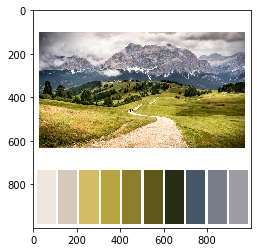

In [8]:
# Show output visually again

from io import BytesIO
import PIL.Image
from base64 import b64decode
from matplotlib import pyplot as plt

plt.imshow(PIL.Image.open(BytesIO(b64decode(img_b64))))

Note: Unnecessary use of -X or --request, POST is already inferred.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0*   Trying 13.224.226.101:443...
* TCP_NODELAY set
* Connected to avx8addboa.execute-api.eu-west-2.amazonaws.com (13.224.226.101) port 443 (#0)
* ALPN, offering http/1.1
* successfully set certificate verify locations:
*   CAfile: /opt/anaconda3/ssl/cacert.pem
  CApath: none
} [5 bytes data]
* TLSv1.3 (OUT), TLS handshake, Client hello (1):
} [512 bytes data]
* TLSv1.3 (IN), TLS handshake, Server hello (2):
{ [106 bytes data]
* TLSv1.2 (IN), TLS handshake, Certificate (11):
{ [4871 bytes data]
* TLSv1.2 (IN), TLS handshake, Server key exchange (12):
{ [333 bytes data]
* TLSv1.2 (IN), TLS handshake, Server finished (14):
{ [4 bytes data]
* TLSv1.2 (OUT), TLS handshake, Client key exchange

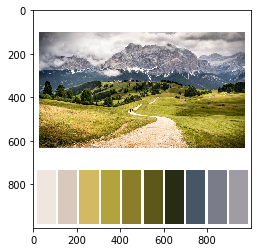

In [18]:
! curl -v -X POST \
  'https://avx8addboa.execute-api.eu-west-2.amazonaws.com/beta/get-palette' \
  -H 'content-type: application/json' \
  -d request.json \
  -o output.json

with open('output.json', 'r') as tmp:
    tmp = tmp.read()

plt.imshow(PIL.Image.open(BytesIO(b64decode(tmp))))